<center>
<h1>World University Ranking </h1>
</center>

#ABSTRACT

## Here is the link to my data set: [World University Ranking](https://www.kaggle.com/mylesoneill/world-university-rankings#cwurData.csv)

### One of the most controversial elements is finding the best University to study in.University Rankings are defined based various features- Locations,No of Students ,No of Faculties, No of petitions, various political, and controversial practice and various other features. There are hundreds of different national and international university ranking systems, many of which disagree with each other. It then becomes Important to find universities based on various factors.

### This Data set consists of 14 featured columns and 2200 unique features. Since This is a real time data, the data is really fuzzy hence we would start by firstly cleaning the data , I.e Data Exploratory process. In this we handle the missing values, consider and refine the duplicate values make any other refinement as needed for the preparation of the data. Once our data is prepared we then can visualize the various factors/features with our target column.

### Our target column here is “world_Rank”. Hnece the target of this project is to predict the world rank of a given university based on various other dependent features given from the dataset. We also aim to visualize the relationship of the world Rank with the other features of data set by plotting correlation matrix,box plots,bar charts and other appropriate visualizations. Finally we would divide our data set into training and testing data set and further modelize to check the accuracy to this by using various models which would be appropriate like random Forest, Naive Baye, etc.Finally our model would be able to predict the University Ranking.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Wranlging
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab 

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import plotly as py
import numpy as np
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter

import plotly
plotly.__version__

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## Reading Raw Data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/timesData.csv')
data.info()


data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


(2603, 14)

## OBSERVATIONS

In [ ]:
data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [ ]:
data.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.0,2603.00,2603.00,2544.00,2603.00
mean,37.8,35.91,60.92,18.45,2014.08
std,17.6,21.25,23.07,11.46,1.69
min,9.9,2.90,1.20,0.60,2011.00
25%,24.7,19.60,45.50,11.97,2013.00
50%,33.9,30.50,62.50,16.10,2014.00
75%,46.4,47.25,79.05,21.50,2016.00
max,99.7,99.40,100.00,162.60,2016.00


In [ ]:
data.nunique()

world_rank                250
university_name           818
country                    72
teaching                  666
international             804
research                  740
citations                 848
income                    613
total_score               415
num_students              794
student_staff_ratio       308
international_students     53
female_male_ratio          69
year                        6
dtype: int64

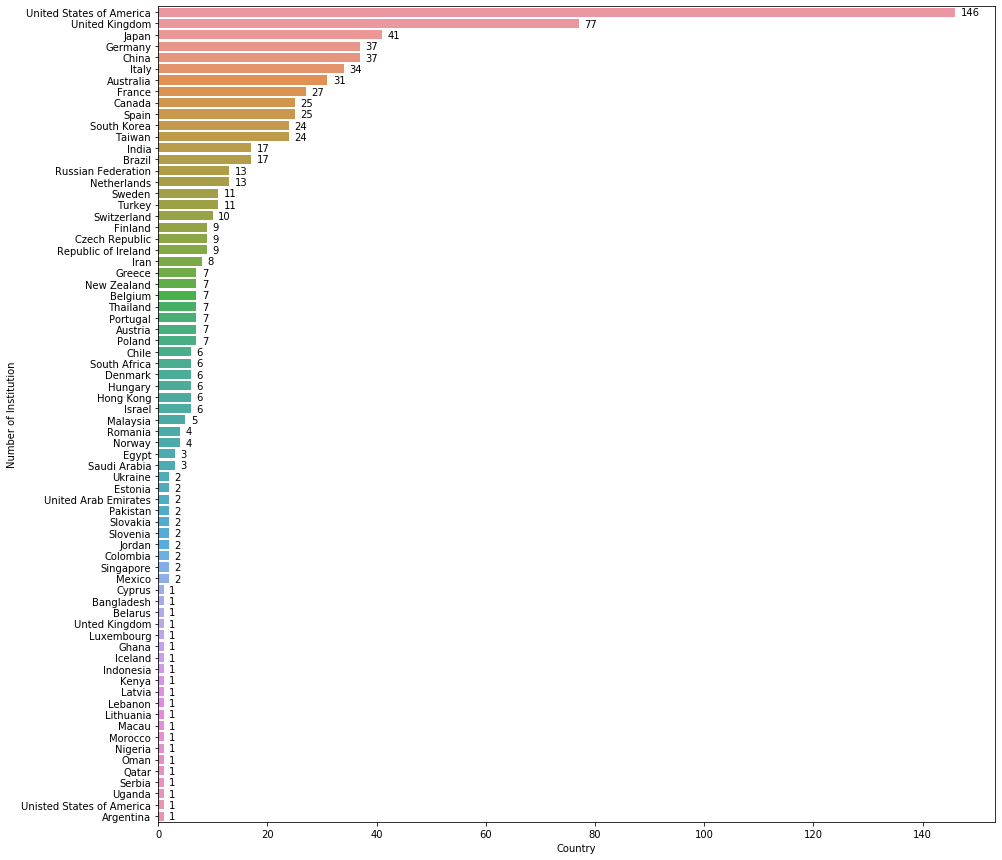

In [ ]:
#Number of Institutions by country in 2016
count = data[data['year'] == 2016].groupby('country').size().sort_values(ascending = False)
plt.figure(figsize = (15,15))
plot = sns.barplot(x = count.values, y = count.index)
plot.set(xlabel = 'Country', ylabel = 'Number of Institution')
for i in plot.patches:
    plot.text(i.get_width()+1.0, i.get_y()+0.7,i.get_width().astype(int))
plt.show()

Observation: The above visualisation is about number of Universites in each country in the year 2016. We can observe that there are more number of universities in United States of America.

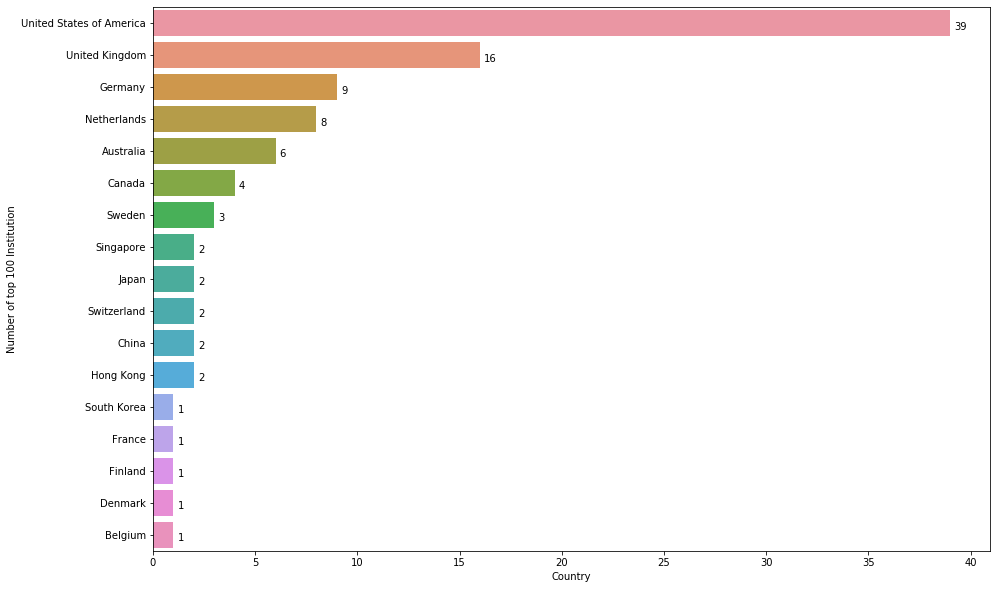

In [ ]:
#Number of top 100 Institutions by country in 2016
top_count = data[data['year'] == 2016].head(100).groupby('country').size().sort_values(ascending = False)
plt.figure(figsize = (15,10))
plot1 = sns.barplot(x = top_count.values, y = top_count.index)
plot1.set(xlabel = 'Country', ylabel = 'Number of top 100 Institution')
for i in plot1.patches:
    plot1.text(i.get_width()+0.2, i.get_y()+0.6,i.get_width().astype(int))
plt.show()

Observation: The above visualisation is about number of top 100 Universites in each country in the year 2016. We can observe that there are more number of top universities in United States of America.

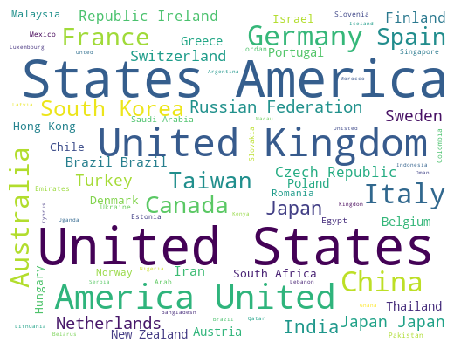

In [ ]:
# data prepararion
wc = data.country[data.year == 2016]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(wc))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

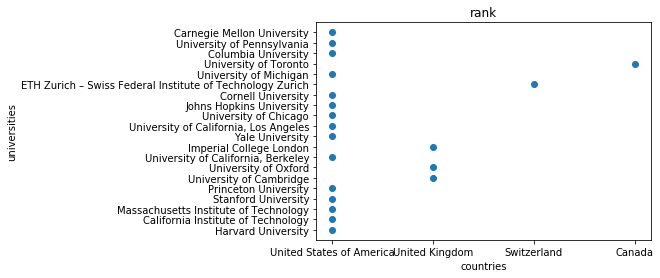

In [ ]:
import matplotlib.pyplot as plt
new=data.head(20)
plt.scatter(new.country,new.university_name,) #scatter plot example
plt.xlabel('countries')
plt.ylabel('universities')
plt.title('rank')
plt.show()

Among the top 20 universities of the world we can observe that more than 50% of the universities are situated in USA

## Using year 2015 data to find the most influential attributes of world_rank 

In [ ]:
#We are using 2015 figures
data2015 = data[data.year == 2015]
data2015.drop(['country','year'],axis = 1, inplace = True)
data2015.head()

,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
1402,1,California Institute of Technology,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67
1403,2,Harvard University,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN
1404,3,University of Oxford,88.6,90.7,97.7,95.5,72.9,93.2,"19,919",11.6,34%,46 : 54
1405,4,Stanford University,91.5,69.0,96.7,99.1,63.1,92.9,"15,596",7.8,22%,42 : 58
1406,5,University of Cambridge,89.7,87.8,95.6,95.2,51.1,92.0,"18,812",11.8,34%,46 : 54


## Cleaning the Data

In [ ]:
data2015.isnull().sum()

world_rank                 0
university_name            0
teaching                   0
international              0
research                   0
citations                  0
income                     0
total_score                0
num_students              11
student_staff_ratio       11
international_students    12
female_male_ratio         38
dtype: int64

In [ ]:
#I'm using forward fill because data is in order. I would assume university close to others in rank have similar values.
data2015.fillna(method='ffill',inplace = True)

In [ ]:
data.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [ ]:
data2015.isin(['-']).sum()

world_rank                  0
university_name             0
teaching                    0
international               0
research                    0
citations                   0
income                     20
total_score               200
num_students                0
student_staff_ratio         0
international_students      0
female_male_ratio           0
dtype: int64

In [ ]:
#Dropping rows with '-'
data2015 = data2015[(~data2015['income'].isin(['-']))&(~data2015['total_score'].isin(['-']))]
data2015.isin(['-']).sum()

world_rank                0
university_name           0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
dtype: int64

In [ ]:
data2015.head()

,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
1402,1,California Institute of Technology,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67
1403,2,Harvard University,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,33 : 67
1404,3,University of Oxford,88.6,90.7,97.7,95.5,72.9,93.2,"19,919",11.6,34%,46 : 54
1405,4,Stanford University,91.5,69.0,96.7,99.1,63.1,92.9,"15,596",7.8,22%,42 : 58
1406,5,University of Cambridge,89.7,87.8,95.6,95.2,51.1,92.0,"18,812",11.8,34%,46 : 54


In [ ]:
#Need to convert string to numeric
col = list(data2015.columns.values)

for i in range(2,8):
    data2015[col[i]] = pd.to_numeric(data2015[col[i]])

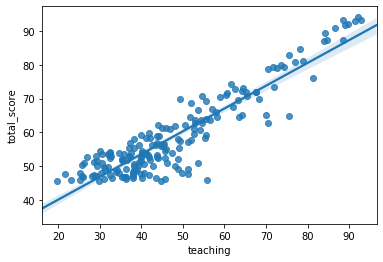

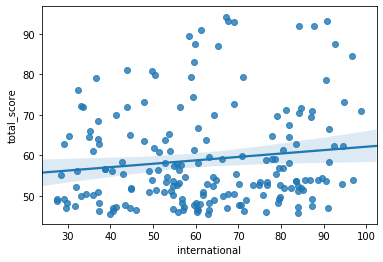

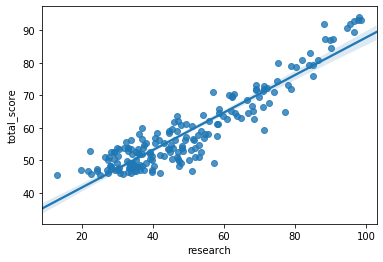

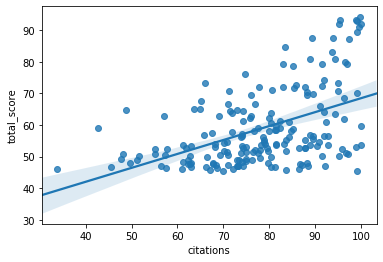

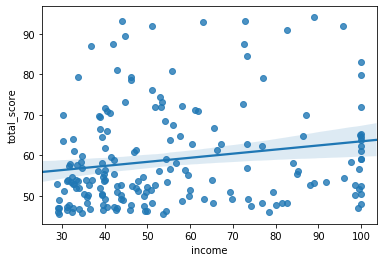

In [ ]:
factor = col[2:7]
for i in range(len(factor)):
    z = data2015[factor[i]]
    plt.figure(i)
    sns.regplot(x=z, y='total_score', data = data2015)

Observation: we can observe from the above plots that the top 3 features which influence the world_rank most are Teaching, Research and Citations.

In [ ]:
country = list(data["country"].unique()) # We create a new list that includes unique country names.

x = "Unisted States of America"
if x in country: country.remove(x) # there is no country like "Unisted States of america". This might have written wrongly ,anyway we delete this.


research_rate = [] 
for i in country:
    x = data[data["country"] == i] # We look each of the Countries. 
    research_ratio = sum(x.research) / len(x) # Average of research values for each country.
    research_rate.append(research_ratio) # Adding it to research_rate.
    
dataframe = pd.DataFrame({"country":country , "research":research_rate }) # We create a new dataframe that includes country and research. That's what we want.
new_index = dataframe["research"].sort_values(ascending=False).index.values # We sort our reseach values.
sorted_data = dataframe.reindex(new_index) # Our sorted research values and countries are in the sorted_data now.

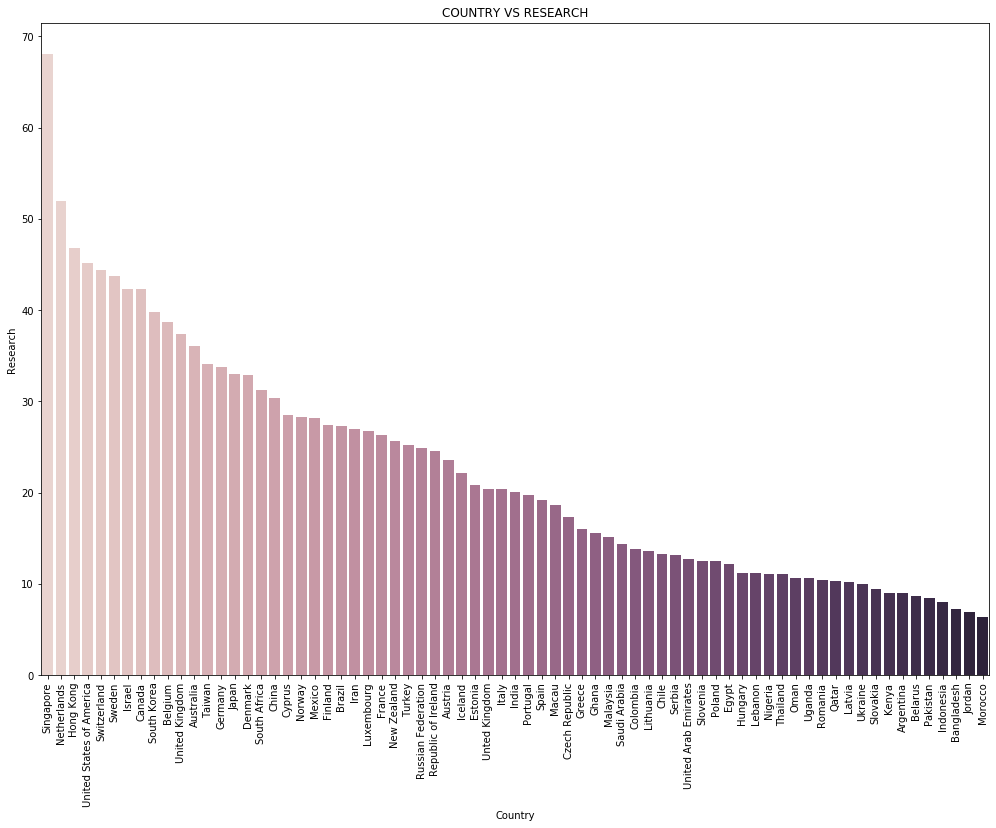

In [ ]:
plt.figure(figsize = (17,12))
sns.barplot(x = sorted_data["country"] , y = sorted_data["research"] , palette = sns.cubehelix_palette(len(sorted_data)))
plt.xticks(rotation = 90)
plt.title("COUNTRY VS RESEARCH")
plt.xlabel("Country")
plt.ylabel("Research")
plt.show()

We can observe that Singapore has more research than the other countries.

In [ ]:
teaching_rate = []
for i in country:
    y = data[data["country"] == i] # We look each of the Countries. 
    teaching_ratio = sum(y.teaching) / len(y) # Average of teaching values for each country.
    teaching_rate.append(teaching_ratio) # Adding it to teaching_rate.

dataframe2 = pd.DataFrame({"country":country , "teaching":teaching_rate }) # We create a new dataframe that includes country and teaching. That's what we want.
new_index2 = dataframe2["teaching"].sort_values(ascending=False).index.values # We sort our teaching values.
sorted_data2 = dataframe2.reindex(new_index2) # Our sorted teaching values and countries are in the sorted_data2 now.

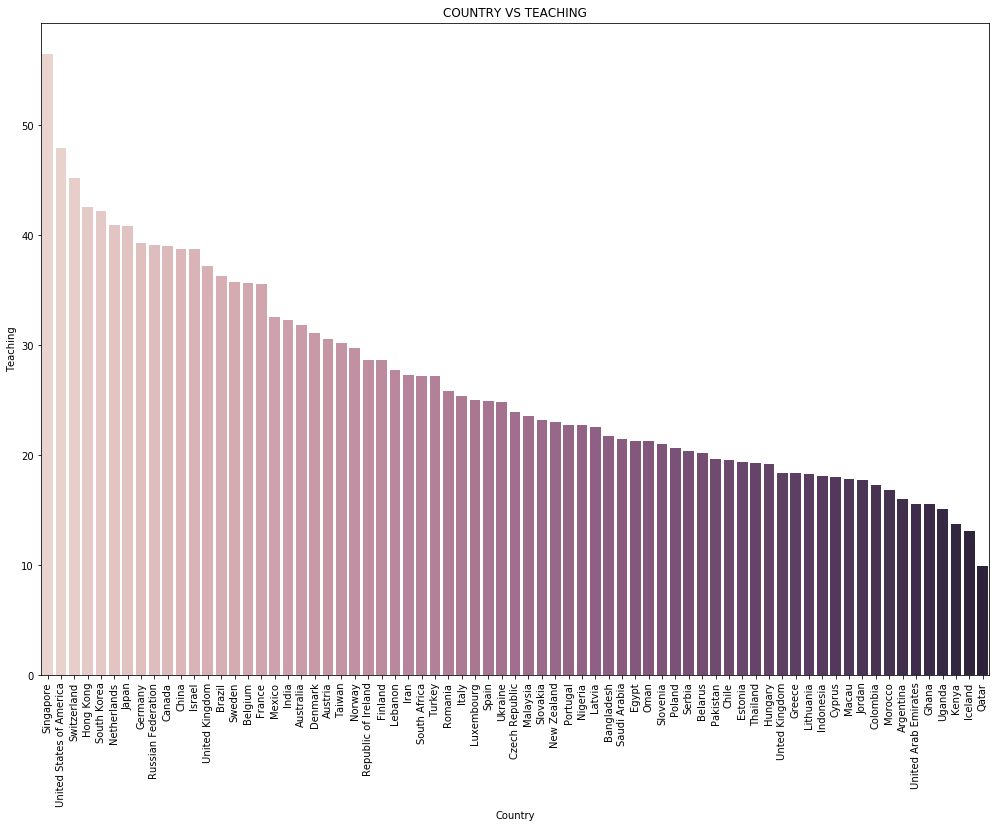

In [ ]:
#Visualization
plt.figure(figsize = (17,12))
sns.barplot(x = sorted_data2["country"] , y = sorted_data2["teaching"] , palette = sns.cubehelix_palette(len(sorted_data)))
plt.xticks(rotation = 90)
plt.title("COUNTRY VS TEACHING")
plt.xlabel("Country")
plt.ylabel("Teaching")
plt.show()

Singapore stands first in teaching as well.

In [ ]:
cor = pd.DataFrame()
for i in range(len(factor)):
    cor[factor[i]] = data2015[factor[i]]
cor['total_score'] = data2015.total_score
cor.corr() 

,teaching,international,research,citations,income,total_score
teaching,1.00,-0.05,0.92,0.19,0.23,0.92
international,-0.05,1.00,0.04,0.06,-0.04,0.13
research,0.92,0.04,1.00,0.16,0.26,0.92
citations,0.19,0.06,0.16,1.00,-0.22,0.48
income,0.23,-0.04,0.26,-0.22,1.00,0.18
total_score,0.92,0.13,0.92,0.48,0.18,1.00


Even by finding correlation we can observe that Teaching, Research and Citations are the most influential features. 

## Predict University Rankings based on different factors

In [ ]:
score = data2015.total_score
train = data2015[factor] 
lab_enc = preprocessing.LabelEncoder()
score_encoded = lab_enc.fit_transform(score)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(train,score_encoded,train_size = 0.9, random_state = 0)

In [ ]:
#Decision Tree
tree = DecisionTreeClassifier()
tree.fit(x_train,x_test)
y_pred = tree.predict(y_train)
y1 = lab_enc.inverse_transform(y_test)
y2 = lab_enc.inverse_transform(y_pred)
print(y_pred)
print(y2)
print(y1)

[ 31  88  32  85  16  59 120  57  23 127 132  18  16  74  27  46  99  53
  57]
[50.3 62.8 50.4 61.9 47.8 55.3 79.3 54.6 49.1 87.1 92.  48.1 47.8 58.9
 49.9 52.7 66.5 53.7 54.6]
[53.4 64.8 47.8 60.7 51.9 56.4 79.2 52.9 48.1 89.5 91.9 52.6 48.1 58.4
 53.1 53.9 69.4 54.3 50.5]


[[1.        0.9849527]
 [0.9849527 1.       ]]


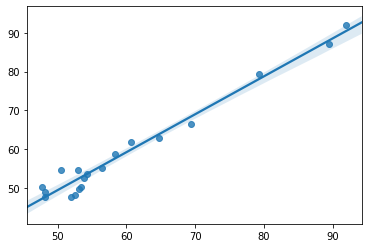

In [ ]:
print(np.corrcoef(y1,y2))
sns.regplot(y1,y2)

Based on the observations i depicted a decision tree classfier model to predict university ranking.

<center>
      <h1>SUMMARY</h1>
</center>  

<center> 
            <p>CS 620</p><p>Introduction to Data Science and Analytics </p> 
            <h1>World University Ranking</h1> 
            
</center> 
Name: Rahul Dumpala

UIN: 01121330

One of the most important element in finding the best University to study is University Ranking. So, here i have considered the dataset of Times Higher Education World University Rankings which has 14 columns.

In [ ]:
	world_rank	university_name	country	 teaching	 international	research	citations	income	total_score	num_students	student_staff_ratio	international_students	female_male_ratio	year

## Observations

#### 1. United States of america hands down beats all the other contries and has the highnest number of universities compared to all other countries.

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA+oAAANcCAYAAADIDVW6AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzde5yVZb3//9dbcEvJKUWIGGXaiXIc%0AxpkRxAMxKmVFmoxFRCWBUnYw8dDuu61Ed1mbvfkJRm4jLZUMPKGSuglxJAnTcUaGgyYeYtpAGFCQ%0AjAIO4+f3x7oHF7gGBpiZNcO8n4/HPNZ9X6f7cy/t8FnXdd+XIgIzMzMzMzMzaxmOyHYAZmZmZmZm%0AZvYuJ+pmZmZmZmZmLYgTdTMzMzMzM7MWxIm6mZmZmZmZWQviRN3MzMzMzMysBWmf7QCsberWrVvk%0A5uZmOwwzMzMzM7OsqKio2BwRx2Wqc6JuWZGbm0t5eXm2wzAzMzMzM8sKSX+pr86JumXFrk3/YNP/%0A/DrbYZiZmZmZ2WHquMu+WG/dhAkTeOSRR+jevTurVq3ao27atGlcffXVbNq0iW7dugGwePFirrji%0ACmpqaujWrRu///3vmzT2ZntGXVKupFV7lU2RdPV++hVJujk5HiHp9IO4dpWkbhnKJ0haKWmFpFWS%0ALkjKx0v6UAPGbVC7QyFpThLf5HrqKyXNbeIYbpPUvymvYWZmZmZm1lzGjx/PggUL3lO+du1aFi5c%0AyAknnLC7bOvWrXz9619n/vz5vPDCC9x3331NHl+Lf5lcRJRHxOXJ6QjggBP1TCTlANcCZ0ZEHnAa%0AsCKpHg80JAFvaLuDIumDwKkRkRcRN2Wo7we0A86SdHQTxdAuIi6JiBebYnwzMzMzM7PmNnz4cI45%0A5pj3lE+ePJmpU6ciaXfZb37zG0aPHr07ee/evXuTx9diEnVJiyX9p6QySS9LOispHyHpEUm5wNeA%0Aycks8lmSjpP0gKTnkr8zkj7HSloo6QVJtwHKcMnuwDagGiAiqiNijaSLgCLg7uQ675P0g2T8VZJm%0AKSVTu0JJv5dUIel3knom8Vwu6cVkZvw9s9+SOkj6VTK7v0xScVK1EOhVd78Z7mEsMDtpd8Fe3+VN%0Aksol/UnSqZLmSXpF0g/T2n0x+b4rJf1cUrukvFrSNEnLgWHJeEVJ3XmSnpe0XNITSdkQSX9MYn9a%0A0skN+EduZmZmZmbWYjz88MP06tWLwYMH71H+8ssvs2XLFkaMGEFhYSF33XVXk8fS0p5Rbx8RQyR9%0AErgOOLeuIiKqJN0KVEfEfwNI+g1wU0T8QdIJwO+AfknfP0TEDZI+BUzMcK3lwN+ANUnCOS8ifhsR%0A90v6JnB1RJQn15kZETckx7OBUXu3k3Qk8FPggojYJGkM8CNgAvBd4MMRsVNS1wyxfCN1izFIUl9g%0AoaSTgPOBRyIiv57vawwwEugLfAv4TVrd2xFRJOnbwMNAIfAP4DVJN5H6oWIMcEZE1Ei6BRgH3AUc%0ADTwbEVcl90zyeRzwC2B48qNG3U9QLwFnRcQuSecCNwIlewcraRIwCSDnmGPruSUzMzMzM7Pm9dZb%0Ab3HjjTeycOHC99Tt2rWLiooKnnjiCbZv386wYcM47bTTOOmkk5osnuZM1KMB5fOSzwogtwFjngv0%0AT1uW0FlSR2A4MBogIh6VtOU9F42olXQecCpwDnCTpMKImJLhOsWSvgO8HzgGeAH47V5tTgYGAo8n%0A8bQDNiR1K0jNvD8EPJRh/DNJJflExEtKvf3vJOCN+m48meHeHBH/J2k98EtJx0TEP5Im85PPlcAL%0AEbEh6fdn4PjkmoXAc0m87wM2Jn1qgQcyXPY04KmIWJPEWnetLsCdkvqQ+ud5ZKaYI2IWMAsgv/e/%0A1vfvg5mZmZmZWbN67bXXWLNmze7Z9HXr1lFQUEBZWRk5OTkce+yxHH300Rx99NEMHz6c5cuXHzaJ%0A+t+BD+xVdgywJu18Z/JZS8NiOwI4LSJ2pBemP0+wLxERQBlQJulx4FfAlL3G6gDcAhRFxFpJU4AO%0AGYYTqYR4WIa6T5H68eDTwLWSBkXErgYFWb+xQF9JVcl5Z1Kz2L9Izuu+y3fSjuvO2yfx3hkR/y/D%0A2DsiovYAYvkP4MmIuDB5RGHxAfQ1MzMzMzPLqkGDBrFx48bd53XbSXfr1o0LLriAb37zm+zatYu3%0A336bZ599lsmTM77ru9E02zPqEVENbJB0NkCybPo84A8HMMw2oFPa+UJSS75JxqxbIv4U8IWk7BO8%0A9wcCJH1IUkFaUT5Qt49d+nXqkvLNyWz9RfXEsxo4TtKwZPwjJQ2QdARwfEQ8CfwbqdnnjnuFs4TU%0AsnOSJe8nJONllIz5OWBQRORGRC6pZ9TH1tcngyeAiyR1T8Y8RlLv/fR5Bhgu6cN1fZLyLsD65Hj8%0AAcRgZmZmZmbW7MaOHcuwYcNYvXo1OTk53H777fW27devH+eddx55eXkMGTKESy65hIEDBzZpfM39%0AjPqXgZ9J+v+S8+sj4rUD6P9b4H6ltlH7FnB5Mt4KUvfyFKkXzl0PzJH0AvA08H8ZxjoS+G+ltlfb%0AAWxK+gLcAdwqaTswjNQs9SrgdeC5tDH2bncRcLOkLkk804GXgV8nZQJujoite8VyC/A/klYCu4Dx%0AyfPs9X0PZwHrI+KvaWVPkXoMoGd9ndJFxIuSvkfqefgjgBpSz8r/ZR99NiXPmc9L+mwk9Yz8VFJL%0A378HPNqQ65uZmZmZmWXLnDlz9llfVVW1x/k111zDNddc04QR7Ump1d9mzauoqCjKy8uzHYaZmZmZ%0AmVlWSKqIiKJMdS1mezYzMzMzMzMza3nbs1kbsWvTZjbd+stsh2FmZsZxX5uQ7RDMzMz24Bn1fZCU%0AK2nVXmVTJF29n35Fkm5OjkdIOv0grl0lqdu+yiUVSloj6RRJ50v67oFep55rj5D0SGOMZWZm1lqt%0AXr2a/Pz83X+dO3dm+vTpjBkzZndZbm4u+fn5+x/MzMzsAHhGvQlERDlQ9wD2CKCa1EvtGo2kPOB+%0AYExELAOW8e7e6WZmZnaITj75ZCorKwGora2lV69eXHjhhVxxxRW721x11VV06dIlWyGamdlhyjPq%0Ah0DSYkn/KalM0suSzkrKR0h6JNlT/GvAZEmVks6SdJykByQ9l/ydkfQ5VtJCSS9Iuo3UG+Lr0w94%0ACPhSRJQl/cdLmpkc3yHpZklPS/qzpIuS8iMk3SLpJUmPS3osre68pPx5YHTaPR4j6SFJKyQ9k/xA%0AULey4E5JSyT9RdJoSVMlrZS0QNKRjfplm5mZZdETTzzBRz7yEXr3fncn04jg3nvvZezYA9kd1czM%0AbP+cqB+69hExBLgCuC69IiKqgFuBmyIiPyKWADOS81OBEuC2pPl1wB8iYgDwIKm91OvzMPDNiNjX%0AHvQ9gTOBUcBPkrLRQC7QH/gSqS3lkNSB1BZ0nwYKgQ+mjXM9sCwi8oB/B+5Kq/sIcDZwPvBr4MmI%0AGARsBz61d0CSJkkql1T+9+rqfYRuZmbWssydO/c9CfmSJUvo0aMHffr0yVJUZmZ2uHKivm/17V2X%0AXj4v+awglQTvz7nATEmVpJaqd5bUERhOKtklIh4FtuxjjEXAJZLa7aPNQxHxTkS8CPRIys4E7kvK%0AXweeTMr7Amsi4pVI7df367RxzgRmJ3GVAsdK6pzU/W9E1AArgXbAgqR8JRm+i4iYFRFFEVF0bMeO%0A+wjdzMys5Xj77beZP38+n/3sZ/conzNnjmfTzcysSfgZ9X37O/CBvcqOAdakne9MPmtp2Pd5BHBa%0AROxIL5T2tdL9Pb5Jaqb+FuCr9bTZmXZ8QIMfgJ0AEfGOpJokyQd4B/+7ZWZmh4n//d//paCggB49%0Aeuwu27VrF/PmzaOioiKLkZmZ2eHKM+r7EBHVwAZJZ0PqeW3gPGBfS873tg3olHa+EPhW3YmkulfF%0APgV8ISn7BO/9gSDdO0nbvpJuOIBYlgIlybPqPUi96A7gJSBX0keS8/TpgSXAuCSuEcDmiHjjAK5p%0AZmbWqmWaOV+0aBF9+/YlJycnS1GZmdnhzIn6/n0Z+H6yVL0UuD4iXjuA/r8FLqx7mRxwOVCUvJzt%0ARVIvm4PUs+DDJb1A6lny/9vXoMmM/PnA+ZK+0cBYHgDWAS+SWt7+PPDPZKxJwKPJy+Q2pvWZAhRK%0AWkHqWfeLG3gtMzOzVu/NN9/k8ccfZ/To0XuUZ3pm3czMrLHo3dXK1hZI6hgR1ZKOBcqAM5Ln1ZtV%0AUVFRlJeX77+hmZmZmZnZYUhSRUQUZarzc8RtzyOSugL/AvxHNpJ0MzMzMzMzq58T9TYmIkZkOwaA%0AXZs2senWW7IdhlmbdNzXvp7tEMzMzMxsH/yMupmZ7aG2tpZTTjmFUaNGATBz5kxOPPFEJLF58+Ys%0AR2dmZmZ2+HOi3gZJqs52DGbWcs2YMYN+/frtPj/jjDNYtGgRvXv3zmJUZmZmZm2HE3UzM9tt3bp1%0APProo1xyySW7y0455RRyc3OzF5SZmZlZG+NEvY2S1FHSE5Kel7RS0gVJea6klyTdLelPku6X9P6k%0A7geSnpO0StIsSUrKF0v6T0llkl5OtqEzs1boiiuuYOrUqRxxhP/nwczMzCxb/P/E2q4dwIURUQAU%0AA9PqEm/gZOCWiOgHvAHUvXlqZkScGhEDgfcBo9LGax8RQ4ArgOsyXVDSJEnlksr/Xu3V92YtzSOP%0APEL37t0pLCzMdihmZmZmbZoT9bZLwI2SVgCLgF5Aj6RubUQsTY5/DZyZHBdLelbSSuBsYEDaePOS%0AzwogN9MFI2JWRBRFRNGxHTs23p2YWaNYunQp8+fPJzc3l89//vOUlpbyxS9+MdthmZmZmbU5TtTb%0ArnHAcUBhROQDfwM6JHWxV9uQ1AG4BbgoIgYBv0hrD7Az+azF2/6ZtUo//vGPWbduHVVVVcydO5ez%0Azz6bX//619kOy8zMzKzNcaLednUBNkZEjaRiIP11zidIGpYcfwH4A+8m5ZsldQQuar5QzSybbr75%0AZnJycli3bh15eXl7vGjOzMzMzBqfIvaePLXDmaT2pGbPTwZ+C3QEyoHTgE8kzRYkZYXAi8CXIuIt%0AST8ExgKvAy8Df4mIKZIWA1dHRLmkbkB5ROTuK46ioqIoLy9v7NszMzMzMzNrFSRVRERRpjovUW57%0ABgCvRcRmYNjelZJygV0R8Z4HUyPie8D3MpSPSDveTD3PqJuZmZmZmdn+eel7GyLpa8AcMiTbZmZm%0AZmZm1jJ46btlxeDeObHwu9/OdhhmLVqPy67JWL5jxw6GDx/Ozp072bVrFxdddBHXX389Z511Ftu2%0AbQNg48aNDBkyhIceeqg5QzYzMzOzBvLS98OEpB7ATaSeJ98CvA1MjYgHsxqYmTWro446itLSUjp2%0A7EhNTQ1nnnkmn/jEJ1iyZMnuNiUlJVxwwQVZjNLMzMzMDpaXvrcSkgQ8BDwVEf8aEYXA54GcBvb3%0AjzJmhwlJdOzYEYCamhpqampI/VdEyhtvvEFpaSmf+cxnshWimZmZmR0CJ+qtx9nA2xFxa11BRPwl%0AIn4qqZ2k/5L0nKQVkr4KIGmEpCWS5gMvSsqV9JKkOyS9LOluSedKWirpFUlDkn5DJP1R0jJJT0s6%0AOSkfL2mepAVJ+6lJ+QRJ0+viknSppJua88sxa2tqa2vJz8+ne/fujBw5kqFDh+6ue+ihhzjnnHPo%0A3LlzFiM0MzMzs4PlRL31GAA8X0/dROCfEXEqcCpwqaQPJ3UFwLcj4qTk/ERgGtA3+fsCcCZwNfDv%0ASZuXgLMi4hTgB8CNadfKB8YAg4Axko4H7gU+LenIpM1XgF/uHaSkSZLKJZX/o/rNA7p5M9tTu3bt%0AqKysZN26dZSVlbFq1arddXPmzGHs2LFZjM7MzMzMDoWXQ7dSkn5GKsF+G/gLkCfpoqS6C9AnqSuL%0AiDVpXddExMpkjBeAJyIiJK3k3W3VugB3SuoDBHBkWv8nIuKfSf8Xgd4RsVZSKTBK0p+AI+uukS4i%0AZgGzIPUyuUP+EsyMrl27UlxczIIFCxg4cCCbN2+mrKyMBx/0qyvMzMzMWivPqLceL5CaHQcgIr4B%0AnAMcBwj4VkTkJ38fjoiFSdO9p653ph2/k3b+Du/+cPMfwJMRMRD4NNChnv61aX1uA8aTmk3/1QHf%0AnZk12KZNm9i6dSsA27dv5/HHH6dv374A3H///YwaNYoOHTrsawgzMzMza8GcqLcepUAHSZellb0/%0A+fwdcFnd0nNJJ0k6+hCu1QVYnxyPb0iHiHgWOJ7UUvo5h3BtM9uPDRs2UFxcTF5eHqeeeiojR45k%0A1KhRAMydO9fL3s3MzMxaOS99byWS5emfAW6S9B1gE6nZ8n8D7iO1bP355O3wm4BDed3zVFJL378H%0APHoA/e4F8iNiyyFc28z2Iy8vj2XLlmWsW7x4cfMGY2ZmZmaNThF+VNgah6RHgJsi4on9tS0qKory%0A8vJmiMrMzMzMzKzlkVQREUWZ6rz03Q6ZpK6SXga2NyRJNzMzMzMzs/p56bsdsojYCpy034Zpajb9%0Alddvua6JIjI7PHzw69dnOwQzMzMzywLPqLcxkj4oaa6k1yRVSHos2d/8kXra3yapf3PHaWb127Fj%0AB0OGDGHw4MEMGDCA665L/eh11llnkZ+fT35+Ph/60If4zGcO5VUVZmZmZpYtnlFvQ5IXzT0I3BkR%0An0/KBgPn19cnIi5ppvDMrIGOOuooSktL6dixIzU1NZx55pl84hOfYMmSJbvblJSUcMEFF2QxSjMz%0AMzM7WJ5Rb1uKgZqIuLWuICKWA0uAjpLul/SSpLuTpB5JiyUVJcfVkn4kabmkZyT1SMo/LelZScsk%0ALaorN7OmIYmOHTsCUFNTQ01NDcl/ZAF44403KC0t9Yy6mZmZWSvlRL1tGQhU1FN3CnAF0B/4V+CM%0ADG2OBp6JiMHAU8ClSfkfgNMi4hRgLvCdTBdIltiXSyr/e/VbB38XZkZtbS35+fl0796dkSNHMnTo%0A0N11Dz30EOeccw6dO3fOYoRmZmZmdrCcqFudsohYFxHvAJWk9mXf29tA3bPsFWltcoDfSVoJXAMM%0AyHSBiJgVEUURUXRsx/c3ZuxmbU67du2orKxk3bp1lJWVsWrVqt11c+bMYezYsVmMzszMzMwOhRP1%0AtuUFoLCeup1px7Vkfn9BTUREhjY/BWZGxCDgq0CHRojVzBqga9euFBcXs2DBAgA2b95MWVkZn/rU%0Ap7IcmZmZmZkdLCfqbUspcJSkSXUFkvKAsw5x3C7A+uT44kMcy8z2Y9OmTWzduhWA7du38/jjj9O3%0Ab18A7r//fkaNGkWHDv69zMzMzKy1cqLehiSz4RcC5ybbs70A/Bh4/RCHngLcJ6kC2HyIY5nZfmzY%0AsIHi4mLy8vI49dRTGTlyJKNGjQJg7ty5XvZuZmZm1srp3ZXMZs2nqKgoysvLsx2GmZmZmZlZVkiq%0AiIiiTHWeUTczMzMzMzNrQTK9MMysydVsXMv6n12e7TDMmlSvb9yc7RDMzMzMrBXyjLrtJqk6+cyV%0A9IUGtM+VtGp/7cxsTzt27GDIkCEMHjyYAQMGcN111+1Rf/nll9OxY8csRWdmZmZm2eZE3TLJBfab%0AqJvZwTnqqKMoLS1l+fLlVFZWsmDBAp555hkAysvL2bJlS5YjNDMzM7NscqJumfwEOEtSpaTJycz5%0AEknPJ3+n791B0lOS8tPO/yBpcLNGbdZKSNo9Y15TU0NNTQ2SqK2t5ZprrmHq1KlZjtDMzMzMssmJ%0AumXyXWBJRORHxE3ARmBkRBQAY4BMD97eDowHkHQS0CEiljdTvGatTm1tLfn5+XTv3p2RI0cydOhQ%0AZs6cyfnnn0/Pnj2zHZ6ZmZmZZZETdWuII4FfSFoJ3Af0z9DmPmCUpCOBCcAdezeQNElSuaTyv1dv%0Ab8p4zVq8du3aUVlZybp16ygrK+Opp57ivvvu41vf+la2QzMzMzOzLPNb360hJgN/AwaT+nFnx94N%0AIuItSY8DFwCfAwoztJkFzAIYfEKPaMqAzVqLrl27UlxczJNPPsmrr77KiSeeCMBbb73FiSeeyKuv%0AvprlCM3MzMysuXlG3TLZBnRKO+8CbIiId4AvAe3q6XcbqWXxz0WE34ZlVo9NmzaxdetWALZv387j%0Ajz9OYWEhr7/+OlVVVVRVVfH+97/fSbqZmZlZG+UZdctkBVAraTmpJey3AA9I+jKwAHgzU6eIqJD0%0ABvCr5grUrDXasGEDF198MbW1tbzzzjt87nOfY9SoUdkOy8zMzMxaCEV4BbI1DkkfAhYDfZPZ93oV%0AFRVFeXl5s8RlZmZmZmbW0kiqiIiiTHVe+m6NIpltfxa4dn9JupmZmZmZmdXPM+qWFXknfCAeufqc%0AbIdhVq8TLr8/2yGYmZmZ2WHMM+pmZo1ox44dDBkyhMGDBzNgwACuu+46AGbOnMmJJ56IJDZv3pzl%0AKM3MzMystXKi3gpJ+oykkNT3EPpn2gt9f/3GS5qZHH8tWe5u1uYcddRRlJaWsnz5ciorK1mwYAHP%0APPMMZ5xxBosWLaJ3797ZDtHMzMzMWjEn6q3TWOAPyefB+AyQMVGX1KCdACLi1oi46yCvb9aqSaJj%0Ax44A1NTUUFNTgyROOeUUcnNzsxucmZmZmbV6TtRbGUkdgTOBicDnk7IRkh5JazNT0vjk+CeSXpS0%0AQtJ/SzodOB/4L0mVkj4iabGk6ZLKgW9L+rSkZyUtk7RIUo8McUyRdHVyfKmk5yQtl/SApPc3+Rdh%0AlmW1tbXk5+fTvXt3Ro4cydChQ7MdkpmZmZkdJpyotz4XAAsi4mXg75IK62so6VjgQmBAROQBP4yI%0Ap4H5wDURkR8RryXN/yUiiiJiGqnZ+tMi4hRgLvCd/cQ0LyJOjYjBwJ9I/YiQKZ5Jksollf+jeucB%0A3LJZy9OuXTsqKytZt24dZWVlrFq1KtshmZmZmdlhwol66zOWVPJM8rmv5e//BHYAt0saDby1j7b3%0ApB3nAL+TtBK4Bhiwn5gGSlqStB9XX/uImJX8GFB0TMej9jOkWevQtWtXiouLWbBgQbZDMTMzM7PD%0AhBP1VkTSMcDZwG2Sqkgl0Z8Datnzn2UHgIjYBQwB7gdGAfvKJN5MO/4pMDMiBgFfrRtvH+4Avpm0%0Av74B7c1atU2bNrF161YAtm/fzuOPP07fvgf1bkczMzMzs/dwot66XATMjojeEZEbEccDa0j9c+wv%0A6ShJXYFzYPfz7F0i4jFgMjA4GWcb0Gkf1+kCrE+OL25AXJ2ADZKOJDWjbnZY27BhA8XFxeTl5XHq%0AqacycuRIRo0axc0330xOTg7r1q0jLy+PSy65JNuhmpmZmVkr1KA3fFuLMRb4z73KHiD1Url7gVWk%0AEvdlSV0n4GFJHQABVyblc4FfSLqcVPK/tynAfZK2AKXAh/cT1/eBZ4FNyee+fgQwa/Xy8vJYtmzZ%0Ae8ovv/xyLr/88ixEZGZmZmaHE0VEtmOwNqioqCjKy8uzHYaZmZmZmVlWSKqIiKJMdV76bmZmZmZm%0AZtaCeOm7ZcWOja/y8swLsh2GHSZO+ubD2Q7BzMzMzKzReEb9MCWpVlJl2l9utmMya25r166luLiY%0A/v37M2DAAGbMmAHAmDFjyM/PJz8/n9zcXPLz87McqZmZmZnZuzyjfvjaHhH1Zh+S2ifbt5kdttq3%0Ab8+0adMoKChg27ZtFBYWMnLkSO65557dba666iq6dOmSxSjNzMzMzPbkGfU2RNJ4SfMllQJPSOoo%0A6QlJz0taKemCpF2upD9J+oWkFyQtlPS+pO5ESYskLU/6fSQpv0bSc5JWSLo+i7dptlvPnj0pKCgA%0AoFOnTvTr14/169fvro8I7r33XsaOHZutEM3MzMzM3sOJ+uHrfWnL3h9MKy8ALoqIjwI7gAsjogAo%0ABqZJUtKuD/CziBgAbAVKkvK7k/LBwOmk9k//WNJ+CJAPFEoavndAkiZJKpdUvqX67ca/Y7N9qKqq%0AYtmyZQwdOnR32ZIlS+jRowd9+vTJYmRmZmZmZnvy0vfDV31L3x+PiH8kxwJuTJLqd4BeQI+kbk1E%0AVCbHFUCupE5Ar4h4ECAidgAkifrHeHf/9o6kEven0i8cEbOAWQADT+jqfQGt2VRXV1NSUsL06dPp%0A3Lnz7vI5c+Z4Nt3MzMzMWhwn6m3Pm2nH44DjgMKIqJFUBXRI6namtasF3rePMQX8OCJ+3piBmjWG%0AmpoaSkpKGDduHKNHj95dvmvXLubNm0dFRUUWozMzMzMzey8vfW/bugAbkyS9GOi9r8YRsQ1YJ+kz%0AAJKOkvR+4HfABEkdk/Jekro3cexm+xURTJw4kX79+nHllVfuUbdo0SL69u1LTk5OlqIzMzMzM8vM%0AiXrbdjdQJGkl8GXgpQb0+RJwuaQVwNPAByNiIfAb4I/JWPcDnZooZrMGW7p0KbNnz6a0tHT3dmyP%0APfYYAHPnzvWydzMzMzNrkRThR4Wt+RUVFUV5eXm2wzAzMzMzM8sKSRURUZSpzjPqZmZmZmZmZi2I%0AXyZnWbF906us+J/zsx2GtWB5l83PdghmZmZmZlnhGfXDiKQPSpor6TVJFZIek3RSE16vuqnGNqvP%0A2rVrKS4upn///gwYMIAZM2YAMGXKFHr16vWeZ9HNzMzMzFobz6gfJiQJeBC4MyI+n5QNJrUv+svZ%0AjM2sMbVv355p06ZRUFDAtm3bKCwsZOTIkQBMnjyZq6++OssRmpmZmZkdGs+oHz6KgZqIuLWuICKW%0AA8skPSHpeUkrJV0AIClX0p8k/ULSC5IWSnpfUneppOckLZf0QLIFG5I+LOmPyTg/rLuOpI6ZrmHW%0AFHr27ElBQQEAnTp1ol+/fqxfvz7LUZmZmZmZNR4n6oePgUBFhvIdwIURUUAqmZ+WzL4D9AF+FhED%0AgK1ASVI+LyJOjYjBwJ+AiUn5DOB/ImIQsKGB1zBrMlVVVSxbtoyhQ4cCMHPmTPLy8pgwYQJbtmzJ%0AcnRmZmZmZgfHifrhT8CNyb7ni4BepJbDA6yJiMrkuALITY4HSlqS7Ik+DhiQlJ8BzEmOZzfwGu82%0AkiZJKpdUvqX67Ua5OWu7qqurKSkpYfr06XTu3JnLLruM1157jcrKSnr27MlVV12V7RDNzMzMzA6K%0AE/XDxwtAYYbyccBxQGFE5NvJdCUAACAASURBVAN/AzokdTvT2tXy7jsL7gC+mcycX5/WHiAO8Brv%0AdoyYFRFFEVH0gY7/0tD7MnuPmpoaSkpKGDduHKNHjwagR48etGvXjiOOOIJLL72UsrKyLEdpZmZm%0AZnZwnKgfPkqBoyRNqiuQlAf0BjZGRI2k4uR8fzoBGyQdSSoJr7MU+HxynF7e5SCuYXZQIoKJEyfS%0Ar18/rrzyyt3lGza8+zTGgw8+yMCBA7MRnpmZmZnZIfNb3w8TERGSLgSmS/o3Us+NVwFTgJuTZezl%0AwEsNGO77wLPApuSzU1L+beA3yfgPp7W/G/jtAV7D7KAsXbqU2bNnM2jQIPLz8wG48cYbmTNnDpWV%0AlUgiNzeXn//851mO1MzMzMzs4Cgi00pms6ZVVFQU5eXl2Q7DzMzMzMwsKyRVRERRpjovfTczMzMz%0AMzNrQbz03bLizU2v8tzPP53tMKwFO/Wrv812CGZmZmZmWeEZdTNrVdauXUtxcTH9+/dnwIABzJgx%0AA4ApU6bQq1cv8vPzyc/P57HHHstypGZmZmZmB8cz6m2QpGuBL5Daku0d4KsR8ewBjnE+0D8iftIE%0AIZrVq3379kybNo2CggK2bdtGYWEhI0eOBGDy5MlcffXVWY7QzMzMzOzQOFFvYyQNA0YBBRGxU1I3%0A4IA3NY+I+cD8xo7PbH969uxJz549AejUqRP9+vVj/fr1WY7KzMzMzKzxeOl729MT2BwROwEiYnNE%0A/FVSlaSpklZKKpN0IoCkT0t6VtIySYsk9UjKx0uamRzfIelmSU9L+rOki7J2d9amVFVVsWzZMoYO%0AHQrAzJkzycvLY8KECWzZsiXL0ZmZmZmZHRwn6m3PQuB4SS9LukXSR9Pq/hkRg4CZwPSk7A/AaRFx%0ACjAX+E494/YEziQ1W59xObykSZLKJZVvrX67Me7F2rDq6mpKSkqYPn06nTt35rLLLuO1116jsrKS%0Anj17ctVVV2U7RDMzMzOzg+JEvY2JiGqgEJgEbALukTQ+qZ6T9jksOc4BfidpJXANMKCeoR+KiHci%0A4kWgRz3XnhURRRFR1LXjAa+2N9utpqaGkpISxo0bx+jRowHo0aMH7dq144gjjuDSSy+lrKwsy1Ga%0AmZmZmR0cJ+ptUETURsTiiLgO+CZQUleV3iz5/CkwM5lp/yrQoZ5hd6YdqzHjNUsXEUycOJF+/fpx%0A5ZVX7i7fsGHD7uMHH3yQgQMHZiM8MzMzM7ND5pfJtTGSTgbeiYhXkqJ84C/AIGAMqWXrY4A/JvVd%0AgLo3dV3cjKGaZbR06VJmz57NoEGDyM/PB+DGG29kzpw5VFZWIonc3Fx+/vOfZzlSMzMzM7OD40S9%0A7ekI/FRSV2AX8CqpZfCjgA9IWkFqdnxs0n4KcJ+kLUAp8OFmj9gszZlnnklEvKf8k5/8ZBaiMTMz%0AMzNrfMr0f3it7ZFUBRRFxObmuF5RUVGUl5c3x6XMzMzMzMxaHEkVEVGUqc7PqJuZmZmZmZm1IF76%0AbgBERG5zXq9606ssnTWqOS9pLdQZkx7JdghmZmZmZi2KZ9SbkaRrJb0gaYWkSklDD3KcEZJOTzu/%0AQ9JFDehXnXb8yWQv9d4HE4NZU1u7di3FxcX079+fAQMGMGPGjD3qp02bhiQ2b26WpzXMzMzMzJqN%0AZ9SbiaRhpF7YVhAROyV1Aw52M/ERQDXw9EHGcg5wM/DxiPhLA/u0j4hdB3M9s4PRvn17pk2bRkFB%0AAdu2baOwsJCRI0fSv39/1q5dy8KFCznhhBOyHaaZmZmZWaPzjHrz6QlsjoidABGxOSL+CqnEWdIy%0ASSsl/VLSUUl5VZLQI6lI0mJJucDXgMnJrPxZyfjDJT0t6c/7ml2XNBz4BTAqIl5LynIllSYz/U9I%0AOiEpv0PSrZKeBaZKOjqJryyJ94K0/kskPZ/8nV7f9c0aqmfPnhQUFADQqVMn+vXrx/r1qZ0CJ0+e%0AzNSpU5GUzRDNzMzMzJqEE/XmsxA4PllufoukjwJI6gDcAYyJiEGkVjlcVt8gEVEF3ArcFBH5EbEk%0AqeoJnElq1v4n9XQ/CngI+ExEvJRW/lPgzojIA+4mNdteJwc4PSKuBK4FSiNiCFAM/Jeko4GNwMiI%0AKCC1B3t6/90kTZJULql8a/Xb9d2i2XtUVVWxbNkyhg4dysMPP0yvXr0YPHhwtsMyMzMzM2sSTtSb%0ASURUA4Wk9izfBNwjaTxwMrAmIl5Omt4JDD+ISzwUEe9ExItAj3ra1JBaLj9xr/JhwG+S49mkEv46%0A90VEbXL8MeC7kiqBxUAH4ATgSOAXklYC9wH9M108ImZFRFFEFHXteLCr/q2tqa6upqSkhOnTp9O+%0AfXtuvPFGbrjhhmyHZWZmZmbWZPyMejNKEt7FwOIkqb0YWLaPLrt498eUDvsZfmfacX3rgd8BPgc8%0AIenfI+LG/QYNb+41bklErE5vIGkK8DdgcBLvjgaMa7ZfNTU1lJSUMG7cOEaPHs3KlStZs2bN7tn0%0AdevWUVBQQFlZGR/84AezHK2ZmZmZWePwjHozkXSypD5pRfnAX4DVQK6kE5PyLwG/T46rSM3CA5Sk%0A9d0GdDqYOCLiLeBTwDhJdTPrTwOfT47HAUsy9QV+B3xLyYPBkk5JyrsAGyLinST+dgcTm1m6iGDi%0AxIn069ePK6+8EoBBgwaxceNGqqqqqKqqIicnh+eff95JupmZmZkdVpyoN5+OwJ2SXpS0gtTy8CkR%0AsQP4CnBfMsv+Dqln0AGuB2ZIKgdq08b6LXDhXi+Ta7CI+AdwHvA9SecD3wK+ksT1JeDb9XT9D1LL%0A3FdIeiE5B7gFuFjScqAve87Cmx2UpUuXMnv2bEpLS8nPzyc/P5/HHnss22GZmZmZmTU5RUS2Y7A2%0AqKioKMrLy7MdhpmZmZmZWVZIqoiIokx1nlE3MzMzMzMza0H8MjnLim2bX+HJ2z6V7TCsBSi+5NFs%0Ah2BmZmZm1qJ4Rv0wIunY5Ln1SkmvS1qfdp5xPzRJv5N0UC+mM2tKa9eupbi4mP79+zNgwABmzJix%0AR/20adOQxObNm7MUoZmZmZlZ0/CM+mEkIv5O6m3ydVumVUfEf++nz8ebITSzA9a+fXumTZtGQUEB%0A27Zto7CwkJEjR9K/f3/Wrl3LwoULOeGEE7IdppmZmZlZo/OMehsh6beSKiS9IOmStPJ1krpK+n+S%0Avp6U/VTSwuT4Y5LuTI5nSSpPxvjBXmNMkbRM0gpJJzX3/dnhp2fPnhQUFADQqVMn+vXrx/r16wGY%0APHkyU6dOJdkp0MzMzMzssOJEve24OCIKgVOBKyV9YK/6JUDdVm8FQFdJ7ZKyp5Ly7yZvJRwMjJTU%0AP63/3yLiFOA24Mqmuglrm6qqqli2bBlDhw7l4YcfplevXgwePDjbYZmZmZmZNQkvfW87Jid7pgPk%0AAB8B0vdHew44VVJXoBp4lVTCfhYwO2kzVtJEUv/efIjUXvAvJnXzks8K4JOZApA0CZgE0OOYDo1w%0AS9YWVFdXU1JSwvTp02nfvj033ngjCxcuzHZYZmZmZmZNxjPqbYCkc4HhwGkRMRhYAeyRKUfETmA9%0A8GVgKakZ9nOA3hHxsqQ+wLeBsyMiD1iw1xg7k89a6vkBKCJmRURRRBR16ZTx3XZme6ipqaGkpIRx%0A48YxevRoXnvtNdasWcPgwYPJzc1l3bp1FBQU8Prrr2c7VDMzMzOzRuMZ9bahC/CPiNguaQCp5e+Z%0ALAGuJpWsvwL8F/BMUtcZ2Aa8Iakn8HFSybpZk4gIJk6cSL9+/bjyytTTFIMGDWLjxo272+Tm5lJe%0AXk63bt2yFaaZmZmZWaPzjHrb8CjwfkkvAj8Enq2n3RKgB/BMRKwHapIygOdJLXN/CbiL1Ky7WZNZ%0AunQps2fPprS0lPz8fPLz83nssceyHZaZmZmZWZNTRGQ7BmuDioqKory8fP8NzczMzMzMDkOSKpKX%0Adb+HZ9TNzMzMzMzMWhA/o25Z8cbmV/jd7RlfDm9N5OMTvWzczMzMzKw18Iy6mTFhwgS6d+/OwIED%0Ad5eNGTNm97Phubm55OfnZzFCMzMzM7O2w4l6Gyep+gDbj5D0SHJ8vqTvNk1k1pzGjx/PggV7vsT/%0AnnvuobKyksrKSkpKShg9enSWojMzMzMza1u89N0OWkTMB+ZnOw47dMOHD6eqqipjXURw7733Ulpa%0A2rxBmZmZmZm1UZ5RN2D3TPliSfdLeknS3ZKU1J2XlD0PjE7rM17SzOT405KelbRM0iJJPbJ0K9bI%0AlixZQo8ePejTp0+2QzEzMzMzaxOcqFu6U4ArgP7AvwJnSOoA/AL4NFAIfLCevn8ATouIU4C5wHf2%0AbiBpkqRySeX/3PZ2U8RvTWDOnDmMHTs222GYmZmZmbUZXvpu6coiYh2ApEogF6gG1kTEK0n5r4FJ%0AGfrmAPdI6gn8C7Bm7wYRMQuYBXBSbpdoihuwxrVr1y7mzZtHRUVFtkMxMzMzM2szPKNu6XamHddy%0AYD/k/BSYGRGDgK8CHRozMMuORYsW0bdvX3JycrIdipmZmZlZm+FE3fbnJSBX0keS8/rWQHcB1ifH%0AFzd5VNaoxo4dy7Bhw1i9ejU5OTncfvvtAMydO9fL3s3MzMzMmpmXvts+RcQOSZOARyW9BSwBOmVo%0AOgW4T9IWoBT48L7G7dytDx+f+Fhjh2sHac6cORnL77jjjuYNxMzMzMzMUIQfFbbmV1RUFOXl5dkO%0Aw8zMzMzMLCskVUREUaY6L303MzMzMzMza0G89N2y4p+bX+GRX34i22G0KaMm/G+9dRMmTOCRRx6h%0Ae/furFq1CoAxY8awevVqALZu3UrXrl2prKxslljNzMzMzNoyz6i3MZJqJVVKWi7peUmnN9K4t0nq%0AnxxXSerWGONa8xg/fjwLFizYo+yee+6hsrKSyspKSkpKGD16dJaiMzMzMzNrWzyj3vZsj4h8AEkf%0AB34MfDS9gaT2EbHrQAaNiEsaL0RrbsOHD6eqqipjXURw7733Ulpa2rxBmZmZmZm1UZ5Rb9s6A1sA%0AJI2QtETSfODFpOwhSRWSXkje/I6k85MZ+UpJqyWtScoXS8r4IgRr3ZYsWUKPHj3o06dPtkMxMzMz%0AM2sTPKPe9rxPUiXQAegJnJ1WVwAMjIg1yfmEiPiHpPcBz0l6ICLmA/MBJN0L/L6hF06S/UkAxx3b%0A4dDvxJrFnDlzvJe6mZmZmVkzcqLe9qQvfR8G3CVpYFJXlpakA1wu6cLk+HigD/D3pO93krF+1tAL%0AR8QsYBZAn9wu3hewFdi1axfz5s2joqIi26GYmZmZmbUZTtTbsIj4Y/LSt+OSojfr6iSNAM4FhkXE%0AW5IWk5qFR9K5wGeB4c0asDW7RYsW0bdvX3JycrIdipmZmZlZm+Fn1NswSX2BdiSz5HvpAmxJkvS+%0AwGlJn97Az4DPRsT2ZgvWmtTYsWMZNmwYq1evJicnh9tvvx2AuXPnetm7mZmZmVkz84x621P3jDqA%0AgIsjolbS3u0WAF+T9CdgNfBMUj4eOBZ4KOnz14j4ZJNHbU1qzpw5GcvvuOOO5g3EzMzMzMxQhB8V%0AtuZXVFQU5eXl2Q7DzMzMzMwsKyRVRETGnbO89N3MzMzMzMysBfHSd8uKrZtf4cFfnZftMFqkC7+y%0AINshmJmZmZlZFh32M+qSaiVVSlol6beSujbi2EWSbm6ksRZLWp3EWinpogPoO17SzEaKI1fSF9LO%0AG+0e7dBNmDCB7t27M3DgwN1l3//+98nLyyM/P5+Pfexj/PWvf81ihGZmZmZmdqgO+0SdZN/wiBgI%0A/AP4RmMNHBHlEXF5Y40HjEtizY+I+xtx3D1I2tdKilxgd6LeBPdoh2D8+PEsWLDnjPs111zDihUr%0AqKysZNSoUdxwww1Zis7MzMzMzBpDW0jU0/0R6AWpfcIlPVJXIWmmpPHJ8U8kvShphaT/Tso+m8zK%0AL5f01N5jSBoi6Y+Slkl6WtLJSfl4SfMkLZD0iqSpBxKwpC9KKktm2X8uqV1S/hVJL0sqA85Ia3+c%0ApAckPZf8nZGUT5E0W9JSYHYyc75E0vPJ3+nJED8BzkquN3mvezxG0kPJ9/KMpLy0sX+ZrAr4syQn%0A9k1k+PDhHHPMMXuUde7ceffxm2++SYY3+JuZmZmZWSvSZp5RTxLcc4Db99PuWOBCoG9ERNpS+R8A%0AH4+I9fUsn38JOCsidkk6F7gRKEnq8oFTgJ3Aakk/jYi1Gca4W1Ld3uTnAN2BMcAZEVEj6RZgnKTH%0AgeuBQuCfwJPAsqTfDOCmiPiDpBOA3wH9krr+wJkRsV3S+4GREbFDUh9gDlAEfBe4OiJGJd/HiLT4%0ArgeWRcRnJJ0N3JXcG0BfoBjolNzj/0RETcYv2Rrdtddey1133UWXLl148sknsx2OmZmZmZkdgrYw%0Ao163b/jrQA/g8f20/yewA7hd0mjgraR8KXCHpEuBdhn6dQHuk7QKuAkYkFb3RET8MyJ2AC8Cveu5%0AdvrS97+TStYLgeeSezgH+FdgKLA4IjZFxNvAPWljnAvMTNrPBzpL6pjUzY+Iuh8CjgR+IWklcB+p%0AJH5/zgRmA0REKXCspLrp3EcjYmdEbAY2kvqu9yBpkqRySeVvVL/dgMtZQ/3oRz9i7dq1jBs3jpkz%0AG+V1BWZmZmZmliVtIVHfHhH5pJJj8e4z6rvY8/47AETELmAIcD8wCliQlH8N+B5wPFCRzLyn+w/g%0AyeRZ+E/XjZfYmXZcS8NXMgi4My15PzkipuynzxHAaWl9ekVEdVL3Zlq7ycDfgMGkZtL/pYEx1We/%0A9xgRsyKiKCKKOnc81MtZJuPGjeOBBx7IdhhmZmZmZnYI2kKiDkBEvAVcDlyVvEztL0B/SUclS9nP%0AAUhmn7tExGOkktnBSflHIuLZiPgBsIlUwp6uC7A+OR7fSGE/AVwkqXsSwzGSegPPAh+VdKykI4HP%0ApvVZCHyr7kRSPpl1ATZExDvAl3h3lcA2UsvXM1kCjEvGHQFsjog3DubGrPG88soru48ffvhh+vbt%0Am8VozMzMzMzsULWZZ9QBImKZpBXA2IiYLeleYBWwhnef8e4EPCypA6kZ7SuT8v9KnuUWqQR6OfDR%0AtOGnAndK+h7waCPF+2Iy3kJJRwA1wDci4hlJU0i9HG8rUJnW7XLgZ8l9tgeeAr6WYfhbgAckfZnU%0AqoG62fYVQK2k5cAdvPu9AEwBfpmM/RZwcWPcpzXc2LFjWbx4MZs3byYnJ4frr7+exx57jNWrV3PE%0AEUfQu3dvbr311myHaWZmZmZmh0ARke0YrA0qKiqK8vLybIdhZmZmZmaWFZIqIqIoU12bWfpuZmZm%0AZmZm1hq0qaXv1nJs2fwK9/zqvGyH0SKN+cqCbIdgZmZmZmZZ5Bl1s1ZkwoQJdO/enYEDB+4u+/73%0Av09eXh75+fl87GMf469//WsWIzQzMzMzs0PlRL0ZSQpJ09LOr05eCrevPiMknZ52foekiw4xjipJ%0A3Q5ljLSxqvffyhrL+PHjWbBgzxn3a665hhUrVlBZWcmoUaO44YYbshSdmZmZmZk1BifqzWsnMPoA%0Ak+QRwOn7a9QQSvE/81Zs+PDhHHPMMXuUde7ceffxm2++iaTmDsvMzMzMzBqRk7bmtQuYRWp/9j1I%0AOk7SA5KeS/7OkJRLamu1yZIqJZ2VNB8u6WlJf06fXZd0TdJ3haTrk7JcSasl3UVqK7rj97ruQ5Iq%0AJL0gaVJaebWkH0laLukZST2S8g9L+qOklZJ+mNa+p6SnkjhXpcVqzeDaa6/l+OOP5+677/aMupmZ%0AmZlZK+dEvfn9DBgnqcte5TOAmyLiVKAEuC3+f/buPb6q6s77+OcrSlEQ8AZasOBQBAQ1wlFKVdTa%0AIh1bldtjKW0VUarTeumMPlrbmaq96Dy9iBesBS9Ya6FjRaVUEEyHQi0UTyABFFOseGm1alG0BDQS%0Af88fZ0ePMSEBk+zknO/79Tqv7L3W2mv/dpJ/fmetvVbEM8CtSXlJRCxL2h4EHAd8DrgOQNIooD9w%0ADFACDJM0MmnfH7glIgZHxLN17ntORAwDMsBFkvZLyjsDKyLiSHJ7sZ+XF+dPI+Jw4MW8fr4IPBwR%0AJcCRvH9vd5IYp0rKSsq+saW68d+UNdn3v/99nn/+eSZNmsTNN9+cdjhmZmZmZvYhOFFvZRHxBvBz%0A4KI6VZ8GbpZUDswDukrq0kA3D0TEOxHxBNAzKRuVfFYDq4CB5BJ0gGcjYkUDfV0kqQJYQW60vfaa%0AamB+clwG9E2OjwVmJ8d35/XzGDA5eef+8Ij4Z90bRcSMiMhERKZrl44NhGMfxqRJk7jvvvvSDsPM%0AzMzMzD4EJ+rpmAZMITdqXWs34BPJyHlJRPSKiIYWansr71h5P6/Nu/7jEXF7UldVXyeSTiT3BcGI%0AZOR8NdApqX47IiI5ruH9W/kFdUTEUmAk8DdglqSvNBC7NbMNGza8e/zggw8ycODAFKMxMzMzM7MP%0Ay4l6CiLiVeB/yCXrtRYBF9aeSCpJDv8J7N2Ebh8GzqkdhZfUS1KPRq7pBrwWEVslDQQ+0YT7PAp8%0AITmelBdvH+CliJgJ3AYMbUJftpMmTpzIiBEjqKyspHfv3tx+++1cccUVDBkyhCOOOIJFixZxww03%0ApB2mmZmZmZl9CLs33sRayI+Br+edXwRMl7SG3N9lKbmF5H4D/FrS6eQl8nVFxCJJg4DlyarfW4Av%0AkRsNb8hC4HxJ64FKctPfG3Mx8EtJlwMP5pWfCFwm6e3k3jscUd9n//6cOXnhjppYPWbPnv2BsilT%0AptTT0szMzMzM2iu9N7vZrPVkMpnIZrNph2FmZmZmZpYKSWURkamvzlPfzczMzMzMzNoQT323VGza%0AtIG7Z52Sdhit5stnP9xg3TnnnMP8+fPp0aMH69atA+Dee+/lqquuYv369axcuZJMpt4v2szMzMzM%0ArAB5RL0ASPqWpMclrZFULml4M/bd0Mrz1kzOPvtsFi58//v6Q4YMYe7cuYwcOTKlqMzMzMzMLC0e%0AUW/nJI0APgcMjYi3JO0PeJPydmTkyJE888wz7ysbNGhQOsGYmZmZmVnqPKLe/h0E/CMi3gKIiH8A%0AvSTNBZB0uqRtkjpK6iTp6aS8n6SFksokLUu2Z0PSIZKWS1or6Xv5N5J0maTHkpH7q5OyvpLWS5qZ%0AjOovkrRna/4CzMzMzMzMCokT9fZvEXCwpD9LukXSCcBqoHYf9uOBdcDRwHDgT0n5DODCiBgGXArc%0AkpTfAPw0Ig4HXqy9iaRRQH/gmKTvYZJq52X3B6ZHxGBgMzCuvkAlTZWUlZT95z+rm+HRzczMzMzM%0ACo+nvrdzEbFF0jByCflJwK+AK4C/JPuqHwP8BBgJdACWSeoCfBK4N9lzHeAjyc9jeS/Rvhv47+R4%0AVPJZnZx3IZegPwdsjIjypLwM6NtArDPIfUHAIYd0876AZmZmZmZm9XCiXgAiogZYAiyRtBY4C1gK%0AfBZ4G3gEmEUuUb+M3EyKzRFRUl9/QH1JtIBrI+Jn7yuU+gJv5RXVAJ76bmZmZmZmtos89b2dkzRA%0AUv+8ohLgWWAZcAmwPCJeAfYDBgDrIuINYKOkCUkfknRkcv2jwBeS40l5/T4MnJOMxiOpl6QeLfVc%0AxWTixImMGDGCyspKevfuze233879999P7969Wb58OaeeeiqnnFI8W9mZmZmZmRU7j6i3f12AmyR1%0AB7YDTwFTgSqgJ7mRdYA1wIERUTtaPgn4qaRvA3sAc4AK4GLgl5IuBx6svUlELEqm0i9PpstvAb5E%0AbgTdPoTZs2fXWz5mzJhWjsTMzMzMzNoCvZe3mbWeTCYT2Ww27TDMzMzMzMxSIaksIjL11Xnqu5mZ%0AmZmZmVkb4qnvlop/bPozd9w1Ku0wWs05Zy1KOwQzMzMzM2snPKJegCTtJ6k8+fxd0t/yzjs2sY9f%0ASDqjpWM1OOecc+jRowdDhgx5t+zee+9l8ODB7LbbbvgVATMzMzOz4uJEvQBFxKaIKEm2X7sVuL72%0APCKqG7tekmdatKKzzz6bhQsXvq9syJAhzJ07l5EjR6YUlZmZmZmZpcWJehGR9HFJ5XnnVySrviPp%0AD5Kul5QFvl7numsl3S5pN0lHS/q9pDJJCyT1TLaIeyyv/SBJK1vtwdq5kSNHsu+++76vbNCgQQwY%0AMCCliMzMzMzMLE1O1C1fh4jIRMS02gJJ1wNdgXPJbeN2AzAuIoYBvwC+GxGVwDZJtXO3JwN3tm7o%0AZmZmZmZmhcFTnC3fr+qcXw08GhH/BrmRcmAw8Eiyl3oH4K9J29uBycn+6xOAo+p2LmkquT3e2W+/%0ATi0Rv5mZmZmZWbvnRL24bOf9syg6JWW1quq0XwkcLWmfiHgNELAmIo6vp+97gSuBR4HlEbG5boOI%0AmAHMAOh7SNfY5acwMzMzMzMrYJ76Xlz+DnxU0j6SOgGnNtL+t8CPgfmSugBPAL0kHQMgqaOkwQAR%0AsRX4HXAznvZuZmZmZma2y5yoF5GIeBP4AZAFFpFLvBu7Zg4wC3iQ3Ij6eOAnktYAq4Hhec3vAd4G%0ASps18AI3ceJERowYQWVlJb179+b222/n/vvvp3fv3ixfvpxTTz2VU045Je0wzczMzMyslSjCM5Ct%0AeUi6AvhIRFzdWNtMJhPeH9zMzMzMzIqVpLKIyNRX53fUrVlI+g1wMPCptGMxMzMzMzNrz5yoW7OI%0AiM/vTPtXNm3gZ3cX5nTur3754bRDMDMzMzOzdszvqJu1knPOOYcePXowZMiQd8teffVVPvOZz9C/%0Af38+85nP8Nprr6UYoZmZmZmZtQVO1FMk6VuSHpe0RlK5pOFNuOYaSZ9Oji+RtFczxXKVpEubqa9Z%0AksY3R1+F5Oyzz2bhwoXvK7vuuus4+eST2bBhAyeffDLXXXddStGZmZmZmVlb4UQ9JZJGAJ8DhkbE%0AEcCngecbuy4i/isiHklOLwE+dKIuya9AtIKRI0ey7777vq/swQcf5KyzzgLgrLPO4oEHHkgjNDMz%0AMzMza0OcqKfnIOAf7XckYAAAIABJREFUEfEWQET8g9we5XMBJJ0uaVuyV3knSU8n5bMkjZd0EfBR%0A4H8l/a+k05JR+XJJlZI2Ju2HSfq9pDJJD0s6KClfImmapCxwcX5gks6T9JikCkn31Y7aJ/e+UdIf%0AJT1dO2qunJuT+z4C9GiNX2AheOmllzjooIMAOPDAA3nppZdSjsjMzMzMzNLmRD09i4CDJf1Z0i2S%0ATiC3L3lJUn88sA44mtxe5X/KvzgibgReAE6KiJMiYl5ElERECVAB/EjSHsBNwPiIGAbcAXw/r5uO%0AEZGJiB/XiW1uRBwdEUcC64EpeXUHAceRmw1QO097DDAAOAz4CvDJ+h5Y0lRJWUnZLf+sbtIvqZhI%0AQlLaYZiZmZmZWco85TklEbFF0jByCflJwK+AK4C/SBoEHAP8BBgJdACWNaVfSf8X2BYR0yUNAYYA%0Ai5MEsAPwYl7zXzXQzRBJ3wO6A12A/GXMH4iId4AnJPVMykYCsyOiBnhB0u8aeOYZwAyAPod0i6Y8%0AT6Hr2bMnL774IgcddBAvvvgiPXp4MoKZmZmZWbHziHqKIqImIpZExHeArwPjgKXAZ4G3gUfIjV4f%0ARxMS9WSRuQnA+bVFwOO1I+0RcXhEjMq7pKqBrmYBX4+Iw4GrgU55dW/l37KxmGzHTjvtNO666y4A%0A7rrrLk4//fSUIzIzMzMzs7Q5UU+JpAGS+ucVlQDPkkvILwGWR8QrwH7kppWvq6ebfwJ7J/31AaYD%0AEyJiW1JfCRyQLFyHpD0kDW5CeHsDLyZT5yc1of1S4ExJHZJ34E9qwjVFZ+LEiYwYMYLKykp69+7N%0A7bffzhVXXMHixYvp378/jzzyCFdccUXaYZqZmZmZWco89T09XYCbJHUHtgNPAVPJjXL3JJf8AqwB%0ADoyI+qaKzwAWSnoBWEIuqX8gmeb+QkT8a7Lg242SupH7e08DHm8ktv8k9078K8nPvRtpfz/wKeAJ%0A4DlgeSPtOWC//nz1yw831qygzJ49u97y0tLSVo7EzMzMzMzaMtWf/5m1rEwmE9lsNu0wzMzMzMzM%0AUiGpLCIy9dV56ruZmZmZmZlZG+Kp75aKl1/dwE33nJJ2GB/KhZManrp/ww03MHPmTCKC8847j0su%0AuaQVIzMzMzMzs/bMI+oFRFKNpPK8T19JGUk3NuHaLc0UQ19J9S18VzTWrVvHzJkzWblyJRUVFcyf%0AP5+nnnoq7bDMzMzMzKydcKJeWLblbcVWEhHPREQ2Ii5KO7Bisn79eoYPH85ee+3F7rvvzgknnMDc%0AuXPTDsvMzMzMzNoJJ+oFTtKJkuYnx1dJukPSEklPS/pAAi+pi6RSSaskrZV0elLeV9J6STMlPS5p%0AkaQ9k7phkiokVQBfa9UHbIOGDBnCsmXL2LRpE1u3buWhhx7i+eefTzssMzMzMzNrJ5yoF5Y986a9%0A399Am4HAKcAxwHeSvdLzvQmMiYih5PZD/7GS/d6A/sD0iBgMbAbGJeV3AhdGxJE7Ck7SVElZSdkt%0Ab1Tv/NO1E4MGDeLyyy9n1KhRjB49mpKSEjp06JB2WGZmZmZm1k44US8s+VPfxzTQ5rcR8VZE/AN4%0Amdye7fkE/EDSGuARoFdem40RUZ4clwF9k33gu0dE7b7vdzcUXETMiIhMRGS6dO24C4/XfkyZMoWy%0AsjKWLl3KPvvsw6GHHpp2SGZmZmZm1k541ffi81becQ0f/B+YBBwADIuItyU9A3Rq4No9WyrI9u7l%0Al1+mR48ePPfcc8ydO5cVK1akHZKZmZmZmbUTTtStrm7Ay0mSfhLQZ0eNI2KzpM2SjouIP5BL9Ive%0AuHHj2LRpE3vssQfTp0+ne/fuaYdkZmZmZmbthBN1q+se4DeS1gJZ4MkmXDMZuENSAItaMrj2Ytmy%0AZWmHYGZmZmZm7ZQiIu0YrAhlMpnIZrNph2FmZmZmZpYKSWURkamvzovJmZmZmZmZmbUhnvpuqXjp%0A1Q38ePYpaYfxofzHxIfTDsHMzMzMzAqQR9R3kqQDJc2R9BdJZZIektQse29JukrSpU1o94yktZLW%0ASPq9pB0u+LaLsZwt6eYG6rYkPz8q6dfNfe9CcMMNNzBkyBAGDx7MtGnT0g7HzMzMzMzaESfqO0GS%0AgPuBJRHRLyKGAd/kg3uRt4aTIuIIYAnw7RTuT0S8EBHj07h3W7Zu3TpmzpzJypUrqaioYP78+Tz1%0A1FNph2VmZmZmZu2EE/WdcxLwdkTcWlsQERURsUzSNZLKk8/fJN0JIOlLklYm5T+T1CEpHy1plaQK%0ASaV59zhM0hJJT0u6qAkxLQd61Z7s4H5bJF0v6XFJpZIOSMqXSMokx/sn+6bXOjip3yDpO3VvLKmv%0ApHXJcQdJP5K0Lhnpv7Bpv9LCs379eoYPH85ee+3F7rvvzgknnMDcuXPTDsvMzMzMzNoJJ+o7ZwhQ%0AVl9FRPxXRJQAJwKvAjdLGgScCRyb1NUAk5IkeSYwLiKOBCbkdTUQOAU4BviOpD0aiWk08ABAQ/dL%0A2nUGshExGPg98IHEux7HAOOAI4AJtQl9A6YCfYGSZKT/nib0X5CGDBnCsmXL2LRpE1u3buWhhx7i%0A+eefTzssMzMzMzNrJ7yYXDNKpsb/AvhJRJRJ+jowDHgsV8WewMvAJ4ClEbERICJezevmtxHxFvCW%0ApJfJTav/az23+19J+wJbgP9Myk5u4H4A7wC/So5/ATRliHdxRGxKnm0ucBy5vdXr82ng1ojYXs8z%0AkfQxlVxCzz77d2rC7dunQYMGcfnllzNq1Cg6d+5MSUkJHTp0SDssMzMzMzNrJzyivnMeJ5cIN+Qq%0A4K8RcWdyLuCuiChJPgMi4qpG7vFW3nENDX+ZchLQBygHrt6F+0Xyczvv/R/UzZ6jkfOdEhEzIiIT%0AEZnOe3f8MF21eVOmTKGsrIylS5eyzz77cOihzbLeoJmZmZmZFQEn6jvnd8BHkpFhACQdIel4SZ8n%0AN6qc/155KTBeUo+k7b7JCu0rgJGSDqkt35VgktHrS4CvJH00dD/I/a1rF377IvCH5PgZ3vvyoe7C%0AcJ9J+tgTOAN4dAfhLAa+Kmn3D/NMheLll3MTGZ577jnmzp3LF7/4xZQjMjMzMzOz9sKJ+k6IiADG%0AAJ9Otmd7HLgW+Dvw7+QWdatdyO2aiHiC3IrsiyStIZfMHhQRr5CbAj5XUgXvTUnflZheBGYDX2vo%0AfknTKuCYZPG3TwHXJOU/Ai6QtBrYv073K4H7gDXAfRHR0LR3gNuA54A1yTMVdWY6btw4DjvsMD7/%0A+c8zffp0unfvnnZIZmZmZmbWTiiXe1qhk7QlIrqkHUetTCYT2eyO8n4zMzMzM7PCJaksIupdsNsj%0A6mZmZmZmZmZtiFd9LxJtaTQd4MXXNvD9X52SdhgfyrfOfDjtEMzMzMzMrAB5RN2sBdxwww0MGTKE%0AwYMHM23atLTDMTMzMzOzdqRoEnVJNckib+sk/UZSs6/uJekqSZfWU943WcQNSRlJNzbDvY6X9Hjy%0ATHvWqduyC/09I6nuYnK7GttO37+QrFu3jpkzZ7Jy5UoqKiqYP38+Tz31VNphmZmZmZlZO1E0iTqw%0ALdlbfAjwKvC1NIKIiGxEXNR4y0ZNAq5NnmlbY41rt02zlrd+/XqGDx/OXnvtxe67784JJ5zA3Llz%0A0w7LzMzMzMzaiWJK1PMtJ7eVGgCSLpP0mKQ1kq5OyvpKelLSPZLWS/q1pL2SundHn5MR8iV5fR8p%0AabmkDZLOq3tjSSdKmp8cd5F0p6S1yb3H1dP+ZEmrkzZ3SPqIpHOB/wN8V9I9DT1kcq9lkuYBTyRl%0AX5JUu4XczyR1qOe6BySVJSP2+XvGb5H0fUkVklZI6pmUH5I881pJ39vRL74YDBkyhGXLlrFp0ya2%0Abt3KQw89xPPPP592WGZmZmZm1k4UXaKeJKYnA/OS81FAf+AYoAQYJmlk0nwAcEtEDALeAP6tCbc4%0Agtw+5SOA/5L00R20/U/g9Yg4PCKOAH5XJ9ZOwCzgzIg4nNzifxdExG1J/JdFxKRG4hkKXBwRh0oa%0ABJwJHBsRJUANuZH5us6JiGFABrhI0n5JeWdgRUQcCSwFar+IuAH4aRLjiw0FImmqpKykbNUb1Y2E%0A3X4NGjSIyy+/nFGjRjF69GhKSkro0OED34eYmZmZmZnVq5gS9T0llQN/B3oCi5PyUclnNbAKGEgu%0AcQd4PiIeTY5/ARzXhPs8GBHbIuIfwP+S+wKgIZ8GpteeRMRrdeoHABsj4s/J+V3ASHbOyojYmByf%0ADAwDHkt+FycD/1LPNRdJqgBWAAfz3u+jGpifHJcBfZPjY4HZyfHdDQUSETMiIhMRmc5dO+7kY7Qv%0AU6ZMoaysjKVLl7LPPvtw6KGHph2SmZmZmZm1E8X03vK2iChJpq8/TO4d9RsBkXvX+2f5jSX1BaJO%0AH7Xn23nvS45ODbRp6Ly1VeUdC7grIr7ZUGNJJ5L7AmFERGxNpvXXPuPbEVH7PDW8//8n7edsU15+%0A+WV69OjBc889x9y5c1mxYkXaIZmZmZmZWTtRTCPqAETEVuAi4D+SBdYeBs6R1AVAUi9JPZLmH5M0%0AIjn+IvCH5PgZciPTAHXfKz9dUqdkuviJwGM7CGcxeYvaSdqnTn0l0FfSx5PzLwO/b/QhG1YKjK99%0APkn7SupTp0034LUkSR8IfKIJ/T4KfCE5bmwqflEYN24chx12GJ///OeZPn063bs3+yYDZmZmZmZW%0AoIppRP1dEbFa0hpgYkTcnby7vVwSwBbgS+RGjCuBr0m6g9xibD9NurgauF3Sd4EldbpfQ27K+/7A%0AdyPihWR0vj7fA6YnW7fVJP2+uzx4RLwpaTJwb/KlwmPArR/iuZ+Q9G1gkaTdgLfJfVHwbF6zhcD5%0AktaTe/6mDAVfDPxS0uXAg02J5aB9+vOtMx/eqfjbk2XLlqUdgpmZmZmZtVN6byaz5UuS6/nJdm7W%0AzDKZTGSz2bTDMDMzMzMzS4WksojI1FdXdFPfzczMzMzMzNqyopz63hQR8Qzg0fQW8rfXNvDte0en%0AHUaTfW/Cwgbrrr/+em677TYkcfjhh3PnnXfSqVPdNQbNzMzMzMyaxiPq9gGStqQdQ3vxt7/9jRtv%0AvJFsNsu6deuoqalhzpw5aYdlZmZmZmbtmBN1a5JkMTurx/bt29m2bRvbt29n69atfPSjH007JDMz%0AMzMza8ecqFuDJJ0oaZmkeeRWvUfSA5LKJD0uaWpe2y2Svi+pQtIKST1TC7wV9erVi0svvZSPfexj%0AHHTQQXTr1o1Ro0alHZaZmZmZmbVjTtStMUOBiyPi0OT8nIgYBmSAi5L94gE6Aysi4khgKXBe3Y4k%0ATZWUlZTd+kZ1a8Te4l577TUefPBBNm7cyAsvvEBVVRW/+MUv0g7LzMzMzMzaMSfq1piVEbEx7/wi%0ASRXk9lc/GOiflFcD85PjMqBv3Y4iYkZEZCIis1fXji0Ycut55JFHOOSQQzjggAPYY489GDt2LH/8%0A4x/TDsvMzMzMzNoxJ+rWmKraA0knAp8GRiQj56uB2uXN346ISI5rKJIdBT72sY+xYsUKtm7dSkRQ%0AWlrKoEGD0g7LzMzMzMzaMSfqtjO6Aa9FxFZJA4FPpB1Q2oYPH8748eMZOnQohx9+OO+88w5Tp05t%0A/EIzMzMzM7MGFMWopzWbhcD5ktYDleSmvxe9q6++mquvvjrtMMzMzMzMrEDovdnKZq0nk8lENptN%0AOwwzMzMzM7NUSCqLiEx9dZ76bmZmZmZmZtaGeOq7peL51zbwjftGpx3GB1w/bmHaIZiZmZmZWZHz%0AiHoBktRT0i8lPS2pTNJySWPSjqu9q6yspKSk5N1P165dmTZtWtphmZmZmZlZgfGIeoGRJOAB4K6I%0A+GJS1gc4rU673SNiewohtlsDBgygvLwcgJqaGnr16sWYMf7+w8zMzMzMmpdH1AvPp4DqiLi1tiAi%0Ano2ImySdLWmepN8BpQCSLpP0mKQ1kt5dulzSlyStlFQu6WeSOiTloyWtklQhqbaPzpLuSNqvlnR6%0A6z5y6ystLaVfv3706dMn7VDMzMzMzKzAeES98AwGVu2gfihwRES8KmkU0B84BhAwT9JI4BXgTODY%0AiHhb0i3AJEkLgJnAyIjYKGnfpM9vAb+LiHMkdQdWSnokIqpa5hHTN2fOHCZOnJh2GGZmZmZmVoCc%0AqBc4SdOB44BqYDqwOCJeTapHJZ/VyXkXcon7EcAw4LHcTHr2BF4GPgEsjYiNAHX6OU3Spcl5J+Bj%0AwPo6sUwFpgLsvX+nZn3O1lRdXc28efO49tpr0w7FzMzMzMwKkBP1wvM4MK72JCK+Jml/oHbT8vxR%0AbgHXRsTP8juQdCG5d9y/Waf88w3cU8C4iKjcUWARMQOYAdCzX7dowrO0SQsWLGDo0KH07Nkz7VDM%0AzMzMzKwA+R31wvM7oJOkC/LK9mqg7cPAOZK6AEjqJakHuffXxyfHSNo3WZBuBTBS0iG15Xn9XJgs%0AZIeko5r7odqS2bNne9q7mZmZmZm1GCfqBSYiAjgDOEHSRkkrgbuAy+tpuwj4JbBc0lrg18DeEfEE%0A8G1gkaQ1wGLgoIh4hdzU9bmSKoBfJV19F9gDWCPp8eS8IFVVVbF48WLGjh2bdihmZmZmZlaglMvr%0AzFpXJpOJbDbbeEMzMzMzM7MCJKksIjL11XlE3czMzMzMzKwN8WJylopnNm9g8v2j0w7jA+4cszDt%0AEMzMzMzMrMh5RN2siSorKykpKXn307VrV6ZNm5Z2WGZmZmZmVmA8ot5CJAXwk4j4j+T8UqBLRFzV%0ATP1/DTgvr2h3YDBwWESsr/+qHfa3JSK6NENcfYH5ETHkw/bV1gwYMIDy8nIAampq6NWrF2PGjEk5%0AKjMzMzMzKzQeUW85bwFjkz3Mm11ETI+IktoPMA+4Z1eSdNt5paWl9OvXjz59+qQdipmZmZmZFRgn%0A6i1nOzAD+EbdCkkHSLpP0mPJ59ikfK2k7srZJOkrSfnPJX2moRtJGgn8H+DfkvMOkn6Y9L1G0leT%0A8i6SSiWtSu51ej191dtGUl9J6yXNlPS4pEWS9kzqhkmqSLZs+9qH/L21C3PmzPFe6mZmZmZm1iKc%0AqLes6cAkSd3qlN8AXB8RRwPjgNuS8keBY8lNYX8aOD4pHwH8sb4bSOoOzALOiog3kuIpwOtJ/0cD%0A50k6BHgTGBMRQ4GTgB9LUp0ud9SmPzA9IgYDm5PYAe4ELoyII3f0y5A0VVJWUvbNN6p31LRNq66u%0AZt68eUyYMCHtUMzMzMzMrAD5HfUWFBFvSPo5cBGwLa/q08BheTlyV0ldgGXASOBZ4KfAVEm9gNci%0AoqqB29wK3B0Rj+aVjQKOkDQ+Oe9GLsn+K/CDZAT+HaAX0BP4e961aqANwMaIKE+Oy4C+yRcF3SNi%0AaVJ+N/DZBn4fM8jNMmD/j3eLBp6nzVuwYAFDhw6lZ8+ejTc2MzMzMzPbSU7UW940YBW5UedauwGf%0AiIg38xtKWkpu6vjHgG8BY4Dx5BL4D5B0FtAH+FLdKnIj3A/XaX82cAAwLCLelvQM0KnOtZN20Oat%0AvHY1wJ71PnGBmz17tqe9m5mZmZlZi/HU9xYWEa8C/0NuOnqtRcCFtSeSSpK2zwP7A/0j4mngD8Cl%0AwFLqkPQvwA+ASRGxvU71w8AFkvZI2h4qqTO5kfWXkwT8JHJJfl1NaZP/fJuBzZKOS4om7ah9e1dV%0AVcXixYsZO3Zs2qGYmZmZmVmB8oh66/gx8PW884uA6ZLWkPsbLAXOT+r+BHRIjpcB15JL2Ou6HNgL%0AmFvnNfMLyb3z3hdYlbxf/gpwBnAP8BtJa4Es8GQ9/TalTV2TgTuSLekWNaE9fbv3584xC5vStE3p%0A3LkzmzZtSjsMMzMzMzMrYIpot68KWzuWyWQim82mHYaZmZmZmVkqJJVFRKa+Ok99NzMzMzMzM2tD%0APPXdUrFh81N8dt7n0g7jAxacNr/BusrKSs4888x3z59++mmuueYaLrnkktYIzczMzMzMioQT9XZM%0AUg2wltwq7zXA1yOi3v3W867ZEhFdGmlzG/CTiHii2YItAAMGDKC8PLc7XU1NDb169WLMmDEpR2Vm%0AZmZmZoXGiXr7ti0iSgAknUJu4bkTPmynEXHuh+2j0JWWltKvXz/69NnhovhmZmZmZmY7ze+oF46u%0AwGu1J5Iuk/SYpDWSrq7bWNJukm6R9KSkxZIekjQ+qVsiKZMcb8m7ZrykWcnxLEk/lbRC0tOSTpR0%0Ah6T1tW0K2Zw5c7yXupmZmZmZtQgn6u3bnpLKJT1Jbku27wJIGgX0B44BSoBhkkbWuXYsuS3cDgO+%0ADIzYhfvvk1z3DWAecD0wGDi8dm/4fJKmSspKyla/Ub0Lt2sbqqurmTdvHhMmTEg7FDMzMzMzK0BO%0A1Nu3bRFREhEDgdHAz5N900cln9XAKmAgucQ933HAvRHxTkT8HfjfXbj/byK3v99a4KWIWBsR7wCP%0Ak/sS4H0iYkZEZCIi07Frx124XduwYMEChg4dSs+ePdMOxczMzMzMCpDfUS8QEbFc0v7AAeQWl7s2%0AIn7WHF3nHXeqU/dW8vOdvOPa84L935o9e7anvZuZmZmZWYvxiHqBkDQQ6ABsAh4GzpHUJanrJalH%0AnUseBcYl76r3BE5soOuXJA2StBtQ9EucV1VVsXjxYsaOHZt2KGZmZmZmVqAKdtSzSOwpqTw5FnBW%0ARNQAiyQNApbnZsKzBfgS8HLetfcBJwNPAM+TmyL/ej33uAKYD7wCZIEdbu1W6Dp37symTZvSDsPM%0AzMzMzAqYcq8YWzGS1CUitkjaD1gJHJu8r97iMplMZLPZ1riVmZmZmZlZmyOpLCIy9dV5RL24zZfU%0AHegIfLe1knQzMzMzMzNrmBP1IhYRJ6Z17w2bn+WzD56X1u0btOD0mWmHYGZmZmZmRc6LybUzkvZL%0A9k4vl/R3SX9LjjdLemIn+zpf0leS41mSxjdTjEsk1TuFoz2rrKykpKTk3U/Xrl2ZNm1a2mGZmZmZ%0AmVmB8Yh6OxMRm4ASAElXAVsi4keS+pJb9G1n+rq1ueMrZAMGDKC8PLd2X01NDb169WLMmKJfCN/M%0AzMzMzJqZR9QLSwdJMyU9LmmRpD0BJJ0n6TFJFZLuk7RXUn6VpEvrdiLpv5L26yTNULJ0fDJS/t+S%0AVkr6s6Tjk/I9Jc2RtF7S/cCerfjMqSgtLaVfv3706dMn7VDMzMzMzKzAOFEvLP2B6RExGNgMjEvK%0A50bE0RFxJLAemNJIPzcn7YeQS7o/l1e3e0QcA1wCfCcpuwDYGhGDkrJhzfM4bdecOXOYOHFi2mGY%0AmZmZmVkBcqJeWDZGRO2+6mVA3+R4iKRlktYCk4DBjfRzkqQ/Je0/Vaf93Hr6Hwn8AiAi1gBr6utU%0A0lRJWUnZ6jfebPpTtTHV1dXMmzePCRMmpB2KmZmZmZkVICfqheWtvOMa3luDYBbw9Yg4HLga6NRQ%0AB5I6AbcA45P2M+u0r71Hfv9NEhEzIiITEZmOXRsMoc1bsGABQ4cOpWfPnmmHYmZmZmZmBciJenHY%0AG3hR0h7kRtR3pDaD/oekLkBTVoJfCnwRQNIQ4IhdDbQ9mD17tqe9m5mZmZlZi3GiXhz+E/gT8Cjw%0A5I4aRsRmcqPo64CHgcea0P9PgS6S1gPXkJsWX5CqqqpYvHgxY8eOTTsUMzMzMzMrUIqItGOwIpTJ%0AZCKbzaYdhpmZmZmZWSoklUVEpr46j6ibmZmZmZmZtSE7tRiYWXPZsPmv/OsD/5F2GB/w0Bk/TjsE%0AMzMzMzMrch5RN2uiyspKSkpK3v107dqVadOmpR2WmZmZmZkVGI+ot1OSaoC15P6G64GzImLrTlx/%0AZUT8oAXi6gvMj4ghzd132gYMGEB5eW6b+pqaGnr16sWYMWNSjsrMzMzMzAqNR9Tbr20RUZIkxNXA%0A+U25SDm7AVe2aHQFrrS0lH79+tGnT5+0QzEzMzMzswLjRL0wLAM+DiDp3yWtSz6XJGV9JVVK+jm5%0AbdduB/aUVC7pnqR+XW1nki6VdFVyfLSkNUnbH9a2S65ZJmlV8vlkKz9zqubMmeO91M3MzMzMrEU4%0AUW/nJO0OfBZYK2kYMBkYDnwCOE/SUUnT/sAtETE4Iibz3oj8pEZucSfw1YgoAWryyl8GPhMRQ4Ez%0AgRubEOtUSVlJ2eo3mjxLv82prq5m3rx5TJgwIe1QzMzMzMysADlRb7/2lFQOZIHnyI2SHwfcHxFV%0AEbEFmAscn7R/NiJW7MwNJHUH9o6I5UnRL/Oq9wBmSloL3Asc1lh/ETEjIjIRkenYda+dCaVNWbBg%0AAUOHDqVnz55ph2JmZmZmZgXIi8m1X9uSUe53SdpR+6od1G3n/V/adGrC/b8BvAQcmVz7ZhOuKQiz%0AZ8/2tHczMzMzM2sxHlEvLMuAMyTtJakzMCYpq8/bkvZIjl8CekjaT9JHgM8BRMRm4J+ShiftvpB3%0AfTfgxYh4B/gy0KGZn6VNqqqqYvHixYwdOzbtUMzMzMzMrEB5RL2ARMQqSbOAlUnRbRGxOtkyra4Z%0AwBpJqyJikqRrkuv+BjyZ124KuSnu7wC/B15Pym8B7pP0FWAhOx6x/4D+3Xvz0Bk/3plL2oTOnTuz%0AadOmtMMwMzMzM7MCpohIOwZrwyR1Sd53R9IVwEERcfGH7TeTyUQ2m/3Q8ZmZmZmZmbVHksoiIlNf%0AnUfUrTGnSvomuf+VZ4Gz0w3HzMzMzMyssHlE3VLR7eMfjWN/NCXtMD7goTO+22BdZWUlZ5555rvn%0ATz/9NNdccw2XXHJJa4RmZmZmZmYFxCPqRUjSGcD9wKCIeLKx9g1c/+eIeKKB+vOBrRHx8w8Xafsx%0AYMAAysvLAaipqaFXr16MGTMm5ajMzMzMzKzQeNX3wjUR+EPyc1ecQQN7o0vaPSJuLaYkva7S0lL6%0A9etHnz590g7FzMzMzMwKjBP1AiSpC3AcuRXbv5CUnShpfl6bmyWdnRxfJ+kJSWsk/UjSJ4HTgB9K%0AKpfUT9ISSdN8qVUWAAAgAElEQVQkZYGLJV0l6dLk+vMkPSapQtJ9kvZq5UdudXPmzPFe6mZmZmZm%0A1iKcqBem04GFEfFnYJOkYQ01lLQfuf3WB0fEEcD3IuKPwDzgsogoiYi/JM07RkQmIuruqzY3Io6O%0AiCOB9eS+IKjvXlMlZSVlq9/Yqd3c2pTq6mrmzZvHhAkT0g7FzMzMzMwKkBP1wjQRmJMcz2HH099f%0AB94Ebpc0Fti6g7a/aqB8iKRlktYCk4DB9TWKiBlJop/p2LXzDh+gLVuwYAFDhw6lZ8+eaYdiZmZm%0AZmYFyIvJFRhJ+wKfAg6XFEAHIIAHef8XM50AImK7pGOAk4HxwNeT6+vT0DD4LOCMiKhIptOf+OGe%0Aom2bPXu2p72bmZmZmVmL8Yh64RkP3B0RfSKib0QcDGwk97c+TNJHJHUnl5jXvs/eLSIeAr4BHJn0%0A809g7ybec2/gRUl7kBtRL1hVVVUsXryYsWPHph2KmZmZmZkVKI+oF56JwH/XKbuP3KJy/wOsI5e4%0Ar07q9gYelNQJEPDvSfkcYKaki8gl/zvyn8CfgFeSn01N8Nudzp07s2nTprTDMDMzMzOzAqaISDsG%0AK0KZTCay2WzaYZiZmZmZmaVCUllEZOqr89R3MzMzMzMzszbEU98tFRs2v8i/3v/9tMP4gIfGfCvt%0AEMzMzMzMrMh5RL1ASaqRVC5pnaR7Je3VSPstzXTfvpLWNUdfbU1lZSUlJSXvfrp27cq0adPSDsvM%0AzMzMzAqMR9QL17aIKAGQdA9wPvCTdENq3wYMGEB5eTkANTU19OrVizFjxqQclZmZmZmZFRqPqBeH%0AZcDHAST9ezLKvk7SJXUbSuoiqVTSKklrJZ2elPeVtF7STEmPS1okac+kbpikCkkVwNda88HSUlpa%0ASr9+/ejTp0/aoZiZmZmZWYFxol7gJO0OfBZYK2kYMBkYDnwCOE/SUXUueRMYExFDgZOAH0tSUtcf%0AmB4Rg4HNwLik/E7gwog4kh2QNFVSVlK2+o2q5ni81MyZM4eJEyemHYaZmZmZmRUgJ+qFa09J5UAW%0AeA64HTgOuD8iqiJiCzAXOL7OdQJ+IGkN8AjQC+iZ1G2MiPLkuAzoK6k70D0ilibldzcUUETMiIhM%0ARGQ6du3cDI+YjurqaubNm8eECRPSDsXMzMzMzAqQ31EvXO++o17rvYHxHZoEHAAMi4i3JT0DdErq%0A3sprVwPs2QxxtjsLFixg6NCh9OzZs/HGZmZmZmZmO8kj6sVlGXCGpL0kdQbGJGX5ugEvJ0n6ScAO%0AX8KOiM3AZknHJUWTmjvotmb27Nme9m5mZmZmZi3GiXoRiYhVwCxgJfAn4LaIWF2n2T1ARtJa4CvA%0Ak03oejIwPZlq36Rh+/aqqqqKxYsXM3bs2LRDMTMzMzOzAqWISDsGK0KZTCay2WzaYZiZmZmZmaVC%0AUllEZOqr84i6mZmZmZmZWRvixeQsFRs2/51T7/9hqjH8dsxlqd7fzMzMzMysPh5RN6vH5s2bGT9+%0APAMHDmTQoEEsX7487ZDMzMzMzKxIOFEvcpIOlDRH0l8klUl6SNJUSfMbaH+bpMOS42ck7d+6EbeO%0Aiy++mNGjR/Pkk09SUVHBoEGD0g7JzMzMzMyKhKe+FzHlNla/H7grIr6QlB0JnNbQNRFxbiuFl5rX%0AX3+dpUuXMmvWLAA6duxIx44d0w3KzMzMzMyKhkfUi9tJwNsRcWttQURUkNtbvYukX0t6UtI9SVKP%0ApCWSPrAyoaQvSVopqVzSzyR1aLWnaGYbN27kgAMOYPLkyRx11FGce+65VFVVpR2WmZmZmZkVCSfq%0AxW0IUNZA3VHAJcBhwL8AxzbUiaRBwJnAsRFRAtQAk+ppN1VSVlK2+o22m/hu376dVatWccEFF7B6%0A9Wo6d+7Mddddl3ZYZmZmZmZWJJyoW0NWRsRfI+IdoBzou4O2JwPDgMcklSfn/1K3UUTMiIhMRGQ6%0Adu3cEjE3i969e9O7d2+GDx8OwPjx41m1alXKUZmZmZmZWbHwO+rF7XFgfAN1b+Ud17Dj/xWRe8/9%0Am80VWJoOPPBADj74YCorKxkwYAClpaUcdthhaYdlZmZmZmZFwiPqxe13wEckTa0tkHQEcPxO9lMK%0AjJfUI+ljX0l9mi/M1nfTTTcxadIkjjjiCMrLy7nyyivTDsnMzMzMzIqER9SLWESEpDHANEmXA28C%0AzwAP7GQ/T0j6NrBI0m7A28DXgGcbuqZ/9wP57ZjLdjn2llZSUkI2m007DDMzMzMzK0KKiLRjsCKU%0AyWTCibCZmZmZmRUrSWUR8YEdtcBT383MzMzMzMzaFE99t1Rs2Pwyp869IdUYfjv24gbrNm/ezLnn%0Ansu6deuQxB133MGIESNaMTozMzMzMytWHlFvRZK+JelxSWsklUsavov9nCjpk3nnsyQ1tHp73WvP%0AkBSSBtYp/2ES2w/rueY0SVfsSqzt1cUXX8zo0aN58sknqaioYNCgQWmHZGZmZmZmRcIj6q1E0gjg%0Ac8DQiHhL0v5Ax13s7kRgC/DHXbh2IvCH5Od38sqnAvtGRE1+Y0m7R8Q8YN6uhdr+vP766yxdupRZ%0As2YB0LFjRzp23NU/lZmZmZmZ2c7xiHrrOQj4R0S8BRAR/4iIFwAknSxptaS1ku6Q9JGk/JkkoUdS%0ARtISSX2B84FvJKPytVupjZT0R0lPNzS6LqkLcBwwBfhCXvk8oAtQJunMZIT+Vkl/Av6fpLMl3Zy0%0A7SnpfkkVyeeTSfkDksqSUfmpH7x7+7Fx40YOOOAAJk+ezFFHHcW5555LVVVV2mGZmZmZmVmRaDRR%0Al3SApCslzUiSyDsk3dEawRWYRcDBkv4s6RZJJwBI6gTMAs6MiMPJzXK4oKFOIuIZ4Fbg+ogoiYhl%0ASdVB5JLwzwHXNXD56cDCiPgzsEnSsKTP04BtSX+/Str2Bj4ZEf9ep48bgd9HxJHAUODxpPyciBgG%0AZICLJO1X9+aSpkrKSspWv76loUdM3fbt21m1ahUXXHABq1evpnPnzlx3XUO/UjMzMzMzs+bVlBH1%0AB4FuwCPAb/M+thMiYgswjNwU81eAX0k6GxgAbEySZ4C7gJG7cIsHIuKdiHgC6NlAm4nAnOR4TnLe%0AkHvrToNPfAr4KUBE1ETE60n5RZIqgBXAwUD/uhdGxIyIyEREpmO3Lo0/UUp69+5N7969GT48t4TA%0A+PHjWbVqVcpRmZmZmZlZsWjKO+p7RcTlLR5JEUgS3yXAEklrgbOA1Tu4ZDvvfZnSqZHu38o7Vt1K%0ASfuSS7IPlxRAByAkXRYRUU9/TZ7rLelE4NPAiIjYKmlJE+Jtsw488EAOPvhgKisrGTBgAKWlpRx2%0A2GFph2VmZmZmZkWiKSPq8yX9a4tHUuAkDZCUP8pcAjwLVAJ9JX08Kf8y8Pvk+Blyo/AA4/Ku/Sew%0A906GMB64OyL6RETfiDgY2Agc38h1dZWSTM2X1EFSN3IzLl5LkvSBwCd2ss8256abbmLSpEkcccQR%0AlJeXc+WVV6YdkpmZmZmZFYmmjKhfDFwpqRp4OymLiOjacmEVpC7ATZK6kxspfwqYGhFvSpoM3Ctp%0Ad+Axcu+gA1wN3C7pu+RG4mv9Bvi1pNOBC5t4/4nAf9cpuy8pX7oTz3ExMEPSFKCGXNK+EDhf0npy%0AXzys2In+2qSSkhKy2WzaYZiZmZmZWRFS/bOezVpWJpMJJ8JmZmZmZlasJJVFRKa+uibtoy7pNN5b%0A4GxJRMxvruDMzMzMzMzM7D2NJuqSrgOOBu5Jii6WdGxEfLNFI7OCtmHzK5w695ZUY/jt2H9L9f5m%0AZmZmZmb1acpicv8KfCYi7oiIO4DRwKktG5bVJalGUrmkxyVVSPoPSU35+7UKSW13Y/RdsHnzZsaP%0AH8/AgQMZNGgQy5cvTzskMzMzMzMrEk2a+g50B15Njru1UCy2Y9siogRAUg/gl0BX4DtpBiVJ1LMd%0AXHt38cUXM3r0aH79619TXV3N1q1b0w7JzMzMzMyKRFNGZK8FVkuaJekuoAz4fsuGZTsSES8DU4Gv%0AK6eDpB9KekzSGklfhdz+5pKWSPq1pCcl3ZMk1kh6RtK1ySh9VtJQSQ9L+ouk85M2XSSVSlolaW2y%0AyjyS+kqqlPRzYB1wcG1skvaXtFxSu5118frrr7N06VKmTJkCQMeOHenevXvKUZmZmZmZWbFodEQ9%0AImZLWkLuPXWAyyPi7y0alTUqIp6W1AHoAZwOvB4RR0v6CPCopEVJ06OAwcALwKPAscAfkrrnIqJE%0A0vXArKSuE7nk+1bgTWBMRLwhaX9ghaR5ybX9gbMiYgWAJCT1BOYB346IxXVjljSV3BcMdNp/32b8%0AbTSvjRs3csABBzB58mQqKioYNmwYN9xwA507d047NDMzMzMzKwINjqhLGpj8HAocBPw1+Xw0KbO2%0AYxTwFUnlwJ+A/cgl0gArI+KvEfEOUA70zbuuNuleC/wpIv4ZEa8AbyX7vQv4gaT/z969x1lZ1vv/%0Af70FCZMBNFEnsQhzxwym47AUNULGpLQslaHcNuUhiJ27UjfbXX23ZVp7Jx4o0DTD8oRubYtahmzT%0AQDxgigPDSdRKpR+SeSgRBgWG4fP7Y92jy3HNzBpmHWaY9/PxWI91r+v4udfMP9e6rvu6VgC/B/YD%0A9knq/KVlkJ7YFZgPfCvbIB0gImZFRCoiUv0GDejiLRfOtm3bWLp0KWeddRYNDQ3svvvuTJs2rdRh%0AmZmZmZlZL9HejPpU0rOf07PkBXBMQSKynEgaDjQDL5MeUH8zIn7Xqsw4YEtGUjPv/Ju35G1vVW57%0AUq4OGAKMiogmSWtIz7gDbGoV0jbSj0V8Cnhwh26qmxg6dChDhw5l9OjRAEycONEDdTMzMzMzK5o2%0AZ9QjYkpyeXxE1GS+SO8EbyUiaQjppek/jYgAfgecJWnXJP+fJOVjnfYg4OVkkF4DfLCdsgF8BRgh%0A6dt56Ltk9t13X/bff3+eeeYZAObPn09lZWWJozIzMzMzs94il13fHwVaL3XPlmaFtVuytH1X0rPX%0As4EfJ3m/IL2kfWmyWdwrwEl56PMW4LeSVgL1wNPtFY6IZkmnAndL2hgRpT0ovQuuvPJK6urq2Lp1%0AK8OHD+f6668vdUhmZmZmZtZLKD0hmyVD2pf0M8k3A1/k7SO4BgLXRMSIokRoO6VUKhX19fWlDsPM%0AzMzMzKwkJC2JiFS2vPZm1D8FnAEM5e2ZW4CNwH/mLTozMzMzMzMze0ubM+pvFZBqI+KOIsVjvcSg%0AAz4YYy49v6Qx3FM7peNCZmZmZmZmBbCjM+otDpI0snViRPygy5GZdVPr169n8uTJrFq1Cklcd911%0AHHnkkaUOy8zMzMzMeoFcBuqNGdf9gROApwoTjuVCUmNEDMj4fAaQiohvlC6qncs555zDcccdx5w5%0Ac9i6dStvvPFGqUMyMzMzM7NeosOBekS84xx1SZeTPg7MDEl9I2JbqePIp9dff52HHnqIG264AYB+%0A/frRr1+/0gZlZmZmZma9RpvnqLfjvaQ3mLNuSNINkiZmfG5M3sdJWihpjqSnJd2SHOWGpE8naUsk%0AXSFpbpJ+uKQ/SGqQ9KikjyTpZ0i6W9ICYL6kmySdlNHnLZJOLOqN59Hzzz/PkCFDOPPMMzn00EOZ%0APHkymzZtKnVYZmZmZmbWS3Q4UJe0UtKK5PUk8Awws/ChWTt2k7Ss5QXkul/AocC5QCUwHPiYpP7A%0Az4HjI2IUMCSj/NPAxyPiUOAC4EcZedXAxIg4Gvgl6RMCkDQIOAq4p3XnkqZIqpdUv3VDY+vsbmPb%0Atm0sXbqUs846i4aGBnbffXemTZtW6rDMzMzMzKyXyOUZ9RMyrrcBL+1sS517oDcjoqrlQ8sz6jnU%0AWxwRLyR1lgHDSO9B8FxEPJ+UuRVo2Q59EHCjpAOBAHbNaOv+iPgHQEQ8KOlqSUOAWuCObP8jETEL%0AmAXpXd9zvNeiGzp0KEOHDmX06NEATJw40QN1MzMzMzMrmlyWvv9XRPwlea2LiG2SZhc8MttR20j+%0ArpJ2ATIfrt6Scd1Mxz/U/BB4ICIOAj5LejPBFq3Xgt8EfAk4E7iu82F3H/vuuy/7778/zzzzDADz%0A58+nsrKyxFGZmZmZmVlvkcuM+juOZpPUFxhVmHAsD9aQ/vv8L/A53jkLns0zwHBJwyJiDXBKRt4g%0AYF1yfUYH7dwALAb+FhGrOxVxN3TllVdSV1fH1q1bGT58ONdff32pQzIzMzMzs16izYG6pP8H/Cfp%0A56E3tCQDW0mWL1u3dC3wG0nLgXt598z3O0TEm5L+FbhX0ibgiYzsS0kvff8uWZ45b9XOS5KeAn6d%0AS5AH7jGEe2qndFywRKqqqqivry91GGZmZmZm1gspov1HhSVdHBH/r0jxWAlIGhARjcku8FcBf4qI%0An3SyjfcCK4HqiHi9o/KpVCo8EDYzMzMzs95K0pKIyLrXWHsz6iMi4mngdknVrfMjYmkeY7TS+qqk%0A00k/z95Aehf4nEk6lvTO7z/JZZBuZmZmZmZmbWtzRl3SrIiYIumBLNkREccUNjTbmQ0+YFiMufSC%0AksYwt/YrbeatX7+eyZMns2rVKiRx3XXXceSRRxYxOjMzMzMz25nt0Ix6RLQ8QHx8RGxu1WD/LFWs%0ACyQ1RsSAjM9nAKmI+EYB+7wBmBsRcyTtCcwHroiIXr9z2jnnnMNxxx3HnDlz2Lp1K2+88UapQzIz%0AMzMzs14il+PZHs0xzXooSYOA3wGzPEiH119/nYceeohJkyYB0K9fPwYPHlziqMzMzMzMrLdoc6Au%0AaV9Jo0jv+n6opOrkNQ54b9EiNCQNk7RA0gpJ8yV9IEm/QdIVkh6V9JykiUn6LpKulvS0pPslzWvJ%0Ay2IA8H/A/0TEz5L6knSZpFWSVko6JUkfJ2mhpDlJ27ckG9Ah6dNJ2pIkprkF/2IK5Pnnn2fIkCGc%0AeeaZHHrooUyePJlNm9rdPN/MzMzMzCxv2ptR/xRwOTAUmJ7xmkr62DbLr90kLWt5AT/IyLsSuDEi%0ADgZuAa7IyCsHxgAnANOStAnAMKAS+DLQ3sPVPwYeabXL+wSgCjgEOBa4TFJ5kncocG7S9nDgY8mj%0AED8n/ZjEKGBIto4kTZFUL6l+64bGdkIqrW3btrF06VLOOussGhoa2H333Zk2bVrHFc3MzMzMzPKg%0AzYF6RNwYETXAGRFxTETUJK/PRcSdRYyxt3gzIqpaXkDmTmtHAv+TXM8mPTBv8euI2B4Rq4F9krQx%0AwO1J+t+AbBsCtlgAnChp74y0McCtEdEcES8BDwKHJXmLI+KFiNgOLCP9g8AI4LmIeD4pc2u2jiJi%0AVkSkIiLVb+CAbEW6haFDhzJ06FBGjx4NwMSJE1m61IccmJmZmZlZceTyjPpQSQOT5dC/kLRU0icL%0AHpnlakvGtXag/m3ANcA8SWWd7K+ZdjYk7Kn23Xdf9t9/f5555hkA5s+fT2VlZYmjMjMzMzOz3iKX%0AgfpXImID8EngfaSXUnsdcHE9Cvxzcl0HPNxB+UVAbfKs+j7AuPYKJ8ve5wN3SuqXtH+KpD6ShgBj%0AgcXtNPEMMFzSsOTzKR3E1+1deeWV1NXVcfDBB7Ns2TL+8z/9tIeZmZmZmRVHLrOhLbO0nwZuiogn%0AWzYQs6L5JnC9pP8AXgHO7KD8HcAngNXAWmAp8Hp7FSLi25KuJ720/oukl9svBwL4VkT8TdKINuq+%0AKelfgXslbQKeyPnOuqmqqirq6+tLHYaZmZmZmfVCioj2C6QHb/sBHyK9uVgfYGGyaZh1U5IGRESj%0ApPeRng3/WPK8eqH7E3AV8KdWG9S9QyqVCg+EzczMzMyst5K0JCJS2fJymVGfRHoH8Oci4o1k4NfR%0AjK6V3lxJg4F+wA8LOUhPfFXS6Ul/DaR3gTczMzMzM7NO6nBGHUDSfsAHyRjYR8RDBYzLdnKDD/hQ%0AjLn0opLGMLf2tJL2b2ZmZmZmvVeXZtQlXUJ6c7DVpHf5hvRzyx6o91CSGiOiYOejSboQaIyIywvV%0AR6GtX7+eyZMns2rVKiRx3XXXceSR7R1Hb2ZmZmZmlh+5LH0/CfhIRGzpsKTtdCT1iYjmjkvuXM45%0A5xyOO+445syZw9atW3njjTdKHZKZmZmZmfUSuRzP9hywa6EDseKTVC7pIUnLJK2S9PEkvVHSdEnL%0AgSMlXSDpiaTMrJZd/yUdIOleSUskPdzWrvA9zeuvv85DDz3EpEmTAOjXrx+DBw8ucVRmZmZmZtZb%0A5DJQfwNYJunnkq5oeRU6MCuKLwK/i4gq0jv6L0vSdwcej4hDIuIR4KcRcVhEHATsBpyQlJsFfDM5%0AAeA84Or2OpM0RVK9pPqtGzYW4n7y4vnnn2fIkCGceeaZHHrooUyePJlNmzaVOiwzMzMzM+slchmo%0A3w38EHgUWJLxsp7vCeDM5Jnyj0ZEy+i5mfRZ7C1qJD0uaSVwDDBS0gDgKOB2SctI7/Je3l5nETEr%0AIlIRkeo3sCzf95I327ZtY+nSpZx11lk0NDSw++67M23atFKHZWZmZmZmvUSHz6hHxI3FCMSKLyIe%0AkjQW+Axwg6QfR8RNwOaW59Il9Sc9U56KiLXJoL4/6R951iez8TuVoUOHMnToUEaPHg3AxIkTPVA3%0AMzMzM7OiaXNGXdJKSSvaehUzSCsMSR8EXoqIa4FfANVZivVP3l9NZtEnAkTEBuB5SZ9P2pKkQ4oQ%0AdsHtu+++7L///jzzzDMAzJ8/n8rKyhJHZWZmZmZmvUV7M+ontJNnO4dxwH9IagIagXcdLB4R6yVd%0AC6wC/kZ6uXyLOuBnkr5LesPB24DlhQ66GK688krq6urYunUrw4cP5/rrry91SGZmZmZm1ksoIkod%0Ag/VCqVQq6uvrSx2GmZmZmZlZSUhaEhGpbHm5bCZnZmZmZmZmZkXS4WZyZoXw59f+wQlzbilKX3Mn%0A1hWlHzMzMzMzs3xoc6AuaX5EfELSJRHx7WIGZVZMw4YNo6ysjD59+tC3b1+8JN/MzMzMzEqpvaXv%0A5ZKOAj4n6VBJ1ZmvYgVo7yQpJN2c8bmvpFckze2g3riOynQyjvdLmpOv9krtgQceYNmyZR6km5mZ%0AmZlZybW39P0C4HvAUODHrfICOKZQQVm7NgEHSdotIt4ExgPrih1ERPyV5Kg2MzMzMzMzy582Z9Qj%0AYk5EHA9cGhE1rV4epJfWPOAzyfWpwK0tGZIOl/QHSQ2SHpX0kdaV2yoj6SFJVRnlHpF0iKSjJS1L%0AXg2SyiQNk7QqKTdM0sOSliavowp693kmiU9+8pOMGjWKWbNmlTocMzMzMzPr5TrcTC4ifijpc8DY%0AJGlhRORtCbXtkNuAC5Kl7AcD1wEfT/KeBj4eEdskHQv8CKhtVb+tMr8EzgDOlfRPQP+IWC7pt8DX%0AI2KRpAHA5lbtvQyMj4jNkg4k/cPBu44ZkDQFmAKw217v69o3kEePPPII++23Hy+//DLjx49nxIgR%0AjB07tuOKZmZmZmZmBdDh8WySLgbOAVYnr3Mk/ajQgVnbImIFMIz0bPq8VtmDgNuT2e6fACOzNNFW%0AmduBEyTtCnwFuCFJXwT8WNLZwOCI2NaqvV2BayWtTNqobCPuWRGRiohUv4EDc73dgttvv/0A2Hvv%0AvTn55JNZvHhxiSMyMzMzM7PeLJdz1D9Derb0uoi4DjgOOKGwYVkO7gYuJ2PZe+KHwAMRcRDwWaB/%0AlrpZy0TEG8D9wInAF4BbkvRpwGRgN2CRpBGt2vs34CXgENIz6f26enPFsmnTJjZu3PjW9X333cdB%0ABx1U4qjMzMzMzKw3y/Uc9cHAP5LrQQWKxTrnOmB9RKyUNC4jfRBvby53Rht12yvzC+C3wMMR8RqA%0ApAMiYiWwUtJhwAhgWav2XoiI7ZJOB/rs0B2VwEsvvcTJJ58MwLZt2/jiF7/IcccdV+KozMzMzMys%0AN8tloH4x0CDpAUCkn1X/TkGjsg5FxAvAFVmyLgVulPRd4J42qrdZJiKWSNoAXJ+RfK6kGmA78CTw%0Af0B5Rv7VwB2STgPuJb0zfbs+vMeezJ1Y11Gxghs+fDjLly8vdRhmZmZmZmZvUUR0XEgqBw5LPi6O%0AiL8VNCorGUnvBxYCIyJie6H6SaVS4TPLzczMzMyst5K0JCLetQk35Lj0PSJeJP1MtO3Ekhnx/wam%0AFnKQbmZmZmZmZm3LaUbdLN8GH3BAjLkk/4cHzJ14Srv5zc3NpFIp9ttvP+bO9SmDZmZmZmZWGu3N%0AqOey67t1I5KaJS2TtErSbyUNLmEsj5aq7x01c+ZMKioqSh2GmZmZmZlZm9odqEvqI+npYgVjOXkz%0AIqqSo9X+AXy9VIFExFGl6ntHvPDCC9xzzz1Mnjy51KGYmZmZmZm1qd2BekQ0A89I+kCR4rHO+QOw%0AH4DSLktm2ldKOiVJHyfpQUm/kfScpGmS6iQtTsodkJT7rKTHJTVI+r2kfZL0CyVdJ2lhUv/sls4l%0ANSbvAyTNl7Q0afPEon8TOTj33HO59NJL2WUXLyQxMzMzM7PuK5cRyx7Ak8lA7O6WV6EDs/ZJ6gN8%0Agrc3+ZsAVAGHAMcClyW79ZOkfQ2oAL4M/FNEHE76zPRvJmUeAY6IiEOB24BvZXQ3AvgUcDjwfUm7%0AtgpnM3ByRFQDNcB0ScoS8xRJ9ZLqt27YsOM3vwPmzp3L3nvvzahRo4rar5mZmZmZWWflsuv79woe%0AhXXGbpKWkZ5Jfwq4P0kfA9yarIJ4SdKDpI/U2wA8kezcj6RngfuSOitJD6wBhgK/Sgb3/YDnM/q8%0AJyK2AFskvQzsA7yQkS/gR5LGkj5rfb+kzDuO8YuIWcAsSG8m16VvoZMWLVrE3Xffzbx589i8eTMb%0ANmzgS1/6EjfffHMxwzAzMzMzM+tQhzPqEfEgsAbYNbl+Alha4LisbW9GRBXwQdID5FyeUd+Scb09%0A4/N23v6x5krgpxHxUeBfgP5t1G/m3T/w1AFDgFFJbC+1ql9yF198MS+88AJr1qzhtttu45hjjvEg%0A3czMzMzKn6QAACAASURBVMzMuqUOB+qSvgrMAX6eJO0H/LqQQVnHIuIN4Gzg3yX1BR4GTkk2ABwC%0AjAUWd6LJQcC65Pr0ToYzCHg5Ipok1ZD+EcHMzMzMzMx2QC7PqH8d+BjpJdRExJ+AvQsZlOUmIhqA%0AFcCpwF3J9XJgAfCtiPhbO9VbuxC4XdIS4NVOhnILkJK0EjgN6NYnBYwbN85nqJuZmZmZWbeliPYf%0AFZb0eESMltQQEYcms7dLI+Lg4oRoO6NUKhX19fWlDsPMzMzMzKwkJC2JiFS2vFxm1B+U9J+kNzEb%0AD9wO/DafAZqZmZmZmZlZWi4z6rsAk4BPkt687HfAL6KjimbtGHzAATHmkkvy3u7ciRPz3qaZmZmZ%0AmVm+tTej3uHxbBGxXdKNwONAAM94kN79SArgxxHx78nn84ABEXFhSQPrZpqbm0mlUuy3335+Tt3M%0AzMzMzLqlXHZ9/wzwLHAF8FPgz5KOL3Rg1mlbgAmS9tqRysneAzu9mTNnUlFRUeowzMzMzMzM2pTL%0AM+rTgZqIGBcRRwM1wE8KG5btgG3ALODfWmdIGiZpgaQVkuZL+kCSfoOkayQ9DlwqaaWkwUr7u6TT%0AknI3SRqftPOwpKXJ66iM/JMy+rtF0olFuetOeOGFF7jnnnuYPHlyqUMxMzMzMzNrUy4D9Y0R8eeM%0Az88BGwsUj3XNVUCdpEGt0q8Ebkx26r+F9OqIFkOBoyJiKrCI9FF8I0n/nT+elDkSeBR4GRgfEdXA%0AKRnt/BI4AyDp+yjgntbBSZoiqV5S/dYNG7p4q5137rnncumll7LLLrn825uZmZmZmZVGmyMWSRMk%0ATQDqJc2TdIak00nv+P5E0SK0nEXEBuAm4OxWWUcC/5NczwbGZOTdHhHNyfXDwNjk9TPgo5L2A16L%0AiE3ArsC1yXnptwOVSb8PAgdKGkL6TPc7ImJblvhmRUQqIlL9Bg7s+g13wty5c9l7770ZNWpUUfs1%0AMzMzMzPrrPaeS/5sxvVLwNHJ9SvAbgWLyLpqBrAUuD7H8psyrh8Cvg58ADgfOBmYSHoAD+ll9S8B%0Ah5D+kWdzRt2bgC8B/wycuYOxF8yiRYu4++67mTdvHps3b2bDhg186Utf4uabby51aGZmZmZmZu/Q%0A5kA9IrrdYMs6FhH/kPS/pI/Uuy5JfpT0AHo2UMfbA+/Wddcmm9H1i4jnJD0CnAd8IykyCHghOQng%0AdKBPRvUbgMXA3yJidZ5vq8suvvhiLr74YgAWLlzI5Zdf7kG6mZmZmZl1Sx3u9C3pQ8A3gWGZ5SPi%0Ac4ULy7poOm8PriH997te0n+QXhHR3o8wj/P2APxh4GLgkeTz1cAdySZz95IxGx8RL0l6Cvh1Xu7A%0AzMzMzMysl1JHR6JLWk56s7CVwPaW9OS5ZDMAJL2X9P9IdUS83lH5VCoV9fX1hQ/MzMzMzMysG5K0%0AJCJS2fJyOTt7c0Rc0XEx660kHUv6x5yf5DJINzMzMzMzs7blMqP+ReBA4D5gS0t6RCwtbGi2Mxt8%0AwIfj45dc3qU2fjvxpI4LmZmZmZmZdUNdnVH/KPBl4BjeXvoeyWezbmfz5s2MHTuWLVu2sG3bNiZO%0AnMhFF11U6rDMzMzMzMxykstA/fPA8IjYWuhgrPAkNZN+lrzFbRExLY/tVwHvj4h5+Wqzs97znvew%0AYMECBgwYQFNTE2PGjOH444/niCOOKFVIZmZmZmZmOctloL4KGAy8XOBYrDjejIiqArZfBaSAkg3U%0AJTFgwAAAmpqaaGpqQlKpwjEzMzMzM+uUXXIoMxh4WtLvJN3d8ip0YFZckj4t6WlJSyRdIWmupF0k%0A/UnSkKTMLpL+LGmIpBskXSOpXtIfJZ0gqR/wA+AUScsknVKq+2lubqaqqoq9996b8ePHM3r06FKF%0AYmZmZmZm1im5zKh/v+BRWDHtJmlZxueLgd8APwfGRsTzkm4FiIjtkm4G6oAZwLHA8oh4JZmhHgYc%0ADhwAPAB8GLgASEVE5jnuAEiaAkwB2G2vIYW5u0SfPn1YtmwZ69ev5+STT2bVqlUcdNBBBe3TzMzM%0AzMwsHzocqPu89J3Ou5a+J8+VPxcRzydJt5IMqIHrSA/kZwBfAa7PqPq/EbEd+JOk54AR7XUcEbOA%0AWZDe9b2rN5KLwYMHU1NTw7333uuBupmZmZmZ9QgdLn2XtFHShuS1WVKzpA3FCM5KLyLWAi9JOob0%0A7Pn/ZWa3Ll60wNrxyiuvsH79egDefPNN7r//fkaMaPc3BDMzMzMzs24jlxn1spZrpdc7nwh4++yd%0AyzPAcEnDImIN0PrZ8l8ANwOzI6I5I/3zkm4EPgQMT9r5MFBGCb344oucfvrpNDc3s337dr7whS9w%0AwgknlDIkMzMzMzOznCmi85Ogkhoi4tACxGMFluV4tnsj4juSPgtcBmwCngDKIqIuqbMr8Hfg8Ih4%0AOkm7AdhMeof3gcDUiJgraU/gd8CuwMUR8atscaRSqaivry/ELZqZmZmZmXV7kpZERCpbXocz6pIm%0AZHzchfTAbHOeYrMii4g+bWQ9EBEjklUTVwGZo+hDSG8i93SrOr+PiK+1av8fwGF5C9jMzMzMzKyX%0AyWXX989mXG8D1pBe/m47l69KOh3oBzSQ3gUeSd8BziK987uZmZmZmZkV2A4tfTfrqsEHHBhjL/lJ%0Al9q4e2L25843b97M2LFj2bJlC9u2bWPixIlcdNFFXerLzMzMzMwsn3Zo6bukC9ppMyLih12OrJeQ%0AdD7wRaAZ2A78S0Q8nod2FwLnRUS9pHnAFyNifZZyVaRnyY+PiHt3oJ81pM9Gf7VV+teANyLiph2J%0Av1De8573sGDBAgYMGEBTUxNjxozh+OOP54gjvAeimZmZmZl1f+0tfd+UJW13YBLwPsAD9RxIOhI4%0AAaiOiC2S9iK9vDyvIuLT7WSfCjySvL9roJ48l67kTPTO9HlNp4IsEkkMGDAAgKamJpqamkjfopmZ%0AmZmZWffX5jnqETG95QXMAnYDzgRuI30Ul+WmHHg1IrYARMSrEfFXSK9akPSEpFWSZiUDZiQtlJRK%0ArvdKZrSRtJuk2yQ9Jeku0n8Tkrw1yY8A75C0+XngDGC8pP5J+jBJz0i6CVgF7C/pZ5LqJT0pqfVa%0A8W9JWilpsaQPJ21cKOm85Pqryb0sl3SHpPfm6wvcEc3NzVRVVbH33nszfvx4Ro8eXcpwzMzMzMzM%0ActbmQB1A0p6S/gtYQXr2vToivh0RLxclup3DfaQHwX+UdLWkozPyfhoRh0XEQaQH3R0d9n0W6aXm%0AFcD3gVE59H8U8HxEPAssBD6TkXcgcHVEjIyIvwDnJ89IHAwcLengjLKvR8RHgZ8CM7L0c2dyL4cA%0AT5FeefEOkqYkPwTUb93weg6h77g+ffqwbNkyXnjhBRYvXsyqVasK2p+ZmZmZmVm+tDlQl3QZ6fO0%0ANwIfjYgLI+K1okW2k4iIRtID6inAK8CvJJ2RZNdIelzSSuAYYGQHzY0Fbk7aXUH6B5SOnEp6FQTJ%0A+6kZeX+JiMcyPn9B0lLSz7OPBCoz8m7NeD8ySz8HSXo4uZe6bPcSEbMiIhURqX4DB+UQetcNHjyY%0Ampoa7r2304/mm5mZmZmZlUR7M+r/Drwf+C7wV0kbktdGSRuKE97OISKaI2JhRHwf+AZQmyxBvxqY%0AmMxUXwv0T6ps4+2/Tf93NZgjSX2AWuCCZPn8lcBxksqSIpsyyn4IOA/4REQcDNzTqu9o47rFDcA3%0Aknu5qCtxd9Urr7zC+vXpPfXefPNN7r//fkaMGFGqcMzMzMzMzDqlvWfUd4mI3SKiLCIGZrzKImJg%0AMYPsySR9RNKBGUlVwF94eyD7qqQBwMSMMmt4e1l7ZvpDpHePR9JBpJeot+cTwIqI2D8ihkXEB4E7%0AgJOzlB1IeuD+uqR9gONb5Z+S8f6HLPXLgBcl7UqJz1x/8cUXqamp4eCDD+awww5j/PjxnHBCR08V%0AmJmZmZmZdQ/t7fpu+TEAuFLSYNIz5X8GpkTEeknXkt7I7W+kHzNocTnwv5KmkJ7ZbvEz4HpJT5F+%0ADnxJB32fCtzVKu0O0s+6P5SZGBHLJTUATwNrgUWt6u0haQWwhXcun2/xPeBx0sv7Hyc9cC+Jgw8+%0AmIaGhlJ1b2ZmZmZm1iWKyLaK2aywUqlU1NfXlzoMMzMzMzOzkpC0JNnM+13a3fXdzMzMzMzMzIrL%0AS9+tJP782gZOnPO7nMr+ZuKnChyNmZmZmZlZ9+EZ9Z2ApGGSVrVKu1DSeZIWSsq6nCLHtn8g6diu%0AR5l/a9eupaamhsrKSkaOHMnMmTNLHZKZmZmZmVmXeUbdkNQnIpqz5UXEBcWOJ1d9+/Zl+vTpVFdX%0As3HjRkaNGsX48eOprKzsuLKZmZmZmVk35Rn1XkLSLpJukPRfyedGSdMlLQeOlHSBpCckrZI0S5KS%0AcjdImphcr5F0kaSlklZKGpGk7y7pOkmLJTVIOrEY91ReXk51dTUAZWVlVFRUsG7dumJ0bWZmZmZm%0AVjAeqPcOfYFbgD9FxHeTtN2BxyPikIh4BPhpRBwWEQcBuwFtHTz+akRUkz4q7rwk7XxgQUQcDtQA%0Al0navXVFSVMk1Uuq37rh9fzdHbBmzRoaGhoYPXp0Xts1MzMzMzMrNg/Udw5tnbHXkv5zYFVE/HdG%0AXjPpM9Vb1Eh6XNJK4BhgZBtt3pm8LwGGJdefBL4jaRmwEOgPfOBdwUTMiohURKT6DRzU/h11QmNj%0AI7W1tcyYMYOBAwfmrV0zMzMzM7NS8DPqO4e/A3u0StsTeD65fpT0QHx6RGxO0ja3PJcuqT9wNZCK%0AiLWSLiQ92M5mS/LezNv/PwJqI+KZLt9JJzU1NVFbW0tdXR0TJkwodvdmZmZmZmZ55xn1nUBENAIv%0ASjoGQNKewHHAI0mRXwLzgP+VlO3HmZZB+auSBgATOxnC74BvZjzXfmgn6++QiGDSpElUVFQwderU%0AYnRpZmZmZmZWcB6o7zxOA76XLD9fAFwUEc+2ZEbEj4EGYLakd/zdI2I9cC2wivSg+4lO9v1DYFdg%0AhaQnk88Ft2jRImbPns2CBQuoqqqiqqqKefPmFaNrMzMzMzOzglFEW483mxVOKpWK+vr6UodhZmZm%0AZmZWEpKWREQqW55n1M3MzMzMzMy6EW8mZyXx59c2ctKc+TmV/fXETxQ4GjMzMzMzs+7DM+rWY61d%0Au5aamhoqKysZOXIkM2fOLHVIZmZmZmZmXeaB+k5EUrOkZRmv77RT9iRJlV3oKyXpih2tnw99+/Zl%0A+vTprF69mscee4yrrrqK1atXlzIkMzMzMzOzLvPS953LmxFRlWPZk4C5wA6NbCOiHijpbnDl5eWU%0Al5cDUFZWRkVFBevWraOycod/fzAzMzMzMys5z6j3ApKmSVotaYWkyyUdBXwOuCyZeT9AUpWkx5Iy%0Ad0naI6m7UNIlkhZL+qOkjyfp4yTNTa4Pl/QHSQ2SHpX0kWLf45o1a2hoaGD06NHF7trMzMzMzCyv%0APKO+c9ktOUe9xcXA74GTgREREZIGR8R6SXcDcyNiDoCkFcA3I+JBST8Avg+cm7TTNyIOl/TpJP3Y%0AVv0+DXw8IrZJOhb4EVDbOjhJU4ApALvttXe+7pnGxkZqa2uZMWMGAwcOzFu7ZmZmZmZmpeCB+s7l%0AXUvfJfUFNgO/TGbA57auJGkQMDgiHkySbgRuzyhyZ/K+BBiWpd9BwI2SDgQC2DVbcBExC5gFMPiA%0Aj0SO99SupqYmamtrqaurY8KECflo0szMzMzMrKS89H0nFxHbgMOBOcAJwL070MyW5L2Z7D/u/BB4%0AICIOAj4L9N+BPjotIpg0aRIVFRVMnTq1GF2amZmZmZkVnAfqOzlJA4BBETEP+DfgkCRrI1AGEBGv%0AA6+1PH8OfBl4sHVb7RgErEuuz+hqzLlatGgRs2fPZsGCBVRVVVFVVcW8efOK1b2ZmZmZmVlBeOn7%0AzqX1M+r3AjOB30jqDwhomXq+DbhW0tnAROB04BpJ7wWeA87sRL+Xkl76/l3gnlwqfHiPMn498ROd%0A6OLdxowZQ0ReVtCbmZmZmZl1G/JAx0ohlUpFfX1JT3czMzMzMzMrGUlLIiKVLc9L383MzMzMzMy6%0AES99t5J49rVGTr7joZzK3lU7Nmv62rVrOe2003jppZeQxJQpUzjnnHPyGaaZmZmZmVnR9bgZdUnD%0AJK1qlXahpPM6qJeSdEVyPU7SUTvQ9xpJe7WRVyUpJB3X2XY7ajujzBmSXpG0LONV2Yk+vibptE7G%0AtUPfVTH07duX6dOns3r1ah577DGuuuoqVq9eXeqwzMzMzMzMuqTXzKhHRD3Q8lD0OKAReDSPXZwK%0APJK8v+sINEkivSfA9i7286uI+MaOVIyIa7KlS+qbHOOWzTjy/13lRXl5OeXl5QCUlZVRUVHBunXr%0AqKzM+bcLMzMzMzOzbqfHzah3RNJCSZdIWizpjy1HjiUzw3MlDQO+BvxbMiP9cUlDJN0h6Ynk9bGk%0Azvsk3SfpSUm/IL1rerY+BXye9NFk45Md1ltm/5+RdBOwCthf0s8k1SdtXtSqqW9JWpnE/uFO3PM4%0ASQ9K+o2k5yRNk1SXtLNS0gFJubdWHiTf0wxJ9cA5kj4r6XFJDZJ+L2mfTn5XR2fM8jdIKss1/nxY%0As2YNDQ0NjB49upjdmpmZmZmZ5d3OOqPeNyIOl/Rp4PvAsS0ZEbFG0jVAY0RcDiDpf4CfRMQjkj4A%0A/A6oSOo+EhE/kPQZYFIb/R0FPB8Rz0paCHwGuCPJOxA4PSIeS/o6PyL+IakPMF/SwRGxIin7ekR8%0ANFmePgM4IUtfp0gak/H5yOT9kCTmf5A+Xu0XyXdwDvBN4NwsbfVr2WVQ0h7AERERkiYD34qIf+/E%0Ad3Ue8PWIWJSc3b65dWeSpgBTAHbba582vsrOa2xspLa2lhkzZjBw4MC8tWtmZmZmZlYKPXGg3tZ5%0AcpnpdybvS4BhObR5LFCZnhgHYGAy2BwLTACIiHskvdZG/VNJn0tO8n4abw/U/9IySE98IRmw9gXK%0AgUqgZaB+a8b7T9ro611L35O4n4iIF5PPzwL3JdkrgZq22sq4Hgr8SlI50A94vo06bX1Xi4AfS7oF%0AuDMiXmhdMSJmAbMA9jhgRF7OBWxqaqK2tpa6ujomTJiQjybNzMzMzMxKqicO1P8O7NEqbU/eObDc%0Akrw3k9s97kJ6Nvkds8AZg9E2JTPjtcCJks4nvTz+fRlLvzdllP0Q6ZnnwyLiNUk3AP0zmos2rnOx%0AJeN6e8bn7bT9HWzKuL4S+HFE3C1pHHBhG3WyflfANEn3AJ8GFkn6VEQ83Yn4Oy0imDRpEhUVFUyd%0AOrWQXZmZmZmZmRVNj3tGPSIagRclHQMgaU/gONIbueVqI5D5DPV9pJeHk7RZlVw+BHwxSTued/9A%0AAPAJYEVE7B8RwyLig6Rn00/OUnYg6cHx65L2AY5vlX9KxvsfOnE/+TAIWJdcn56RntN3JemAiFgZ%0AEZcATwAjChsuLFq0iNmzZ7NgwQKqqqqoqqpi3rx5he7WzMzMzMysoHrijDqkl5ZfJenHyeeLIuLZ%0ATtT/LTBH0omkB51nJ+2tIP2dPER6E7WLgFslPUl61/P/L0tbpwJ3tUq7AzgraectEbFcUgPwNLCW%0A9HLxTHskMWxJ2s2m9TPq/9rejXbChcDtyfL+BcCHkvRcv6tzJdWQnsF/Evi/PMXVpjFjxhCRlxX0%0AZmZmZmZm3YY80LFSSKVSUV9f33FBMzMzMzOznZCkJS2be7fW45a+m5mZmZmZme3MeurSd+vhnn1t%0AExPueKzjgsCdtUcUOBozMzMzM7PuwzPqPZSkZknLJK2SdLuk93ZQvjFL2vslzWmnzmBJ+XoGPu/W%0Arl1LTU0NlZWVjBw5kpkzZ5Y6JDMzMzMzsy7zQL3nejMiqiLiIGAr6Q3dOiUi/hoRE9spMpj8bVaX%0Ad3379mX69OmsXr2axx57jKuuuorVq1eXOiwzMzMzM7Mu8UB95/Aw8GEASb+WtETSk5KmtC4oaS9J%0Af5D0GUnDJK1K0kdKWpzM0q+QdCAwDTggSbtM0gBJ8yUtlbQy2QmepJ2nJF2b9HufpN0KfdPl5eVU%0AV1cDUFZWRkVFBevWreuglpmZmZmZWffmgXoPJ6kv6fPYVyZJX4mIUUAKOFvS+zLK7gPcA1wQEfe0%0AauprwMyIqErqvgB8B3g2mbn/D2AzcHJEVAM1wHRJSuofCFwVESOB9UBtllinSKqXVL9lw/q83H+L%0ANWvW0NDQwOjRo/ParpmZmZmZWbF5M7meazdJy5Lrh4FfJtdnSzo5ud6f9AD678CuwHzg6xHxYJb2%0A/gCcL2kocGdE/OntMfhbBPxI0ljS56XvB+yT5D0fES3xLAGGta4cEbOAWQB7HFCRt3MBGxsbqa2t%0AZcaMGQwcODBfzZqZmZmZmZWEB+o915vJ7PdbJI0DjgWOjIg3JC0E+ifZ20gPoD8FvGugHhH/I+lx%0A4DPAPEn/AjzXqlgdMAQYFRFNktZktL8lo1wzUPCl7wBNTU3U1tZSV1fHhAkTitGlmZmZmZlZQXnp%0A+85lEPBaMkgfAWSeaxbAV4ARkr7duqKk4cBzEXEF8BvgYGAjUNaq/ZeTQXoN8MEC3UdOIoJJkyZR%0AUVHB1KlTSxmKmZmZmZlZ3nigvnO5F+gr6SnSG8G946DyiGgGTgWOyXLs2heAVcly+oOAmyLi78Ci%0A5Ai4y4BbgJSklcBpwNOFvZ32LVq0iNmzZ7NgwQKqqqqoqqpi3rx5pQzJzMzMzMysyxSRt0eFzXKW%0ASqWivr6+1GGYmZmZmZmVhKQlEZHKlucZdTMzMzMzM7NuxJvJWUk8+9obTLxjaU5l59RWFzgaMzMz%0AMzOz7sMz6j2YpPMlPSlphaRlkkZLWigp6/KJLvTTmCXt/ZLm5LOfzlq7di01NTVUVlYycuRIZs6c%0AWcpwzMzMzMzM8sIz6j2UpCOBE4DqiNgiaS+gX7H6j4i/AhOL1V82ffv2Zfr06VRXV7Nx40ZGjRrF%0A+PHjqaysLGVYZmZmZmZmXeIZ9Z6rHHg1IrYARMSryeD5LZJOlbQy2bX9kiTta8kO7i1lzpD00+T6%0A15KWJLP0U1p3KGkvSX+Q9BlJwyStStKHSXpY0tLkdVQB7/st5eXlVFenl8WXlZVRUVHBunXritG1%0AmZmZmZlZwXig3nPdB+wv6Y+SrpZ0dGampPcDlwDHAFXAYZJOAu4ATs4oegpwW3L9lYgYBaSAsyW9%0AL6O9fYB7gAsi4p5WsbwMjI+I6qS9K/J1k7las2YNDQ0NjB49uthdm5mZmZmZ5ZUH6j1URDQCo4Ap%0AwCvArySdkVHkMGBhRLwSEdtIn4E+NiJeAZ6TdEQyEB8BLErqnC1pOenz1/cHDkzSdwXmA9+KiPuz%0AhLMrcG1yvvrtQNa155KmSKqXVL9lw2s7fO+tNTY2Ultby4wZMxg4cGDe2jUzMzMzMysFP6Peg0VE%0AM7AQWJgMkk/PseptwBeAp4G7IiIkjQOOBY6MiDckLQT6J+W3AUuATwEPZmnv34CXgENI//izuY14%0AZwGzAPY4oDJyjLVdTU1N1NbWUldXx4QJE/LRpJmZmZmZWUl5Rr2HkvQRSQdmJFUBf8n4vBg4Onmu%0AvA9wKm8Psu8CTkzSWpa9DwJeSwbpI4AjMtoK4CvACEnfzhLOIODFiNgOfBno07W7y01EMGnSJCoq%0AKpg6dWoxujQzMzMzMys4D9R7rgHAjZJWS1pBern5hS2ZEfEi8B3gAWA5sCQifpPkvQY8BXwwIhYn%0AVe4F+kp6CphGevk7Ge01kx7YHyPpX1vFcjVwerJsfgSwKZ832pZFixYxe/ZsFixYQFVVFVVVVcyb%0AN68YXZuZmZmZmRWMIvKyAtmsU1KpVNTX15c6DDMzMzMzs5KQtCQiUtnyPKNuZmZmZmZm1o14Mzkr%0Aiedee5PP3/FkTmVvrx1Z4GjMzMzMzMy6D8+oW4+1du1aampqqKysZOTIkcycObPUIZmZmZmZmXWZ%0AB+o9lKTzJT0paYWkZZJGS1ooKeszDgXo/2uSTitGX23p27cv06dPZ/Xq1Tz22GNcddVVrF69upQh%0AmZmZmZmZdZmXvvdAko4ETgCqI2KLpL2AfsWMISKuKWZ/2ZSXl1NeXg5AWVkZFRUVrFu3jsrKyhJH%0AZmZmZmZmtuM8o94zlQOvRsQWgIh4NSL+mllA0qmSVkpaJemSJO1rki7LKHOGpJ8m11+StDiZnf95%0AcvY6khol/bek5ZIek7RPkn6hpPOS669KeiIpc4ek9xblW8iwZs0aGhoaGD16dLG7NjMzMzMzyysP%0A1Hum+4D9Jf1R0tWSjs7MlPR+4BLgGKAKOEzSScAdwMkZRU8BbpNUkVx/LCKqgGagLimzO/BYRBwC%0APAR8NUs8d0bEYUmZp4BJ2YKWNEVSvaT6LRte27E7z6KxsZHa2lpmzJjBwIED89aumZmZmZlZKXig%0A3gNFRCMwCpgCvAL8StIZGUUOAxZGxCsRsQ24BRgbEa8Az0k6QtL7gBHAIuATSXtPSFqWfB6etLUV%0AmJtcLwGGZQnpIEkPS1pJeoCfdZv2iJgVEamISL1n4B47ePfv1NTURG1tLXV1dUyYMCEvbZqZmZmZ%0AmZWSn1HvoSKiGVgILEwGyKfnWPU24AvA08BdERGSBNwYEf8vS/mmiIjkupns/zM3ACdFxPLkB4Nx%0Aud5HV0QEkyZNoqKigqlTpxajSzMzMzMzs4LzjHoPJOkjkg7MSKoC/pLxeTFwtKS9kmfNTwUeTPLu%0AAk5M0m5L0uYDEyXtnbS/p6QPdiKkMuBFSbvy9pL5glu0aBGzZ89mwYIFVFVVUVVVxbx584rVvZmZ%0AmZmZWUF4Rr1nGgBcKWkwsA34M+ll8HMAIuJFSd8BHgAE3BMRv0nyXpP0FFAZEYuTtNWSvgvcJ2kX%0AoAn4Ou8c/Lfne8DjpJfhP0564F5wY8aM4e3JfjMzMzMzs52DPNCxUkilUlFfX1/qMMzMzMzMzEpC%0Av/sZMAAAIABJREFU0pKISGXL89J3MzMzMzMzs27ES9+tJJ5bv4VT7nwup7K/mjC840JmZmZmZmY7%0ACc+o9wKSGrtQ90JJ5+UznnxZu3YtNTU1VFZWMnLkSGbOnFnqkMzMzMzMzLrMM+r2Fkl9k3PXe4S+%0Affsyffp0qqur2bhxI6NGjWL8+PFUVlaWOjQzMzMzM7Md5hn1XkJpl0laJWmlpFOS9HGSHpZ0N7A6%0ASTtf0h8lPQJ8JKONr0p6QtJySXdIem+SfoOkKyQ9Kuk5SROLcU/l5eVUV1cDUFZWRkVFBevWrStG%0A12ZmZmZmZgXjgXrvMYH0eeuHAMcCl0kqT/KqgXMi4p8kjQL+OSn7aeCwjDbujIjDIuIQ4ClgUkZe%0AOTAGOAGYli0ASVMk1Uuq3/L6P/J4a7BmzRoaGhoYPXp0Xts1MzMzMzMrNg/Ue48xwK0R0RwRLwEP%0A8vYgfHFEPJ9cfxy4KyLeiIgNwN0ZbRyUzL6vBOqAkRl5v46I7RGxGtgnWwARMSsiUhGRes+gPfN2%0AY42NjdTW1jJjxgwGDhyYt3bNzMzMzMxKwQN1A9iUY7kbgG9ExEeBi4D+GXlbMq6Vp7g61NTURG1t%0ALXV1dUyYMKFY3ZqZmZmZmRWMB+q9x8PAKZL6SBoCjAUWZyn3EHCSpN0klQGfzcgrA16UtCvpGfWS%0AiggmTZpERUUFU6dOLXU4ZmZmZmZmeeGB+k5OUl/Ss913ASuA5cAC4FsR8bfW5SNiKfCrpNz/AU9k%0AZH8PeBxYBDxd2Mg7tmjRImbPns2CBQuoqqqiqqqKefPmlTosMzMzMzOzLlFElDoGKyBJhwDXRsTh%0ApY4lUyqVivr6+lKHYWZmZmZmVhKSlkREKlueZ9R3YpK+BtwKfLfUsZiZmZmZmVlu+pY6ACuciLgG%0AuKbUcWSzdv1Wzr5rbU5lrzh5/wJHY2ZmZmZm1n14Rr2HkLSvpNskPStpiaR5kv6pjbLDJK3KU78L%0AJb1rOYakz0n6Tj762FFr166lpqaGyspKRo4cycyZM0sZjpmZmZmZWV54Rr0HkCTSm8HdGBH/nKQd%0AQvq88j+WIqaIuJt3nrFedH379mX69OlUV1ezceNGRo0axfjx46msrCxlWGZmZmZmZl3iGfWeoQZo%0ASpayAxARy4FHJF0maZWklZJOaV1RUn9J1yf5DZJqkvQzJP1a0v2S1kj6hqSpSZnHJO2Z0cyXJS1L%0A+jk8o/5Pk+vPSno8qft7SfsU9NtIlJeXU11dDUBZWRkVFRWsW7euGF2bmZmZmZkVjAfqPcNBwJIs%0A6ROAKuAQ4FjgMknlrcp8HYiI+ChwKnCjpP4Z7f7/7N15nJ51fe//11tAw64DTKSOmmpRlggRbqBj%0AcQpWrW3tURaPjrQ6Dj+jtsWFelqtVrE9Wmvl1F0bDaJoI8cdI2ewgqhFUCYsSUBGTyUetcqmLGFr%0AgM/vj/savZ1M9pm5JzOv5+ORR67r890+1yT/fOZ7LScBRwNvBe6uqicDlwEv6phjj6paAvwZcPYk%0Aefw78NvN2E8Bf7Xtl7hj1q1bx1VXXcWxxx4700tLkiRJ0pTy1ved23HAiqp6ALgxyddpF92rJ/R5%0AL0BVXZ/kh8D4s+1fq6o7gTuT3A58qYmvAQ7vmGNFM/4bSfZJ8vAJefQB5zW/JHgocMNkySZZCiwF%0A2PuAR23P9U5q/fr1nHzyybzrXe9in332mbJ5JUmSJKkb3FHfOVwLHDUN897Xcfxgx/mD/PovcWrC%0AuInn7wXe1+zavwxYwCSqallVtaqqtfs+PZN12WYbNmzg5JNP5tRTT+Wkk06akjklSZIkqZss1HcO%0AFwMPa3akAUhyOHAb8PwkuyQ5ABgAvjNh7DeBU5sxTwAeA4xt4/rPb8YfB9xeVbdPaN8XGH84/MXb%0AOPd2qypOO+00DjnkEM4444yZWlaSJEmSppWF+k6gqgo4EXh683m2a4F/AP6V9m3u19Au5v+qqn42%0AYfgHgIckWQOcBwxV1X1sm3uTXEX7m+ynTdJ+JvDpJKuAW7Zx7u126aWXcu6553LxxRezZMkSlixZ%0AwgUXXDBTy0uSJEnStEi7BpRmVqvVqtHR0W6nIUmSJEldkWRVVbUma3NHXZIkSZKkWcS3vqsr/vO2%0ADbzl8/+5VX3ffOJvTHM2kiRJkjR7uKOundaPfvQjTjjhBA499FAOO+ww3v3ud3c7JUmSJEnaYRbq%0As1SSNyS5NsnqJFcnOTbJR5Ic2u3cZotdd92Vs846i+uuu47LL7+c97///Vx33XXdTkuSJEmSdoi3%0Avs9CSfqBZwNHVtV9SfYHHlpV/1+XU9tIkl2q6oFurH3ggQdy4IEHArD33ntzyCGH8JOf/IRDD/V3%0AGZIkSZJ2Xu6oz04HAreMf0atqm6pqv9MckmSFkCS9UnemuSaJJcnWdjEH9+cr0nyP5Osb+J7Jbko%0AyZVN23Oa+KIk1yf5ZJLvJvlMkj2att9LclXT/+wkD2vi65L8Y5Irgec1a44kWZXkm0kOnukf2Lp1%0A67jqqqs49thjZ3ppSZIkSZpSFuqz01eARyf5XpIPJPndSfrsCVxeVUcA3wBe2sTfDby7qp4E/Lij%0A/73AiVV1JHACcFaSNG1PBD5QVYcAdwB/lmQBcA7w/GauXYFXdMx3a1UdWVWfApYBp1fVUcBraX+7%0AfSNJliYZTTJ69x23bttPZDPWr1/PySefzLve9S722WefKZtXkiRJkrrBQn0Wqqr1wFHAUuBm4Lwk%0AQxO6/RewsjleBSxqjvuBTzfH/9rRP8DbkqwGvgo8CljYtP2oqi5tjj8BHEe7eL+hqr7XxD8GDHTM%0Adx60d+qBpwCfTnI18C+07wiY7LqWVVWrqlp77LPf5n4EW23Dhg2cfPLJnHrqqZx00klTMqckSZIk%0AdZPPqM9SzXPflwCXJFkDvHhClw1VVc3xA2z53/JU4ADgqKrakGQdsGB8uYnLb0WKdzV/PwS4raqW%0AbMWYKVVVnHbaaRxyyCGcccYZM728JEmSJE0Ld9RnoSRPTHJQR2gJ8MOtHH45cHJz/IKO+L7ATU2R%0AfgLw2I62xzQvsAN4IfDvwBiwKMlvNfE/Bb4+cbGqugO4IcnzmtyT5IitzHWHXHrppZx77rlcfPHF%0ALFmyhCVLlnDBBRfMxNKSJEmSNG3cUZ+d9gLem+ThwP3A/6V9G/xntmLsq4FPJHkDMALc3sQ/CXyp%0A2Z0fBa7vGDMG/HmSs4HrgA9W1b1JXkL7lvZdgSuAD21izVOBDyZ5I7Ab8Cngmq2+2u103HHH8aub%0ACiRJkiRpboiFztzSvLH9nqqqJC8ABqvqOZvpvwhYWVWLZyhFAFqtVo2Ojs7kkpIkSZI0ayRZVVWt%0AydrcUZ97jgLe17zR/TZguMv5SJIkSZK2gYX6HFNV3wS2+hnxqloHzOhuOsCNt23gXZ//2Vb1ffWJ%0Aj5zmbCRJkiRp9vBlcnNQkkryiY7zXZPcnGTl5sZtZr7/luR1U5fh1PjRj37ECSecwKGHHsphhx3G%0Au9/97m6nJEmSJEk7zB31uekuYHGS3avqHuAZwE+2d7KqOh84f6qSmyq77rorZ511FkceeSR33nkn%0ARx11FM94xjM49NBDu52aJEmSJG03d9TnrguAP2qOB4EV4w1J9kxydpLvJLkqyXOa+GuaN7+T5ElJ%0A1ibZI8lQkvc18YVJPp/kmubPU5r4GU3/tUlePRMXeOCBB3LkkUcCsPfee3PIIYfwk59s9+8jJEmS%0AJGlWsFCfuz4FvCDJAuBw4NsdbW8ALq6qY4ATgH9KsifwbuC3kpwIfBR4WVXdPWHe9wBfr6ojgCOB%0Aa5McBbwEOBb4beClSZ48MaEkS5OMJhm9645bp/Ri161bx1VXXcWxxx47pfNKkiRJ0kyzUJ+jqmo1%0AsIj2bvoFE5qfCbwuydXAJcAC4DFV9SAwBJxLuxi/dJKpnwZ8sFnjgaq6HTgO+HxV3VVV64HPAU+d%0AJKdlVdWqqtae++y34xfZWL9+PSeffDLvete72GeffaZsXkmSJEnqBp9Rn9vOB94JHA90VsYBTq6q%0AsUnGHASsB35j2rObAhs2bODkk0/m1FNP5aSTTup2OpIkSZK0w9xRn9vOBt5SVWsmxC8ETm++tc74%0AbepJ9qV9a/sAsF+SUyaZ8yLgFU3/XZox3wSe2zzPvidwYhObVlXFaaedxiGHHMIZZ5wx3ctJkiRJ%0A0oywUJ/DqurHVfWeSZr+HtgNWJ3k2uYc4J+B91fV94DTgLcn6Z0w9lXACUnWAKuAQ6vqSuAc4Du0%0An4X/SFVdNeUXNMGll17Kueeey8UXX8ySJUtYsmQJF1ww8S5/SZIkSdq5pKq6nYPmoVarVaOjo91O%0AQ5IkSZK6IsmqqmpN1uaOuiRJkiRJs4gvk1NX3HLb/XzkczdtFP//Tpp4p70kSZIkzS/uqM9RSR6Z%0A5FNJ/iPJqiQXJHlCt/PaXsPDw/T29rJ48eJupyJJkiRJ08pCfQ5q3ub+eeCSqnp8VR0FvB5YuCNz%0AJuna/5ehoSFGRka6tbwkSZIkzRgL9bnpBGBDVX1oPFBV1wAvTfLc8ViSTyZ5TpKhJF9MckmS7yd5%0Ac9O+KMlYko8Da4FHJ1nfMf6UJOc0x89LsjbJNUm+MdUXNDAwQE9Pz1RPK0mSJEmzjoX63LSY9qfT%0AJloODMEvv5n+FODLTdsxwMnA4cDzkoy/ffAg4ANVdVhV/XAza74J+P2qOgL4bzt8BZIkSZI0T1mo%0AzyNV9XXgoCQHAIPAZ6vq/qb536rq1qq6B/gccFwT/2FVXb4V018KnJPkpcAuk3VIsjTJaJLRO2+/%0AdccuRpIkSZLmKAv1uela4KhNtH0c+BPgJcDZHfGa0G/8/K5NxAEW/DJY9XLgjcCjgVVJ9pu4cFUt%0Aq6pWVbX23nejZkmSJEkSFupz1cXAw5IsHQ8kOTzJU4FzgFcDVNV1HWOekaQnye7Ac2nvkE/mxiSH%0ANC+WO7Fj/sdX1ber6k3AzbQLdkmSJEnSNrJQn4OqqmgX0U9vPs92LfAPwM+q6kbgu8BHJwz7DvBZ%0AYDXtW+JHNzH964CVwLeAn3bE/ynJmiRrm7ZrpuyCgMHBQfr7+xkbG6Ovr4/ly5dP5fSSJEmSNGuk%0AXdNpvkiyB7AGOLKqbm9iQ0Crqv5ipvJotVo1Orqp3wVIkiRJ0tyWZFVVtSZrc0d9HknydNq76e8d%0AL9IlSZIkSbPLrt1OQDOnqr4KPHaS+Dm0n12fMT//xf2s+OzNG8UHTz5gJtOQJEmSpFnHHXXtFIaH%0Ah+nt7WXx4sXdTkWSJEmSppWFehckeSDJ1UmuSXJlkqdMwxrHJ1m5jWMuSTLpMxJbGHdOklO2ddy2%0AGBoaYmRkZDqXkCRJkqRZwUK9O+6pqiVVdQTwetpvZNdmDAwM0NPT0+00JEmSJGnaWah33z7ALwCS%0A7JXkomaXfU2S5zTxRUm+m+TDSa5N8pXme+ckOTrJ6maH/p+az6P9miTHJLksyVVJvpXkiU189ySf%0Aaub+PLB7x5hnNmOuTPLpJHs18bcnua5Z850dyww0c/9gunfXJUmSJGku82Vy3bF7kquBBcCBwNOa%0A+L3AiVV1R5L9gcuTnN+0HQQMVtVLk/xv4GTgE7S/h/7Sqrosyds3sd71wFOr6v7mze9va8a/Ari7%0Aqg5JcjhwJUCz9huBp1fVXUn+Gjgjyftpf5/94KqqJA/vWONA4DjgYOB84DMTk0iyFFgKsP/+fdv2%0AE5MkSZKkecJCvTvuqaolAEn6gY8nWQwEeFuSAeBB4FHAwmbMDVV1dXO8CljUFMp7V9VlTfxfgWdP%0Ast6+wMeSHAQUsFsTHwDeA1BVq5OsbuK/DRwKXJoE4KHAZcDttH+ZsLx5/r3zGfgvVNWDwHVJFjKJ%0AqloGLAN43OOX1BZ+RpIkSZI0L1mod1mzE74/cADwh83fR1XVhiTraO+6A9zXMewBOm5T3wp/D3yt%0Aqk5Msgi4ZAv9A/xbVQ1u1JAcA/wecArwF/zqboDO/LINuUmSJEmSOviMepclORjYBbiV9s73TU2R%0AfgKTfPO8U1XdBtyZ5Ngm9IJNdN0X+ElzPNQR/wbwwiaPxcDhTfxy4HeS/FbTtmeSJzTPqe9bVRcA%0ArwGO2OoL3UGDg4P09/czNjZGX18fy5cvn6mlJUmSJGlGuaPeHePPqEN79/nFVfVAkk8CX0qyBhil%0A/Wz5lpwGfDjJg8DXad+ePtE7aN/6/kbgyx3xDwIfTfJd4Lu0b6mnqm5OMgSsSPKwpu8bgTuBLyZZ%0A0OR9xlZf8QQ9j9iVwZMP2Or+K1as2N6lJEmSJGmnkiofFd6ZJdmrqtY3x68DDqyqV3U5rS1qtVo1%0AOjra7TQkSZIkqSuSrKqq1mRt7qjv/P4oyetp/1v+kF+/tV2SJEmStJOxUN/JVdV5wHndzmNb3faL%0A+/nCZ27ZKP7cU/aftP/w8DArV66kt7eXtWs3+lS8JEmSJM0ZvkxujkjyQJKrk1yT5MokT9mKMetn%0AIrepMDQ0xMjISLfTkCRJkqRpZ6E+d9xTVUuq6gjg9cA/TOXkaeva/5eBgQF6enq6tbwkSZIkzRgL%0A9blpH+AX4ydJ/keSK5KsTvKWiZ2T7JXkomYnfk2S5zTxRUnGknwcWAs8unMXPskpSc5pjp+XZG2z%0Ao/+N6b5ASZIkSZqrfEZ97hj/5NsC4EDgaQBJngkcBBxD+5Nq5ycZqKrOYvpe4MSquiPJ/sDlSc5v%0A2g6i/fm4y5v5NrX+m4Dfr6qfJHn4ZB2SLAWWAhywf9/2X6kkSZIkzWHuqM8d47e+Hww8C/h42lX1%0AM5s/VwFXAgfTLr47BXhbktXAV4FHAQubth+OF+lbcClwTpKXArtM1qGqllVVq6pa++yz3zZeniRJ%0AkiTND+6oz0FVdVmzM34A7SL8H6rqXzYz5NSm71FVtSHJOto78wB3TZy+43jBL4NVL09yLPBHwKok%0AR1XVrTt4KZIkSZI077ijPgclOZj2rvatwIXAcJK9mrZHJemdMGRf4KamSD8BeOxmpr8xySHNi+VO%0A7Fjz8VX17ap6E3Az8OgpvCQGBwfp7+9nbGyMvr4+li9fPpXTS5IkSdKs4Y763DH+jDq0d9FfXFUP%0AAF9JcghwWfN8+XrgT4CbOsZ+EvhSkjXAKHD9ZtZ5HbCSdjE+CuzVxP8pyUHN2hcB10zJVTVWrFgx%0AldNJkiRJ0qyVqtpyL2mKtVqtGh0d7XYakiRJktQVSVZVVWuyNm99lyRJkiRpFvHWd3XF7b+4n/9z%0A3i0bxf/g+ft3IRtJkiRJmj3cUd9KSRYlWTshdmaS125h3JIkf7gd612SZKPbIDrjSX4zyfeT/H6S%0AVpL3bOs6m1h7o2vttuHhYXp7e1m8eHG3U5EkSZKkaWWhPv2WANtcqG9Jkj5gBPjLqrqwqkar6pVT%0Avc5sMTQ0xMjISLfTkCRJkqRpZ6E+RZqd7n9M8p0k30vy1CQPBf4OeH6Sq5M8P8meSc5u+l2V5DnN%0A+N2TfCrJd5N8Hth9M8sdCHwFeENVnd+MPz7Jyub4zGaNS5L8IMkvC/gkf5tkLMm/J1kxfkdAkqOS%0AXJPkGuDPO/ovSPLRJGuafE9o4kNJvpDk35KsS/IXSc5o+lyepGcqf74DAwP09EzplJIkSZI0K1mo%0AT61dq+oY4NXAm6vqv4A3AedV1ZKqOg94A3Bx0+8E2p812xN4BXB3VR0CvBk4ajPrfAx4X1V9ZjN9%0ADgZ+HzgGeHOS3ZIcDZwMHAH8AdB5a/1HgdOr6ogJ8/w5UFX1JGAQ+FiSBU3bYuAk4GjgrU3+TwYu%0AA160mdwkSZIkSZtgob71NvUdu87455q/VwGLNtH/mcDrmm+eXwIsAB4DDACfAKiq1cDqzeTyVeBP%0AkuyxmT5frqr7quoW2t9MXwj8DvDFqrq3qu4EvgSQ5OHAw6vqG83YczvmOa4jr+uBHwJPaNq+VlV3%0AVtXNwO3j8wFrJrv+JEuTjCYZveOOWzeTuiRJkiTNXxbqW+9W4BETYj1A56vL72v+foBNv1E/wMnN%0ADvuSqnpMVX13G3N5B3AF8Okkm1rnvo7jzeWzIzrXeLDj/MHJ1quqZVXVqqrWPvvsNw3pSJIkSdLO%0Az0J9K1XVeuCnSZ4G0DyD/Szg37cw9E5g747zC4HTk6SZ58lN/BvAC5vYYuDwLcz7auAOYPn4XFvh%0AUuCPm+fO9wKe3VzbbcBtSY5r+p3aMeab4+dJnkB7939sK9eTJEmSJG0jC/Vt8yLgb5vb1i8G3lJV%0A/7GFMV8DDh1/mRzw98BuwOok1zbnAB8E9kryXdovoFu1uUmrqoAX036x3Du2JvmqugI4n/Zt9f+H%0A9i3qtzfNLwHe31xbZ+H/AeAhSdYA5wFDVdW5kz4jBgcH6e/vZ2xsjL6+PpYvXz7TKUiSJEnSjEi7%0A3tN8kWSvqlrfPN/+DWBpVV0503m0Wq0aHR2d6WUlSZIkaVZIsqqqWpO1Tcdzy5rdliU5lPZL7D7W%0AjSJdkiRJkrRpFurzTFW9sNs5ANz58/u5+F9v3ij+tBce0IVsJEmSJGn28Bl17RSGh4fp7e1l8eLF%0A3U5FkiRJkqaVhfoMSbJ+FuRwTpJTup3H9hgaGmJkZKTbaUiSJEnStLNQ1w5Lsst0rzEwMEBPT890%0ALyNJkiRJXWeh3kUTd7jHd92TnJjkorQdmOR7SR6ZZJck/5TkiiSrk7ys6X98kq8n+WKSHyR5e5JT%0Ak3wnyZokj+9Y9ulJRps5n92MX5Dko03fq5Kc0MSHkryvI7+VSY4fzzXJWUmuAfqT/GGS65OsSvKe%0AJCun/QcoSZIkSXOQL5Obharq80lOBv4ceBbw5qr6WZKlwO1VdXSShwGXJvlKM+wI4BDg58APgI9U%0A1TFJXgWcDry66bcIOAZ4PPC1JL/VrFNV9aQkBwNfSfKELaS5J/DtqvrLJAuA7wMDVXVDkhWTDWjy%0AXwrQu3/fNv9cJEmSJGk+cEd99jodeD1wX1WNF77PBF6U5Grg28B+wEFN2xVV9dOqug/4D2C8gF9D%0Auzgf97+r6sGq+j7tgv5g4DjgEwBVdT3wQ2BLhfoDwGeb44OBH1TVDc35pIV6VS2rqlZVtR6+935b%0AmF6SJEmS5id31LvrfppfliR5CPDQjrY+4EFgYZKHVNWDQIDTq+rCzkma29Hv6wg92HH+IL/+71wT%0Acph4Pml+jQUdx/dW1QObGStJkiRJ2g7uqHfXOuCo5vi/AbsBJNkVOBsYBL4LnNH0uRB4RZLxfk9I%0Asuc2rvm8JA9pnlt/HDAGfBM4dXxO4DFNfB2wpOn/aNq3zE9mDHhckkXN+fO3MactGhwcpL+/n7Gx%0AMfr6+li+fPlULyFJkiRJs4I76jNnjyQ/7jj/X8CHgS82L2QbAe5q2v4G+GZV/XvTdkWSLwMfoX0b%0A+5VJAtwMPHcb8/h/wHeAfYCXV9W9ST4AfDDJGtq76ENVdV+SS4EbgOto/8LgyskmrKp7kvwZMJLk%0ALuCKLSWxd8+uPO2FB2x10itWTHo3vSRJkiTNOana3J3P0tZJsldVrW9+gfB+4PtV9c+b6t9qtWp0%0AdHTmEpQkSZKkWSTJqqpqTdbmre+aKi9tXnJ3LbAv8C9dzkeSJEmSdkre+q4p0eyeb3IHfaL1t97P%0ApR+/eaP477xo8tvhh4eHWblyJb29vaxdu3a785QkSZKk2c4d9TkuycIk/5rkB0lWJbksyYlJhpK8%0Ar9v5ba2hoSFGRka6nYYkSZIkTTsL9TmseV78C8A3qupxVXUU8ALan37bqQwMDNDT09PtNCRJkiRp%0A2lmoz21PA/6rqj40HqiqH1bVe5vT30gykuT7Sd4x3ifJB5OMJrk2yVs64uuSvCXJlUnWJDm4iR/T%0A7NRfleRbSZ44UxcoSZIkSXONhfrcdhib+KRaYwntb54/CXh+8610gDc0bx88HPjdJId3jLmlqo4E%0APgi8toldDzy1qp4MvAl422SLJVna/AJg9LY7b93ui5IkSZKkucxCfR5J8v4k1yQZ/875RVV1e1Xd%0AS/tb6Y9t4v89yZXAVbSL/UM7pvlc8/cq2t90h/Zb3j+dZC3tF8odNtn6VbWsqlpV1Xr43vtN2XVJ%0AkiRJ0lxioT63XQscOX5SVX8O/B4w/mr1+zr6PgDsmuQ3ae+U/15VHQ58GVjQ0e++zv7N8d8DX6uq%0AxcAfT+gvSZIkSdoGFupz28XAgiSv6IjtsYUx+wB3AbcnWQj8wVassy/wk+Z4aFuT3BqDg4P09/cz%0ANjZGX18fy5cvn45lJEmSJKnr/I76HFZVleS5wD8n+SvgZtpF+F8Du29izDVJrqL93PmPgEu3Yql3%0AAB9L8kbaO/BTbsWKFdMxrSRJkiTNOqmqbuegeajVatXo6Gi305AkSZKkrkiyqnmJ90a89V2SJEmS%0ApFnEW9/VFXfdcj9XfPSmjeJHv6S3C9lIkiRJ0uzhjvock2T9do47M8lrt9xzq+Y6J8kpUzHXuOHh%0AYXp7e1m8ePFUTitJkiRJs46FunYKQ0NDjIyMdDsNSZIkSZp2FupzWJK/TrImyTVJ3t7EHp9kJMmq%0AJN9McvAk416a5Ipm3GeT7NHEz0nyniTfSvKD8V3ztL0vyViSrwJTfv/6wMAAPT09Uz2tJEmSJM06%0AFupzVJI/AJ4DHFtVR9D+hBrAMuD0qjoKeC3wgUmGf66qjm7GfRc4raPtQOA44NnA25vYicATgUOB%0AFwFPmeLLkSRJkqR5w5fJzV1PBz5aVXcDVNXPk+xFu4j+dJLxfg+bZOziJP8TeDiwF3BhR9sXqupB%0A4LokC5vYALCiqh4A/jPJxZMllGQpsBTgkfv17dDFSZIkSdJcZaE+vzwEuK2qlmyh3znAc6vqmiRD%0AwPEdbfd1HIdtUFXLaO/oc8iiJbUtYyVJkiRpvvDW97nr34CXdDxf3lNVdwA3JHleE0uSIyYZuzfw%0A0yS7AaduxVrfAJ6fZJckBwInTM0lSJIkSdL8Y6E+R1XVCHA+MJrkatrPo0O78D4tyTXAtbSRTooy%0AAAAgAElEQVSfY5/ob4FvA5cC12/Fcp8Hvg9cB3wcuGzHst/Y4OAg/f39jI2N0dfXx/Lly6d6CUmS%0AJEmaFVLlHciaea1Wq0ZHR7udhiRJkiR1RZJVVdWarM0ddUmSJEmSZhFfJqeuuOfm+1m97KaN4ocv%0AnfJPsEuSJEnSTsUdde0UhoeH6e3tZfHixd1ORZIkSZKmlYX6LJdk/Tb2Pz7JyunKZ8Jaf5fk6TOx%0A1tDQECMjIzOxlCRJkiR1lbe+a7tV1Ztmaq2BgQHWrVs3U8tJkiRJUte4o76TaHbKL0nymSTXJ/lk%0AkjRtz2piVwIndYzpSfKFJKuTXJ7k8CZ+ZpKzm/l+kOSVHWP+JMl3klyd5F+ab6PvkuScJGuTrEny%0AmqbvOUlOaY7flOSKps+y8dwkSZIkSdvGQn3n8mTg1cChwOOA30myAPgw8MfAUcAjO/q/Bbiqqg4H%0A/ob2N87HHQz8PnAM8OYkuyU5BHg+8DtVtQR4gPZ315cAj6qqxVX1JOCjk+T2vqo6uqoWA7sDz57Y%0AIcnSJKNJRn+x/tbt/ylIkiRJ0hxmob5z+U5V/biqHgSuBhbRLrhvqKrvV1UBn+jofxxwLkBVXQzs%0Al2Sfpu3LVXVfVd0C3AQsBH6PdrF/RZKrm/PHAT8AHpfkvUmeBdwxSW4nJPl2kjXA04DDJnaoqmVV%0A1aqq1iP22m8HfxSSJEmSNDf5jPrO5b6O4wfYsX+/yeYK8LGqev3EzkmOoL0D/3LgvwPDHW0LgA8A%0Arar6UZIzgQU7kJskSZIkzVvuqO/8rgcWJXl8cz7Y0fZN2reuk+R44Jaqmmw3fNxFwClJepsxPUke%0Am2R/4CFV9VngjcCRE8aNF+W3JNkLOGVHLmgyg4OD9Pf3MzY2Rl9fH8uXL5/qJSRJkiRpVnBHfSdX%0AVfcmWQp8OcndtIvzvZvmM4Gzk6wG7gZevIW5rkvyRuArSR4CbAD+HLgH+GgTA3j9hHG3JfkwsBb4%0AGXDFlvLe/YBdOXxp71ZeJaxYsWKr+0qSJEnSziztx5qlmdVqtWp0dLTbaUiSJElSVyRZVVWtydq8%0A9V2SJEmSpFnEW9/VFffevIGxD9y4UfyJf7Zw0v7Dw8OsXLmS3t5e1q5dO93pSZIkSVLXuKM+DyRZ%0A33H8h0m+l+Sx3cxpWw0NDTEyMtLtNCRJkiRp2lmozyNJfg94D/AHVfXDbuezLQYGBujp6el2GpIk%0ASZI07SzU54kkA8CHgWdX1X80sQOSfDbJFc2f32niZyY5O8klSX6Q5JVN/O+SvLpjzrcmeVWSvZJc%0AlOTKJGuSPKcb1yhJkiRJc4HPqM8PDwO+ABxfVdd3xN8N/HNV/XuSxwAXAoc0bQcDJ9D+1NtYkg8C%0AZwOfA97VfKrtBcAxwL3AiVV1R/PN9cuTnF8TPinQfEZuKcBv9PRN06VKkiRJ0s7NQn1+2AB8CzgN%0AeFVH/OnAoUnGz/dJsldz/OWqug+4L8lNwMKqWpfk1iRPBhYCV1XVrUl2A97W7No/CDyqaf9ZZxJV%0AtQxYBrD4sUf4XUBJkiRJmoSF+vzwIPDfgYuS/E1Vva2JPwT47aq6t7NzU7jf1xF6gF/9X/kIMAQ8%0AkvYOO8CpwAHAUVW1Ick6YMHUX4YkSZIkzX0+oz5PVNXdwB8BpyY5rQl/BTh9vE+SJVsx1eeBZwFH%0A075VHmBf4KamSD8BmPI3yg8ODtLf38/Y2Bh9fX0sX758qpeQJEmSpFnBHfV5pKp+nuRZwDeS3Ay8%0AEnh/ktW0/y98A3j5Fub4ryRfA26rqgea8CeBLyVZA4wC129ygu20YsWKqZ5SkiRJkmalTHjfl7RZ%0AzUvkrgSeV1Xf3955Wq1WjY6OTl1ikiRJkrQTSbKqqlqTtXnru7ZakkOB/wtctCNFuiRJkiRp07z1%0AXVutqq4DHjcVc/3XjRtY966fbRRf9OpHTsX0kiRJkrTTckd9nkiyfhv6Hp/kKVvR7++SPH3HMts6%0Aw8PD9Pb2snjx4plYTpIkSZK6xkJdkzke2GKhXlVvqqqvTn86MDQ0xMjIyEwsJUmSJEldZaE+jyX5%0A4yTfTnJVkq8mWZhkEe03v78mydVJfjfJD5uXyJFkzyQ/SrJbknOSnNLE35TkiiRrkyxL8zH2qTIw%0AMEBPT89UTilJkiRJs5KF+vz278BvV9WTgU8Bf1VV64APAf9cVUuq6uvA1cDvNmOeDVxYVRsmzPW+%0Aqjq6qhYDuzf9JEmSJEnbyEJ9fusDLmy+f/4/gMM20e884PnN8Qua84lOaHbn1wBPm2yuJEuTjCYZ%0AvfWuW3c8e0mSJEmagyzU57f30t4JfxLwMmDBJvqdDzwrSQ9wFHBxZ2OSBcAHgFOauT482VxVtayq%0AWlXV2m/P/abwMiRJkiRp7rBQn9/2BX7SHL+4I34nsPf4SVWtB64A3g2srKoHJswzXpTfkmQv4JTp%0ASVeSJEmS5j4L9fljjyQ/7vhzBnAm8Okkq4BbOvp+CTixeZncU5vYecCfMMlt71V1G+1d9LXAhbSL%0A+ik1ODhIf38/Y2Nj9PX1sXz58qleQpIkSZJmhVRVt3PQPNRqtWp0dLTbaUiSJElSVyRZVVWtydrc%0AUZckSZIkaRbZtdsJaH7a8LMN/PQff7pR/MC/PrAL2UiSJEnS7OGOunYKw8PD9Pb2snjx4m6nIkmS%0AJEnTykJ9J5Rk/Tb0PTPJa6czn5kwNDTEyMhIt9OQJEmSpGlnoa6dwsDAAD09Pd1OQ5IkSZKmnYX6%0AHJHkgCSfTXJF8+d3OpqPSHJZku8neWnTf68kFyW5MsmaJM9p4ouSfDfJh5Ncm+QrSXZv2pYkuTzJ%0A6iSfT/KIJn5Jkn9M8p0k3+v4pJskSZIkaRtZqM8d7wb+uaqOBk4GPtLRdjjwNKAfeFOS3wDuBU6s%0AqiOBE4CzkqTpfxDw/qo6DLitmQ/g48BfV9XhwBrgzR1r7FpVxwCvnhD/pSRLk4wmGb31rlt3/Iol%0ASZIkaQ7yre9zx9OBQ39Va7NPkr2a4y9W1T3APUm+BhwDfBl4W5IB4EHgUcDCpv8NVXV1c7wKWJRk%0AX+DhVfX1Jv4x4NMd63+us/9kCVbVMmAZwBF9R9T2XqgkSZIkzWUW6nPHQ4Dfrqp7O4NN4T6xKC7g%0AVOAA4Kiq2pBkHbCgab+vo+8DwO5bsf74mAfw/5UkSZIkbTdvfZ87vgKcPn6SZElH23OSLEiyH3A8%0AcAWwL3BTU6SfADx2c5NX1e3ALzqeP/9T4OubGTKlBgcH6e/vZ2xsjL6+PpYvXz5TS0uSJEnSjHLn%0Ac+e0R5Ifd5z/L+CVwPuTrKb97/oN4OVN+2rga8D+wN9X1X8m+STwpSRrgFHg+q1Y98XAh5LsAfwA%0AeMn2XsBuj9yNA//6wK3uv2LFiu1dSpIkSZJ2KqnyUWHNvFarVaOjo91OQ5IkSZK6IsmqqmpN1uat%0A75IkSZIkzSLe+q6u2PCz+/jZP92wUfyR/+M3J+0/PDzMypUr6e3tZe3atdOdniRJkiR1jTvqO4kk%0A6yeJvTzJi5rjoeb76ONt65LsP805/XL96TY0NMTIyMhMLCVJkiRJXeWO+k6sqj7UcToErAX+s0vr%0AT6uBgQHWrVs3U8tJkiRJUte4o74TS3JmktcmOQVoAZ9McnWS8e+en57kyiRrkhzcOaZjjrVJFjXH%0AX0iyKsm1SZZ29Fmf5K1JrklyeZKFE+dK8tIkVzR9Ptu8GV6SJEmStI0s1OeAqvoM7U+snVpVS6rq%0Anqbplqo6Evgg8NpNTvArw1V1FO2i/5XNd9cB9gQur6ojaH/27aWTjP1cVR3d9PkucNrEDkmWJhlN%0AMnrrXT/fpmuUJEmSpPnCQn1u+1zz9ypg0Vb0f2WSa4DLgUcDBzXx/wJWbmGuxUm+2XyX/VTgsIkd%0AqmpZVbWqqrXfnj1bfRGSJEmSNJ/4jPrcdl/z9wP86t/6fn79FzQLAJIcDzwd6K+qu5NcMt4GbKiq%0AmmSuTucAz62qa5IMAcdPyRVIkiRJ0jzjjvrccSew91b0WwccCZDkSGD8e2j7Ar9oivSDgd/exvX3%0ABn6aZDfaO+pTanBwkP7+fsbGxujr62P58uVTvYQkSZIkzQruqO889kjy447z/zWh/RzgQ0nuAfo3%0AM89ngRcluRb4NvC9Jj4CvDzJd4Ex2re/b4u/bea7ufl7a35psNVWrFgxldNJkiRJ0qyVX93RLM2c%0AVqtVo6Oj3U5DkiRJkroiyaqqak3W5q3vkiRJkiTNIt76rq7YcOO9/Oys6zeKP/IvD+5CNpIkSZI0%0Ae7ijPoclqSSf6DjfNcnNSVZubtxsNDw8TG9vL4sXL+52KpIkSZI0rSzU57a7aH/ffPfm/BnAT7qY%0Az3YbGhpiZGSk22lIkiRJ0rSzUJ/7LgD+qDkeBH75+vQkxyS5LMlVSb6V5IlNfJck70yyNsnqJKc3%0A8TcluaKJL0uSJn5JklZzvH+SdVN9EQMDA/T09Ez1tJIkSZI061ioz32fAl6QZAFwOO1Pp427Hnhq%0AVT0ZeBPwtia+FFgELKmqw4FPNvH3VdXRVbUY2B149gzkL0mSJEnzii+Tm+OqanWSRbR30y+Y0Lwv%0A8LEkBwEF7NbEnw58qKrub+b4eRM/IclfAXsAPcC1wJe2NpckS2n/EoBHPeI3tudyJEmSJGnOc0d9%0AfjgfeCcdt703/h74WrND/sfAgk1N0OzIfwA4paqeBHy4o//9/Or/0ibnqKplVdWqqtZ+ez5iuy5E%0AkiRJkuY6C/X54WzgLVW1ZkJ8X371crmhjvi/AS9LsitAkh5+VYDfkmQv4JSO/uuAo5rjzrgkSZIk%0AaRtZqM8DVfXjqnrPJE3vAP4hyVX8+mMQHwH+H7A6yTXAC6vqNtq76GuBC4ErOvq/E3hFM8/+03EN%0Ag4OD9Pf3MzY2Rl9fH8uXL5+OZSRJkiSp61JV3c5B81Cr1arR0dFupyFJkiRJXZFkVVW1JmtzR12S%0AJEmSpFnEt76rKzbceA83/vPqjeILX3N4F7KRJEmSpNnDHXXtFIaHh+nt7WXx4sXdTkWSJEmSppWF%0A+k4qSSX5RMf5rkluTrKym3lNl6GhIUZGRrqdhiRJkiRNOwv1ndddwOIkuzfnz+BXn1rbKuOfX9sZ%0ADAwM0NPT0+00JEmSJGnaWajv3C4A/qg5HgRWjDck6UnyhSSrk1ye5PAmfmaSc5NcCpybZEGSjyZZ%0Ak+SqJCc0/XZJ8s4ka5s5Tm/iRyf5VpJrknwnyd6bmkOSJEmStO12mh1VTepTwJua290PB84Gntq0%0AvQW4qqqem+RpwMeBJU3bocBxVXVPkr8EqqqelORg4CtJngC8BFgELKmq+5vC/6HAecDzq+qKJPsA%0A9wCvmmyOqrq3M9kkS4GlAH2POHCafiSSJEmStHNzR30nVlWraRfTg7R31zsdB5zb9LsY2K8prAHO%0Ar6p7Ovp9oul3PfBD4AnA04F/qar7m7afA08EflpVVzSxO5r2Tc0xMd9lVdWqqlbPno/Y8R+AJEmS%0AJM1B7qjv/M4H3gkcD+y3lWPumrZsJEmSJEk7xB31nd/ZwFuqas2E+DeBUwGSHA/cUlV3TDK+s98T%0AgMcAY8C/AS8bf+Fckp4mfmCSo5vY3k37puaYMoODg/T39zM2NkZfXx/Lly+fyuklSZIkadZwR30n%0AV1U/Bt4zSdOZwNlJVgN3Ay/exBQfAD6YZA1wPzBUVfcl+Qjt29dXJ9kAfLiq3pfk+cB7m7fN30P7%0AFvlJ59hc3rst3J2Frzl8q69zxYoVW+4kSZIkSXNAqqrbOWgearVaNTo62u00JEmSJKkrkqyqqtZk%0Abd76LkmSJEnSLOKt7+qKDTfezY3v2nhHfeGrJ/2FEsPDw6xcuZLe3l7Wrl073elJkiRJUte4oz7H%0AJKkkZ3WcvzbJmc3xy5O8aArX+tZUzbUlQ0NDjIyMzNRykiRJktQ1Fupzz33ASUn2n9hQVR+qqo/v%0A6ALjb4Kvqqfs6Fxba2BggJ6enplaTpIkSZK6xkJ97rkfWAa8ZmJDkjOTvLY5PjrJ6iRXJ/mnJGub%0A+C7N+RVN+8ua+PFJvpnkfOC6Jra++XuvJBcluTLJmiTPmaFrlSRJkqQ5x0J9bno/cGqSfTfT56PA%0Ay6pqCfBAR/w04PaqOho4Gnhpkt9s2o4EXlVVT5gw173AiVV1JHACcFaSTFwwydIko0lGf37XL7bv%0AyiRJkiRpjrNQn4Oq6g7g48ArJ2tP8nBg76q6rAn9a0fzM4EXJbka+DawH3BQ0/adqrphsimBtzXf%0AbP8q8Chg4SR5LauqVlW1evZ8xHZcmSRJkiTNfb71fe56F3Al7Z3zbRHg9Kq68NeCyfHAXZsYcypw%0AAHBUVW1Isg5YsI3rSpIkSZJwR33OqqqfA/+b9q3sE9tuA+5McmwTekFH84XAK5LsBpDkCUn23MJy%0A+wI3NUX6CcBjd/gCJhgcHKS/v5+xsTH6+vpYvnz5VC8hSZIkSbOCO+pz21nAX2yi7TTgw0keBL4O%0A3N7EPwIsAq5snjO/GXjuFtb5JPClJGuAUeD6Hcx7IytWrJjqKSVJkiRpVkpVdTsHdUGSvapq/K3t%0ArwMOrKpXzdT6rVarRkdHZ2o5SZIkSZpVkqyqqtZkbe6oz19/lOT1tP8P/BAY6m46kiRJkiSwUJ+3%0Aquo84Lxurb/hpru48d2XbRRf+Kr+LmQjSZIkSbOHL5ObR5L0Jfliku8n+Y8k707y0G7ntTWGh4fp%0A7e1l8eLF3U5FkiRJkqaVhfo80bwY7nPAF6rqIOAJwF7AW7ua2FYaGhpiZGSk22lIkiRJ0rTz1vf5%0A42nAvVX1UYCqeiDJa4AbktwAPBPYEzgIeCfwUOBPgfuAP6yqnyd5KbC0afu/wJ9W1d1JzgHuAFrA%0AI4G/qqrPTGXyAwMDrFu3biqnlCRJkqRZyR31+eMwYFVnoKruAP4f7V/YLAZOAo6mvct+d1U9GbgM%0AeFEz5HNVdXRVHQF8l1//RvuBwHHAs4G3T+N1SJIkSdKc5o66xn2tqu4E7kxyO/ClJr4GOLw5Xpzk%0AfwIPp33b/IUd479QVQ8C1yVZONkCSZbS3pGn7xGTdpEkSZKkec8d9fnjOuCozkCSfYDHAPfTvsV9%0A3IMd5w/yq1/onAP8RVU9CXgLsKBjTOf4TJZAVS2rqlZVtXr2esR2XoYkSZIkzW0W6vPHRcAeSV4E%0AkGQX4CzaxffdWznH3sBPk+wGnDodSUqSJEnSfGehPk9UVQEnAs9L8n3ge8C9wN9swzR/C3wbuBS4%0AfsqT3IzBwUH6+/sZGxujr6+P5cuXz+TykiRJkjRj0q7fpJnVarVqdHS022lIkiRJUlckWVVVrcna%0A3FGXJEmSJGkW8a3v6ooNN93Jje/5+kbxha/83S5kI0mSJEmzhzvq2ikMDw/T29vL4sWLu52KJEmS%0AJE0rC/V5KElfki8m+X6SHyR5X5KHbab/oiQvnMkcJxoaGmJkZKSbKUiSJEnSjLBQn2eSBPgc8IWq%0AOgg4CNgdeMdmhi0CtqlQTzKlj1UMDAzQ09MzlVNKkiRJ0qxkoT7/PA24t6o+ClBVDwCvAV6UZHGS%0Abya5svnzlGbM24GnJrk6yWuaHfaN+iU5vomfD1zXjYuTJEmSpJ2dL5Obfw4DVnUGquqOJOuAfYBn%0AVNW9SQ4CVgAt4HXAa6vq2QBJ9thEP4AjgcVVdcPEhZMsBZYC9D1i4XRcmyRJkiTt9CzU1Wk34MNJ%0AlgAPAE/YTL/3baLfdyYr0gGqahmwDOCIxzyxpixrSZIkSZpDLNTnn+uAUzoDSfYBHgn8IXAjcATt%0AxyLu3cQcr9lMv7umOF9JkiRJmld8Rn3+uQjYI8mLAJLsApwFvA94KPDTqnoQ+FNgl2bMncDeHXPs%0Au4l+02ZwcJD+/n7Gxsbo6+tj+fLl072kJEmSJHWFO+rzTFVVkhOB9yf5W+AA4LyqemvzvPlnmyJ+%0AhF/tjq8GHkhyDXAO8IFN9Ntqu/XuzcJX/u5W91+xYsW2LiFJkiRJO6VU+ajwfNa8sX0FcGJVXTlT%0A67ZarRodHZ2p5SRJkiRpVkmyqqpak7W5oz7PVdW3gMd2Ow9JkiRJUpuFurri/pvu4Kb3fnWjeO/p%0AT5+0//DwMCtXrqS3t5e1a9dOd3qSJEmS1DW+TG4eSPKGJNcmWZ3/v707D5OqutM4/n1lkSAOSLSN%0AY6ttCMoQJqK0S6t00JBoFIMmJtpxogR9CIkTl4THR7OaZJK4ZNSgUYeIwZkomrhEgmOrieK+NSCb%0A2m6gYlDUKAKOKPCbP+7pUBZVTTd2d1W17+d5eOrec5fzu3U4UOeec+6VHpO0bzuOnSbp6ALptZIm%0Ad2ykxY0bN47Gxsauys7MzMzMzKxk3KPezUmqA8YAe0XEGknbkj3dvS3HFv37ERFNQJdNMq+vr2fJ%0AkiVdlZ2ZmZmZmVnJuEe9+9sBeC0i1gBExGsR8TdJIyTdLWm2pNsk7QAgaZakiyQ1Aaemc4yW1CTp%0AKUlj0n6jJM1My/tIelDSXEkPSNq9BNdpZmZmZmbWLbih3v3dDuyUGtmXSvq0pF7AxcDRETECuBL4%0Aec4xvSOiNiL+M63XAPsAhwOXS+qTl8eTwMiI2BP4EfCLQoFImpAa/E2vr1rRYRdoZmZmZmbWnXjo%0AezcXEaskjQBGAgcB1wH/AQwD7pAE0ANYlnPYdXmn+UNErAeelvQcMCRve3/gqvQe9gB6FYllCjAF%0AYPjOu/m9gGZmZmZmZgW4of4hEBHrgFnALEkLgJOBRRFRV+SQ1fmn2MT6z4C7IuIoSTUpLzMzMzMz%0AM9sMHvrezUnaPfV0txgOPAFslx40h6Rekj7Zymm+LGkLSYOAjwPNedv7Ay+l5XEdE/n7NTQ0UFdX%0AR3NzM9XV1UydOrUzsjEzMzMzMys596h3f/2AiyUNANYCzwATyIagT5bUn+zvwUXAoiLneAF4BPgn%0AYGJEvJOGzLc4j2zo+w+AWzrjIqZPn94ZpzUzMzMzMys7ivBUYet6tbW10dTUZW93MzMzMzMzKyuS%0AZkdEbaFtHvpuZmZmZmZmVkY89N1KYu3yFSy/5NaN0qv+/fMliMbMzMzMzKx8uEe9G5BUI2lhXtrZ%0AkiZ1Yp6jJM3srPPnGz9+PFVVVQwbNqyrsjQzMzMzMysJN9StIowbN47GxsZSh2FmZmZmZtbp3FDv%0A5iTtLWm+pMcknd/S85564e+VNCf92T+lj5I0S9L1kp6UdLXSI94lHZrS5gBfzMljH0kPSpor6QFJ%0Au3f0ddTX1zNw4MCOPq2ZmZmZmVnZcUO9+/sd8I2IGA6sy0lfDnw2IvYCjgEm52zbEzgNGEr23vQD%0AJPUBfgscAYwAPpaz/5PAyIjYE/gR8ItCgUiaIKlJUtPrq97qkIszMzMzMzPrbvwwue6h2Dv2Atg6%0AIh5M69cAY9JyL+ASSS0N+N1yjnskIpYCSHoMqAFWAYsj4umU/nuy97ED9Cd7j/rglGevgsFETCF7%0AfzvDdx7s9wKamZmZmZkV4B717uF1YJu8tIHAa60cczrwCrAHUAv0ztm2Jmd5HZu+ofMz4K6IGEbW%0A496nDTGbmZmZmZlZAW6odwMRsQpYJulgAEkDgUOB+4CVkvZNux6bc1h/YFlErAe+BvTYRDZPAjWS%0ABqX1hrxzvZSWx23udZiZmZmZmZkb6t3J8cAP01D1O4GfRMSzwInAb1P6VsCKtP+lwAmS5gFDgNWt%0AnTwi3iEb6n5Lepjc8pzN5wG/lDSXTppO0dDQQF1dHc3NzVRXVzN16tTOyMbMzMzMzKzkFOGpwt2Z%0ApH6pxx1JZwI7RMSpJQ6L2traaGpqKnUYZmZmZmZmJSFpdkTUFtrmh8l1f4dLOousrJ/HQ9PNzMzM%0AzMzKmhvq3VxEXAdcV+o48q1d/ibLf3PzRulVJ48tQTRmZmZmZmblw3PUrSKMHz+eqqoqhg0bVupQ%0AzMzMzMzMOlWnNNQl1UhamJd2tqRJmziuVtLkTZz3q5sRzzRJRxdI30/Sw5Iek/SEpLNT+ihJ+7fh%0AvG3a74OQdEqK7eoi2y+S9JKkTrvpImmipOM76/xtMW7cOBobG0sZgpmZmZmZWZcoq6HvEdEEtPaE%0AsRrgq8A1HZTlVcBXImKepB7A7il9FLAKeGATx7d1vw/iW8DoiFiavyE1zo8CXgQ+DdzV0ZlL6hkR%0Al3f0edurvr6eJUuWlDoMMzMzMzOzTleSoe+SZkk6V9Ijkp6SNDKlj5I0My1/OvV0PyZprqStgXOA%0AkSntdEk9JJ0v6VFJ8yV9Ix0rSZdIapb0F6CqSChVwDKAiFgXEY9LqgEmAqenfEZKOiL1vM+V9BdJ%0A2xfZbztJN6R4HpV0QCvXkv+dfEfSwvTntJR2OfBx4FZJpxeIfxSwCLiMnPeap9ELV0m6V9Lzkr4o%0A6TxJCyQ1SuqV9hsh6W5JsyXdJmmHnPK5SFITcGruaAhJn0jfwTxJcyQNktRP0l/T+gJJnmhuZmZm%0AZma2mUrZo94zIvaRdBjwY2B03vZJwMkRcb+kfsA7wJnApIgYAyBpArAiIvaWtCVwv6TbgT3JeseH%0AAtsDjwNXFojhQqBZ0iygEbgqIpakBvKqiPhVymcbYL+ICEknAWdExHcL7HcNcGFE3CdpZ+A24F+K%0AXMs/SBoBfB3YFxDwsKS7I2KipEOBgyLitQLxNwDTgZuBX0jqFRHvpW2DgIPSd/Ag8KWIOEPSTWRP%0Agr8FuBgYGxGvSjoG+DkwPh3fu+VVAS1TApKrgXMi4iZJfchu9rwLHBURb0naFnhI0ozIe/dfKq8J%0AANXbbFfgcszMzMzMzKyzGurFXs6em35j+pxNNqQ93/3ABWlu9o0RsVRS/j6fAz6lDfPP+wODgXpg%0AekSsA/4m6c6CwUT8NJ3/c2RD6hvIeqnzVQPXpR7n3sDiItc3GhiaE+c/pYb5RteSd9yBwE0RsRpA%0A0o3ASGBukXyQ1Bs4DPhORKyU9DBwCDAz7XJrRLwnaQHQg+xGBMACsu97d2AYcEeKt1KMankAAA08%0ASURBVAdpdEGy0ZPi00iAHSPiJoCIeCel9yK7UVAPrAd2JLtB8nLu8RExBZgCMHznTxT7O2JmZmZm%0AZvah1lkN9deBbfLSBvL+Bu6a9LmuUBwRcU7q9T2MrKf8kAL5CPh2RNz2vsSsl75NIuJZ4DJJvwVe%0AlfTRArtdDFwQETMkjQLOLnK6Lch63t/JS9/oWiLiybbGWMQhwABgQWpo9wX+jw0N9TUAEbFe0ns5%0Avdvryb5vAYsioq7I+Ve3I5bjgO2AEenmwBKgTzuONzMzMzMzs6RT5qhHxCpgmaSDASQNBA4F7mvr%0AOSQNiogFEXEu8CgwBFgJ5M7vvg34Zs6c690kbQXcAxyjbA77DmRDwAvlcbg2dH8PJrtp8GaBfPoD%0AL6XlE3LS8/e7Hfh2zvmHt3Itue4FjpTUN8V/VEprTQNwUkTUREQNsCvwWUl9N3Fci2ZgO0l1KcZe%0Akj7Z2gERsRJYKunIdMyWKb/+wPLUSD8I2KWNMbRZQ0MDdXV1NDc3U11dzdSpUzs6CzMzMzMzs7LQ%0AmXPUjwd+I+mCtP6T1HvdVqelRt96sgem3ZqW10maB0wDfk02jHtOanC/ChwJ3AQcTDY3/QWyOdqF%0AfA24UNLbwFrguIhYJ+nPwPXpoWjfJutB/6OkN4A7yRrFAPn7nZKueT7Zd3sP2QPnCl3LP0TEHEnT%0AgEdS0hUR0dqw975kNz4m5pxjtaT7gCOKHZeX57tpysBkSf1TvBel+FrzNeC/JP0UeA/4Mtm89T+n%0AYfZNwCZHC/SsGkDVyW1/5tz06dPbvK+ZmZmZmVklU97zvsy6RG1tbTQ1tfYmPjMzMzMzs+5L0uyW%0AB3jnK8nr2czMzMzMzMyssFK+ns0+xNa++gbLL71+o/Sqbx1dYG8YP348M2fOpKqqioULF3Z2eGZm%0AZmZmZiXjHvUyJ+lISSEp/wF0nZFXjaSv5qzXSprc2fm2xbhx42hsbNz0jmZmZmZmZhXODfXy10D2%0AtPyG/A2SOnpERA3Z++QBiIimiDilg/PYLPX19QwcOLDUYZiZmZmZmXU6N9TLmKR+wIHAicCxKW2U%0ApHslzSB7qj2SfiipWdJ9kqZLmpTSB0lqlDQ7HTMkpU+TNFnSA5KeS09/BzgHGCnpMUmnp7xmpmPO%0AlnSlpFnpmFNy4vxTymORpAld9f2YmZmZmZl1R56jXt7GAo0R8ZSk1yWNSOl7AcMiYrGkvYEvAXsA%0AvYA5wOy03xRgYkQ8LWlf4FKy19YB7EB2E2AIMAO4HjgTmBQRYyC7KZAXzxCyd9JvDTRLuiwi3gPG%0AR8TfJX0EeFTSDRHxev7FpEb8BIDqgdt+oC/GzMzMzMysu3JDvbw1kL0rHuDatD4TeCQiFqf0A4Cb%0AI+Id4J30DviW3vj9yd7/3nK+LXPO/aeIWA88Lmn7NsZzS0SsAdZIWg5sDywFTpF0VNpnJ2AwsFFD%0APSKmkN08YPgug/xeQDMzMzMzswLcUC9TkgaS9X7/q6QAegAB3AKsbsMptgDejIjhRbavyc2ujWHl%0AHrMO6Jl63UcDdRHxtqRZQJ82ns/MzMzMzMzyeI56+Toa+J+I2CUiaiJiJ2AxMDJvv/uBIyT1Sb3o%0AYwAi4i1gsaQvAyizxybyXEk2rL09+gNvpEb6EGC/dh7fJg0NDdTV1dHc3Ex1dTVTp07tjGzMzMzM%0AzMxKzj3q5asBODcv7Qbgm8CzLQkR8Wh6sNx84BVgAbAibT4OuEzSD8jmr18LzGslz/nAOknzgGnA%0A3DbE2QhMlPQE0Aw81IZj2m369OmdcVozMzMzM7OyowhPFa50kvpFxCpJfYF7gAkRMafUcbWmtrY2%0AmpqaSh2GmZmZmZlZSUiaHRG1Bbe5oV75JF0DDCWbG35VRPyyxCFtkqSVZD3wVjm2BV4rdRDWbi63%0AyuMyqzwus8rjMqs8LrPK5HJr3S4RsV2hDW6oW0lIaip298jKk8usMrncKo/LrPK4zCqPy6zyuMwq%0Ak8tt8/lhcmZmZmZmZmZlxA11MzMzMzMzszLihrqVypRSB2Dt5jKrTC63yuMyqzwus8rjMqs8LrPK%0A5HLbTJ6jbmZmZmZmZlZG3KNuZmZmZmZmVkbcUDczMzMzMzMrI26oW5eTdKikZknPSDqz1PHYxiTt%0AJOkuSY9LWiTp1JQ+UNIdkp5On9uUOlZ7P0k9JM2VNDOt7yrp4VTfrpPUu9Qx2gaSBki6XtKTkp6Q%0AVOd6Vt4knZ7+XVwoabqkPq5n5UfSlZKWS1qYk1awbikzOZXffEl7lS7yD68iZXZ++vdxvqSbJA3I%0A2XZWKrNmSYeUJuoPt0JllrPtu5JC0rZp3fWsndxQty4lqQfwG+DzwFCgQdLQ0kZlBawFvhsRQ4H9%0AgJNTOZ0J/DUiBgN/TetWXk4FnshZPxe4MCI+AbwBnFiSqKyYXwONETEE2IOs7FzPypSkHYFTgNqI%0AGAb0AI7F9awcTQMOzUsrVrc+DwxOfyYAl3VRjPZ+09i4zO4AhkXEp4CngLMA0m+SY4FPpmMuTb8x%0ArWtNY+MyQ9JOwOeAF3KSXc/ayQ1162r7AM9ExHMR8S5wLTC2xDFZnohYFhFz0vJKssbDjmRldVXa%0A7SrgyNJEaIVIqgYOB65I6wIOBq5Pu7jMyoik/kA9MBUgIt6NiDdxPSt3PYGPSOoJ9AWW4XpWdiLi%0AHuDvecnF6tZY4L8j8xAwQNIOXROptShUZhFxe0SsTasPAdVpeSxwbUSsiYjFwDNkvzGtCxWpZwAX%0AAmcAuU8tdz1rJzfUravtCLyYs740pVmZklQD7Ak8DGwfEcvSppeB7UsUlhV2Edl/jOvT+keBN3N+%0A5Li+lZddgVeB36XpCldI2grXs7IVES8BvyLrJVoGrABm43pWKYrVLf82qQzjgVvTssusTEkaC7wU%0AEfPyNrnM2skNdTMrSlI/4AbgtIh4K3dbZO929Psdy4SkMcDyiJhd6liszXoCewGXRcSewGryhrm7%0AnpWXNKd5LNlNln8GtqLAsE8rf65blUXS98mm5V1d6lisOEl9ge8BPyp1LN2BG+rW1V4CdspZr05p%0AVmYk9SJrpF8dETem5Fdahimlz+Wlis82cgDwBUlLyKaUHEw2/3lAGqILrm/lZimwNCIeTuvXkzXc%0AXc/K12hgcUS8GhHvATeS1T3Xs8pQrG75t0kZkzQOGAMcl26wgMusXA0iu5E5L/0eqQbmSPoYLrN2%0Ac0PdutqjwOD0hNzeZA8CmVHimCxPmts8FXgiIi7I2TQDOCEtnwDc3NWxWWERcVZEVEdEDVm9ujMi%0AjgPuAo5Ou7nMykhEvAy8KGn3lPQZ4HFcz8rZC8B+kvqmfydbysz1rDIUq1szgOPTU6n3A1bkDJG3%0AEpJ0KNmUri9ExNs5m2YAx0raUtKuZA8oe6QUMdoGEbEgIqoioib9HlkK7JX+v3M9aydtuDFl1jUk%0AHUY2l7YHcGVE/LzEIVkeSQcC9wIL2DDf+Xtk89T/AOwMPA98JSIKPUTESkjSKGBSRIyR9HGyHvaB%0AwFzg3yJiTSnjsw0kDSd7+F9v4Dng62Q30V3PypSknwDHkA3DnQucRDbP0vWsjEiaDowCtgVeAX4M%0A/IkCdSvddLmEbBrD28DXI6KpFHF/mBUps7OALYHX024PRcTEtP/3yeatryWbondr/jmtcxUqs4iY%0AmrN9CdlbMl5zPWs/N9TNzMzMzMzMyoiHvpuZmZmZmZmVETfUzczMzMzMzMqIG+pmZmZmZmZmZcQN%0AdTMzMzMzM7My4oa6mZmZmZmZWRlxQ93MzMwqhqSPSbpW0rOSZkv6X0m7deD5R0nav6POZ2Zmtjnc%0AUDczM7OKkN7DexMwKyIGRcQIsvcsb9+B2YwCCjbUJfXswHzMzMyKckPdzMzMKsVBwHsRcXlLQkTM%0AA+6TdL6khZIWSDoG/tE7PrNlX0mXSBqXlpdI+omkOemYIZJqgInA6ZIekzRS0jRJl0t6GDhP0tOS%0Atkvn2ELSMy3rZmZmHcV3hs3MzKxSDANmF0j/IjAc2APYFnhU0j1tON9rEbGXpG8BkyLiJEmXA6si%0A4lcAkk4EqoH9I2KdpBXAccBFwGhgXkS8+oGvzMzMLId71M3MzKzSHQhMj4h1EfEKcDewdxuOuzF9%0AzgZqWtnvjxGxLi1fCRyflscDv2t/uGZmZq1zQ93MzMwqxSJgRDv2X8v7f+v0ydu+Jn2uo/VRhqtb%0AFiLiReAVSQcD+wC3tiMeMzOzNnFD3czMzCrFncCWkia0JEj6FPAmcIykHmm+eD3wCPA8MFTSlpIG%0AAJ9pQx4rga03sc8VwO95f0+7mZlZh3FD3czMzCpCRARwFDA6vZ5tEfBL4BpgPjCPrDF/RkS8nHq/%0A/wAsTJ9z25DNn4GjWh4mV2SfGUA/POzdzMw6ibL/88zMzMysLSTVAhdGRLGGvJmZ2Qfip76bmZmZ%0AtZGkM4Fvkj353czMrFO4R93MzMzMzMysjHiOupmZmZmZmVkZcUPdzMzMzMzMrIy4oW5mZmZmZmZW%0ARtxQNzMzMzMzMysjbqibmZmZmZmZlZH/B8Xt4iiv/qhqAAAAAElFTkSuQmCC)

#### 2. Among the top 20 universities of the world we can observe that more than 50% of the universities are situated in USA

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAApQAAAEWCAYAAADYXwdyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydd5idVdW+74cmoSUifAgRCFINEEII%0AqDSBD8GCSEdEIaAiHwiCPyMgiiAqaFSKNAEhhBpCEwGlhRJCTUgDAiJNBOm9h/D8/tj7zbxzcmpm%0ATpJJ1n1d55pz9rvL2u85Z2bN2nuvR7YJgiAIgiAIglllgTltQBAEQRAEQdCzCYcyCIIgCIIg6BLh%0AUAZBEARBEARdIhzKIAiCIAiCoEuEQxkEQRAEQRB0iXAogyAIgiAIgi4RDmUQBEEQzMVIulXSd+e0%0AHUFQj3AogyAIgiAIgi4RDmUQBEEQtBFJC81pG4Kg3YRDGQRBEATdjKQnJR0maTLwtqSfSXpM0puS%0AHpK0Y6nuEEl3SPq9pFclPSHpyzX6XV7SZElDZ9tkgqAJwqEMgiAIgvawB/BVoA/wCLAZ0Bs4BrhA%0A0vKlup/NdZYBfgf8RZLKnUlaBbgNOMX2sPabHwTNEw5lEARBELSHk20/bftd26NsP2v7I9sjgUeB%0AjUp1n7J9lu3pwHnA8sBypev9gVuAX9g+c7bNIAiaJBzKIAiCIGgPTxdPJO0laaKk1yS9BqxDikYW%0APFc8sf1OfrpE6fqewDPAZW20NwhmmXAogyAIgqA9GEDSysBZwA+AT9juAzwAqE7bSo4GXgIukrRg%0AN9sZBF0mHMogCIIgaC+Lk5zLFwEk7UOKULbCNGDX3NcISfH3O5iriA9kEARBELQR2w8BfwDuAp4H%0A1gXGzkI/HwA7kfZWnhNOZTA3Idtz2oYgCIIgCIKgBxP/3QRBEARBEARdIhzKIAiCIAiCoEuEQxkE%0AQRAEQRB0iXAogyAIgiAIgi4RgvVBEMw3LLPMMu7Xr9+cNiMIgqBHMX78+JdsL1uvTjiUQRDMN/Tr%0A149x48bNaTOCIAh6FJKealQnlryDIAiCIAiCLhEOZRAEQRAEQdAlwqEMgiAIgiAIukQ4lEEQBEEQ%0ABEGXCIcyCIIgCIIg6BLhUAY9FkmflHSJpMckjZd0naQ15qA9d7ZY/0lJYyrKJkp6oEG7fkUdSVtI%0AuqZ1a6v2+1bF6yGSTmnQZgVJl3XH+HXGuE5Sn/w4oJ1j1eKqCc+wyfGjWeXwa9nk+NFcNeGZOWFG%0AEATBXEs4lEGPRJKAK4Fbba9qewPgCGC5ZttL6tbPv+2NZ6HZkpJWzDZ9pjvtmR3Yftb2Ll3tR1LN%0AFGa2v2L7NaAPMNsdyqsmPMMRV0zhmdfexcAzr73LEVdMCacyCIKgRDiUQU9lS2Ca7TOKAtuTbI+R%0AtISkmyXdL2mKpK/DjMjeI5JGAA8AK0p6S9KvJU2SdLek5XLdZSVdLum+/NikVH6jpAclnS3pKUnL%0A5GszInyShuZ2kyUdU2celwK75+d7ABeX+lhQ0rBSP9+vd0MkLS3pqlz3bkkDcvnRks6RdKukxyUd%0A3PRd7uh7uKSTJd2Z+9ildE+LaOndktYutblV0mBJi+fx75U0ofR+DJF0taTRwM2Slpd0exGllbRZ%0ArvdkvsfHA6vm68MkjZC0Q2m8C4u+u5Nh1z/Cu9Omdyp7d9p0hl3/SHcPFQRB0GMJhzLoqawDjK9x%0A7T1gR9uDSI7nH3JEE2B14DTba9t+ClgcuNv2esDtwPdyvZOAE2xvCOwMnJ3LfwGMtr02cBmwUuXg%0AkrbJ42wEDAQ2kLR5DVsvB3bKz78G/K107TvA69mGDYHvSVqlRj8AxwATbA8AfgqMKF1bC9g22/QL%0ASQvX6acWywObAtuRnLtKRgK7AUhaHlje9jjgSNI924j0fgyTtHhuMwjYxfYXgG8C19seCKwHTKzo%0A/3DgMdsDbQ8F/gIMyeP1BjYGrq00StJ+ksZJGvfiiy+2POlnX3u3pfIgCIL5kVDKCeZFBPwmO3Ef%0AAX3pWAp/yvbdpbofAMUexPHAF/PzrYH+HX4oS0laguRQ7Qhg+x+SXq0y/jb5MSG/XoLkYN5epe7L%0AwKuSvgFMBd6p6GdAEQ0Eeud+/llj3puSnF9sj5b0CUlL5WvX2n4feF/SC6T78Z8a/ZRx6flVtj8C%0AHioiuRVcCtxAcrp3IzncxTy2l/Tj/HpROhzxG22/kp/fB5yTnd2rbFc6lJ0Ns2+TdJqkZfO8L7f9%0AYZV6ZwJnAgwePNiV1xuxQp9ePFPFeVyhT69WuwqCIJhnCYcy6Kk8CNTau7cnsCywge1pkp4kOTEA%0Ab1fUnWa7cDKm0/GdWAD4nO33ypVLDmY9BBxn+8/NVCZF9k4lR9sq+jnI9vUVNvRrst8y75eel+dZ%0A5l1Ji9j+IL9eGnipRh8z3Qjbz0h6OS+17w7sX6q7s+1Oa8SSPkvp/bB9e/4n4KvAcEl/tF2OslZj%0ABPAt4BvAPg3qzhJDt12TI66Y0mnZu9fCCzJ02zXbMVwQBEGPJJa8g57KaOBjkvYrCiQNyPvuegMv%0AZGdyS2DlWej/BuCgUt8D89OxdCzrbgN8vErb64F9c0QTSX0l/U+dsa4EfpfbVfbzf8XytKQ1SkvF%0A1RhDcqaRtAXwku036tSv5DaSc4akXqR53tJCe0jO8U+A3rYn57LrgYOKbQeS1q/WUNLKwPO2zyJt%0AMRhUUeVNYMmKsuHAIQC2H2rR1qbYYf2+HLfTuvTt0wsBffv04rid1mWH9fu2Y7ggCIIeSUQogx6J%0AbUvaEThR0mGkfZNPkpyLC4G/SZoCjAMenoUhDgZOlTSZ9D25nRRxOwa4WNK3gbuA50iOTtm2G5RO%0AbN+Vfai3SI7aCzXm8ibwW5gpAno20A+4PztjLwI7VLYvcTRpyXgyael876Znm/gh8Od8aEfACNvV%0AlunrcRlp/+mxpbJjgROByUon658g7cOsZAtgqKRppHu2V/mi7Zcljc2HgP5ue6jt5yVNBa5q0c6W%0A2GH9vuFABkEQ1EEdq31BEDRC0seA6bY/lPR54PR8iCSYA0haDJgCDLL9eqP6gwcP9rhx49pvWBAE%0AwTyEpPG2B9erExHKIGiNlYBLc6TtAzpOhQezGUlbk056n9CMMxkEQRC0j3Aog6AFbD8KVN0DGMxe%0AbN/ErO2PDYIgCLqZOJQT9GjKibVLZUeXUtTUajdY0slttu3Oko3f7MZ+L87Jyw+tKD9a0jOlxODb%0Ad9eYs0Iz78Ms9Nn2960aIb0YBEFQn4hQBvMlOeF2lzfTSVqoWu7DPEYhxdiPlLT7om4Y75PAhrZX%0Aq1HlBNu/z4eCxkj6n5w7cp6gu963ViikF4u0QYX0IhAHdYIgCDIRoQzmabL832+z7N8/S3J+W0i6%0ARtICWdqvT6nNo5KWU235xaMlnS9pLHC+pLVz/xNz5HD1XK+QYjwe2CxfP1RJXnBgabw7JK1XYfei%0Aks5Vko6ckNMfQUpn1Df3tVmtedueCnwILNNgHjNJMuaI6lRJZylJTN6Q0wgh6WBJD+V5XpLv36NK%0AycXJr/9VvM5la0m6t/S6Xz6Bj6Sjsk0PSDqzlFqo7vuWn28k6a58f+6U1JbEkCG9GARB0JhwKIP5%0AgYWy7N8hJBWXGeTo3V/J6jdKybafsv08teUXAfoDW9veg5RO6KR82nswMyvQHA6MyZKBJ9BZMnAN%0AYFHbkyraHJjM87okje/zJC0KbE+H/OCYWhPO8/iIlGqo3jxqSTKuDpyaJSZfy+2Kuayf5R33z/fv%0AAnL+S5LC0CTbMzQObT8MLKIO2cjdSfkqAU6xvaHtdYBedE4nVPN9yzwMbGZ7feAo4Dc17kVILwZB%0AELSZcCiDnk6tvFfl8ivyz/Gk5edKRpKcHEiKK4WzszVwiqSJwNV0yC8CXG278CjuAn6qlA9z5VJ5%0ALUYB22XnbV9Scu5KNiU5aoVD9hSwRoN+AQ7N9v4e2D2rANWbx7W237f9EilPZiGp+ERJ+rB83yYD%0AF0r6FikCCnAOHTkj9wXOrWLXpXTc47JDuaWke3LEcitg7VKbRu9bb2CU0h7aEyrazsD2mbYH2x68%0A7LLLVqtSl1oSiyG9GARB0EE4lEFP52VmVqupJRlYS3LwLmC1vEy7Ax2OTCG/ODA/+toulrHLkoEX%0AkSKH7wLXSdqqnsG23wFuBL5OUqO5sP4UW+KEbOtmpQhmvXnUkmSsVf5VkkzkIOC+vIf0aeD5PO+N%0AgL9XsWsksFuOyNr2ozniehqwS47EnkWHRGbZhlrv27HALTm6+bWKtt3G0G3XpNfCC3YqC+nFIAiC%0AzoRDGfRosmP038KJk7Q08CXgjhb6MEn+8I/AVNsv50u15Bc7IenTwOO2TyYtnw+oqFJNMvBs4GTg%0APtuvVum2LKO4Bin/5axu2mtqHo1Qyr25ou1bgMNIEcIi0nk2KaI6yvb0yra2HyM5hj+nIzpZOIAv%0A5YhpLW32WvQGiuPWQ1ps2zQhvRgEQdCYOOUdzAvsRZJJ/GN+fUx2YFphJHAfnR2TWvKLlewGfFtJ%0AMvA5Zt7LNxmYLmkSMNz2CbbHS3qD6svDkCJ3p+el4A+BIbbfV2dpxmZpdh6NWBC4QFJvkjTjybZf%0Ay9euJs2l1nwg3eNhwCoAtl+TdBbwAOm+3deiPb8j7S39GXBti21bIqQXgyAI6hPSi0EwB5C0AnAr%0AsNa8kNZH0mDScnvNk+dzAyG9GARB0DpqQnoxlryDYDYjaS/gHuDIecSZPBy4HDhiTtsSBEEQzBnC%0AoQyCLiLpkzkn42OSxku6Lu97rMXtwOu2R3XD2EMknVLj2p0t9vVWxeuafZfqrAAMtr2y7ab3rbZo%0A13WS+uTHAe0YoxGhlBMEQVCfcCiDoAvkRNxXArfaXtX2BqRI3XL1W7afklJPO8d41narh2lmQlLN%0A/dy2v5L3avYBZrtDWSjlPPPau5gOpZxwKoMgCDoIhzIIusaWwDTbZxQFtifZHqPEsKwCM0XS7pWN%0AK6OASuo9W+Tnb+X2D0q6KSvDFKo2ZZ3uFXP5o5J+UerrrfxzCUk3S7o/2/H1Vicpabikk7MizeOS%0AdsnlM7TUJd0tae1Sm1uVtLcXV1LkuTer2ny9NPerJY0Gbpa0vJKKUKFFXqjjPClpGZLi0Kr5+jBJ%0AIyTtUBrvwlmZWyNCKScIgqAx4VAGQddYh5R4uxo7AQOB9UjJxYdJWr6FvhcHRme1mjeBXwFfJKn6%0A/LJUbyOSks0AYNd8QKbMe8COtgeRHOA/aNaOiy9PSri+Hcm5q2Qk6cQ7eZ7LZ+3tI/M8NsrjD5O0%0AeG4ziJSH8gskvfPrs+LQesDEiv4Pp0MlaCidFYd6AxtT5bS3QiknCIKg7YRDGQTtY1PgYtvTs5Tj%0AbcCGLbT/APhHfj4FuM32tPy8X6nejbZfzgo9V+Rxywj4TU4bdBPQl+aX5MtpIK6y/ZHth2q0v5SO%0AXJK7AZfl59sAhysp9dxKyj+5Usn2V/Lz+4B9JB0NrGv7zbqG2bcBq+eE9HsAl9v+sEq9UMoJgiBo%0AM+FQBkHXeBDYoAvtP6Tz97Cs9jLNHXm9PiIrx+ST4eU9h5W5vypf7wksC2yQo3/PU11V5l1Ji5Re%0A11IcguSkdh7UfgZ4WdIAOssrCti5pNSzku2p+VpZceh2YHNSsvLh+TR8I0YA3wL2IUlAdjuhlBME%0AQdCYcCiDoGuMBj4mab+iQNKAvP9vDLC7pAVzFG1z4N6K9k8CAyUtIGlF0vJ1q3xR0tKSepGkI8dW%0AXO8NvGB7mqQtgZVr9HMbyTkj97UbcEuLtowEfgL0tj05l10PHFQss0tav1pDSSsDz9s+i6S8M6ii%0ASjXFoeHAIQA5ctrthFJOEARBY0IpJwi6gG1L2hE4UdJhpP2KT5KcnDuAzwOTSFHDn9h+TlK/Uhdj%0AgSeAh4CpwP2zYMa9pDyQnwIuyPsWy1wI/E1JdWcc8HCNfn4I/FnSwaSo4ogcNWyFy4CTSDrbBccC%0AJwKTleQbnyDtw6xkC2CokuLQWyQFpBnYflnS2HwI6O+2h9p+XtJU4KoW7WyJUMoJgiCoTyjlBEHQ%0AY5G0GGlP6SDbrzeqH0o5QRAErRNKOUEQzLNI2poU1f1TM85kEARB0D7CoQyCFijnXSyVHS3pxw3a%0ADZZ0cpttu7Nk4ze7sd+LJU2WdGip7MicD3KipOml5wd317hV7Fha0v7Fa9s3ZYWeE9s1ZhAEQdAc%0AsYcyCGYDeV9jl9daJS1ULTVOHqNQxulHyul4UTeM90lgQ9urVYz1a+DXuc5b+fR4K/3WnEcdlgb2%0AB85oVDEIgiBISl/Drn+EZ197lxX69GLotmu2bT94RCiDoBvJ6jC/zaow/yypvWyRVXAWyMovfUpt%0AHpW0nKRlJV0u6b782CRfP1rS+ZLGAudLWjv3PzFHDlfP9Qot7uOBzfL1Q7P6zMDSeHdIWq/C7kUl%0AnaukpDMhnwYHuAHom/varMl7sIqkW7JtN0r6VC6/QNLpku4l5cVcRkkpZ7KSAs86ud6vJP1F0m1K%0AqjwHlua1Zrbl+Hwv/6gOJaIuS0AGQRDMK8xu2diIUAZB97OQ7Y0kfQX4BUklB0g5JCX9laR2c66k%0AzwJP5dPKFwEn2L5D0kqkdDufyU37A5vaflfSn4CTbF+Y80Z2TpKYFGV+bHs7AEmvkBRlDpG0BrCo%0A7UkVbQ5M5nldSWsBN+S62wPXtBiBPA04O9u3H+mEd+HsLQ98Lt+H04F7bG8vaRtSCqBi0/cawP+S%0A9LunSjojz2u1whYlKcvPkFR1lgXuk3S77RdasDUIgmCepJ5sbDuilBGhDILWqJUWoVx+Rf45ns6K%0ANgUjSYm/Ab5BRwLwrYFTlBRlrgaWkrREvnZ1VsIBuAv4aU5TtHKpvBajgO0kLQzsS3LcKtkUuADA%0A9sPAUySnblb4LHBJfj4CKEc2R+XE7MWY5+cxbwBWUIck4zW2P8jO4Sskh7GazYUS0XOkNE0znUJU%0AF6UXgyAIeiKzWzY2HMogaI2XgY9XlNVSlJlO9VWAu4DVlJKd70CHA7oAKXpXKMr0tV0sY5cVZS4i%0ARQ7fBa6TtFU9g22/A9wIfJ2UrPzC+lNsK283rgJ0VuWpdR+boqvSi0EQBD2R2S0bGw5lELRAdvD+%0AWzhxkpYGvkSKjjXbh4ErgT8CU22/nC/dABxU1Cvveywj6dPA47ZPBv4KDKioUk1R5mzgZOA+269W%0A6XYMSaKRvNS9EvBIs3Oq4G6S4wpJeadWcvTymFsDz9iu53BWzmsM8I28l3I5YBO64eBTEATBvMDs%0Alo2NPZRB0Dp7AadK+mN+fYztx1rsYyRwH2lvY8HBud/JpO/m7aRTzZXsBnxbSVHmOeA3FdcnA9Ml%0ATQKG2z7B9nhJbwDn1rDnNOB0JTWdD4Ehtt+XZpLsboYDgXMkHUHSDd+nRr2jcr3JJGWcWvUAyPtM%0Ax2cbrwV+CnyONF8DP4r9k0EQBIlin+TsOuUdSjlBMB8gaQXgVmCt0h7G+Y5QygmCIGgdhVJOEASS%0A9gLuAY6cn53JIAiCoH3EkncQzOPYHkE6bR0EQRAEbSEilEFQgUJesVx+tCRLWq1UdkguG5xfX1dO%0A1F6l7+HVko5LWkHSZd01h3Zy1YRn2OT40axy+LVscvzotiUGDoIg6KlEhDIIuol5TV6xxBRSvsxf%0A5de7Ag+WbPrKrIxr+1k6Ep7PtRRqE0WC4EJtAmjb5vYgCIKeRkQog6BFNP/JK15FymGJpFWB1ynl%0A3cxzXSY/3yvbO0nS+aU+NleSV3y8iFaWI8GSFpN0qaSHJF0p6Z5SBPT0nJj8QUnHVIx7jKT785zW%0Aau4dbI16ahNBEARBIiKUQTBrzE/yim8ATytpbX+dlPJophQ/ktYGfgZsbPulnKOzYHmSss1aJBWg%0AyqXuA4BXbffP40wsXTvS9iuSFgRuljTA9uR87SXbgyQdAPwY+G4Vu/YD9gNYaaWVakyxNrNbbSII%0AgqAnEhHKIJiZkFecmUvyPHYgJWWvxlYkacWX8hivlK5dZfsj2w8By9Ww7ZLc7gFSbsmC3STdD0wA%0A1iY53gWN3ocuK+XMbrWJIAiCnkg4lEEwMyGvODPXAN8G/m37jVloX5ZSbDpbuqRVSJHH/7U9gJTQ%0AfNEq/XZJnrEes1ttIgiCoCcSDmUQVBDyilXn8w5wGPDrOtVGA7tK+kQeY+k6dSsZS5ZrlNQfWDeX%0AL0VytF9Xklf8cgt9dgs7rN+X43Zal759eiGgb59eHLfTunEgJwiCoETsoQyC6oS8YgW2L2lw/UFJ%0AvwZukzSdtEQ9pKnOk23nSXoIeJh0ivx1249KmpDLniY5nrOdHdbvGw5kEARBHUJ6MQjmEdSD5RXz%0AgZuFbb+XT5LfBKxp+4PuHCekF4MgCFpHTUgvRoQyCOYBlOQVfw38qKc5k5nFgFvyoSIBB3S3MxkE%0AQRC0j7btoZQ0Pee1Kx6H5/xyEyX9S9LrpWsbK+X2G1xqP5NaSS4/sKLfB5RUOz5TWbeBfWfnvVq1%0ArjdURmlynO1yzr9JOcfe95tst72kw7s49pM5P9+M+9xC226Zf+5rC0nXNFveZJ+HSFqs9Po6SX3y%0A44BZ6aMrSFor3+MJOcJWlN+Ty/8t6cXSe9Gvxf6/K+nEWtdtj7C9ou1RTfT1K0mHtDJ+K0g6vuI7%0A+qikDyXVPBZt+818Ens92wNs/13S9ZIq94mWx7lA0g7tmUUQBK0SilLzN+2MUL5bK6+dpC0o5dDL%0AZU11avtU4NRSu98AE21PbdYwSQvanilfXXeToy1nAhvZ/o+kj1EjtUkltq8mpZXpKlsWaVzaieqo%0Au7SJQ0gpcN6BDrWW7KgdQNqT11IfXWQH4DLbvyoX2v5stmsIMNj2D7phrLka24eT8mQCIGkkcGET%0AqY+K+iJtx9m2TSYGQdDNhKJU0KNPeUvanHR44YD8eoikU0rXr8nOK5LekvSHfIjh8+WIqKQvKalt%0ATJJ0c2mI/rne45IOngUTlyQ57S8D2H7f9iOSFpT0hBJ9cjR382zL7ZJWL89F0q45EjtJ0u25rKqS%0ASpP3baiSSstkdVYeOVJJ+eUOYM1S+aqS/iFpvKQxyookShrNZ0i6B/idpI0k3ZWjdHdKajqvSo6I%0AnlN5vyUtLunaPPcHJO2er61AWiK9Jdcr1FqOB1bN92VYZRRU0in53lbrY5ts//2SRqkjP2TZzoGS%0A7s737kpJH1dKbn4I8H9FX03O+cul8UZKWjyXfzaXT1KKcBZR1E/lqN2jko7LdReS9JpSVHBSbvc/%0A+doqkm7Jtt4o6VNVbBiUx5ispODTO5d/LpdNlPR7pbyZ5Pd1nVL7u5USmtea4xBgReDY/LpTdFTS%0Aw5I+JWk1pQj+haQDOctL+o+y2pCkfdShwFM+dLSlOhR4dmz23gdB0L2EolTQToeylzove+3euAkX%0AFvWB6+pVzH9ohgN7N5kXb3HgnrykNiP9i1KewLOAnW2vR9IpLlgL2BbYCPiFUsSxaXJi56uBpyRd%0ALGlPSQvYnk5K19KflND5fpKM3seAFW0/WtHVUcC22b7tc9n+JCWVgcBg4D81zLgl39N78ny3AVbP%0AcxoIbCBpc0kbkBJXDwS+AmxY6uNM4CDbG5ByApajf58iKaP8iHQSdzPb62ebK08mN6La/f4S8Gx+%0A39YB/pFT6TxLir5uWdHH4cBjOcfj0FoDVfaRndGfAVvbHkTS5P5RlaYjgMNyTsQpwC9sXwecQVLA%0AqbSnKtnpO5yUX3EQ6dT2DyUtSkrwfWB+v7ehI9di8fkcAHxL6RAOQG/gtlz/LlJic0jv09nZ1lFA%0AtSXzC0j7LgeQPpM/z+XnAt+tssrwF/LJbaUtI7L9IFVQSn30K2DP/JlvxFqke9jf9oy1MiUJycOA%0ALfIc/1+pzf8Am5AixMfVsGM/JenGcS+++GITZgRB0CqhKBXMkSXvOuxpexzMWLqst7/uDOB8282m%0AEZkOXF6l/HPA7bafgJnUPa61/T7wvqQXSAoftRy3qtj+rqR1SQopPwa+SPqDPAbYHFiF9Ifwe8Bt%0ApDQzlYwFhku6lI4E2XcBR+ao0xVVnNCCyiXvbfJjQn69BMnBXBK4MucbRNLV+ecSwMbAKHVsS/hY%0Aqb9RJWehNyn1y+okVZmWHHCq3+8pwB8k/ZYkDzimxT6b5XMkB39snucipHs8gxy962P7tlx0HslR%0AmxU2zuPdWRrvDpIM479t3w9g+/U8NsBNxT9Pkh4m5ZF8gfRd+3vudzxQ6HF/Fii2lYwgRwlL8/kE%0ASaKx+A6dR9IRXwZYxPa9ufwiOqQlRwITlPb37kuNFEWSFiIlVz+i+G41wWPF97+CrYCRxXezigKP%0AgcmSqq6r2T6T9E8RgwcPjrQWQdAGVujTi2eqOI+hKDX/0COXvCXtDaxMxR9IUm698pzKihrvNRkl%0AKVNW95hJiUPSjhVR2KpJn21PsX0CyZncORffTvrDvxEpGtsH2ILkaFa2358UPVsRGC/pE60qqZTN%0ABo4rKbWsZvsvdeovALxWqj/QdvkA1Nul58cCt+RI4tfofP+bYab7bfufwCCSY/krSUe12Ge9z0QZ%0AATeW5tjf9ndaHKsVRIq2lsfbr0GbWp/HD2qUdztOSd9vJX32dgYurlH1F8CTts+vKK/3frxN68yS%0AAk8QBN1LKEoFPc6hzMtovyFFMysPgTwJDJS0gKQVSc5aI+4GNleSeGtJ3cP2lRWO1pEVti6hvIcz%0AM5CknwxwLylK9ZHt94CJwPdJjmYnJK1q+x7bRwEvAiuqsZJKLa4H9s2RRyT1zcuvtwM7SOqldLL2%0Aa3mObwBPSNo111degqxGb6BYqhzSpD11ycu679i+ABhGci6hulJMtfKnSHthP5a3Sfxvjbp3A5tI%0AWi2Pu7iSmswMcrTwVUlFBPDbpKjyrHAn8IX8PhbjrQ48BKwkaVAuX0opR+OscDdZfQb4FhWfLSf1%0AnnfVcfr/26Sl85eAaerIuvCNin7PBk4B7iwiqGUkbQp8k+oJ258ENsj1NiL9k9SI0cDuxXezle9o%0AEASzh1CUCtq55N2r2Mif+Uc+/dlVDiPlrLtCnU+GH0RaMnyC9Ed5KmlvYl1svyhpv9zfAqQlxC92%0Ag52QIiY/kfRnUiTxbbKj5VN868kAACAASURBVKRQ8jTpjz6kyOQepEhcJcOysyHgZmAS6T7UU1Kp%0Aiu0blFIs3ZXv31vAt2zfr3QadxLpHpSX3vckKaz8jLSMfUmuV8nvSEvePyNpLncH65Lm/xEwDfi/%0AXH4m8A9Jz5b3Ldp+WdJYpZRTf7c9NG8VeID02ZhQ6rtTH0oHSC7Oe1khRYX/WWHP3sAZSgdlHgf2%0AmZVJ2X5e0neAkZIWycU/dVKG2YN0vxclfW6ajT5XciBwjqQjgOdr2PrtPFYv4F+lOvsC50r6kPTZ%0AnOE42r5H0jvUVuQ5hrRn+baK7+gOpC0C38rvz92ke1gX25Mk/Q64PdszHmhn9DgIglkgFKXmb0Ip%0AJwiCmZC0RF7eRtKRwNK2/19+vSJwI/AZ97BfIKGUEwRB0DpqQimnxy15B0EwW9g+7wt+APg8+QS1%0ApH1Iy/U/7WnOZBAEQdA+QnoxCIKZyIe+LqpSfi61l7qDIAiC+ZSIUAbBbEbSJyVdIukxpWTx11Ue%0AAGrDmDOkNJUS0u9SpU5T8qdV2l2XDzy1BUm/lLR1ft5tcpmtEJJyQRAE9YkIZRDMRpROqVwJnGf7%0AG7lsPVLOzcoDQNXaz26Jy4Y4y152hXxfZPujKv2XU0V1p1xmU4SkXBAEQWMiQhkEs5ctgWm2zygK%0AbE+yPSanZBqmJDE5RVldSkk+coxSsvmHcuRwqqSzJD0o6YZ8SrumTGZXUZKrvCL3/Wg+dV1ce1LS%0AMkryjweWystR0ZnkPvM8HpE0gnQKf8UcPS3mf2iuN1zSLqqQy5S0r6QTS+N9T9IJ3THfMiEpFwRB%0A0JhwKINg9rIOKe1NNXYi5Spdj6RMM0zS8vnaIOCHtoul8dWBU22vDbxGR8L8ejKZXWUgsDspldPu%0A+bR3mZF05L0kPx+pGnKfpXmcluexDNDX9jq216Vir2YVyc1Lga+pQxJ1H+CcSqPVRenFkJQLgiBo%0ATDiUQTD3sClwse3ptp8nJU0vNNXvrZAwfMJ2ked1PNBPnWUyJwJ/Bpaneaqd2i6X3Wz79ZyI/yGS%0AWlVHRXsC8D+SVsjL+K/afprOcp/3kzS7V8/NnrJd5GJ9HPi0pD9J+hLwRl1jU1qj0cB2ORK7sO2Z%0A8rjaPtP2YNuDl1122bo3oBq1pONCUi4IgqCDcCiDYPbyIFkppkUqZQmryTA2kslsxMvAx0uvlwbK%0AOvB1pUgzo4BdSJHMkbmsntznjHnZfpUUnb2VpLJzdhM2n00SC9iHNp0+D0m5IAiCxoRDGQSzl9HA%0Ax5TUmQCQNEBJznEMaSl5QUnLApuTJDqbokWZzGrcSlKxKeRt9gZuaaE9JCfyGySnclQuqyX32QlJ%0AywAL2L6cpFI0qLIOFdKatu8hyTd+k9q64l0iJOWCIAgaE6e8g2A2YtuSdgROlHQY8B5J3/oQknTo%0A50mylgZ+Yvu5Fg/WNCuTWY0zScvRkyQZGAcc0cLY2H5QSQv+Gdv/zWVV5T5JUc4yfUlyj8U/utXG%0Aria5eSkwMEc420JIygVBENQnpBeDIOjRSLoGOMH2zY3qhvRiEARB64T0YhAE8yyS+kj6J/BuM85k%0AEARB0D7CoQzmGyS9VefaFjnS1dYxcz7HU2axr6ptJe0vaa9ZtbHUT8u25hPdl3V17AZjXJedxz6S%0ADijKbb9mew3bu7ZzfAilnCAIgkbEHsog6OGUk6TPgbGfJR3A6RL1FIAKJR5J/YAD6N7cmg0JpZwg%0ACILGRIQymK+opUaTWULSZZIelnRhcdo5K8EcI+n+3GatXP4FSRPzY0I+jNKKLf0kjc7qMTdLWimX%0AD5d0Rk7G/U9J21Vp+1VJd2WFmrIiza2Sfivp3tx2s1y+di6bmMdbvbLPBrYOl3SypDslPa6sBa6S%0A3rekuyWtXWpzq6TBkhaXdE4ef4Kkr+frQyRdLWk0cLOk5SXdnm18oGT7k/kE+PHAqvn6MEkjJO1Q%0AGu/Cou/uJJRygiAIGtOUQ6kk5/ax/HwLSQdL6tNe04KgLdRTo1mfdNq6P/BpYJNSu5dsDwJOJynQ%0AkH8eaHsgsBlQTTqlV8npnAj8snTtTyRN7wHAhcDJpWv9SMoyXwXOkLRocSGfEj8c+Irtcp7IgoVs%0Ab5Tn8otctj9wUrZ1MPCfajenAcuTkq9vR3LuKpmhlJPv6fK2xwFHAqOzTVuS7vniuc0gYBfbXyCl%0A/rk+27geMLGi/8OBx3Iuy6HAX0g5KJHUm5TU/dpKoxRKOUEQBG2n2Qjl5cB0SauR0nasCFzUNquC%0AoH00UqP5j+2PSM5Mv1K7K/LP8aXyscAflTSm+9RYsn23nGgcOKp07fN0fI/Oz7YVXGr7I9uPkhRk%0AitRBWwGHAV+tkyanmq13AT9VSlW0su1mvaFyGoirsk0PActVqXspHcvfuwHF3sptgMOzQ30rsCiw%0AUr52o+1X8vP7gH0kHQ2sa/vNuobZtwGrK+Xs3AO4vNp7EEo5QRAE7adZh/Kj/It6R+BPOTrQiqRb%0AEPQE6inBvF9Zbvt44LtAL2CsWssX2YjKfF7F68dIib3XoDbVbL0I2J4URb1O0lZV2r0raZHS63pK%0AOaIC288AL0sawMxKOTuXHOuVbE/N18pKObeTkrk/Awxv8qDRCFJOy6o63t1BKOUEQRA0plmHcpqk%0APUjKGcVJ2IXbY1IQtJUuqdGUkbSq7Sm2f0uKrrXqUN5JUpWBlJB8TOnarpIWkLQqafm92LD3FLAz%0AMKK8X7EJWz8NPG77ZOCvwIAq1W4jOWdI6kWKMs6KUs5PgN62J+ey64GDSntS169h48rA87bPIkkq%0AVirldFLJyQwnLe2TI6fdTijlBEEQNKbZU977kPZg/dr2E5JWIS3RBUGPQNJCpAjblXRdjabgEElb%0AAh+RNLr/3mL7g0jKMEOBF0nfs4J/kxzdpYD9bb+X/TFsPyxpT2CUpK81OdZuwLclTQOeA35Tpc4P%0AgT/nJXwBI3LUsBUuA04Cji2VHQucCExWUsF5grQPs5ItgKHZxreAThFK2y9LGpsPAf3d9lDbz0ua%0AClzVop0tEUo5QRAE9WlaKSdHLFayHUcbgx6Hkqb1WflgyFyNpOHANbbbmt9xXkDSYsAUYJDt1xvV%0AD6WcIAiC1lF3KeXkKMhE4B/59UBJV3fdxCBoP5L2By4GfjanbQm6D0lbA1NJ+7obOpNBEARB+2h2%0AD+XRpBQmrwHYnkja1xUEcz22z7Dd3/YNs9pHOd9iqWxG/sc67QZLOrlenUpsD2klOinpzpKN32xl%0ArAb9XpxzVh5a5dpe6sjlOaEiD+ZM/8XOyn1ohO2bbK9s+8Tu7LcaoZQTBEFQn2b3UE6z/Xqxhyvz%0AURvsCYJ5ipyHsctrrKqvJLNxftqPlMuxyym9JH0S2ND2alWufZl0EGYb28/mHLV1T2R3132YE4RS%0AThAEQWOajVA+mCMfC0paXdKfSCdUgyCgrkLNFpKuySe2nywLAkh6VNJykpaVdLmk+/Jjk3z9aEnn%0ASxoLnK8aajfq0OA+HtgsXz9USXVmYGm8O/Je0rLdi0o6txRp3DJfugHom/varGK6RwA/zrKL2H4/%0An8wu2LXWfcjPlyiNOVnSzrn8dKUE5A9KOqZk41eU1IvGK6n1FP0sLemq3MfdSumKup1QygmCIGhM%0Asw7lQcDapFOyFwNvkFN1BEEwg2oKNQDkZOl/JeVyRdJngadycvWTgBNsb0hKCXR2qWl/YGvbe9BY%0A7eZwYEzO9XgCnZVk1gAWtT2pos2ByTyvS0oOfp6SKs/2dKjSjKlosw4paXrL9yHzc+B12+tmlaDR%0AufzIvOl7APAFSQOyLX8Gvmx7A6CcmfwYYELu46eknJQzoVDKCYIgaDtNOZS237F9pO0Ns+LEkbbf%0Aa7dxQTAXUSsdQrm8mkJNmZGkhN+Q8k8Wib+3Bk5RUpK5GlhK0hL52tUlVZtW1W5GAdtJWhjYl5Sz%0AsZJNgQsgpSMi5bmslzS9GRrdh62BU4sXJcWf3STdD0wg/QPbn5Tb83HbT+Q6F1fYfn7uYzTwCUlL%0AVQ4WSjlBEATtp65DKenE/PNvkq6ufMweE4NgruBl4OMVZbWUZCpVdgruAlZTSqi+Ax2O1wLA50pK%0AMn1tF8vYZSWZZtRuKNV/B7gR+DopD+WF9afYNA8CG9S53ug+zIRSbtsfA/+bI47XkiQa5zihlBME%0AQdCYRhHKInn574E/VHkEwXxBdvD+WzhxkpYGvgTc0UIfJiVW/yMw1fbL+dINpG0l5L4HVmnejNpN%0ANSWZs4GTgftqaH+PIan0FMviK9GhylOL44Bh+eAOkhaR9N0GbcrcSFpqJ7f/OCmB+9vA65KWA76c%0ALz8CfFpSv/x6945uOtm+BfCS7TdasKMpQiknCIKgMXWjB7aLfVIDbZ9UvibphySptiCYX9gLOFXS%0AH/PrY2w/1mIfI0kyjUNKZQfnfieTvpO3k/ZLVtJI7WYyMF3SJGC47RNsj5f0BnBuDXtOA06XNAX4%0AEBhi+/2KjA6dsH1ddvpuUqpoWtPR/hVpvg+QopjH2L5C0gTgYeBpYGwe611JBwD/kPQ26d4VHA2c%0Ak+/bOyRp2LYQSjlBEAT1aUopR9L9tgdVlE2wXVWTNwiCuQNJKwC3Amvlg0E9DklL2H4rO6+nAo/m%0AQ0ctE0o5QRAEraMmlHLqRigl7UHKa7dKxZ7JJYFXum5iEATtQtJewK+BH/VUZzLzPUl7A4uQDuz8%0AeQ7bEwRBEFTQaMP8ncB/gWXovGfyTdLyWhAEcym2R1AjlU5PIkcjZykiGQRBEMwe6h7Ksf2U7Vtt%0Af972baXH/bVUO4Keh2ajrOAs2DbXyArW6WvGvZL0SyWNaSRtlpN0T5TU5Rwz5b5noe0QSad01YYq%0A/U6UdEl391vqv6qU4+wmpBeDIAjq02jJ+w7bm0p6k8759kQ6tDpTzrdg/iFkBavae1Tp5Z7AcbYv%0AaNKumvehSt9zHEmfARYkqfMsbvvtRm16IiG9GARB0JhGEcpN888lbS9VeiwZzuT8g0JW8Kzc3/fy%0AHCblOS1W5V4Nl7RLTqOzG3CspAuVGFaKfO5euodj8h7lh3Ikdqqks3J084Yiuln0nZ8flW15QNKZ%0A+cBKy0jaI9vzgKTf5rIF81iFrTNFcTN7kFKL3UDKdVn0WevzspikSyU9JOlKSfcU0UdJ20i6S9L9%0AkkapI7F72daqdSQdn/ucLOn3s3If6hHSi0EQBI1pSilH0qo5UlP8ATy47DwE8wUhKwhXZLWo9YCp%0AwHdq1MP22STVm6G29wR2AgYC65GUYoZJWj5XHwT80HahULM6cKrttYHXSPetklOyLesAvYDtatlS%0AC6UT4L8Ftsq2bShph/y8r+118r2rlXJod+ASknrNHhXXqn1eDgBetd2fJL+4QbZjGeBnpM/CIFLU%0A+0cVtlatI+kTpM/d2jkh+q+qzDOkF4MgCNpMs1rel5Py260GnAmsSDcsPQZzDSEr2Bzr5GjiFNJy%0A9tottN0UuNj29Oxo3wZsmK/dW5IWBHjC9sT8vNb93jJH+KaQHMJWbCnYELjV9ot5qf1CYHPgcVIy%0A8T9J+hIwU7LwHFl8yfa/gZuB9ZWSvRdU+7xsSnJAsf0AHQf7Pkf652Js/pzsDaxcMWStOq8D7wF/%0AkbQTKR9lJ0J6MQiCoP0061B+lP/g7Aj8yfZQYPkGbYKeQ8gKdlBPVnA48IMctTuG7pMGrNx7+H7p%0A+Uz3O0dZTwN2ybac1Y22FNra65HyV+5P56hywR7AWpKeBB4jKd2UI6mtyC8KuLH0GelvuzL6W7VO%0A/r20EXAZKUr7j2bn2SwhvRgEQdCYZh3KaUo5KfcGrsllC7fHpGB2E7KCnagnK7gk6T4tXPTbAmOA%0A3fP+xGVJkcB7W+yjoHAeX8rR3l2KC5J+IOkHTfZzL/AFSctIWpDkJN6Wl5cXsH05aZm5UtRgAZIT%0Av67tfrb7kRz7ymXvSsbmdkjqD6yby+8GNskrIEhaPL9fZarWyfPvbfs64FCSI9ythPRiEARBYxpF%0ADgr2IUUqfm37CUmr0KHzHcwbhKwgDWUFfw7cA7yYf1Y6uPW4Evg8MCn3+RPbz0laq4U+Chtfk3QW%0A8ADpXpXlCNciyxZWYUjeI1nwOdLe1FtIEcBrbf9V6XDTudlxhHRQqcxmwDPFwaXM7UD/0r7QapxG%0A2sf6EEli8UHgddsvShoCXFzs1SY5sv8szblWnTeBv+aorajYe9ldhPRiEARBfRpKL+bIxYh8sCAI%0A5ho0D8gKdjeSrgF2sv3BnLalkvy7ZGHb70laFbgJWHN22hrSi0EQBK2jrkovAtieLmllSYvMjX+k%0AgvkTzTuygt2K7ZZPe89GFgNuyVsGBBwQv1OCIAjmDZrdQ/k46XTlzyX9qHi007AgqIftEbZXtD1q%0ATtsyO1DiDqXE60XZrpJqHkKR9J9W0ntV1pe0taSrGrRZUFJl6qWq2H4zn7Zez/YA239v0q5zJa2p%0AlO/08GbadDehlBMEQVCfZvdQPpYfC9DavrEgCLoB25a0PzBK0i2k7+5vSIen5qRd00l7KruE6qsl%0A7VPUIe35PL6r47VCKOUEQRA0pimH0vYxkJQucrqWIAhmM7YfkPQ34DBgcdLe5sdy2Qqk098n5KTq%0AnZC0NynR+yLAnaT0R01vFZD0K1KqsNVIeWj/YPvU7OS9ZLuPpMuAs2xfn9tcQErncw3wO1IeykWB%0Ak22fraRL/jPgLWBVSRsBl+a5LAgcbfsySXcAPwC+BSyZ81BOJiW/f9b2KXm83wL/tn1qs/NqhnpK%0AOeFQBkEQJJpyKCV9nqRMsgSwUj4F+n3bB7TTuCAIZuIY4H7gA5KiEMDetl9RkoIcJ+nycholSeuQ%0AcshubPtDSWeSks+3Kk6wBvC/QB9gqqQzKq6PJJ3Wvz6fuv4CSU1oP+AF2xvlE9p3S7ohtxkM9Lf9%0AbyU5yidtfznb3bui/8OB72Y1JXIKoYtJifMXBHalSg5RSftlG1hppZVanHIo5QRBEDRDs3soTwS2%0AJSXAJkvcbd4uo4IgqI7tt0mO2/m2i+Thh+Z0SncBnwJWrWi2NUkVZ1yO7n2hSh2orphULrvG9ge2%0AXwBeASplZ64FvpgP3XwVGJ1t3AbYJ499D8khXT23uSur7UCKOn5JSZt7E9uv174TYPtfwJuS1gW+%0ATFIcmikfaSjlBEEQtJ9mHUpsP11RNL1qxSAI2s1H+UFeNt6cpEa0Hskpq1TNEXBOSWVmTdvHVum3%0AUjGplloSVFHAydth7gC+SJLhLOQ3ixPdxfir2L45XyurJU0lRSwfBI6X9NN6NyFTaLrvQ0e+0G4l%0AlHKCIAga06xD+bSkjQFLWljSj4GpbbQrCILm6A28YvtdSWvToQ9e5iZgt6yAg6RPSKq29nsr8O1c%0AZyGSGtAtLdozkrTM/XmSNCbA9cABuU/yie2ZwnuS+gJv2T4f+AMVCj3FoZ2in8zlwNeAgXme3U4o%0A5QRBEDSm2VPe+wMnAX2BZ0hyege2y6ggCJrmWmC/rD7zCGlJuRO2p0g6hqT+swAwjfSd/ndF1aOB%0AM/LyuYDrSHsUW+EfwHnAKNvTctmfSbKXE7NK0QskqcZK1iNFJj8i7RGtpqj0F2CypHG298pJ0m8H%0AnmtnPtJQygmCIKhPQ6UcAEnL2n5xNtgTBEHQNNlBngjsYPvxRvVDKScIgqB1mlHKaXbJe6ykGyR9%0Ap5VEyUEQBO0iH8Z5DPhHM85kEARB0D6azUO5Rs4R9w3gyLy8dontC9pqXRAEQQ1sTwFWmdN2BEEQ%0ABK2d8r7X9o+AjUgpQ85rm1VB0EYkvTUHxryziTpV7ZL0SUmXSHpM0nhJ10lao04//SQ9kJ9vIema%0AWbe8MZKGS9qlm/tsu91BzybkMINg7qLZxOZLkRIjf4OUv+5KkmMZBEEdCklB2xvPYnuRvm/n2f5G%0ALlsPWA74Z/dZGgQ9h5DDDIK5j2YjlJNIaTl+aXsN24fZHt9Gu4Kg7eQo2G2S/irp8ZxQe09J90qa%0AImnVXG+4pDMkjZP0T0nb5fIFJQ2TdJ+kyZK+X+p3jKSrgYdy2Vv55xKSbpZ0fx6j2mnnMlsC02zP%0AUKWxPcn2GCWGSXog97V7g/kuLumcPL8JxdiSFpN0qaSHJF0p6R5Jg/O1bSTdle0dJWmJJu9tVdvy%0AvblV0mWSHpZ0YXaakfSlXHY/sFOpr6UlXZXv8d2SBuTyo/N8bs3v38HN2Bb0fOrJYQZBMGdoNm3Q%0Ap93McfAg6HmsB3yGtI3jceDsLBH4Q+Ag4JBcrx8pKr8qcIuS7N9ewOu2N1SSFByrDknBQcA6tp+o%0AGO89YEfbbyjlhbxb0tV1vl/rALX+eduJ9I/eesAywH05hU4tjiSp1+ybD9fdK+km4P+AV233V5Jp%0AnAiQ7fsZsLXttyUdBvwI+GWdMZqxbX1gbeBZYCywiaRxwFnAVsC/6EiKDklucoLtHSRtBYzIfQOs%0ARXK6lwQekXR6KV0ReR5dkl4M5j5CDjMI5j7qOpSSTrR9CHC1pJn+4Nnevm2WBcHs4T7b/wWQ9Bgp%0AxyrAFJKjUnBpznP4qKTHSY7MNsCA0v7B3iRJwQ9IMoCVziSk/I6/kbQ5Se2mL2n5+rlZsH1T4GLb%0A04HnJd1GSmw+uUb9bYDtlYQJICnqrJT7OQnA9gOSivafA/qTHGWARUjyjl2x7Q3SvfkPgJIcYz/g%0ALeAJ24/m8gvITmDua+ds32ilxOxL5WvXZnnH9yW9QLqX/ykbYvtM4ExIaYOatD+Yi1mhTy+eqeI8%0AhhxmEMw5GkUoz88/f99uQ4JgDlGWE/yo9PojOn8/Kh0Rk5zDg2xfX74gaQtKkoIV7EnSwN7A9jRJ%0ATzKzVGKZB4HuOvAiYGfbndYFs7NYq/6NtvfopvEL6ko4zsG+gh7C0G3X7LSHEkIOMwjmNHX3UBb7%0AJG3fVu0xe0wMgrmCXSUtkPdVfpqkSnM98H+SFgaQtIakxRv00xt4ITuTWwIrN6g/GvhYXrYljzNA%0A0mbAGGD3vJdzWZKm9711+roeOKi0Z3H9XD4W2C2X9QfWzeV3k5ajV8vXFled0+UVtGrbw0C/Yt8q%0AUHZix5Ac8cJZf8n2G03aEcyDhBxmEMx9NHvKexOSLNvKuY0A2/50+0wLgrmKf5McoqWA/bPk39mk%0A5dr7s5P2IrBDg34uBP4maQowjuRI1cS2Je0InJj3ML4HPEna23kHSTN7Eili+hPbz0nqV6O7Y4ET%0ASdKFCwBPANsBpwHnKeWXfZgUFX3d9ouShgAX5z2ikPZUVjtd/mdJJ+bnTwMb17BtrRrzfC87zddK%0AeofkRC6ZLx8NnJOX4t8B9q4xv2A+IuQwg2DuolnpxYeBQ0mHA2asMdh+uX2mBcHcgaThwDW2L5vT%0AtrQDSQsCC2enblXgJmBN2x/MYdO6nZBeDIIgaB01Ib3Y7H6j123/vRtsCoJg7mMx0sn1hUmrDwfM%0Ai85kEARB0D6azUN5S84p93lJg4pHWy0LegwqKbOUyo4unSau1W6wpJPbbNudJRu/OSt92B5SGZ2U%0AdHHOi3holTH3KuVfnNDEfZhxryT9UtLW+flmkh6UNFFSl4+vlvsuY/tN24Ntr2d7QLV/HiUNkfRi%0AtuVBpTySi7U4/hBJp7SrfjsJVZYgCIL6NBuh/Gz+uUH+KdK+qK263aJgvsH2ONI+wi6hrEZTY4xC%0AoaYf8E3gom4Y75PAhrZXq3Lty6T9jdvYfjbvPdyr2b5tH1V6uSdwnO0LmrSr5n2o0vesMNL2D/JY%0AFwG7A+c2a1sXx55jhCpLEARBY5qNUN6aH7flR/E6CBqipGTyWyWFln/mE8oz9Jrz6eknlZJtF20e%0AlbScpGUlXa6kRnNfPiBWRPXOlzQWOF/S2rn/iTlyuHquV+hjHw9slq8fKul2SQNL492hJGlYtntR%0ASeeWIo1FXsobgL65r80qpnsE8GPbzwLYft/2Wbm/7+U5TMpzminCp6yLLem7pJPXxyqryai28swM%0AVZ4ciZ0q6awcSbyhiG6qpLkt6ahsywOSzpRq5w6qYuNCwOLAq/l1U+9RRR9fVVLgWaZW+4r6M9XJ%0An5tHlU6Rk1//q3jdXYQqSxAEQWOadSjfKj0+BL5EivgEQbMsZHsjUvTuF+ULOWH4X0l68Uj6LPCU%0A7edJCbdPsL0hKbn12aWm/UkqLnsA+wMn2R4IDKYiuTVwODDG9kDbJwB/AYbk8dYAFrU9qaLNgck8%0Ar0tKY3OepEWB7YHHcl9jKtrUU7a5wvaGttcDpgLfqVEP22cDVwNDbe9JZ+WZrYFhkpbP1QcBP7Rd%0ApPRZHTjV9trAa+Sk4BWckm1ZB+hFOu3diN2VEpE/AywN/C2XN/seAaB0av1w4Cu2X2rQvmCmOvlz%0AcwE5pVC+L5Nsv1huKGk/JdnMcS++2OlSU4QqSxAEQWOaWoay/Yfya0m/J+W0CwKYOel3tfIr8s/x%0AVP9nZCRwFGkJ9Rt0SO9tDfQvBdCWUoee9NW2i7/qdwFHSvoUyXF7tIHNo4CfSxoK7AsMr1JnU+BP%0AALYflvQUsAZJ7WVWWEfSr4A+wBK09h1qpDxTVuV5wvbE/LzW/d5S0k9IB3KWJqUK+luVemVG2v5B%0AjmaeCgwlRX6bfY8gbZMZTNoSUNzHeu1pUOcc0j8jJ5Lex5mW4LuqlBOqLEEQBI1pNkJZyWLAp7rT%0AkKBH8zLw8YqypYGXSq8LRZNaaiZ3Aavl5cod6HBAFwA+l6OBA233tV0sY89Qo7F9ESly+C5wnZLm%0Ac01svwPcCHydtLR8Yf0pNs2DdOw1rmQ48IMc8TyG+go5rVCpylNXPSZHWU8Ddsm2nNWKLVl3/G+k%0AZOXQ5HuUeYyUX7KcIL1e+7p1bD9NcrC3Immtd3s2iqHbrkmvhRfsVBaqLEEQBJ1pyqHMe7Ym58eD%0AJJWQExu1C+YP8h///xZOnKSlSdsi7mihDwNXAn8EppZynN4AHFTUK+97LCPp08Djtk8mRawGVFR5%0Ak45E2QVnAyeT9LxfidcxaAAAIABJREFUrdJtWaFlDZLudaONc8eRlqM/mdstkvdDksf/r1J6nj1r%0AdVCDVpVn6lE4jy/lKN8MaUdJP5D0gyb62JTkHEKT71HmKdKS9QhJa7fQvl6ds0lL36NyBLdbCVWW%0AIAiCxjR78rK8v+pD4Pl6p0mD+ZK9gFMl/TG/Psb2Y/UaVGEkcB95b2Pm4NzvZNLn9XbSfslKdgO+%0ALWka8Bzwm4rrk4HpkiYBw22fYHu8pDeofVL5NOB0JVWbD4Ehtt+vd37F9nWSlgNuykvDJi3LAvwc%0AuIekqHMPMzu49biSFpRn6mH7NUlnAQ+Q7tV9pctrkaQYq7G7pE1J/4j+h473qdn3qBj/YUl7AqMk%0Afa3J9vXqXE16D5s6cT4rhCpLEARBfZpSygmCeRFJK5CyFayVD3jM90i6BtipJyU2lzSYdGCn8sT9%0ATIRSThAEQeuoCaWcWd1DGQQ9Gkl7kaKER4Yz2YHt7XqYM3k4cDkpXVMQBEEwhwiHMpgvsT3C9oq2%0AR3W1L83jSkE1+q2nFLSfpIfz4968TN6ov12V8mfe0oodto+3vbLtO1TKsxnM+4R6URDMXfRY9Yog%0A6OnMo0pB2wHfBza1/ZKSROtVkjay/Vydbr8DfM92Uwe56s05mPcJ9aIgmPuICGUQtBnNX0pBh5GS%0Asb8EYPt+4DzgQEm9JT0iac3c/8VK6kFHkU6N/0VJDajquEra3ldLGg3crMQp/7+9846Xqrr2+PcH%0AomKD2MWnklhQbCjos0eMMWqM0TxssaHPmGI06guJSYxBTbEkwUrsYosSa6yIBYTYiXQssSaKRoxi%0ARNEorvfHWuM9d+7MnbkNLrC+n898OGef3c4+Z4Z11957/aLO+4FV2/iokoWEVC9Kks5HeiiTZP6w%0AhJltLWlPXClo19IFM/tUUkkp6EoVlILkmtnDYkp3bTwY+kZRtC/uCZwr6XxcKeg6SUsCjQMnujLN%0AD81sLwBJb+O7tI9XHUpBsZt8dOTdG7gzVInK2ZimSkETgMPN7F15SKIRks4FPleQpdwl+jdB0v9V%0AaRdcFWgzM3tb0jeAPjEOqwEzaNhR/xmSjgaOBlh77bUrdDlZ2Ej1oiTpfKSHMknaTnspBR0Qx+VK%0AQRfIJQ9vp3mloJ9K+jGwTpk6TSVuBPaSx8RsTinoWvBQP3gMyQ0q5KsbM7sPmIor7RxVJVtz7d5n%0AZm/H8U6EepC5dvqDVdq8xMwGmNmAVVZpV5nvZAFRTaUo1YuSZMGRBmWStJ1UCmpgBk2VgvrjCkJI%0A6oJ7WD+g6ZjVQ7nyTrIYkupFSdL5SIMySdpIKgU14izgTEkrFfo7GA8SD3AC8DS+QejK8JC2tt1x%0ANKgHrQEMrJAnWQRJ9aIk6XzkGsokaR9SKQgws9slrQk8IslwQ/YQM3s9NuMcBWxtZu9JGgecjK8p%0AbU27twK74F7Rv+Ne3mQxIdWLkqRzkUo5SbKYosVQKSiVcpIkSVqOUiknSZJKKJWCkiRJknYkp7yT%0AZDHEzK4Grl7Q/UiSJEkWDdJDmSxWKGUSy68dJmlaIYh4s+PQgjbn1M4Fkr4T3tLy9CbPKUmKpPRi%0AknQu0kOZJHWwiMok7gEcD+xmZjMlLYVvLpovxFhcNL/aSxYdUnoxSTof6aFMkgJavGQSf4Kr08wE%0AMLOPCso134p7mBz3tEykj5D0B0mPSXoxxuUKSU9LGlHWp2GSpkt6IOJrlsb3HEkTgB8UvcOS+kd7%0Ak3GVnlI9y0j6k6QZkm6V9LikAXFtN0mPSnpK0o1qCPqeLMKk9GKSdD7SoEySpixhZlvj3rtGIW1i%0AA0tJJhEVZBKBc3GZxK2A/8HjPJboC+xqZgfhYX/ODenCAcCrZe2fBIyPQObDgMuJUEKqQyYROAi4%0AStLSeLDzF6Ku8WVlNqGpTGKJW8xsKzPbHI8b+b+Fa58DtsVjSt4ODMMlFzctGL7LAhPMbGPgIRqP%0A45KhXPO7sjavBI6NNot8D3jHzPoCPycCp0taGQ87tKuZbYl7kE8svxFJR0uaIGnCrFmzqtxusjCR%0A0otJ0vlIgzJZ3EiZxPrYRNL4iAV5MG4wlrgjArFPBf5pZlPD0J5Ow3h9SsO4XBv9KzGSMsLj29PM%0AxkXSNWX3dkPc2zQ8pibANrih/nCM+eHAOuV1p/TiokdKLyZJ5yMNymRxI2USG5hOU5nEEiOA74fH%0A81Rg6cK10vh8WjgunVdbl1002NtLPlG4tndpvPua2f/WLJUs9KT0YpJ0PtKgTBYrUiaxEb8Bzo6N%0AO0haUtJRcW15fJy6leptIV2AQXH8TWqMr5nNBmZLKnkyi20+jBvSSOoLbBrpjwHbS1ovri0b954s%0A4qT0YpJ0PnKXd7I4kjKJgJndLWk14H55RgOuiMs/xwOfz4p/yw3cWrwPbC3pZOBNGpYINMcRwBVy%0AycbRhfTh+JrQGcAzuGf1XTObJWkwcH3sUAdfU/lcC/uaLISk9GKSdC5SejFJFgK0GMoklpDUFehm%0AZh9KWhe4H+hjZv9paV0pvZgkSdJyVIf0Ynook6STIw/8/SvgxMXNmAyWAcbE9LuA77XGmEySJEk6%0AjlxDmSRtRNK8iPM4LWIhLlMl393F+JX1YmZXm9laZnZjWX09JX2vtf2u0L+xpfiOcV6XWk1r76sF%0ADAFOinBCV+BhiOYrqcqSJEnSPGlQJknbmRu7jDcB/kPZukk5Xcxsz9h80l70xGM0LlDa475KY1Sl%0A/lPM7P44PR73WM43Sqosr82ei9GgypJGZZIkSQNpUCZJ+zIeDynUW9Kzkq4GpgFryRV2Vo5rT0u6%0ANJRkRkvqDiBpPUn3h2LMU7FmEElD5Mo1UySdGm2dAawb3tGzwyg7Ww3a3AdE2Z3D+3iTpGckXafm%0AdutUQNJgSbdIGiVXBjqrcK10X2dIKircFFVwmvS/yhiNKPT/hMg3QtIgSccBvfDp7zGSjpR0TqG9%0Ab0ka1qKnVQepypIkSVKbNCiTpJ2QtASwBx7wG2B9YLiZbWxmr5RlXx+4MJRkZuPKOuAxJi+M6d3t%0A8NA9u0X+rYF+QH9JO+GKOiUVnCHAN+L65niQ9bMlrRH1boF79/oCXwC2b8Ut9sN3a28KHCBprbLr%0AI4nwPsH+wMhm+l8ah+ExDisDa5rZJhH/stGO9gizNBMYaGYDgT8BX4u1lRC7xMs7rTYq5aQqS5Ik%0ASW3SoEySttNdrtQyAfg7LpUILsn4WJUyL5nZpDj+K9Bb0vK4QXUrgJl9GEHNd4vPROApYEPcECtn%0AB+B6M5sXUpAPAVvFtSfM7NXY1DOJygpAlUI+FNMeMLN3zexDYAZlqjRmNhFYVVIvudb4O2b2jxr9%0AL47Ri8AXJJ0vaXfg3xX6U2xvDvAgriK0Ib4TfGqFfG1SyklVliRJktrkLu8kaTtzQ5f7M2JGuTlF%0AmKLCzDygOetEwG/M7OKyNnq3oI/l7VX67perCFVTEGqujhvxgOar0yCx2Fz/iwpC74Qh+hV8Her+%0AuNRkc1wG/BSPT1ktRmebGPKVPvzklqmNpr1TlSVJkqQx6aFMkk6Cmb0HvCppHwBJS8WO8XuBIxW6%0A4JLWlLQqTRV1xuNT0V3lspA7AU+0oAtjgUMK6ysPB8a08DZG4vrmg3Djkmb63whJKwNdzOxmPED5%0AlhXqb3TPZvY4sBauxnN9C/taF6nKkiRJUpv0UCZJ5+JQ4GJJpwEfA/uZ2WhJGwGPhq03BzjEzF6Q%0A9HCE9rkH+BGwLTAZn6r+kZm9EdPB9XAJPh09Wa5WMwH4SUs6b2bTY+r+NTN7PdIq9h/3chZZE7iy%0AsNu7UtuXAKMkzYx1lOBrKftVkaRsF1KVJUmSpHlSKSdJkoUaSXcCw8zsgVp5UyknSZKk5agOpZyc%0A8k6SZKFEHtj9OXwNa01jMkmSJOk40qBMkg5A0s8ixuSUiBP535F+vKoo6dRZ71IRp3JSKc5kK+qo%0AqIAT8SrvLEsbIWlQjfr2lnRSa/pSD7Fr/KY47idpTwAzm21mG5jZfh3VdpIkSVIfuYYySdoZSdsC%0AewFbmtlHsdlkybh8PHAt8EErq98CoHxXeY3+dDWz8vWK7YaZ3Q7c3tZ6JC1hZp9UqH8mvskHPI7l%0AAODutrbXEm6b+Bpn3/ssM2fPpVfP7gz5Sp9cU5kkSVIgPZRJ0v6sAbxlZh8BmNlbZjazXOkFQNIf%0AIuj2dDUo4JTUZ06Vq+VMlbRh7Iy+FtgqPJTrSvqSpImR5wpJSxXKnynpKWA/Sf3l6juTgWNoBZX6%0AFOmDJV0gqYekV0qbaiQtK+kfkrpFX0dJ+quk8YWyIyRdJOlx4CxJX4x7mxT3tXzJoyppSeA0fCf7%0AJEkHyFV7Vom6ukh6vnTeXqT0YpIkSW3SoEyS9mc0LiP4nKThkr4IFZVeAH4WC503A74oabNCPW+Z%0A2ZbAH4AfmtmbwFHA+PBQvgaMAA4IZZklgO8Wyv/LzLY0sxvwGI3HhgJPW2jUp+IFM3sXD5r+xUja%0AC7jXzD7Gd2cfa2b9o9zwQtH/ArYzsxPj2jFxfzsCcwv1/wc4BRgZ6kAjcQP74MiyKzDZzFouh9MM%0AKb2YJElSmzQok6SdCQWX/sDRwCxcfnBwlez7hxdxIrAxLo1Y4pb4969UVrbpgyvuPBfnV+GxJ0uM%0ABN+8AvQ0s3GRfk21rteRXqtPI3F5RvB4lCMj/uR2wI1yRaGLcS9uiRsLU/IPA78Pb27PSlPgZVwB%0AHBbHR1IhuLlSejFJkqTDSYMySTqAkD8ca2a/AL5Pg1b3Z0j6PO6R+5KZbQbcBSxdyFJSpqmmSlOL%0A5pR6KlGulAPV1XKq9el2YHdJK+JG9YP478zs8CqWPhtV6qeZnYF7YbsDD9eKoRnSjv+UtAuuFX5P%0AhTwpvZgkSdLBpEGZJO2MpD6Silrb/YBX4rio9LICbky9K2k1YI8WNvUsrgG+Xpwfiut3N8LMZgOz%0AJe0QSQeX5wn+BvSKIORIWgfYHJ/Grovwzj4JnAvcGYb1v4GXJO0X9UousdgESeua2VQzOzPqKTco%0Ay9WBwOUXr6Wxp7PdGPKVPnTv1rVRWkovJkmSNCYNyiRpf5YDrpI0Q9IUfBp7aFwrKb2MMbPJ+FT3%0AM8Af8eneujGzD4Ej8KnkqcCnwEVVsh8BXBhTzqqUITYRHYKr1UwCbgKOirWRLWFk1DOykHYw8L+x%0AKWg68PUqZY+PDThTcKWgco/jGKBvWdik2/Ex7xAt75ReTJIkqU0q5SRJslAjaQCulLNjrbyplJMk%0ASdJyVIdSTsahTJJkoSUCqn+X6tP4SZIkyXwgp7yTJFloMbMzzGwdM/vLgu5LkiTJ4kwalIsokkzS%0AtYXzJSTNKpfWm4/9aSLr187195T0vcJ5b0nfbGEdL4eqTUvb3lnSdoXz70g6LI4HS+rV0jraiqTr%0A5bKPJxTSflYIGj6vcHxcC+teQtLsdurnerFes1Nz28TX2P6MB/n8SXex/RkPZlDzJEmSMnLKe9Hl%0AfWATSd3NbC7wZTwQ9qJKT+B7NATM7g18E9/s0tHsDMwBHgEws+LGmMHANDyged11tAVJqwNbmdl6%0AxXQz+xXwq8gzpyXyjYszJaWcUnDzklIOkBtzkiRJgvRQLtrcDXw1jg8Cri9dkLS1pEdD3u4RSX0i%0AfWNJT4Tnaoqk9UNC7y65dN+00u5aSadIejLSLpGkSF9P0v2R/ylJ60azy0m6SdIzkq4r5P/MMyhp%0AgKSxcdxEhi/Sh0S7U9QgV3gGsG7kPTvOd4zzEyrdV7VBC+/m05IulUsijpbUPa4dV9q9LekGSb2B%0A7wAnRN07Shoq6YeSBuG609fFte6V7rVKHatIujnu80lJ21fo59KSrpTLIE6UVFLfGQ2sWaqr5lvi%0Ada0m6RZ5APAnJG0T6ctLuirud4qkfQplzohn/KhcFhJJ10o6N96pFyXtG+ldJP0+3pWpMTblfege%0AbU2N92anSF82xmJGvD8TJPWTByz/baH8d+PZtyuplJMkSVKbNCgXbW4ADpS0NC7t93jh2jPAjma2%0ABS5n9+tI/w5wbnivBgCvArsDM81sczPbBBgVeS8ws60irTsutQdwHXBhyPxtB7we6VsAx+NhdL4A%0ANDGSymgiwydpN2B9PIh1P6B/GB4nAS9E0OwhcT4+zodVua/mWD/uYWNgNg2ByU8CtohA5N8xs5fx%0AUD3Doq3xpQrM7CZgAnBwXKsorVKljnPjfKto+7IKRY/x4rYp/gfDVfGs9y6MxfgK5SpxHnBW7OLb%0Av9DeUGBW3O/mNMS57AE8FM/4UVylpsSq+LPdB/hNpO0HbBR1fBkYVjJCCxwHfBT3cyhwjVy/+1jg%0ADTPrC5yOv0fg7/e+kkozLUfgyjmNUCrlJEmSdDhpUC7CmNkUfOr3INxbWaQHHr9wGjAMl/0DNw5+%0AKunHwDphBE0FvizpTEk7FuISDpT0uDwG4i7AxuFFXNPMbo0+fGhmH0T+J8zsVTP7FA+W3bvGLVSS%0A4dstPhOBp/DA11W9jQUq3VdzvGRmpbV9RZnBKbjH8RCglixgW9gVuEC+vvB2YAW5hGGRHfCA3pjZ%0AM3jw9A3a0N5F0d5twOfCK7srcGG0YWb2TuSfa2alGJHlMoy3Rd4pQGlOeAfg+gh0/gbwF9ywr3Y/%0A0/FlAutF+g2RXopjSQRMHwfsIWljYJ6ZPV1+Y6mUkyRJ0vGkQbnoczvwWwrT3cHpwJjwLn6NkPwz%0Asz/iHq65wN2Sdgmt6C1xw/KX8qnupfH1ioPCo3QpjWUDK/FR4bgo3fcJDe/iZ3VUkeET8JuChN96%0AZnZ5rUGodF+t7OtXcQNrS+DJgnesXireawW6ANsU7nPNUKHpKARsXdZec0b3fwrH5TKMxbGrGES9%0AHbkMX6daUce7PUilnCRJktqkQbnocwVwqplNLUvvQcMmncGlRElfAF40s/OAPwObyXcpf2Bm1wJn%0A48ZUyRh6KzxngwDM7D3g1dJaO0lLSVqmRh9fxnWfoaB5rcoyfPcCR5a8dZLWjKnTckm+RueV7qtG%0An5ogqQuwlpmNAX6Mj+FyFdouUn6t4r1WyDcan+ottV1pA814Iv6ipA2AtXE5xtZwPz6FXt7efaV0%0AOeVa3/UyHl9+0UUuM7k9vhygPE/pfjYC1gCexz3V+0f6pviSCQDM7GFgXXxKfSQdQCrlJEmS1CZ3%0AeS/imNmr+Pq4cs7C19ydDNxVSN8fOFTSx8Ab+NrKrYCzJX2Ky+F918xmS7oU38H8Bm7wlTgUuFjS%0AaZF/vxrdPBW4XNLpwNhC+vGx0eRTfJrzHjP7KIyNR+V7euYAh5jZC5Iejin8e4CfAvPkUn8jgKUq%0A3FdL6QpcK6kH7nk7L8bhDuAmSV+nYAQGI/Cp5LnAts3ca3kdx+FSiVPw7+k4fB1okeHAH2LJwSfA%0A4BifVtwax0RdR0R7YyLtVGB4jOs84Oc0XT5RDzcB2+BLBgw40czelLRCIc/5+HszFX9vDjOz/0g6%0AH7ha0gyg9Hm3rO4NWyERWTf7bLFmGpBJkiTNkNKLSZJ0amJZwRJm9qF8d/5oYP1YU4ukUfgyiIea%0AqwdSejFJkqQ1KKUXkyRZBFgOeCAMSwHfNrNPJK0EPAZMqMeYTJIkSTqOXEOZtAlJq8vjMb4g6a+S%0A7o71fM2VmRP/9pJ0UyG9ibpLG/rVqO46y7Rq04ukfST1LZyfJmnXOD6+jjWkTepoC7Fu9X55HMoD%0ACukXRtoMSXPVEOOzSUzIGvW3m7qNpF0l3dZcHjObbWb9I2zVZmY2OtL/ZWbrm9lB7dGX5kilnCRJ%0AkuZJD2XSauSL9W4FrjKzAyNtc2A14Lla5c1sJrGZR1XUXWq0v0Rp2rO5uucD+wB34mv7MLNTCteO%0Ax0PhfFChXNU62sgW0Y9GG3nMrLS5pjdwZ/n1pDKplJMkSVKb9FAmbWEg8LEVpAbNbLKZjZe0nKQH%0A5IonU2OzSSPkijTT4rSRuotcCeWx8FjeWtpdLFeWOUfSBOAHkkZIOk8NyiyDyuuO4/HRl6dUQzNb%0Arqs9VpVVfc5Qg1LOb6OuvfFNS5MkrRt9GiSPn9kLGCNpTJSfU2hnUOStVMe6kkaF13e8PGRSeT9X%0AlHRb9OUxSZvJd7xfC2xVqqueBylXRLo32htX8jKHB/rP0cZkSf8dRZaQdLlcSegeeRgpJP0lxugJ%0ASc+WxlpVVHDK+rCypNujrUckbRLpq8a7NF3SxZJek2u3/1rS9wvlz5R0THm9bSWVcpIkSWqTBmXS%0AFjbBg1pX4kNgXzPbEjc8f1cyyqpQru5yNfDjUGiZCvyikHfJCFT9uzhfAw9+vRcuuVjOm8CXoy8H%0AUHnXezlNVH3ka/b2BTaOfv3SzB7BY30Oib6/UKogQhTNBAaa2cAmLTTkq1THJcCxZtYfVwwaXqHo%0AqcDE6MtPgavN7E08duf48v7U4BLge9HeT4ALIv1C4L5ooz9QChzeBzjHXEloLu5hLSEz2xoYgqsw%0AQXUVnCKnA49HW0PxHfIApwGjoq07cCMdPCTW4QCSuuLRBJpotyuVcpIkSTqcnPJOOgoBvw5P1Ke4%0AYspqeMie5gt6WJ6ehY0WVwE3FrKUxxu8LdR3ZshjHJbTDVed6YeHvqlHTeaJCLlErBfsjW8A+RAP%0A+3MnPkXd7shjbG6HKxmVkpeqkHUHIpalmT0oaSU1DsNTb3s98ZA+NxfaK/027AwcGG18Avw7vKDP%0AF2Kblivl3FIhfQc8hilmNl1SSQWn/H6+GnlGh/d22Uj/VaTfKem9OH5e0nvy2JTr4M/snbI6MbNL%0AcIOZAQMGtDisRa+e3XmtgvGYSjlJkiQNpEGZtIXpVF+neDCwCtDfzD6W9DK1lXTq5f2y81rKLCcA%0A/8R1pLvgRmEtmijlxM7irYEv4ff9fVxysiUUDZpq49EFmD0f1zgKeKuZ9ioZYdWUhIrXytM7gsvx%0AwPy9gYs7ooEhX+nTaA0lpFJOkiRJOTnlnbSFB4GlJB1dSoh1fDviKjJvhjE5EPcg1UUEqH4n6gGf%0AIm1LWJgewOvhxTwUD1DeYsJz2MPM7saN1M3jUkuUcv4paSO56s6+lfKFRvVLkvaLdiXf7FROUVlm%0AZ9wo/HdL7yu8eq9L2jfq6lJobwwRUF1S19Z4QCv0taiCUy3PrsBrZvY+jZVy9qTxeN6MS4f2w9V+%0A2p1UykmSJKlNeiiTVmNmFkbIOZJ+jHv+XsbXHl4H3CFXPZkAPNPC6g/HFWaWAV4EjmhDV4fj07mH%0AAaNo6uGsl+WBP8cGFAEnRvoNwKWxCafcY3sJMErSzFhHeRI+VT4LH5flqtRxMK5cczI+ZX8DMLms%0A7qHAFXI1nQ+I9YSt5MBobyiwJL6xZzLuhb1U0rdxNZ5vA2+3ov5qKjjFPKfQcD9zaHjmvwD+KFfx%0A+Qu+JvZ9gAh2Pg54I/5g6BBSKSdJkqR5UiknSZJOTRjwn8SSgx3wzUAD4loXYBKwj5m9WKuuVMpJ%0AkiRpOUqlnCRJFgF6A9fHTu6PcC8psRnnduDGeozJJEmSpONIgzJJkk6NmT1DBGsvS58KfH7+9yhJ%0AkiQpJzflJEkHojI5R0mDJV1QLf/8IMLxNNmdLw/mPqBwXgw831x9d0fooQ5BrZCybG9SejFJkqR5%0A0kOZJJ0YNSMvOT/K14OZ7dnWOiLovSptrGmllGW7kdKLSZIktUkPZZIsICR9TdLjkiZKur8UlF3S%0AUEnXSHoYV5R5TNLGhXJjJQ2QtLWkR6P8I5L6xPXBIWH4IPBAhB26QC6FeD+waiv6OljSLXI5yL9J%0AOqtw7WW5bOIZKkgfxn38MI6HSHpSLqt4aqT1jj5dDUwD1grv6TS5ROMJka+ilKWkIyWdU2jvW5KG%0AtfTeapHSi0mSJLVJgzJJOpbuck3tSXLFndMK1/4CbGNmW+BhgX5UuNYX2NXMDsKVgUpxGNcA1jCz%0AUiimHaP8KcCvC+W3BAaZ2RfxeJd9os7DcBWe1tAPl67cFDhA0lpl1z/rZ7A/MFLSbsD6wNZRR381%0AaHmvDwwPWcWVgTXNbJOQaLyyWHkFKcs/AV+T1C2yHIHLMTZCKb2YJEnS4eSUd5J0LHOLCjSSBgOl%0AdYr/hRtca+CxH18qlLvdzEoWy5+A0Xg8xv2BmyK9B3CVpPVxNZtuhfL3mVkpXuROwPVmNg+YGZ7L%0ASlSKIVZMeyCCziNpBh6s/h+fZTSbKGlVSb1wlaR3zOwfkn4A7AZMjKzL4Ybk34FXzOyxSH8R+IKk%0A84G74p6rYmZz4l72kvQ00K0gB1nMl9KLSZIkHUx6KJNkwXE+cEF4475NYynGz4Kvm9lrwL8kbYZ7%0ACEta5qcDY8xsE1wtpmL5FvAv4HOF8xWBtwrnzcktlrgRD8xe7KeA35hZv/isZ2aXl/czFHs2B8bi%0A6jyX1dHny3DpxSMo82i2F0O+0ofu3RqLK6X0YpIkSWPSoEySBUcPoLRduJbKzUh8SryHmU2pUH5w%0AM2XH4VPUXcMbOrBKvrHAIWqQrzkcl15sCSNx1Z1BuHEJcC9wpFy6EklrSmqyjlPSykAXM7sZOBmf%0Ati+nkZSlmT0OrAV8E7i+hX2ti5ReTJIkqU1OeSfJgmMocKOkd3Bd9OZiKt4EnIt7JUuchU95n4xP%0AEVfjVmAXYAY+zfxolXyXABsCkyUZLg35k9q30YCZTZe0PK7D/XqkjZbrdz8atuoc4BDcy1lkTeDK%0AUL+hStvlUpbgSwL6hYezQ0jpxSRJkuZJ6cUkSRZqJN0JDDOzB2rlTenFJEmSllOP9GJOeSdJslAi%0Aqaek5/CNTzWNySRJkqTjyCnvJEkWSsxsNrDBgu5HkiRJkh7KJEmSJEmSpI2kQZkkSZIkSZK0idyU%0AkyTJYoOkWcArbahiZRrH5kwWPPlMOh/5TDofbX0m65jZKs1lSIMySZKkTiRNqLXTMZm/5DPpfOQz%0A6XzMj2eSU95JkiRJkiRJm0iDMkmSJEmSJGkTaVAmSZLUzyULugNJE/KZdD7ymXQ+OvyZ5BrKJEmS%0AJEmSpE2khzLubbnIAAAMAUlEQVRJkiRJkiRpE2lQJkmSJEmSJG0iDcokSVqMpN6SppWlDZX0wxrl%0ABkg6L453lrRdK9p+WdLKFdKPlDRV0hRJ0yR9PdIHS+pVR7115WsLkq6P/p1Q5fokSTd0cB8uk9S3%0ABfk747P+LF1Sf0kvSdpC0t6STmppO1Xa3lnSne1R14JG0s8kTY93b5Kk/66jzGmSdo3j4yUt0059%0AqfnutKCuEZIGtUddnRVJq0u6QdILkv4q6W5JHSY5K2lOa8umlneSJPMNM5sATIjTnYE5wCNtrVfS%0AfwE/A7Y0s3clLQeUgvAOBqYBM2tUU2++1vZxdWArM1uvyvWNgK7AjpKWNbP3O6APXc3sqPautxId%0A9ayLSNoMuAk4wMwmAhOB29uzjYUdSdsCe+HfjY/CEF+yVjkzO6VwejxwLfBBG/uSNkcLkCTgVuAq%0AMzsw0jYHVgOeW5B9q0R6KJMkaXckjZV0pqQnJD0nacdI31nSnZJ6A98BTgiPyY6SVpF0s6Qn47N9%0AlFlJ0ujwsFwGqEKTqwLv4UYLZjbHzF4K78UA4Lpop7ukU6L+aZIukVMpX39JD4VX4F5Ja0R/jpM0%0AI7w9TbyJkpaWdGV4SydKGhiXRgNrlu63wj0cBFwT+b5eNpbDJE2Q9LSkrSTdIulvkn5ZyHdIjPck%0ASRdL6hrpcyT9TtJkYNuob0Bc213SU5ImS3og0raW9Gj0/RHgC53sWZfYCLgNONTMnojygyVdEMcj%0AJJ0n6RFJL5Y8WZK6SBou6RlJ94XHp3Rt90h/CvhG4R5XlHRbPPPHwpAteduukjRe0iuSviHprHj2%0AoyR1a27s5hNrAG+Z2UcAZvYW/h7eAiDp65LmSloy3t0XI32EpEGSjgN6AWMkjZF7gSfF51lJL0X+%0Aat+XsZLOkTQB+EGxY5K+Fc9/crwPyxTarvTsJOmCaPd+/Hu/KDMQ+NjMLiolmNlkYKKkB+K7O1UN%0AszG94zfi0vgOjZbUPa5VG+vPx/d9qhr/nixXqY1mMbP85Cc/+WnRB+gNTCtLGwr8MI7HAr+L4z2B%0A++N4Z+DO8vxx/kdghzheG3g6js8DTonjrwIGrFzWdlfgXuDvwJXA1wrXxgIDCucrFo6vKeUt5gO6%0A4d60VeL8AOCKOJ4JLBXHPSuMzf8V8m4YfVq60piVlXs27ns34I6y/p8Zxz+I9tcAlgJeBVbCjas7%0AgG6RbzhwWBwbsH/5eOAe3H8Any+OC7ACsEQc7wrc05medVx7GXgb2LMsfTBwQRyPAG7EHSd9gecj%0AfRBwd6SvDrwTaUvHeKyPG7J/KvT/fOAXcbwLMKlwX3/B35fNcQ/eHnHtVmCfTvBdXQ6YhHu0hgNf%0AxGcnX4zrvwWeBLaPa9cXxm9QYbwrPYc/AcfQ/PdlLDC8yruzUiH9l8CxNZ7dN4D78O97L2B2qY+L%0A4gc4DhhWIX0JYIU4Xhl4Pt7Z3sAnQL/C8zmkxljfTsNvxTHAnObaaK6/6X5OkqQ1VIs3Vky/Jf79%0AK/5DV4tdgb7SZ06pFeRT1zsR3iIzu0vSO00aNZsnaXdgK+BLwDBJ/c1saIV2Bkr6EbAMsCIwHTfG%0AivQBNgHui/50BV6Pa1NwT+ZtuIesnB1wAwQze0bSK8AGwL+r3bjcY/iWmf1d0mvAFZJWNLO3I0tp%0AGncqMN3MXo9yLwJrRZv9gSejv92BN6PMPODmCs1uA4wzs5eir6W2egBXSVoff57dgQ8rlF8gz7rA%0A/cBRku41s3lV8txmZp8CMyStFmk7ADdG+huSxkT6hsBLZvY3AEnXAkcXyvxP9OvB8KSuENfuMbOP%0AJU3F35NRkT6V+saiQzGzOZL6AzviHq+RwEnAC/JlFlsDv8fHviswvp564zs018wulLQJ1b8vRJuV%0A2CS8Yj1xw/fewrVKz24n3OCdB8yU9GA9fV0EEfBrSTsBnwJr4tPg4O/wpDgufh+rjfX2xLuN/4F9%0AZo023qjWqTQokyRpDf8CPleWtiLwUuH8o/h3HvX91nQBtjGzRsZLwehoFvM/pZ8AnpB0H+6pHFpW%0A19K4l2aAmf1D0lDcM1WOcMNt2wrXvor/x/Y14GeSNjWzT+rqZHUOAjaU9HKcr4D/yF8a56Wx/LRw%0AXDpfIvp7lZn9pELdHzZjcFXidGCMme0rn65+CDcqiyzQZx18H7gIf57frpKnOFYtqrwFlKaSP5X0%0AcbyH0PBsFjjx/McCY8PwPRwYB+wBfIwb5yNwQ3BIrfrkm3X2w78H0Pz3BaDaeuARuBd3sqTBuFe7%0AxPx4dp2d6bj3vJyD8RmG/vHHzMs0/I4Vx20eDd/dEVQf60oOgubaqEiuoUySpMWY2RzgdUm7gK8x%0AA3bHp//q5T1g+cL5aODY0omkfnE4DvhmpO1BU0MWSb0kbVlI6ge8UqGd0g/iW+ERK/5YF/M9C6wi%0A39CApG6SNpbUBVjLzMYAP8a9ecuVdWc8/mOMfDfm2lFfRaLO/YFNzay3mfXG11AeVK1MBR4ABkla%0ANepcUdI6Nco8Buwk6fOlMpHeA3gtjgfj/9l0mmdd4NPIu6Gk01rQl4eB/5GvpVyNhv9YnwF6S1o3%0AzovjX3ymO+Pe5Koe586EpD7hbS5R+m6MxzfbPGpms/ClE33wjWnlfPb84r26ENjPzObG9Yrflzq6%0Atzz+bnUjxrcG44ADJHWVr9EcWKvAQs6DwFKSSp7y0ka0dYA3w9AbGOe1qDbWDwMHxnExvUdL2+gU%0Afz0lSbJQchhwoaTfx/mpZvZCC8rfAdwUi72PxdcLXShpCv7bNA7fzHEqcL2k6fg6rb9XqKsb8Ft5%0A2J8PgVlRFvwv84skzQW2xb1+0/CpmycLdZTnGwScJ6lH9OccfB3atZEm4Dwzm13Wl+HAH8IT9Akw%0A2Hx3bbVx2BF4zcyKu8vH4VPCa1QrVMTMZkg6GRgdBurH+HqoV5opMyv+o7olyrwJfBk4C5/yPhm4%0AK7J3pmddvIcPJe0NPCTpn1T3hBW5GV8WMQNfM/kU8G7UdTRwl6QPcIOrZAQPxZchTMHXSR5e950v%0AeJYDzpfUE38fn8en8t/HpzDHRb4pwOoFD2uRS4BRkmbins6VgNvinZ5pZnvKN86Uf1+m1+jbz4HH%0A8e/r4zT+o6MSt+JrWGfg78ajNfIv1JiZSdoXOEfSj/Hftpfx9/G8+I2ZgP8xVItqY/0D4I9R/58L%0A+a8D7mhJGym9mCRJkixWSFou1hauhC+T2N7Mqq4NS5KkNumhTJIkSRY37gyP3ZLA6WlMJknbSQ9l%0AkiRJkiRJ0iZyU06SJEmSJEnSJtKgTJIkSZIkSdpEGpRJkiRJkiRJm0iDMkmSJEk6CZKOV+gsV7l+%0AmaS+87NPSVIPuSknSZIkSToJoUgywMzeqnCtawtVj5JkvpEeyiRJkiRpAZIOkzRF0mRJ10jqLenB%0ASHtA0tqRb0QE/C6VmxP/7ixprKSbJD0j6To5xwG9gDEKjXFJcyT9TtJkYNsoNyCu7SbpUUlPSbox%0A1J+QdIakGdGf387n4UkWUzIOZZIkSZLUSUgKngxsZ2ZvhRTlVbiW+lWSjgTOA/apUdUWwMbATFz+%0AbnszO0/SicDAgodyWeBxM/u/aL/Uj5WjH7ua2fuhdHKipAuBfYENQ2mlZ/vdfZJUJz2USZIkSVI/%0AuwA3lgw+M3sbl+r8Y1y/BtihjnqeMLNXzexTYBLQu0q+ebhcZDnbAH2BhyVNwuUg1wHexSX6Lpf0%0ADVwqMkk6nPRQJkmSJEnH8AnhuAm99CUL1z4qHM+j+v/HH1ZZNyngPjM7qMkFaWtcr3wQ8H3cCE6S%0ADiU9lEmSJElSPw8C+4UOODHl/QhwYFw/GBgfxy8D/eN4b6BbHfW/ByxfR77HgO0lrRf9WFbSBrGO%0AsoeZ3Q2cAGxeR11J0mbSQ5kkSZIkdWJm0yX9CnhI0jxgInAscKWkIcAs4IjIfinw59hQMwp4v44m%0ALgFGSZppZgOb6ccsSYOB6yUtFckn4wbpnyUtjXsxT2zxTSZJK8iwQUmSJEmSJEmbyCnvJEmSJEmS%0ApE2kQZkkSZIkSZK0iTQokyRJkiRJkjaRBmWSJEmSJEnSJtKgTJIkSZIkSdpEGpRJkiRJkiRJm0iD%0AMkmSJEmSJGkT/w/h5K0HAlvlwQAAAABJRU5ErkJggg==)

#### 3. Based on previous years score I have generated plots to find the influential attributes

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX8AAAEGCAYAAACNaZVuAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9eZwc1Xnv/T1VvW+zj/bRaCSB2Dch%0ACxBC4OXi2AbHwQQ5xo6NLXGvExzfj/Pi3MROgpM3kJu8iZ3rN0gsNtgO2ME4EDt4wViITYAQOwiE%0AZrSMltmX3qur6tw/qrunp6d7pmdpaTRzvvk4o6muPnW6JX516jnP83uElBKFQqFQzC+0kz0BhUKh%0AUJx4lPgrFArFPESJv0KhUMxDlPgrFArFPESJv0KhUMxDXCd7ApXS2NgoW1tbT/Y0FAqF4pTipZde%0A6pVSNhUfP2XEv7W1ld27d5/saSgUCsUphRDiYKnjKuyjUCgU8xAl/gqFQjEPUeKvUCgU8xAl/gqF%0AQjEPUeKvUCgU8xAl/gqFQjEPOWVSPRUKhWKus2NvN9t2tnN4IMGyugBbN7axaU1zVa6lVv4KhUIx%0AC9ixt5tvPPom3dEUtX433dEU33j0TXbs7a7K9ZT4KxQKxSxg28523Log4HEhhPPTrQu27WyvyvVU%0A2EehUChmkKmGbg4PJKj1u/O/Dycz9MbSHOhLsHn7rhkPAamVv0KhUMwQUwnd7Njbzebtu+iJpnmv%0AJ8ZwMsNwMsPRoSSGZePVxaRDQFJKBhMGgwmj7DlK/BUKhWKGmGzopvBmsTDixbQkRwaTHB9KAiAQ%0ANEd8kwoBxdMmnQNJ+uMG9jhdelXYR6FQKGaI4tANgN+t0zmQKHl+4c0CQAjB8aEUKdMm4NZojvgI%0A+9wTjgOQNi364wZJw6porkr8FQqFYoZYVhegO5rKizlAMmMR9Ohs3r5rzD5A8c0i7HMT8rrY1x1j%0AUa1/zDhL6wJjrmnZkoGEwXAyM6m5qrCPQqFQzBBbN7aRsSQJw2Q4abCvO0pHb5z9vXE6emNj9gGW%0A1QVIZkav1JMZi7bGYH4cKZ2fGUuydWNb/jwpJUPJDJ0DiUkLPyjxVygUihlj05pmbrvmLNyaoHMw%0ACRLcmgCgL24QTZmj4veFN4tCkb/16jXcds1ZNId9DCUzNId93HbNWflsn6Rh0TmQpC+WxhonsH+o%0AL172NRX2USgUihlk05pmtu1sp9WWBDwu9h4fRtcE0obeWJqI352P329a08xtOLH/zoEES4tSQ4tT%0AOzOWTX/cIJ42x53DYMLg/ucO8rPXjpU9R4m/QqFQTIJK8vgLY/keXcO0JUKAYdnA6Pj9pjXNE+bv%0AO6mbGQaTGaQsv9JPZyx+sucID7xwiPgEG78q7KNQKBQVUmkef2EsvynsRUqwpMSjayXj9+MRS5sc%0A7k8ykDDKCr8tJb988zifufdF7n66g7hhEfK6+MoHVpcdV638FQqFokKKUzMDHhcJw2TbzvZRq/et%0AG9v4xqNvkjBMQl4XDSE3/fEMfrdGc9hXUbWuYdr0xdMTpm6+dHCAO5/cz/4eJ77v1gUfP38Jf/C+%0AFloagvxJmfdVXfyFEF8GvggI4C4p5T8LIeqBHwGtwAHgeinlQLXnolAoFNOh0jz+4lh+a0OIv/vd%0AyuwZ7FzqZsocN8SzvyfG9p3tvHhgRDqvWtPMTRtaWVTjn/A6VRV/IcTZOMK/DjCAXwghfgZsAX4j%0ApbxdCPE14GvArdWci0KhUEyXcnn8pfLvK4nlFzOcyjAQN8bN4OmJpvnuMwf45ZvHyZ113tIatl7R%0AxpqFkYqvVe2V/xnA81LKBIAQ4kngE8C1wKbsOfcBO1Dir1AoTiKVbOQWhnP8bp1kxppU/L4cqYxF%0AX9wgnSkf4omnTR588TAPvdRJ2nQ2jpfXB9iysY31bfUIISZ1zWqL/xvA3wohGoAk8DvAbmCBlDKX%0Ag3QcWFDqzUKILThPCbS0tFR5qgqFYr6S28h162LURu5tjE63nCg1c7JYtqQvniaWKp+6aVo2P3vt%0AGPc/d5DBbDFXXcDN5y5r5cNnL0LXJif6Oaoq/lLKt4UQdwC/AuLAK4BVdI4UQpR8xpFSbge2A6xd%0Au3YciyKFQqGYOpVu5MLUwjnFSCkZTpoMJAzsMnF9KSVPv9fHXU+10zngGL35XBrXX7yM31+7DL9H%0An9Ycqr7hK6W8B7gHQAjx/wKdQJcQYpGU8pgQYhFQnVY1CoVCUQGTNWSbDknDojeWJpPN+S/FW0eH%0AufPJ/bxxdBgATcDVZy/kc5e20hDyzsg8TkS2T7OUslsI0YIT718PrAA+C9ye/flIteehUCgU5ZjM%0ARu5UqaQ698hgkruf6uDJd3vyx9a31fPFy9tY0Ris+Fq6Jqj1e4j4y0v8icjz/0k25p8BviSlHBRC%0A3A78WAhxE3AQuP4EzEOhUChKUq2NXKisOncomeH7uw7y6CtHMbOZPqubQ2y9oo0LW+oqvpauCWr8%0AbiI+N9oEewEnIuxzeYljfcD7q31thUKhqISZ3sjNEUub9McMTLt0iCedsXj45SP82wuHiKed7dDm%0AsJcvXL6Cq9Y0o1WYwaMJR/Rr/BOLfg4xXhHBbGLt2rVy9+7dJ3saCoVijjPVHryF7//XJ/dzsD/O%0AwrCfGy5exrq2+lHn2FLy+Nvd3Pt0B93RNABBr84fvG85n7hgCR5XZc47mhBEsqJfLutHCPGSlHJt%0A8XFl76BQKOY9OcHf1x0lmjKpC7hpDHnLpnyW44m3uvj6o2+iCQh7XfTF03zriX18mdX5G8CegwPc%0AubOd97pjALg0wbXnL+bT65dTU7TpXI5KRH8ilPgrFIp5TWGOfyJtYktJX9zA69KJ+N1lUz4LyaVu%0Afvu376EJJ1MIyO8fPPjiYZoiXrbtbOeFjv78+648vYnPb1jBktqJ7RjAafMY8bmoDXimLPo5lPgr%0AFIp5TWGOf8aWZb33y1GYunlsKEnEN1pWXRq80zXMF+/fnW+ofs6SGm6+oo0zFlVmxyCEIOxzUet3%0A49JnxoxZib9CoZjXTMZ7v5BSqZuLIn764mn8bh3blvQnDAYSmbwHz7I6P1s2tnHpyoaK7BiqIfo5%0AlPgrFIp5TWGOf1PYy9HBFDblvffHS9284eJl/PNv3iWWNhlOZrCyL4e8Lm7asIKPnLOwIhEXQhDy%0AuqgLzLzo51Dir1Ao5jWT8d6Pp03640bJ6lwpJRnbxrJhIOF48AgBV57WxP/80GmjCsjKkRP92oAb%0Ad5VEP4cSf4VCMa+pxHs/bVr0x42yjVXePjbMtp3tvNY5BGTtGM5ayGcvbaUpXJkdQ8jnoi7gqbro%0A51Dir1Ao5j3lzNqsXGOVrJtmMUcHk9zzdAe/fWfEjmHdinq2XL6CtqZQRdcO+VzU+j0V5/bPFEr8%0AFQrFrGe6hVeTZSLXzaFkhh/sOsgjBXYMq5pC3HxFGxcur8yOwQnvnHjRz6HEX6FQzGoq9dqfKRKG%0ASV+sdFzfMG3HjuH5Q8SyWT7NYS+f37CCD5xRmR3DyRb9HEr8FQrFrGYyXvvTwTCd1M2EMdZ105aS%0A3+7t5u6nO+gaztoxeHQ+9b4WPnHBErzuib31g9mNXK9rej78M4USf4VCMaupttf+RA3TXz40wLad%0A7bzbNWLHcM35i7nxfcupCUxsxxDwOKLvq+AGcSJR4q9QKGY11fTaH69hekdvnLueamdX+4gdwxWn%0ANfGFyyuzY/C5deqDnlkn+jmU+CsUillNNbz2k4ZFXzyNYY6N6/fF0nz32QP84o3jeTuGsxdHuPmK%0AlZy5eGI7Bq9bpz7gmXabxWqjxF+hUJwUKs3gmUmv/fG6aSUNix+9eJgf7z5MKntTWFrn54uXt7Fh%0A1cR2DB6XRn3QU1Ex12zg1JilQqGYU0w2g2e6TdNtWzKYzDBUwpLBsiX/9foxvvfsgXxlbo3fzWcv%0AWc5Hz100ob2CW9eoC3oIeU8tOT21ZqtQKOYEJyqDByCayjAQz4zppiWl5Ln2Pu7a2cHBfmfz2OPS%0A+ORFS7nh4mUEJxBzt65RG3AT9lXmwT/bUOKvUChOONXO4AFIZSz64gbpzFhLhneOR7nzyf28mrVj%0AEMCHzlrA5y9bMaEdg0vTqA26CXtdFTlzzlaU+CsUihNONTN4TMumP2EQS42N6x8bSnL3U6PtGC5u%0ArWPLxjZWTmDH4NI0agJuIr5TW/RzKPFXKBQnnGpk8IxnyTCczPDD5w/xH68cIZP1WV7ZFGTrxjbW%0AttaXGi6Prglq/R4i/rkh+jmU+CsUihPOTGbwQHlLBsO0+Y9XjvDD5w8RzT4JNIW8fH5DKx84Y8G4%0ArRA1IajJ9snVptkycTaixF+hUJwUymXwTJQCWvj6klo/N6xdxnkttaPGcOwYerjn6Q6OD6cACHh0%0APrWuhd+7cHw7hplojn4qoMRfoVDMGiZKAc297tIg5NE5Opjk73/1Dl++ajXr2pzwzauHB7nzyXbe%0A6YoCTtjmmvMWc+P6FmoDnrLXnsnm6KcCSvwVCsWsYaIU0G0729EEuHQNW5LfL3jwxcM013i5a2cH%0Az7X35cfbuLqRL1y+YtyN5Gr2yZ3NVF38hRBfAb4ASOB14HPAIuBBoAF4CbhRSmlUey4KheLEMRUP%0A/vFSQFMZi47eGGGfCwr2c10avNM1zBfu2523YzhzUYSbr2jj7CU1417vRHfPmk1U9RMLIZYAtwBr%0ApZRnAzpwA3AH8E9SylXAAHBTNeehUChOLLnwTHc0NSp8s2Nv97jvW1YXIFmUl58wTJrDPo4OJlkY%0A8ZPKOJu6ti3pixsc6EuSzNjYEpbU+vmrj53Jv2w+f1zhD3ldLK0L0Bz2zUvhhyqLfxYX4BdCuIAA%0AcAy4Cngo+/p9wMdPwDwUCsUMsmNvN5u372LDHU+wefuuUcJeGL4RQmBaku5oiq0/eGnMuYVs3dhG%0AxpIkDBPbtommMiQzNp+8aCkAN1y8jIxl0xNL09GfoC9uIHE2c//oylXc+4dr2XhaU9mUzKDXxZI6%0AP80R30lvpnKyqWrYR0p5RAjxD8AhIAn8CifMMyilzFVgdAJLSr1fCLEF2ALQ0tJSzakqFIpJUGpj%0A9qsPvUpTyEs0bdITTbMw4lTKDiczHB1KInCycMbz8cmlgH5nx3t09idYEPFzw8XLWNdWj5QSG4mU%0A5D14BI7N8v/80GnjeuvMVk/9k0lVxV8IUQdcC6wABoF/B66u9P1Syu3AdoC1a9eONdxWKBQnhOL4%0A/UA8PWpj1rQkg4kMsZTJquYQvdE0RwZTgKA3lkZDgACvro3r45M0LFYtCHHH75076vi7XVHufLKd%0AVw4PAiN2DJ+7tJXmiK/svGe7p/7JpNobvh8AOqSUPQBCiIeBy4BaIYQru/pfChyp8jwUCsUUKbXK%0AP9AXZ2lBQ5PeWBpNgCUlQggW1vjoHEjSFU1h2RIBIEXeN6fYx6ec1fLx4RT3Pt3B42+PhIkuWl7H%0A1o1trGoub8dwqtkrnwyq/c0cAtYLIQI4YZ/3A7uB3wLX4WT8fBZ4pMrzUCgUU6RU+qVb0+iKpon4%0Anbx5w7IRgCe7eRr2uVlSKzk+nEYTAgEsrPHlHTBzPj5SOk8Mg0VWy7GUyQ+fP8jDL4/YMbQ1Btl6%0ARRsXj2PHcKraK58Mqh3zf14I8RCwBzCBl3HCOD8HHhRC/E322D3VnIdCoZg6pdIvF0S8dA6m8t48%0AuuZs6hY6Yrp0jQtb6vI+PromkFLmfXw+c8lyOgeSoywZDNPmkVeP8sNdBxnO2jE0hDx8/rIVfOjM%0A8nYMc8Vp80RS9dujlPIvgb8sOtwOrKv2tRUKxfQp5cDp0jVOaw5RG/DQOZCgtT5AX9wYI/C53P5C%0AH5/FNX6uv3gppy8M54VfSsmOd3q4++kOjg05dgx+t87mdcu47qKlZWP2c81p80Sino0UCsW4lHPg%0A/PpH1pT03Cll1LZpTTMbVjeWtFp+rdOxY9h73LFj0AR87NzFfObS5dSVsWOYq06bJxIl/gqFYlwq%0AdeAsZ9SWi+sPJTOjrJYP9Se4a2c7z+wfsWO4bFUDX7y8jZb60nYMujbitKlEf3oo8VcoFBMy1R66%0AsbRJf8wY1UKxP25w/3MH+dlrR/N2DGcsCnPzxpWcs7R0VW5O9CO+uWmvfDJQ4q9QKGacVMaiP26Q%0AKrBqSGYsHtrdyYMvHs5bOCyq8fHFy9u44rTGkiv5ue6pfzJR4q9QKGaMUi0ULVvyqzePc++zB+iL%0AOf6NEZ+LGy9ZzjXnLS7prTMT9spTMZabTyjxVygU06ZUXF9KyQsH+tm+s4OO3jgAbl3wexcu5VPr%0AWgj5xsrPTNkrT9QXQKHEX6FQTJNScf19XVG27Wxnz6HB/LEPnrmAz13WysISdgxCCEJeF3WBmfHU%0An6gvgEKJv0KhmCKpjEVf3CBdENfvGk5x7zMHePytrrzl/gUttdy8sY3VC8Ilx6mGp/54fQEUDkr8%0AFQrFpCgV14+lTf7t+UP8ZE9n3o5hRWOQLRtXsK61vuRmbsjrxPSrYa1cqjAtZymhcFDir1AoKkJK%0AyVAyw2BiJK6fsWweffUo33+uwI4h6OEPL23l6rMXltysDXode2Wvq3pOm+UK07ZubKvaNU81lPgr%0AFLOM2ZilEk+b9MeNUXYMT77by91Pt3N0cMSO4YaLl3Hd2qX4S9gxBDwu6oLVFf0clRamzWeU+CsU%0As4jZlqVimDZ98TRJYySu/8aRIe58cj9vHRuxY/jIuYv47CWt1AfH2jH4PTp1gRPvqT/VwrT5ghJ/%0AhWIWMVuyVGxbMpAwGE6Zeavlw/0J7n66g6f29ebPu2xl1o6hYWws3ed2RN/vUY1UZiNK/BWKWcRs%0AyFIZTmUYiBtYWe+FgUTOjuFY/tiahWG2XtHGeUtrx7xfNVI5NVB/OwrFLGIqWSoztUeQNCz64mkM%0A04nrpzIWD73k2DEkjBE7hi9sWMGm050m6S+09/Pgi4c5NpxkcY2frRvbuPqcRZO+tuLEIwq758xm%0A1q5dK3fv3n2yp6FQVJXCmH8uS2Uomck3Ri8W91LnZyzJbdecVfENoLiFomVLfv1WF/c+00Fv1o4h%0A7HPx6fXLufa8xfnUzBfa+/nWE/tw64Kgx4Vh2ZO+tqL6CCFeklKuLT6uVv4KxSyiOEsl6NEROG0S%0AS20AT2ePoFRc/8UD/Wzb2U57z4gdw+9esIQ/eF9LvgVjjh/tPozXpRHKds9y6Zqqoj2FUOKvUMwy%0ACrNUNm/fRcaWZcX93a5hUhkbw7Lx6BqNIS9hn2vCPYLiuP7+7hh37mznpYMD+XPev6aZmzasYGHN%0AaDuGXCOV7miKuoBnVAGXqqI9dVDir1DMYsbbAN6xt5tY2sKWEl04PXSPDiVpMD2saAyVHK84rt89%0AnOK7zx7gV2+O2DGcv6yGrRtXcvrC0XYMxZ76LfVBVUV7ClOx+Ash/ECLlPKdKs5HoZh3jLdhO94G%0A8Lad7dQH3fTFMkhAaGCZkq5oGtOWbN6+Kz9WcVz/np3t/PilTjL2yJ7f8voAWza2sb5ttB1DOU99%0AVUV7alORqYYQ4mPAK8Avsr+fL4R4tJoTUyjmA7kN2+5oalRMf8febsAR2IwlSRhOXD5hmHmBPTyQ%0AoCHoZXGtD5cmMEwbKZ3/qBdGfHRHU3z9kTf4z1eO0DmQJJ42MS2bP/vJa/zwxcOjhF8Am05r5JKV%0ADXnh14SgNuBhWX2AuqBnTDOVTWuaue2as2gO+xhKZmgO+9Rm7ylERdk+QoiXgKuAHVLKC7LHXpdS%0AnlPl+eVR2T6KucjV//QkB/oTWLbMx+xduqA57OOBLeuB8o3RN2/fNeqpoL0nlo/9tzWFsGxJLJ2h%0APuDlH68/l6fe6+XupzroHEjmr69rAl2ALSVel85//vGGGWmkopg9TDfbJyOlHCpy5js1ckQVimlQ%0ATZ+dHXu72dcTQxdiVMx+cY1v1KZpOZuC4rBL2rQRQMCt8V53lIxl49Y1BmIGtzz4Cm8eHc6/VxPg%0A0kR+lS+QJDMWYZ97xjz1FbObSv+G3xRCfArQhRCrhRD/AjxbxXkpFCediUIy02XbznbcmoYQjghr%0AmkBD0BVNV7RpWhx28bs1Al6NgWQG05IIIJWxiRpWXvjXt9Xjd2toglFxfSkh6NFpCnuV8M8TKl35%0A/zHw50Aa+Dfgl8DfVGtSCsVsYCZ9dko9QRweSLAg4uXYUBobiRAgkZgWFW+ablrTzBWnNzGYyPCr%0AN4/zF4+8gZRgIykI6eN36/zNx8/igpY6vv/sAe7bdRBsG02ALUEi+OLlaqN2PjGh+AshdOA2KeVX%0AcW4AFSOEOB34UcGhNuAbwP3Z463AAeB6KeVA8fsVikqpRnhmpnx2yjl1hjw6GVuyuNZHTzSNYdno%0AQrCyKVjx3GNpk4Gs1fK5S2vQNZFvpgKgC2gMe0FKLmipA+DGS1tx6RoPvniIRMbGowsaQ15+/FIn%0Az7X3K+vjecKE4i+ltIQQG6YyeDYt9HzI30SOAD8Fvgb8Rkp5uxDia9nfb53KNRSKatkgz1Q3qHJP%0AEEKIbFxesKIxmE+VvPXqNWXHyt3kDvXHWRDxcf1Fy7iotY7H3+7i3qcPkMo4+fuagPqgh1q/m7Rp%0A0xD0AiP2yn/+0TP584+eOcYe4mRbSCtOHJWGfV7Opnb+OxDPHZRSPjyJa70f2C+lPCiEuBbYlD1+%0AH7ADJf6KKVItG+RSeexDyQweXWPDHU9U/IRR7gliKJnhm9eeXXHDkR17u/n6I2+gaYKAR6cnmubv%0Af7kXr1vn2JDTUEXXBD6XRo3fTdCrk8rYmLbkxvUtLKrxj7FXni0W0ooTT6Xi7wP6cNI9c0hgMuJ/%0AA/BA9s8LpJTHsn8+Diwo9QYhxBZgC0BLS8skLqWYT1TLBnmyPjvlGO8JotKGI1JKvvPb9xACvLpG%0A2nSapztumxkArjy9iS9cvoLDfUkefPEwx7NOm1vGcdqcDRbSipNDReIvpfzcdC4ihPAA1wB/VmJs%0AKYQomTYqpdwObAcnz386c1DMXarZrHsyPjvlmG4lbMIw6YsZHBpIEHBrHB9O5fvlgmO+9q0bzmfN%0AwggAi2r8XLa6kdqAe4wZWzGq0fn8pdIK36VCiJ8KIbqz//uJEGLpJK7zYWCPlLIr+3uXEGJRduxF%0AwMzkzinmJeNVwZZix95uNm/fxYY7nmDz9l0Vp24eHkiM6U1bySp5qpWwhmlzbCjJ8aEUgwkDJBzo%0AS+aF36MLGoMezlwYyQu/S9NoDHtZWuefUPhh8t+dYu5Qadjnuzgpnp/M/v7p7LEPVvj+zYyEfAAe%0ABT4L3J79+UiF4ygUY5hMs+7pbA5PZ5U8mX6yVtZqOZoyyZgWP3/9GPc9e5DBpBPe0QQ0hDx4dQ1L%0AwuZ1LXmnzYjfRVEx5oTzUo3O5yeV2ju8IqU8f6JjZd4bBA4BbVLKoeyxBuDHQAtwECfVs3+8cZS9%0Ag2ImKLZEACesUminUI6ZaJwyHlJKhlMmgwkD07J5+r0+7nqqPW/H4HNpXLaqke7hND2xFAsjfjav%0AW8aHzlo4xnRNocgxXXuHPiHEpxlZvW/G2QCeECllHGgoOtaHk/2jUJxQprPBWc1VctKw6I2lyVg2%0Abx0dZtvO/bx+ZMSOoT7o4ebL2/jAWU5uhCYEkazTpvLfUUyFSsX/88C/AP+Ek+XzLDCtTWCF4mQw%0A3Q3OyYRvKsEwHavlhGFyZDDJPU91sOPdnvzrPpdGc8SLlPDd5w5QE3DzwexKX4m+YjpUmu1zECdb%0AR6E4pZktHvSFLRQHEwbf33WQR185ipn1ZPC7dUJepyALAOHcKH768hF+f51Ke1ZMn4rEXwhxH/Bl%0AKeVg9vc64B+llJ+v5uQUipmmWqGbydhLDCUzDCYMkobFw3s6+eELh4inLQCaw15u2rCCe55up8bv%0ABoHj+qkJPLrGkcFkyTEVislSadjn3JzwA0gpB4QQF1RpTgpFVRkvdDMVj6BKM4hy+fpp0+I3b3dz%0Az9MddEfTAAS9On+wroVPXLgUj0vjsTeOM5gwCHn1fPZOwjBV/r1ixqhU/DUhRF3OfE0IUT+J9yoU%0ApwRTTQOdyCIhbVr0x52V/p5DA2x7sp193THA8dS/9vzFfHr9cmr8boQQhH0u/vjKVfz1z94imbFU%0Ai0RFVahUwP8ReE4I8e84Hd+uA/62arNSKE4CU/W5KZVBZFo2Lx3s55K/+w0Lwj42nd7Es+19vNAx%0AktF85elN3LRhBYtr/QCEfC7qAh7cusb7z1yArgmVf6+oGpVu+N4vhNjNiLfPJ6SUb1VvWgrFiWeq%0AaaDFGURDCYMjg8msyZpgX3eUVzrzUVPOWVLDzVe0ccYipyo35HVaJnpcowvuZzqzSKEopNIN35U4%0AjpxvCSE2AR8QQhwt3AdQKE51ppoGWphB5NE1jkdTSAlel8aBvmS+36nXpfEXHzmDS7NN0oNeF7UB%0AN16XPu74J5NqtrFUnFwq7df2E8ASQqwCtgHLcOweFIo5w1R9bjataebrHzmDGr+b/nga05IgIJq2%0AkDjZOk0hD7V+F5etaiTodbO41s+CiG/awj9Vn6JKx65mG0vFyaXSmL8tpTSFEJ8A/o+U8l+EEC9X%0Ac2IKRTUYbyU7lTRQ07LpTxi0NQX53QuWsH1ne759ogDqAm7qAh4My6Yp7GVxrR+fe2ZW+tVqYpOj%0A2l7/6qni5FKp+GeEEJuBzwAfyx6b2DJQoZhFVCKWlcbZbVs6+frJDG8dHWLbznZe6xwCHNH3uXV8%0ALuE0gOmLo2uCT160dEaEPyeaew4NIAQsCPsQHjHj4lxNr/9q37gUE1Op+H8OuBn4WyllhxBiBfD9%0A6k1LoZh5ZmIlu2NvN9/Z8R6H+xP5zJzXjgzlX1/XWseWjW08s6+XH75wCNOWTmetgJuH9hzh3KW1%0A0xK3QtG0bBtNCI4OOYVfEb97RhuxVNPrX3UQO/lUmu3zFnBLwe8dwB2534UQP5FS/t7MT0+hmDnK%0ArWT3dQ2zefuuMeGH4rDE2uW1/GTPEQBSGYu3j0fz46xqCrH1ijYuWl6HS9PY9mQ7S+v8BL0j15sJ%0AcSsUTa9Lx7QlQkJvLE3E757RRizVtMJQHcROPjNVqKUqTxSznlIr2d5YmmjaGrOpeV3nIA/tOYJb%0AF0R8Lo4OJvjXA314dI2UaRbgvqwAACAASURBVOfj+ppwCrWGUwb/9vwhAm6d3zl3EceGU1URt0LR%0AbAp7OTqYAiSGNfONWKrpYqo6iJ18Zkr8VYtFxayn1Ep2IJGhPugeE364++kOGkMePLpGxrJJmzam%0ADaZtA47oB70uEmkT05bUB70MJQ3u+OU7BL2uqolb4bhhn5vFtXB8KIUEmsO+Gd80rVatwWwx2JvP%0AVJrqqVCc8pRqpxj2uWgIeked53NpxNImuqbRHU3xXk+c48Pp/Ou1fjcrGoKYlo0QzvluXSPodePW%0AnarcarVHLB5X1wTNER/bPn0RD2xZX7V4+UynlE61taVi5qiok9eEgwjxspSyqkZvqpOXohps3r6L%0Ajt4Y0ZSJYdm4NUHA6yKeXdFnrLH/fTQG3TSGvOzrjqEJwZKCfrlSOllAT916VX7PYKZDJtUad7zr%0AVbODmaK6TLeT10TcOkPjKOY4JzK3u5JrXdJWzwsH+hFINAFpU5LIGKPOEYCmgYYg6NFJmzZxwyLo%0AdRH06qMapReGdqoVMjnRtg8qM2duMq74CyFep3Q8XwBSSnkuzh9+VYW5KeYYM5XbXYmoV3qtZ/f3%0A0RB0M5zMkDblqH/smgBdgC3Bo2s0hb1EfO5RK/v5ELdWmTlzk4lW/h89IbNQzAtmKs++ElGf6FpS%0ASoaTJh29jrVyxh5Z5egCAl4XbQ1BBpMGIZ8brYSnfjWzYWYTKjNnbjKu+GfbNyoUM0I56+M9hwbY%0AcMcTFYWBKr2BjLdajaVN+mNpdu7rYTBpkjadDJ6cHYPfo7Mg4mTO/O1/7SU1jqf+fHDeVJk5c5NK%0AXT3X4zRwPwPwADoQl1JGqjg3xRyjeAU5nMxwZDCFSxtZxX/1oVdpCnmJpk2W1QW4pK2e59r78yGe%0Ad7uGWVTjHzVuqRBEqdVq3DBpCnt56t0e7nxyP692jlTmCsDrEmiaQAjBLVetZtOaZrwufc6v7Cdi%0AvjzhzDcq3fD9P8ANwL8Da3E8fk6r1qQUc5PiFWRXNAXAwhofQghMSzKYyBBLmaxqDtHRG+OFA/00%0Ahz00BL10R1PE0ha9sTRNYV9+3FIhiMJreV0a8bRJImMR8bn57z/ckz/P49IIujWSGQvDkkRTJp9Z%0AvxxgVNXvN689e16L3Xx4wplvVJztI6V8TwihSykt4LtZV88/q97UFHON4hWklLCk1pfPlumNpdEE%0AWFIihCCaMtEEDCdNGkM+Ah4X9UE3/fEMQa9r3BDEpjXN/JUt+f+f3M+h/jhSCvoTGXqiTiZPW1MQ%0ApFO0FfK60QQIIUgYJv/1+rF8da8yHVPMVSot8koIITzAK0KIvxdCfGUS71Uo8mxa08wDW9bz1K1X%0AcWFLHS595J+RYTmxd0/2mGHZaGLkOEBD0EvY5xq3OEhKyWDCYGl9gLWtdSQzNj2xNJYtaQp5ufXq%0A07n7M2tJZSzCXhd6NtQDTgipoy+R31cQwvmZK95SKOYKla78b8QR+z8CvoLTzOUTlbxRCFEL3A2c%0AjZNQ8XngHeBHQCtwALg+1xxeMX8oDgPpmhP6aQo7FbceXcOw7PzNAJwQz+rmMA9sWV9yzGgqQ1/M%0A4NdvdXHP0x0cH3ZCSwGPzqfWtfDJi5ayoMZHjd/N8oZgdl9g9Pjg3AQKUamNirlGpeL/cSnlt4AU%0A8NcAQogvA9+q4L3fAn4hpbwu+/QQAP4X8Bsp5e1CiK8BX0MVip3yTLaAqzgM1FofoC9uoGsCKSVh%0An4uemEHE70JKOW6WSdKw6IunebGjnzt3tvNO1nFT1wQfO3cRn720lZb6ALUBD7rmrPK3bmzjqw+9%0AypHBJJbtWCWEvC7aGoMkM5ZKbVTMaSoV/88yVuj/sMSxUQghaoCN2XORUhqAIYS4FtiUPe0+YAdK%0A/E9pplrAVbyRWGhdsKIxxKfWOdk+5bJMDNOmP27w9rEhtu/s4Ln2vvxrl69u5AsbVnDm4hrqAu5R%0AIaYcAkA6oSKkQAAfPnshD+05olIbFXOacb19st27PgVsAJ4qeCkCWFLK9487uBDnA9uBt4DzgJeA%0ALwNHpJS12XMEMJD7vej9W4AtAC0tLRcdPKjKDk4m463sN2/fNSa1MmGYNId9Y0I0M2HxYFo2A4kM%0AB/vi3PfsAX7++rG8zfKZiyLcfEUb72troC7gweMqvT013py3bmwrmdqoWg8qTjWm6u3zLHAMaAT+%0AseB4FHitguu6gAuBP5ZSPi+E+BZOiCePlFIKIUregaSU23FuHqxdu1bZRp9EJlrZV2IBsGNvN3f8%0AYi/vdsdw64IFYe+kM2ly7ROPD6V48MVD/Gj3YVIZZ0N4Sa2fL1y+gg+euYDGkHfClonjzblUaqNq%0APaiYS1RS4XsQuEQIsQC4OPvS21JKs4LxO4FOKeXz2d8fwhH/LiHEIinlMSHEImB6/rCKqlOusvb2%0Ax95m2852eqJpemNpFoR9RLKCWhgnzwln93AKXYC04ehQisU1/nwmzUQCOpzK0BtN8/PXjvHdZw/Q%0AH3fSNiM+F5+5pJVPXLiE5oiPkLeyaOZkbQtuf+xtuqMpLFvi0TUaQ96K565QzDYqStcUQnwSeAH4%0AJHA98LwQ4rqJ3ielPA4cFkKcnj30fpwQ0KM4+whkfz4yyXkrTjCHBxJjMmBMy2ZfT4zuaIqFES+m%0AJTncn+DdrihvHxumcyDJJW31wMjNw5ISTXMqaTUEvbH0hJk0CcPkcH+cn716lM9/70X+8dfv0h83%0A8Lg0Np3WRGtDkIf3dPK/Hn6d3R39FX+myXju79jbzb6eGLYt0bMFaUeHkpiWrbKAFKcklW74/gVw%0AsZSyG0AI0QQ8jrOSn4g/Bn6YzfRpx2kGrwE/FkLchPNkcf1kJ66oDuVi2qVWyV3RNG5Nyx9LGhbd%0AMYO0aRNwj25anguxeHTN6TsrQGRz+MutttOmRX/c4NXDg9z5ZDuvHB4EnE3aD565gAtbavn+rkN4%0AXYL6oIeeWLqiMEzhZwx7XXkP/vFsC7btbMetaUicYjAhANv5Di5YVjedr1yhOClUKv5aTviz9FHh%0AU4OU8hUcS4hixt0sVpx4xotplzP3Wlo7YrMQNyw8ukACK5vDwEjT8tzNI9d31kbmO1EVr7ZNy6Y/%0AYfBeV4x7n+ng8bdH/uld1FLL1itWcn5LLbf828v43M7NZziZoTeWJm3a3PLgy3z7hgtKinjxZ8x9%0AjonsGw4PJFgQ8XJsKI2Nc/OSSEwLlQWkOCWpVPwfE0L8Engg+/vvA/9VnSkpThbjOWY+sGX9GHOv%0AXBFWDsOyETCqKCsX0vnmtWfnRXdRjZeu4TSmlLTVB/nah89g05pmbFsymMzQOZDgB7sO8tOXj+Q7%0AabU1BtmysY0rTmuiPuTB69LpHExS63e8+I8OJdEQ6Jpj4Fb8BJBb7e85NIAQsCDsQ3hExbbSuZvX%0A4lofPdE0hmWjC8HKpqCK9ytOSSoVfwlsw0n5BCcDp3SJpeKUojAE0hNNszAyup9tYTy+VE7+eBW6%0AMLKBumlNM9d1DnL30x1OFyyPzv/YsJJbPnBaPuzSE03x8J4j/GDXQYZTTj5BQ8jD5y9bwcfOW0xz%0AeHQGT06Qe2NpNJx9BFvmeuqObMQWrvYt20YTgqNDSQAifndF1bu5Jx+3LliRLQLLWJJbr14zvb8A%0AheIkUan4f1BKeSvwcO6AEOKvUYVZpzTFIZDeaJojgylAlMzYKWaiCt3C4qgde7t5aM8RmsJeWrJh%0Ao4f2HOG0BWHOXBzhzh37eWjPkRF/H5fGp9/XwuZ1LSyu9RMskcGTE+S0aaNrTsctKaEp7B0l6IVP%0ANF6X7uw5SMdILpIN/UxUvatsjRVzjYnaOP534H8AbUKIwrz+MPBMNSemqD7FYZ6FNT46B5J0RVOE%0Afa68eF/SVj/K3rhQ9Mar0C0UyKv/6clRaZINQQ9CwF//55v0JzL5hioAQa9OyONi7fI6Vi8Il51/%0ATpBvefBl4oaJz+W0Wgz73KM6bhXm8+f2HEBiWONn+JS6nhJ7xVxhogrfGqAO+DtGF2dFpZSV59TN%0AAGvXrpW7d+8+kZec82y44wlq/e68oyXAcNLg+HCa5rCXpdlmKjl748KN3mInzWKKM2r2Ho/i1kW2%0A+bNj2wxglfjn1xB0U+N3syDiL2vgVnyt3BNMqTkWV/JGU06RmAQubKlTK3jFnGZKFb5SyiFgCNhc%0ArYkpTh6l0jddusaFLXV50d28fdek++4Wh5Pe644hIW+eZkqZt2IoRX88Q8jrqjh/fqKQTCn30ObI%0AWCtohWI+oTz55zGVFDmVKu6aaIO0OJxk2jYazirfsMYXfnCyC7qi6YpdNAufMkrF4jetaea2a84a%0AtweAQjHfqLiTl2JuEvTotPfGAVjREODa8xazbWc7f/HIGyyrCxDy6JO2N87F2C1bYlo2QghsJmfN%0AlMrYDCYMduztnjC8VInfjorXKxSjUSv/eUpONA3LZnVziKV1fvriBvfvOkh3NJUX0r64wVAyU5EF%0AQo7FNX6GkgZDCYMDfYl8rj5AXcDN0lofHl1QH3CT220QRWN4dYFh2Xzj0TfZsbe89VPhU4bquqVQ%0AVI4S/1nCjr3dbN6+iw13PMHm7bvGFbyZoJRoRlMmsbQ56ljE76Yp5M2HTNyaIOjR+YtH3hgzz7Rp%0AcXwoxftW1NM1bHBkKFXQmlGwrNZHwK2ztC7AH125ipDPTW3A5WwCF80v19B9IiGfSlhKoVCosM+s%0AYDJWwTPlJ1/Kzti07VGZP+AI6VAyw2N/srHsPP/SlpyzrIb93THufeYAj7/VlRdzjy5obQzyR1eu%0A4iPnLs530QI4d2kt23a2s69rmLhhkcw4FcIuTSAlHB1KsrjGN66QT9aZU6FQOCjxnwWMZ6tQqqJ2%0AJvzkS2b6aNqY+EuhkBbP0+/WsWyTf/7NPs5aHOEnezrzIZ7WhgBbNrZx1Zpm6oPekg1VCuPwm7fv%0A4uVDA0hAy92AKjBOK+c5pPx2FIrxUeI/CyhchecMygzLpnMgOWrDc9vOdgzToi9m5hubh32ukjeJ%0AiZ4OCkXTtGy6cn41mqAnmqIx5B0jpIcHEugC9ndHMSwblyawbYlhw+tHhgDnhvClK1fy0fMWsSDs%0Ax+8Zv6FK4XcwnnFauc+kKm8ViqmhxH8WkFuF5zziNZxiKAH5lT3A8+195OpgBSBtC8OyMa3h/Fjl%0Ang6u6xzkufb+UeJ52zVncftjb3OgL4lb01hW58ewbPrjGUzLZvWCyCghDXl09nXHnI0iASlzbAZP%0AMmPxwAuHOHtxDa0NoVGvjXdTGs84jez3UO6JR2XyKBSTR234zgJy+fZd0ZQTdcn+v4U1Pty64PbH%0A3uarD72KXfAeCZjSKZwyCrJpSm3kGqbFd3bsH5XF841H3+S1zkGODqUQiGwsXtAY8rG0zs/qBREe%0A2LI+L6oJw8S0JVI61zULJ1PE0cHUmCydfCevojnkzsl9B7rmGKe11Adojvi49eo1KqNHoagCSvxP%0AEoXZPdt2tnPdhUuQEmwpcWmCxbU+wj7HcbKjL0EsXbprpmNmNiL+pbJfoikT07ZL3hCiKRNLSuKG%0AxaH+BMeHkqOyZdKmxbGhJC929HN4IInN2MycHEKQz9wpFueJBHy8QiyV0aNQzDwq7FMFJoq5lwrN%0APLTnCCsaAmRsOSZzBZwVfqmUSHCqZnN7A6U2ctOmjVcffZ+PpkyM7PI9d++QQG/MceVc3hCkezjF%0A4YEE9z93kJ+9dgxrgtLcQpuo40MphhJG/vfcfkF7Tyy/X9EY8pQU8OKrqIwehWLmUSv/GWai8AaU%0AXwULIUraLbQ1BtE1MaYQKkfAo+VX0KUsG3RNUBMYndaZNm2EID9u7n8S6I8bfOScRdz55H5uvOcF%0AHnnl6ITCX4iebc8YTVv5zx3y6BwZTJHOWFh27kkjibTtCb+3yfTaVSgUlaHEf4apJD5dLowRS5sl%0AQx+3Xr2GkNdVctWvCzBMOarhSuEYacMJFx0bSvPm0SGODyXoiaawsuZqtpTkUu9z47t0jW8/sY97%0AnzlAwrAI+1x4dIEuwK0JNDGSEeo4aY78M9IAG8hYTpvG2x97G3CKtmxbYkry3j4S6IoZ+Selct/b%0AeCGhE10cp1DMFVTYZ4YpVTxVHJ8eL4xRLnPlH647jy/ev5tMVjkF4NY1NOGs4gtDILkxvv34u3zr%0AiffQBLg1yNjQE8ugCajzu+lPZPJCrBf4LCQMi4Rh4dYFHz9/CTdespyPf+cZBI4Vs5ROfF8XjpC/%0A/c0Ps/Zvfs1wwsCwQUjnJgGwryfGjr3dRNMmbpeWDzUJ4RRzWVLmQ2TjfW+lvpeZrHtQKOYbauU/%0AwyyrC+Tj9DmK49O5MEZPNEV7T4y3jw3TOZDkkrb6suNuWtPM2tZ6FtV48egaHpeGpjlirGuiZAjk%0A7qc7nFW9dBw1c/puS1hSF6Ap5Mmfa2XPybXkff+aZu773Dr+9L+dzhmLInhdGlZ21S6zY5i2U8EL%0AsLo5jKZreHUNn1vHpWsIIXBrWr6Bu2VLvC7nda9LRwiBV9fozO6NTPS9FaOygBSKqaPEf4aZKD6d%0AC3EMJgy6omkShuWYnAXdPLTnCN9+/N2yYYytG9tw6zoNITe6gIzl9KP90qaVJVe6ccNCSknGlnnR%0AztEfSxPyugi4R/8TaGsM8q9/cCG3ffxsLlxeR3PExzP7esfYMOduJI0h76jPnfs/O/uEsCDipXMg%0AwdaNbejZlX7h6zUBd74wa7JxfZUFpFBMHRX2mSGKO1flmpIXVpwWhinMbIUsQFPYR8Tvpiea4js7%0A9rO0zl+2mClfzapNXM0a9OhEs43QhRidjdMVTWHZIzcEr0vjGx89kw2rGqkPeQj73PnP9Y1H38S0%0AbXQx0nlLAs0FTw6b1jRzWnOIjt54vlVjU9jrNE4J+9i0ppkvbVrJd3bsJ2M52Uc1QTduXc9/htxn%0A29c1jGFJPC5tVCpoMdXIApop7ySFYrYzbhvH2cRsbuM4URvBHIXtBPceH3Yandvg0gVtTSHae2Kk%0ATIszF9Xk35MwTJrDvoraGRbz7cff5f97fN+452gCwj4X/89/W8PvnLOIlw8NcNdTHXnxG4inGUxm%0A6I6msaVzvkY2SyhrwJZrhQhM+D2U6/E72e9ysudWwkyPp1DMBsq1cVTiP0127O3mlgdfJmFYeF0a%0AjSEvEb+7pGgX9sxt74mRNq1sxo2zSk8aFj63xsrmkabluSeIp269atJzs2zJ5Xc8wdGhVMnXgx6d%0AtsYQN21YwUfPW8TT+3rHiF97TxzH701gFsV+XJpgSa0Pl67lRRJGfHaCHieuH02bFa+ii/vtwtgb%0AYKmnrLhhTdvXp5JrKxSnGlPq4TtDFz4ARAELMKWUa4UQ9cCPgFbgAHC9lHKg2nOZaXIrxbhh4tJE%0A3psHnNV0cey5MEwR9OjEDWeDU+DkxduANxuDzxm8pU2bgEefsKNVIbkbxmAiw7XnLebuZzpGNVTx%0Au3W+8oHVfOz8xdQHPXhdTty8lHGc03sX/G4NTUhM287H/5fW+fPhoZwLac4SYqqZOBNl/RSPm1ud%0Af/Pas6e9Oq8kU0uhmCucqJj/lVLK3oLfvwb8Rkp5uxDia9nfbz1Bc5kxctkmPpeOaUs0TYANvbE0%0ALl2MiT0XOmnGDQtdA9t2QigeXSPs1YgbFj3ZDlrg3BiCXp2vPvQqTSHvhKvo4VSGwXiGg31x7nqq%0AnZ37Rr52r0tjRUOQmzas4CPnLRq1wgV4t2uY4ZSJhkDPNlPJYUuJpoFbaKRNx/0zJ/wwViQrtaku%0AZqI4/lTHrQRVSayYT5ysDd9rgU3ZP98H7OAUFP/cSrEp7OXoYMrpUyskaVOWzFQp3NQ80JfAq2s0%0A1/nyIiql5PhwioRhYUuJz6XTFPYiJfREk8RSJquaQyVX0fG0SX/coDea5v5dB3n01ZGq3NMWhLj5%0AipVctLyO2oCHiM81pmkLkH860LIb0ZZtF7zm/Nnv1pG6yJ+To1gkp7qKnsifv3jc3BPSgb4Em7fv%0AmlbYR/UGUMwnToT4S+BXQggJbJNSbgcWSCmPZV8/Diwo9UYhxBZgC0BLS8sJmOrkyK0Uwz43i2uh%0AJ5omZdoEPa6ym4S5rJ1S8eVkxmJ1c5jDAwla6gNEUyY92XRQcFbfuXz23Gp3/coG+uIGwwmDbz2+%0Aj1+93ZUPy9QG3Hxp00quOmMBtX43dQEPO9/tKZvN4nFpxFImpm1RvBWU68AV9rmwbImEcUVyqqvo%0Aifz5C8cdTmbyYTavLqbdAU31BlDMJ06E+G+QUh4RQjQDvxZC7C18UUopszeGMWRvFNvB2fCt/lQn%0AR+FKMeR1oWui4uyQ8VaZ23a209Eboy9uoCFG8vOls9KN+N14XRoH+uIc7k/w+Ntd3PlkO0PJDDCS%0AwePLbkAvqwvgcWkTxuEbgx4G4sYY4Xdr4NE1UqZT+fvtGy4AxhfJ6ayix/PnLxy3N5YGnM3o5ohv%0ARjqgqd4AivlC1cVfSnkk+7NbCPFTYB3QJYRYJKU8JoRYBJyShizTWSlO9N6tP3gJAKGBsJ0c/VyX%0ALb9HJ542Cbh1bv7BS+zviefHrfO7qQ96cOkahmXx492d/O6FS4GJ4+VCOOZyHl2QLjDst6RTzBX2%0AuRhKZvJzHO9zVmsVPTZ05gh/LnRWKrRUzX0CheJUpariL4QIApqUMpr984eA24BHgc8Ct2d/PlLN%0AeVSD4jDCVLJNileZOZOywwMJJ8QjJZYNXl0jY9kInMYtA3GDwWRmlEC7dcdwLZrOkDYtmsK+MRlH%0AE8Xhu6MpdG208IOTinp0KEmD6WFFY6jk5y8XRqmGuI4XOuuNOWGyDXc8kZ+XyuJRKMZSbXuHBcDT%0AQohXgReAn0spf4Ej+h8UQuwDPpD9/ZShEtvm6Y6pC4GNYFHER2tjkIU1PsBZhXdF03mBPndpDV/a%0AtNJ5zZboQmCYNof6E7x1bJihZCY/r/H8c3bs7WYomckbrxWS29vtjaUZTBis/Ztfs/UHL9HRG5ux%0Azz8Vii0heqIpemIGQa8+al4hjz5p3yCFYq4zr4u8plrKP51ioHLXLB5zOGnQOZBE1wVLa/30xgyG%0AUyPdvFrqA3zx8hVcurKBP33oNY4OJuiPm9jSHtVicVGNF7eu5wuwylWw3v7Y2+zrjmGV+Ofg0gQa%0Ajh3zisYgxwaTeXfRxTX+fFGbWxPUBb0n1BqhsGJ4KJkh6NVpDPnyrycME4+u0RNLE0ubzg1SE4S8%0ALv7huvNU2Ecx5ylX5DVvjd2ms3qfqqHYeNfMjSmlU0jldes0hz2YluRAXyIv/CGvi6W1flIZk4f3%0AHOG9rhjd0TSNIR+La335TB8ta5ncGPJV5Ivf0ZfI1xsUc8aiCJqu4dE1Ah4XmayAaoj8pqtp2ezr%0Aic3o01AlbFrTzANb1vPUrVcR8btpCHpHve536/TkeiPnWl4WOJwqFPOVeWvsNp1NwOJ0w+NDyXwT%0A9Q//805uvXpNyVTDQhuIgEcnYVikTZtbHnyZRREvsbSJ16Vj2zYxw6InNuK373NpXLaqkTeODqFp%0A0ODzMpQ0+NvH9ubDGmGf2xFw4WQIuTSRz4Pv6I1z7l/9ErcuOG1BpOQehZPCOXrpLyDvsLm01llR%0Ae3QN05aIbMcucEJRbk07qZuq5dJLDUvSFPawsMafP642fBXznXm78p+OHXChH//hgQRpy5FMXYN9%0A3TH+9KFXR614C20gdA3SGYuemJGtlIVY2qQnZjCUzDCQMDg8mOTYUMoRWOB3zlnI/Tetoy9m4HPr%0ARHxuEoZF13Cao4NJDg0kGUpm8iGOXMOVoEfn6FCSVMbxEIqlTfriGZ5r7+MPv/ciG27/TX6eTSFP%0A3q+/EAE0h32c1hzClX0qyBWeWdJx78zdHBZExq66C20Zqt1xq5wttMelKetnhaKIeSv+U2kekiMX%0APnEqcR2B9Ogabl1H1wTRlDmqoUihDQQIciF5y3ZE2uvS8Ga7XHVH06QyI9W09UE3RwdSHOlP0hNL%0AEfa6iKZMjg4lMS3p3ExMy+nspYmsB4+gIeTOewfl3DiLhb1zMMVXi25UxSyudfYxbr16Tf6G1xNN%0AY9m2Y2kh5JibQ/H3WY0N8lKUC2utbg6rDV+Fooh5G/YZrwip0jTGSNZYTM/mx4Pjm29adskUy7wN%0ARIEnvm1L3LrGseF0/vzFNT5SpkXQ48Lv1hlKGfzTb/YR9rpIZix6Y2k0HIsFWzohoYjfTV3Qyy++%0AckV+/i8c6MerO7bLdpmN/aGEwbad7fTEDFxatlNXtk2jJqAnZuQ/73Wdg3xnx35nT8KlURMY8eMH%0Axi1aqyTENhNe+uXSS2fStkF5/ivmAvN25V9ulQhUtErdsbeb4WSGjCVJmzZmNvYtJbg0bdSqMveU%0AEfS6aA57Rm02WpL8Ch2gpS6AV3eyUcI+Nx6XRsjrxq07N5jc9RAj3bCawt4x/W4f2LKeda31LKr1%0A43VpY1b9OTI27OsaBkATAq9Lz7dZ1Ir8f55r72dpnZ8zF9Wwsjlc8WZyJSG2aj4djDe3yXKinmIU%0Aimozp1f+E63QSq0SN2/fNeEqNScAQa9TaWtJsq0SLYQQ1AXco1aVn7+slb/8zzcxTBufWyPo1Yml%0AHcHPabIAFkY8SCQHB5IsrfXl/XTAEcuhZIZvXns2tzz4MnHDxOdyumWFfU6qZTkX0YjfRcKwKKP/%0AGJakrTHIvu4YQsp81y9bwuqmYP68qTRZh/IbsUGPni9qG05mCHh0avy+st/7dJipgjNVLayYK8zZ%0Alf9UV2iVrFJzAtAY8rGsPoDP5XyNNrC6OcT/zuaPG6ZN93CKlc0hbrlyNR5d40BfMi/8Aie04tac%0A2HpNwEuN341H1+jOhlty5GLUm9Y08+0bLmBJbYCFNT5CXlfZfre5FW9rQ4iQd/RnyqELx9Dt1qvX%0AUBdwI3DCVgKoC7i59eo1+XOnuk9SaiN2KJmhL27k/37ihukY1GX9iUp977MB1TdYMVeYs+JfuELL%0AOWHmQhTjUYnAFQpATxbiAgAADq9JREFU2Odm9YIwZy+OsLTWz2N/spENqxvpiabpHEgQS5t09MZ5%0A+JUj7O+N57thbTqtiftvWkdT2MuKxhC1AQ9uXUMIwYKId9xm5pMJY+RCQK//9dWcsTCMRxcInBuP%0Az6XRHPGyujnMpjXN/O/rzuOCljoW1fi5oKUufxPLMZUm6+Xm25TteJb7+/FlG8rk6gZKfe+zgekk%0ACigUs4k5G/aplp88lA9jLKn10xtLE0054tgbS/O9Zw7wizeP52Pu5yyJcPMVK53CKSFoqQvQnzDw%0AFsTXXbrGac3ODaGcKdpUwhi3Xr2mZIVv4U2lWmZtxWPnWlrmaAp7OTKQJG3aSClnrZe+8vxXzBXm%0ArPhXy08exgpAwjBJm5KPX7CE4Wy+/Y9ePMy/7+4klfVaWFrnZ8vlbVy2qgFN0wj7XNQFPHzpylUl%0AxeTrHxlbKDZdZsJpc6Zi58V/P2Gfm8awRTxtMZTMzFovfeX5r5grzFlvn0IP92Ifm5n4D3XH3m7u%0AfHI/h/oTNEd83LB2GRe11vHz149x37MHGEg4seu6gJvPXNLKR85ZiCtrj1Af9OBxaaPGmm9iUu2/%0AH4VC4VDO22fOij9UT1Rt22mQPpTMZNMtJc/u72P7znYOD2Q7S7k0Prl2KTdcvIyAx4XHpVEf9Izp%0AmzufmY83PYXiRDMvxX+msW3JcMoR/Vx/3L3Hh7nzyXZe6xwCnI3Uq89eyB9e2kpT2IuuCeqCHiI+%0A9zgjKxQKRXUoJ/5qGVoBUkqGkyaDSSMv+seGktz9VAe/facnf97FrXVs3dhGW1MIIQQ1fje1fveY%0AZucKhUJxslHiPw5SSqJpk8F4BtN2Nm6Hkxl+8PxB/uPlo/m0zVVNIbZe0cZFy+sACHqduL67hD2y%0AQqFQzAaU+JchljYZiBtksrYNhmnz05eP8MPnDxFLO976TSEvN21o5QNnLkATAo9LoyHoxe8pXVCl%0AUCgUswUl/kXE0yYDCSPfztCWkt/u7ebupzvoypqvBT06m9e18HsXLsHr1lVcX6FQnHIo8c+SNCz6%0AEwbpgurNlw8NsG1nO+92xQDQNcG15y3mxvXLqQm4EUIQyebrq7i+QqE4lZj34p/KWAwkDJIFzpod%0AvXHueqqdXe39+WMbT2vkixvaWFLndINScX2FQnEqM2/F3zBtBhIG8fRIU/S+WJrvPXuQx944lrdj%0AOGtxhJuvaOOsxTUAuHWNxpCK6ysUilObeSf+GcsR/VhqRPSThsWPdh/mxy8eHmXH8IXLV3D5qkaE%0AEOiaoDbgIeJz5Ru3KBQKxanKvBF/07IZTGbypmvgtFF87I1jfO/Zg/THHQvlGr+bz1yynI+duwhX%0A1mUz58Ojq7i+QqGYI8x58bdsyWDCYLhA9KWUPNfex107OzjY77h8elwan7zIsWMIep2vxe/RaQh6%0AR/nwKBQKxVxgzop/sf9OjneOR9m2cz+vHB6xY/jQWQv43KWtNEecLlJuXaMhpHx4FArF3OWEqJsQ%0AQgd2A0eklB8VQqwAHgQagJeAG6WUxnhjVEop/x2A40Mp7n66gycKOnn93/buPcaK8ozj+PfHXlhY%0AkGVBCbIgoERCiSJalKJb661qrU2qTb20McGipk3EttZqmjaatGmNTdUmjUpLWlutGi9VoylqrVTr%0ABQEBCyJVgSJUBFEEuZXL0z/m3eWwpS64u5w5O79PcrJn3pkz58nMnOe8857ZZ447LCvHcPghfYDs%0AHrb9e9dyUC+P65tZ93agurZTgcXAQWn6RuDmiLhX0u3ApcBtHXmDvdXfAdi4dTt3vbSCh+evYvvO%0ArH3kwfVc3jySTw9vbF2ub10NjfUe1zezYujy5C+pCfgC8BPgO8q61KcAF6VF7gSu5xMm/4hgw9Yd%0AfLh5d/0dyC7lfGT+Ku6atYKN6cqegX1qmTxpBKePGdSa5OtqqhjQp5ae1b5008yK40D0/G8BrgH6%0ApukBwPqIaLnWciUwZG8vlHQZcBnAsGHD/mf+hq3b+XDz9tb6O9BSjmEt0/++jNUbtgLQu7aKCycM%0A5bzxTdSle+/WVPWgf30tfXp6XN/MiqdLM5+kc4A1ETFX0sn7+/qImAZMg6yef0t726JrLRasXM/t%0Af1vKktUbgawcwxePGszXJx5G/961LTHR0KuGhlSewcysiLq62zsJOFfS2UAd2Zj/rUCDpOrU+28C%0AVu3LytoWXWuxYt1mpj23lBfeWtfadtKogXzjxBEMbdx9z94+qSRDtUsymFnBdWnyj4jrgOsAUs//%0A6oi4WNL9wPlkV/xcAjzS3rq279zFu2kYp8X7m/7DnS8u5/FXd5djGDO4L1d89nDGDunXulzPmioG%0A1Ne2DvmYmRVduQa8vw/cK+nHwDxgensvKLmAhy3bd3L/nLe5b/ZKtqQqnIc21DHlpJE0jxrYOpxT%0A3aMH/etr6OtSy2ZmezhgyT8iZgIz0/OlwIT9XcfOXcGMhav53QvLWZfKMRxUV52VYzj60NYKm76F%0AopnZx6uYS102bdvBlN/PYfm6rBxDTZU4b3wTFx0/bI8rdlxq2cysfRWT/Fet38KudZsRcNqYQUye%0ANJxBqRwDuNSymdn+qJjkDzB+WAOXN49k1KC+rW0uyWBmtv8qJvkPaejFTecftUeCd0kGM7NPpmKS%0Af33P3T17l2QwM+uYikn+4JIMZmadpWKyaHUP0dS/l8f1zcw6QcVcD1nVQ078ZmadpGKSv5mZdR4n%0AfzOzAnLyNzMrICd/M7MCcvI3MysgJ38zswJy8jczKyAnfzOzAnLyNzMrIEVE+0vlgKS1wL86sIqB%0AwHudFE5XqoQ4KyFGqIw4KyFGcJyd6UDHeFhEHNy2sWKSf0dJmhMRx5U7jvZUQpyVECNURpyVECM4%0Azs6Ulxg97GNmVkBO/mZmBVSk5D+t3AHso0qIsxJihMqIsxJiBMfZmXIRY2HG/M3MbLci9fzNzCxx%0A8jczK6BumfwlDZX0jKTXJC2SNDW1N0p6StIb6W//MsZYJ+llSQtSjDek9hGSZkl6U9J9kmrLFWMp%0ASVWS5kl6LE3nKk5JyyX9Q9J8SXNSW272d0mcDZIekPS6pMWSJuYtTklHpu3Y8tgg6aocxvnt9NlZ%0AKOme9JnK23E5NcW3SNJVqS0X27FbJn9gB/DdiBgDnAB8S9IY4Frg6YgYBTydpstlG3BKRBwNjAPO%0AlHQCcCNwc0QcAXwAXFrGGEtNBRaXTOcxzs9FxLiSa6jztL9b3ArMiIjRwNFk2zRXcUbEkrQdxwHH%0AApuBP5GjOCUNAa4EjouIsUAVcAE5Oi4ljQWmABPI9vU5ko4gL9sxIrr9A3gEOB1YAgxObYOBJeWO%0ALcXSG3gFOJ7sP/+qU/tE4IkcxNdEdpCeAjwGKG9xAsuBgW3acrW/gX7AMtKFFnmNs01sZwDP5y1O%0AYAjwNtAIVKfj8vN5Oi6BrwDTS6Z/CFyTl+3YXXv+rSQNB44BZgGDIuKdNGs1MKhMYQGtQynzgTXA%0AU8BbwPqI2JEWWUl2kJfbLWQH7a40PYD8xRnAk5LmSrosteVqfwMjgLXAb9MQ2m8k1ZO/OEtdANyT%0AnucmzohYBfwcWAG8A3wIzCVfx+VC4CRJAyT1Bs4GhpKT7ditk7+kPsCDwFURsaF0XmRfu2W9zjUi%0AdkZ2at1Edmo4upzx7I2kc4A1ETG33LG048SIGA+cRTbM11w6Mw/7m6yHOh64LSKOATbR5pQ/J3EC%0AkMbLzwXubzuv3HGmcfIvkX2hHgrUA2eWK569iYjFZMNQTwIzgPnAzjbLlG07dtvkL6mGLPHfHREP%0ApeZ3JQ1O8weT9bjLLiLWA8+QnaY2SKpOs5qAVWULLDMJOFfScuBesqGfW8lZnKknSESsIRufnkD+%0A9vdKYGVEzErTD5B9GeQtzhZnAa9ExLtpOk9xngYsi4i1EbEdeIjsWM3bcTk9Io6NiGay3yD+SU62%0AY7dM/pIETAcWR8QvSmY9ClySnl9C9ltAWUg6WFJDet6L7DeJxWRfAuenxcoaI0BEXBcRTRExnGwI%0A4K8RcTE5ilNSvaS+Lc/JxqkXkqP9DRARq4G3JR2Zmk4FXiNncZa4kN1DPpCvOFcAJ0jqnT7vLdsy%0AN8clgKRD0t9hwJeBP5KX7ViuH0O68gGcSHYq9SrZqdZ8svG2AWQ/XL4B/AVoLGOMRwHzUowLgR+l%0A9pHAy8CbZKfbPcu9PUtiPhl4LG9xplgWpMci4AepPTf7uyTWccCctN8fBvrnNM56YB3Qr6QtV3EC%0ANwCvp8/PH4CeeTouU4zPkX0pLQBOzdN2dHkHM7MC6pbDPmZm9vGc/M3MCsjJ38ysgJz8zcwKyMnf%0AzKyAnPytUFJVzW928jqvl3T1/5n3Qme+l1lncfK3omkAOjX5f5yI+MyBei+z/eHkb0XzM+DwVKf+%0AJknfkzRb0qst91QAkPRwKhK3qKRQHJLOlPSKsvswPF2y3jGSZkpaKunKkuU/Sn9PTvNbavnfnf4z%0AFUlnp7a5kn6pdM8Es65U3f4iZt3KtcDYiBgn6QyyUgATyMpUPyqpOSKeBSZHxPup9MZsSQ+SdZZ+%0ADTRHxDJJjSXrHQ18DugLLJF0W2Q1Z0odA3wK+DfwPDBJ2Y1n7ihZ5z2YHQDu+VuRnZEe88jupzAa%0AGJXmXSlpAfASWRneUWQ3Bno2IpYBRMT7Jet6PCK2RcR7ZIW69lam9+WIWBkRu8hKjgxP77m0ZZ3s%0AWUvHrMu4529FJuCnEXHHHo3SyWRVIydGxGZJM4G6dta1reT5Tvb+2dqXZcwOCPf8rWg2kg3NADwB%0ATE73fUDSkFSFsR/wQUr8o8l6/JCdBTRLGpGWb6TjlgAj002HAL7aCes0a5d7HlYoEbFO0vOSFgJ/%0AJiux+2L67fUj4GtkN964QtJisuT8Unrt2vTj70OSepAN75zewXi2pEtPZ0jaBMzuyPrM9pWrepqV%0AmaQ+EfFRuvrnV8AbEXFzueOy7s3DPmblNyXdy3kR2ZDTHe0sb9Zh7vmbmRWQe/5mZgXk5G9mVkBO%0A/mZmBeTkb2ZWQE7+ZmYF9F8Iq98qFy+SBwAAAABJRU5ErkJggg==)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX8AAAEGCAYAAACNaZVuAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO29e5wcd3Xg+z39mp63NNKMJfSwrFhY%0ABILBFsYGxysMJLDJQjZxACVL2ARi7t1sbMjNvebuEhLM3c/am+xNTJLNx1ryIHuDIXFI7GSDF4JR%0ADAEBtozBD/mBHpaEpdFjNM+efp77R1X11LS6e7pnurqru8738+lPd1d3VZ16/E6d3znnd36iqhiG%0AYRjRItZpAQzDMIz2Y8rfMAwjgpjyNwzDiCCm/A3DMCKIKX/DMIwIkui0AI2yceNG3bFjR6fFMAzD%0A6Coee+yxc6o6Xrm8a5T/jh07ePTRRzsthmEYRlchIserLTe3j2EYRgQx5W8YhhFBTPkbhmFEEFP+%0AhmEYEcSUv2EYRgQx5W8YhhFBuibV0zB6kQOHJ7n3kSOcmFpg2/oBPnjTTvbunui0WEYEMMvfMDrE%0AgcOTfOzBp5icXWRdf5LJ2UU+9uBTHDg82WnRjAhgyt8wOsS9jxwhGRcGUglEnPdkXLj3kSOdFs2I%0AAKb8DaNDnJhaoD8ZX7asPxnn5NRChyQyooT5/A2jQ2xbP8Dk7CIDqQQzmTzn5rJkCyUGUnEOHJ40%0A33+HiEocxpS/YXSID960k489+BRnZxc5P58DQIDBvjgfe/Ap7nT/FwVFFBa8OEwyLsviMHdCz513%0Ac/sYRofYu3uCO9/xShZyRUqqpOIxtqzvZ+NQmmRcuOsLz1hAuM1EKQ5jyt8wOsje3ROM9Cd5xaYR%0Ado4PMZxOAo7v/+j5hcgoorAQpTiMKX/D6DDb1g+QyReXLfO+R0URhYVa12Lr+oEOSRQcpvwNo8N8%0A8Kad5IvKQq6AqvOeLyo7Nw5GRhHV48DhSfbtP8iNdz/Mvv0Hm3J7NbturWvxwZt2rvUwQocpf8Po%0AMJ7vf2I4zXQmz8Rwmjvf8UrueNvuyCiiWqxlINxq1q11LXot2AsgqtppGRpiz549ajN5GVHDSzs8%0AObXA1ghm++zbf7CcDuuxkCswMZzmvluvD2zdXkJEHlPVPZXLLdXTMELM3t0TkVL2lZyYWmBdf3LZ%0AskbjHmtZNwqY8jeMGkRlsE+Y8Q+E82g07rGWdaOA+fwNowpWdC0crCUAG6Xg7Wow5W8YVYjSYJ8w%0As5YAbJSCt6vB3D6GUQXzF4eHtcQ9oh4zqUfglr+I3C4iT4rIUyLyIXfZmIh8SUSed9/XBy2HYTRD%0AlAb7GNEkUOUvIq8Cfhm4Drga+EkRuRL4CPBlVd0FfNn9bhihwfzFRq8TtNvnFcA3VXUBQET+Cfhp%0A4J3AXvc/nwYOAHcELIsRcZrJ3tm7e4I7IdI59kZvE+ggLxF5BfAAcAOQwbHyHwXeq6rr3P8IMOV9%0Ar1j/VuBWgO3bt197/PjxwGQ1eht/qd7+ZJxMvki+qBYANHqeWoO8AnX7qOozwN3AF4GHgO8AxYr/%0AKFD1CaSq+1V1j6ruGR8fD1JUo8ex7B3DWE7gAV9V/WNVvVZVbwKmgOeAMyKyGcB9t+RpI1CiVKrX%0AMBqhHdk+E+77dhx//2eAB4H3uX95H45ryDACw7J3DGM57Rjk9dci8jTwd8CvqOpF4C7grSLyPPAW%0A97thBIZl7xjGcgIf5KWqP1pl2XngzUHv2zA8LHvHMJZjI3yNyGCjPQ1jCVP+RuSx6p1GM/TK/WKF%0A3YxIY9U7jWbopfvFlL8RaYLO/1/L/LNG+Oil8SKm/I1IE2T+fy9ZiYZDL40XMeVvRJog8/97yUo0%0AHHppvIgpfyPSBJn/30tWouHQS+NFTPkbkSbI2Z56yUo0HHppdjBL9TQiT1D5/x+8aScfe/ApFnKF%0AZZVEu9FKNJbolfEiZvkbRkD0kpVo9B5m+RtGgPSKlWj0Hmb5G4ZhRBBT/oZhGBHE3D6GYRhtJgz1%0AgczyNwzDaCNhGfltyt8wDKONhGXktyl/wzCMNhKWkd+m/A3DMNpIWEZ+m/I3DMNoI2GpD2TZPkak%0ACUPWhREtwjKftCl/I7J4WRfJuCzLurgT7AFgBEoYRn6b28eILGHJujCMTmDK34gsYcm6MIxOYMrf%0AiCxhybowjE5gyt+ILGHJujCMTmDK34gsVm/fiDKW7WNEmjBkXRhGJzDlH0Est90wDFP+EaNdue32%0AgDGMcGM+/4jRjtz2sJSsNQyjNqb8I0Y7cttt8JRhhJ/Alb+IfFhEnhKRJ0XkPhFJi8gVIvJNEXlB%0ARD4nIqmg5TAc2pHbboOnDCP8BKr8RWQLcBuwR1VfBcSB9wB3A7+rqlcCU8D7g5TDWKIdue2VD5iZ%0ATJ4Xzs4xOZtl3/6D5v4xjBDQDrdPAugXkQQwALwE3Azc7/7+aeCn2iCHQXty2/0PmJlMjlMXMxSK%0AyqaRPvP/G0ZICDTbR1VPicjvAC8CGeCLwGPARVUtuH87CWyptr6I3ArcCrB9+/YgRY0UQee2+0vW%0AHnpxikRM2DSaZjidBGAhV+DeR450LPun1zKReu14jPYQtNtnPfBO4ArgZcAg8LZG11fV/aq6R1X3%0AjI+PByRlZzhweJJ9+w9y490P96QrZO/uCe679XrGh/u4cmKorPihs/7/XstE6rXjMdpH0G6ftwBH%0AVfWsquaBzwNvBNa5biCArcCpgOUIFVFqsGErntZrmUi9djxG+wha+b8IXC8iAyIiwJuBp4GvALe4%0A/3kf8EDAcoSKKDXYsBVP67VMpF47nk7T6z1yP4Eqf1X9Jk5g9xDwPXd/+4E7gF8TkReADcAfBylH%0A2IhSgw1b8bSw9UTWSq8dTyeJUo8c2lDeQVV/E/jNisVHgOuC3ndY2bZ+gMnZRQZSS6e/lxtsmIqn%0AffCmnXzswadYyBXoT8bJ5ItdXca5146nk/h75AADqUTHkxOCxEb4doCwuUKiRNh6Imul146nk0Sp%0ARw5W2K0j+FMhT04tsNXS89pKmHoiraDXjqdTRK1Hbsq/Q1iDNYxwETUXmrl9DMMwiJ4LzSx/wzAM%0Alyj1yM3yNwzDiCCm/A3DMCKIuX2axIpoGYbRC5jl3wRRGwFoGEbvYsq/CaJUk8cwjN6mYeUvIv0i%0AclWQwoSdqI0ANAyjd2lI+YvIvwK+Azzkfn+NiDwYpGBhxIpoGYbRKzRq+f8WTiG2iwCq+h2cCVoi%0AhdXkMQyjV2hU+edVdbpimbZamLATtRGAhmH0Lo2mej4lIj8HxEVkF3Ab8PXgxAovURoB2OtY2q4R%0AZRq1/H8VeCWQBT4DTAMfCkoowwgaS9s1os6Kyl9E4sCdqvofVfV17uujqrrYBvkMIxAsbdeIOisq%0Af1UtAje2QRbDaBuWtmtEnUZ9/o+7qZ1/Bcx7C1X184FIZRgBE7WJOwyjkkaVfxo4D9zsW6aAKf+I%0A0u3B0qhN3GG0l25oH6LaHRmbe/bs0UcffbTTYhgsBUuTcVmmOLst7dVroDaVptFKwtY+ROQxVd1T%0Aubwhy19EtgK/D7zRXfRV4HZVPdk6EY1uwR8sBRhIJVjIFbj3kSNdpTy7IW23GyxIYznd0j4aTfX8%0AU+BB4GXu6+/cZUYEsWBpe7B01O6kW9pHo8p/XFX/VFUL7uvPgPEA5eoKDhyeZN/+g9x498Ps238w%0AMo3Sahy1B0tH7U66pX00qvzPi8i/EZG4+/o3OAHgyOK3yuICj5+Y4v1//ihv/71HQv8QWOtDK4w1%0AjnrxQdwtFqSxnDC2j2o0qvx/CXgXcBp4CbgF+MWghOoGPKusUFR+ML2IliAucPTcfKi75q1wJYSt%0AxlGvuke6xYJsF93ygA9b+6hFQwFfVT0OvCNgWbqKE1MLrOtPcnR6nhhCLCYoUCxpuWsetosNrQtG%0AhSlY2i0BtmaxdNQl/Bk0/gf8nRDKaxym9lGLRuv5f1pE1vm+rxeRPwlOrPDjWWW5YgkRZ5kqpOKx%0AUHfNe9GV0IvHBN1jQTbDaq13i3+0nkYHeb1aVS96X1R1SkReG5BMXYFnlcVjQqmkCI7yHx/uC3XX%0AvBdHtvbiMXl0gwXZKGux3r2etp96D/heSJEN+hga9fnHRGS990VExmj8wdGTeFbZjrEBiuoo/82j%0AfcRjEuquebcEo5qhF4+pF1mL9d5M/KMXYkDtOIZGlf9/Bb4hIp8Qkf8Hp5b/f2mZFF3K3t0TPPTh%0Af8Ef/8LreO329ZSU0HfNe9GV0IvH1Ius1j134PAkFxdyHDu/wPOTs8xkcnUf8L3gImrHMTQa8P1z%0AEXmUpdo+P62qT7dMii6n27rm3SZvI/TiMfUaq3HP+V1FW9elOTOT5eTFDLvGh/iNn/jhqte8WRdR%0AGGnHMTRa3uGHgO+r6tMishd4i4j8wB8HqLHeVcDnfIt2Ah8D/txdvgM4BrxLVaealt4o0ws+zl7A%0ArkNtVpO9VJnJNdKfYiFXYP1gX83z2gsxoHYcQ6Nun78GiiJyJXAvsA1nRq+6qOqzqvoaVX0NcC2w%0AAPwN8BHgy6q6C/iy+91YJb3g4+wFon4dVsrkWY17bjWuol6IAbXjGBoN2pZUtSAiPw38gar+vog8%0A3uS+3ozTezguIu8E9rrLPw0cAO5ocnuGS6/muXcbUb4OjWbyNOueW60FPJiKc+ScM/XIFRsGarqI%0Awsre3RPcCYFWnW1U+edFZB/wC8C/cpcl6/y/Gu8B7nM/X6aqL7mfTwOXVVtBRG4FbgXYvn17k7uL%0ADr3g4+wFonwdgnrwNesq8j+Edk0MkckXWciXVr3/ThJ0HKtRt88vAjcA/0lVj4rIFcD/aHQnIpLC%0AGSH8V5W/qTOhQNVJBVR1v6ruUdU94+ORryNXEysDEA6ifB2CGmjXrKuoFzJ92kWj2T5PA7f5vh8F%0A7va+i8hfq+rP1NnE24FDqnrG/X5GRDar6ksishmIhlM0IKwMQDiI8nUIMkDZjAUc5d5XszRq+a/E%0ASnf3PpZcPuDMDfA+9/P7gAdaJEfX0YpiVZbnHg6ifB3CEmSNcu+rWVoyjaOIHFLVa2r8Ngi8COxU%0A1Wl32QbgL4HtwHGcVM8L9fbRi9M4hm26N8NYC2GYFtPa1KWsaRrHtaCq88CGimXncbJ/Ik2Us0OM%0A3iMMA+3akSXTK7RK+UuLthMpzD9pGK0nDA+hbqBVyt9y9FdBL4xENIzVYqOhO0vdgK+IfE9Evlvl%0A9T0R+a73P1X9YvCi9h5hCZIZRruJ+mjoMLCS5f+TbZEioph/0ogqFu/qPHWVvzt9oxEg5p8MF+aK%0AaA8W7+o8jVb1vB74feAVQAqIA/OqOhKgbIbRVrptnthuphviXb1uCDQ6yOsPcAZqPQ/0Ax8A/jAo%0AoQyjE1hpgPYR9nhXFGISDY/wVdUXgLiqFlX1T4G3BSdW79CKEbxGe+jVieDDSNhHQ/eCIVAsKYVi%0A7aJ2jaZ6LrjF2b4jIv8FeInWlYboWcyN0F10gyuilwhzvKtbYhLFkpIvltyXo+xzxRKFolJSZd1A%0Aqua6jSrw97r//ffAPM5kLj+9Zsl7nF6wHqJE2F0RRvsIU42gYklZzBeZXcwzNZ9jcmaRUxczHDs3%0Az/Hz8/zgYoazs1kuLuSYyxbIFUqUGijb06jl/1Oqeg+wCHwcQERuB+5Z9RFFgG6xHsJKuwNulnpr%0AeLS7Qqvfgi8U3c8lJd+gIl8NjSr/93Gpov+3VZYZPrrBjRDWjIZOuczC7Iow2kcQhkA1F03QCr4e%0AdZW/O3vXzwFXiMiDvp9GgLpVOLuRVivCsNd3D3NMwgYBhZuwGg2tZDWGwEo++DCxkuX/dZzg7kbg%0Av/qWzwLfrbpGlxKUIgzzXKJhVrDmMgsvrWor3foA6SYFX49GRvgeB24QkcuA17k/PaOqhaCFayet%0AVoTdMJdomBVsN7jMokor2kqYe50exZKSK5TIFUpki06vvVMumiBoKNtHRH4W+Bbws8C7gG+KyC1B%0ACtZuWp3j3WimTyfHAYQpo6ESy7wJL61oK2HKhCsUS2RyRaYzec7NZTk9vciL5xc4fn6el6YznJ/P%0AMrdYIJsv9ozih8YDvh8FXqeqkwAiMg78I3B/UIK1m1Zbmo1Y1Z22fsIWk6h0A9xyzRa+ceRCqDJv%0AutVV0Upa0Vba3esslZSCz13juWkaTYvsRRpV/jFP8bucp8cGebVaETbSQDrtc19LRkOrlWC1B+H9%0Ah06FatRnpx/WYaEVbSUIt56qknP98PlCqZwuWSiWKJaiqeDr0ajy/4KI/C+WJmF/N/APwYjUGVqd%0A2tVIAwmDz301GQ1BKMFOPwgboRtkbAetaCtreYB4AddcseQq+SWL3micRpW/AvcCN7rf9wPXByJR%0AB2lljncjDaRbg5pBKMEwPAhXohtkbBdrbSuNtI9ywLXoBF09BW9WfGtoVPm/VVXvAD7vLRCRj9PF%0A0ze2w3e7UgPxrJ+zs4vMLhbIFkrEY8I7r35ZS+VoNUEowW54EHaDjN2E1z48xZ4rlJicWSRfUv75%0AubN85lsneGkmw+aRft7zum1ct3Os0yL3FCtN4/i/i8j3gKsqpnE8Shfn+YelXOve3RPccs0Wphby%0ALBaKpOLC2GCS+w+dCnX1zyCyhLohu6cbZAwrqo4VP58tcHEhx+TsIienFjh6bp6TUwucmVlkyq1N%0A89Vnz/K7X36e8/NZRtIJzs9nuefh5/nWkZ4bV9pRVrL8PwN8AfjPwEd8y2dVtWuvRJh8t984coGt%0A6/uXWZNh9yMHkSXUDXV1ukHGTlIolsoZNY5fXimUlmrVNMpnv32CREzK6aTePfbZb5/ouPX/rSMX%0A+Oy36/dIGvlPGFhpkNc0MI0zkUvPECbfbZhkaZSglGA31NXpBhmDpFx4rOQEWwuuX75QUrRFKZMv%0AzWQYSS9XTelkjNMzmZZsf7V868gF7nn4eRIxWdYjuZ1dZeXeyH+CpqTKfLbAdCbP8Qu19UijPv+e%0AIky+2zDJ0gyNKkHLi+8u/PnwnpL3LPdWKvh6bB7p5/x8dtlAssV8iU0j/YHvux6N9EiC6LXkCiWm%0AM/llr4sLeaYzOaYzBS5mcsyUlzmvRmLikVT+YRrcFCZZWo3lxYcPLxe+UFRnkFOxVHbNtEu5r8R7%0AXreNex5+nky+SDoZYzHvPHje87ptHZWrkR7JSv8pqTK3WKiiyCuUeyZfVuiV8bVWEUnlHybfbZhk%0AaTVhiq3Uold7JuXCYwXXReN+LpTanwvfrA/8up1j3M4uPvvtE5yeybApJH7zaj2STK7I2EAfz5+Z%0AZTqTJ52Ic3Y2R0ycVNWiOrEPAX7mj77esFVei5jASDrJaH+S0YEk6/qTjPQ739f5vq9zl23bMMjW%0Au6tvS8LwpG+EPXv26KOPPtppMdZEryqaWtx498Os608iIuVlqsp0Js9X77i5oW0Eec78PRN/rytM%0Ao4pr4Q+uelZ72Cx4WO4D91vxt9/cPh94o5RUmfWs8oXlFvh0Js8Lk3M8/dIMJVVUHeW+1rPcn4yz%0AbmBJgY/6FLenxP2/D6cTxHztaSXWDaTYMNT3mKruqfwtkpZ/J4iiC6RWPGMwFWff/oMrKvSgz1mY%0AeybqWoz+WjTOhNzhUu4r0cnMnWy+eKkbpZqbxf0+s7h2q3y0P0kqHmMuW6BQUob6Ely9dZRXvGyk%0ArNQdKz3l/DfRuSo5pvzbRJgVTVBUi2dMZ/IIkC/pigo96HPWqUwrVXUUecmp/14oKaWSltMje6lU%0AQasyd0qqzGYKriJ3Ap2O8s6V/eaOhV5wf8+zuMYS6gOp+KUWeNp5H+1f/lo3kGSwrzmrvNOY8m8T%0A3ZjSuVaqxTNS8Ri5YqkhhR70OQsy06pUWp4p41fqUSpPUCtzZ2IozZmZxZqBz0rrfLZFVrljcSeW%0A/OT9SUb7U2UF7lfonbTK20Hgyl9E1gGfAl6FUyPol4Bngc8BO4BjwLtUdSpoWTpJt6Z0rpXKlFAv%0ADuCnlkIP+pytNtOqVGG1e/53r+BY0f0cFYolZXZxyb0y7ctUGeyLc/hMFtRp/F4v58RUhn3//Zur%0A3qdnlVe1wj1r3WepD/UllsWejPZY/vcAD6nqLSKSAgaA/wB8WVXvEpGP4Iwe7to6QY3QyymdzdCM%0AQg/6nPl7JicuzLNl/QDvf+MVvH7nBsfSLEFRlwKpnqsmTP72IEaTeu45f+74xYrv05lc+fPsYmFN%0Agc94THxKO8Fof2rJPz7gs9B9ij4Z722rvB0Emu0jIqPAd4Cd6tuRiDwL7FXVl0RkM3BAVa+qt61e%0AyvbptZTOZmg2w2alc1ZyLXAFVEFZysQoqTquAnd5ycvQUCcFr1jSsoJfTTvo9DD+RjJpiiVlZnF5%0AYNNvoU9XyTHPFtbmKx/siy+zwP0ZLKOu22Wd62oZ7U8y2Bc3qzwg6mX7BK38X4NT/vlp4GrgMeB2%0A4JSqrnP/I8CU971i/VuBWwG2b99+7fHjxwOT1WgflQr9l3/0Cm56+birhJ3gnl8xF0olSiVcZb78%0AP52iEymMqspioVRW2L/90LNczOSIx6TcK8kXS8REGBtMtcQqT8RkKW98IMloerkFXmmRm1UeLjqp%0A/PcAB4E3quo3ReQeYAb4Vb+yF5EpVV1fb1u9YPl3CyU3f9lTtJ41rT4LWj1ru+T7vWIdz8/rX6/k%0AKmy/Eu9Gfu1zT1w64CdfZMNgH//vu6+uuZ6/t7BpOM1PvnozOyeGymmIdS30xTy5NVrlQ30JV0kn%0AlgU6/QOD/O6WwVR1q9x/HIPJOIgwnyuEupBZFOlknv9J4KSqepGd+3H8+2dEZLPP7RPe+sU+VJeU%0AXPl7+bPvf64yBL8ypOxaEBEEEAFBaLbHW1UJ63L5lilhR6hLXCPl/1Rsz1iZyhRGVSUVF05eXODw%0A6Zly6qFfeR87v8Dzk7Plc39mJssTp6ZXLYPgZLHE4zHiIiRigqIM9SV59+u2VqQpphhJJ0g0aZVX%0Ac20B5V5PXCgXD7tspK8jhcyM1RGo8lfV0yJyQkSuUtVngTfjuICeBt4H3OW+P7DStoolZXoh72wX%0AxVGflL9XKli/ovMWeMuqrbNMeWv1bRrRoVAsMeOrweIPdE5nCmTzJV5ccHLVvewe7y75d3/x+Kr2%0AOdSXqJq94s8l9yv0J09O88mvvBCY66lWhcr+RKw8cOvEVNbJbReYWsiX53oIQ/lloz7tyPb5VeAv%0A3EyfI8Av4kwi85ci8n7gOPCulTZSKCnn57OBCtqLdDooGQZUlUy+WL2A1sLykZ8zi877XLawpn0m%0A40u+ci/wefDIefpTcRISIx4T4jGIxYRMrshffOD1TVvlr/+hDdwuElgNnFqjc09czLBjg5Od5cUY%0AEMoD08JQfrkV9HrbCVz5q+p3gEv8TTi9ACNAwlBbvBkabWyeVX5xIVej1O2lr3xxbb23kXTlwKAk%0AC7kiz52ZZT5bYMNgH29/1SbesGsDo/1J+pOX+sprxQm2rBtoWvF7XLdzLLBrWWt0LjgDtfqTcZLx%0AGAX33HqB3kbLL4dZuXZb21kNNsK3hwnzjEgeznSIRR559ix/8vVjCBCPwdHzc3zifz7N7k0jpBKx%0AZbXL57NrK3GbjHt55allmSpzi3m+efQCyXiMdDLmpovC7Tfv4oYrN6z5WMNaqrgWtUbneq6dTL7I%0A+oEkZ2acQVzrh1Jk8sWGjinsyrUb2s5aMeXfw3RiRqR8sVQ3c2XZb+73elb5Yy+uPPA7JhATQYG+%0ARAxVZTidZM/l63n11tGK1MQU6WSsagbLr33uibLV7pHJF/mrx062RPmHtVRxLWo9rH5lrzPIzjuO%0Ay8cGQISFXIGJwb6GjqkVytV/DWXZcso1dmIxIeYmVsSkMhliaT0v+QKc++nM7CIj6aVRwQIMpuLO%0AvN8DqfKyyttIcFxg3vKl7Tee1dHoP/2b9CeO+I8lHqu9NVP+PcxaZ0RSVeZzxaqph5WjPVtllTuW%0AvzgvgZLCv3z15nJ++dmZLAePnOf4hXlEYONgH8PpJHPZAmdmFikUS1y+YYDFfInHT1zkpl3jXHdF%0AY8qkHQ/LIN00rabyYbV5tJ+ff/123nDlRuIx4eYfniAuQkyEWMxRPpWpv348JYzA5Nwio+nkUiE0%0AgURcODe3yPaxgXJGHFQouTYNBtuxYdAdib7UdhZyBS7fMMjYYKotMgSNKf8eptJyy+SK5IrKTS/f%0AyKHjU1VHevrrl09n8hTWMJBKgOF0wpepsjyv3Ms3X9ef4ve//ALTizkGfL5yL2/+37/pSsBxFXzO%0AtRhVne2fncsiIkwtOBNolNTJBFuNJRnW6QP9xGNLyjYuQiwGcZFl6cOViEi5dxQTWWYZ+9OSYSkb%0AzvvP5a8b5N3XbWu50r18bPCSMh8L+SLbxgZXHf9oJVEox2LKv0tRVeazxXKJ20vyyt1XIiacmcmS%0AL5bKltgnH35hVfvsS8SWpR2OpJfPJlQ52nMknazb7fTzCzdczj0PP89ioVTTH+53FaQSMQolRRSm%0AFnLkiyUElo0ubdZqD8In7ynluGsZx12l7SlkZ7n4lnvrLbkqvP92SwmEygl4btg5xjeOXFg2f0PY%0AlWsvz7Dn0TUzef3Ia67RB770SKfFCIxqkzR/6anTHHrxIvmSEo8J40Mp+lOJ8u9rKW8gsHz2IL/S%0Arqhf7in4tM8iDgIv+6OWP3zffz/o+GFxRpNOzmTxRnLEYkKxqGwaTTPoWpONjLhtVIZY2b2xXIHH%0A/Ra4a5UnfNZ51Kis3XR+PsvkbI7xoRQbh/qW1XKC3lauYUFEbCavdqGqzGULdVMPK39byNX3lRdL%0AyumZLFB9rEM66bPK+5fP6+lX6F7QcyidaNgqbyX10vtW8of73TKDqQQTI3B2NkuppMQQ8qqcncui%0Ag0o8FltmtYssV9JxT3G7L0+5/9Q1W/jX127pWqu701ROwDOTKRATmF0sMD6cXjZ/w323Xm/KvoOY%0A8m8Azyr/2vPn+IfvvcTZ+SzDqSRXbRpmMB2/JAA6s1hYs1Wuvs+e3lF10hT/jx+7ijPTi3zthXNc%0AWMjxspF+fu712zseSFwpb3ut6X2VbpmYCIN9iXJsoVBSzs1mOT2T5Yc2DvJrb72KN71ignhMrNhY%0Am6icgCdXLBET592j1ycx6ve+KYoAAB5TSURBVBYip/xLqsz5hu3XGhzkr1+eyV9qlc9kCpyabsyf%0AnE7EXNeJU87WK2s76p9FyFdQa6gvwY//3iPOCFBZUloldXzQo+kkf/b1YyRiwvqBJFOZXMdzpBtR%0A7M2m93lWeTLulBN4+6s3s34gyZ98/RinphbYNjbIxYXcspnBxgb7WMgV2Dic5u2v3ty+E2AAl87X%0A4M3clvI9fKMwiVE30PXK37PKq472rJHFstZKwJ7LQATSyTg3vXzjMgVeWSGxbxW+8v5knGyhuCzp%0AV9VZHsYBKI3I5KVSii+wOZiKc3Z2kfHhvrL7JR5z/ObVXC0//iOb+fEfWVLqzcwMZgRPZSB3pD/B%0A5GyO4XSiXGYjTIHdKNM1yv/sbJb//IXDS8rdVerVrPJm6E/Gl5WwHa1Q3J7f/ON/9xSj/clyoA+c%0AUOPsYoEPv+XlrTjEZbzr2q18+uBxKJWc/Gl1ct7fde1W/uGp003lo7djGL0/R947PwPuoJiNw32k%0A4jGu2DDI2blsuUQAOLnT2zcMMpxOVt3uSkRleszKDJqwBUf98g33OYp+OpNnx4Yh9r3OyfaxwG64%0A6BrlP7WQ40tPn6n7H2+S5mqpiKP9Sc7N5vj2sQtMZXJsGu5n33XbeOOujQ3tf9v6Qc7PZ0n4FFeQ%0AOeDvfcMOAP7ysZNk8kX6k3Hede1W3vuGHTx+YrrhfPSghtHHREgmYiTjQioe4/KxQc7NOYNiPOXv%0ADYoZcRX7//Yvfqjl6X1hTxlsBf4MmnX9SSZnF/nYg09xJ4RCiVbK512DT7zzVWX5buuwjMaldI3y%0AH0wl+PFXXuYo9CoTN68bSDLYl1gaMVjBt45c4K8PnSIREzYMppjN5vlv//R9kvHYqoKN7ajL8t43%0A7Cg/BFYry2pdRGX3S1xIxByfeyLu+N+T8dglmUL/bq+j2L0HVTUlHETudBTysSszaPwZM2E4zrDL%0AZ1Sna5T/lvX93PG23atef61+8jDVZWlGlnolCxKxmE+hCwnvPXapcl+JRpXw3t0TKyqEZl0ctbbZ%0AbldJUPurzKCBcMU1wi6fUZ2uUf5rpRV1W8JUl6URWZLxGFvWObnxA8lEebRpJl9gx4ZBtm9orV+8%0AEcW+Eq1ycbTbVRLk/sIe1wi7fPUIeywlSCKT/Lx5pJ/F/PL5T8NWt2W1JGIxBlIJ1g2kGB/uY8v6%0Afq7YOMi2sQFuu3kXqlLOt14sFCmUHP97GPG7EESc92RcuPeRIx3ZThj298GbdpIvKgu5glsCuxCq%0AuEbY5auF98CenF1c9sA+cLgrZpVdM5Gx/Lutlnoljv99KcDqfU7GYnXLCHTKJ75ai6pVLoR2uyIq%0A9zeTyXNuLsux8wvs239wTec87HGNMN1juHLUuu/868xk8gyk4oz2p4H2xyo63euIVG2flWrHdBpx%0A68Ik40u++L5E9QBrmKms7+Kv57LSzb1v/8FLqz3mCkwMp/ngTTsbbiz1tnPfrde35kBr7G8mk+cH%0A7gDAZEzYvK6/4eM3HD75j8/xqa8dZT5XZDAV5wM3XsFtvpTqavfYdCZfrllV7b6rXOeZ0zPERHjZ%0AaD8j7oN7JpPj9EyW8eG+QBXyWtpIs1htH8Lhs/cUezzmWO2eku+lEgRryf64YecYf3jg+xRLSl8i%0AxnA6QSoR54adY0351NudAurf37k5p/6SIEyMpLsi+6WeFdpuC/WT//gc9zz8AjGBRMyJH9zjVqL1%0AHgDV7rFTFzOgsGm0v7zMf94r10kn4uSKJc7NZRnpTzKTyXPq4iKJWPBxojBkSEVK+bcDT5EnXJdM%0APL6k5GuNWu01VutyOXB4kvsPnWJsMMn0Qt6JTywov7J3O984cqFmY4HqXf12uiL8+zt2foG+uKP4%0AvcFrYc5+qResBto+xuBTXzvqKn7HGIoJFEolPvW1o2XlX+0eK5aUSk+G/7xXrjM+3MepqQzZQglV%0A5czsIgCbRtPluE1QCjkMGVKm/JvEqzfjT5NMxaOl3FditdkfnjU02p9m45Djh13IFcq14Ks1lufP%0AzNRVTkF12as9bLxXNZdTK7NfWm2J17NCgbZbqPO5IomKTnBMnOUe1e6xeExAl7c//3mvXGc4nWTj%0AcLE8L4YqbFmXXjbavFmF3Oi1CUOGVG/4GVqMiJBKxBjqS7B+IMXESLqcQXP5hkG2rh9g02iajUN9%0AzpyvqTjJePV5YaPIarM/TkwtLBu1DEuNz5s03M+5uSxTmQI/uJjh9PQis4uFwLN6GskQCTL7ZS0Z%0AKgcOT7Jv/0FuvPth9u0/WF7nuTMznJ5e5PDpGY6cnWMmky+f9xNTCxSKJY6cnSv/XiiWGurFVdtX%0AIwym4pfU3yqps9yj2jke6kswnE7UPO/V1knG43zyPa/lq3fczDXb118yi1gzCrmZaxOGDKnIKn8R%0Ax2ofSCUY6U+yYaiPzaP9bB8b4IqNjoKfGEmzfjDFUF+CvkTclHuD7N09wZ3veCUTw2mmM3kmhtMN%0ABbKqKXiv8X3wpp1MZ/I8PznL4dMzPHt6hjMzWVAlHoNCUfnBdGaZ4gqCeimdnsL76ANPMpiKk4xJ%0AU8e/1v3Xo5Zi+uQ/PsdctkiuWCIuUj6P5+aybF0/wFAqzqmLixSKWv791MXFZYq40X01+gD4wI1X%0AUFLH1ZMvFll04zWj/cnyNqrdY79zy9X89i1X17zvVrov16qQm7k2q20jraSn3T7l9MiKDJqEu7wZ%0AOp2W1W2sxuWyUpBWANSZLKdQwvULC+DOmlVyegOJuATWfW7U/VStvk2Q+1/pYVfLtfOprx1lbDDJ%0A+bk8CkgMKMHUQp67btrJ3Q8ddjYgLFWY1fqT26w1mOn59f/on75PJq8IMDGUIpWIXeLSq7a91YwG%0A935bS5yo2WsTlFuyUXpC+SdiMZIJJ/89mXB88K1Mjwx7Ya21EpYHW73Gt2//QUb6k+VMjsOnZ9yJ%0AboSSQgkFUbIFDbT7XMtXmysqo23wja/WV1xLMc3nimwfG6AvEefsbJZcsUQyJgz0Jdi7e4KPPvAk%0AW9alOTeXK9fl3zTSx1y20NS+CsUSh16c4sa7H24om+i2t7ycbxy5sOxYZzJ5JmcX+eD/9xjXbF8f%0AyH26FoUcBj9+M3SV8k/GY6TcvPekL9ga9FypYUjLCooDhyf59fufYC7rzD52bi7Lr9//BL9zy9Ud%0AewBU22+lQknFY+SLJYqqbFnXz9nZLIuFEoOpRKDd51q9k1QiVjNe0Y79r/Swq6WYBlPONobTyXKg%0A0xsP4V9v5/hQeT3/743sq14KJdTOJvJfc2/shOBMyBRGA6zbKsx2jc+/LxFj29gAl42kGRtMMZx2%0AJhRvxyTZ9QKR3c5dX3iGiwt5tORMUqMluLiQ564vPNPS/awlAAiXxgPGh/soqePaG+pLsGk0zZZ1%0AA3zyPa8NVBnU8tXumhiuGa9ox/5XOuZa/uwP3HhFXT/3avzgletUS6H0fOH1/OT+a35uLksMKc/F%0AfHp6kR9czHDbZx8PTTmGMPjxm6GrLP9O0W3duWY4en6BmFB+iIqAlpSj51v3YFur2+zA4UkuLuQ4%0Adn6BZFy4bLiPRDzG+oEkGwZTTGfybS15UKt30i6rbzWuiXoutVdvXVfTz70aP3jlOvVSKBVq+sk/%0A8c5X8ev3P8GpixkW86VyyCEeEyg6gf75XCFUPYBO+/GbwZR/AwTZnQuLv70V1DqWRtxmtdb1Pzi2%0ArktzZibLyYsZdo0P8dttck01co3CXn8HaiumlRTWah823jreuAc/fuOpnmHlBfl9b6BKLB6jpM78%0A2F5PIUznuhsw5d8AQTXsMASSd24c5PnJOUR12XSRu8YHm9pOvWNZKQui3rqVD46R/hQLuQLrB/va%0ApvgbvUbdZPW1k5WMp1q/3fvIkXKQf3Yxzw8uLpIrligCcVVUHfdfr7hg240p/wZptGE3Y8mHIZB8%0Ax9t283/e/wSziwUKxRKJmONOaXbinHrHspLbrN66nR4G365rVK/n0+09w5WMp1q/ffSBJ8vXfjid%0A5GXr4Ph5x42UiAnjw30Mp5Ms5Ao94YJtN6b8W8hKVmJlQ37uzAybR5fPJ9BuK2bv7gl++5ar19yr%0AqaekP/HOV9W1/Oqt639weGWSs4USA6k4Bw5PBq4IT0wtEBc4cnaunOq4cSjV0mtU67655eRF7j90%0Aqu09wyAeOCvl1zdSAmE4nWTTaB8X5vNsGk3Tn4x3zdwBYSRw5S8ix4BZoAgUVHWPiIwBnwN2AMeA%0Ad6nqVNCytJrKRjI1n61bI6Wygc9li5ybyzLuS5vrRCC5Fe6Ketb9SpZfvXU9l8HZ2UXOz+cAxw88%0A2BdviyIcSsV54ew8cTfLxBvhemWTbjE/jd43n/raUcaH+9raMwyDK9KjmrsoGY+XC/2FNbbSLbTL%0A8n+Tqp7zff8I8GVVvUtEPuJ+v6NNsrSEao3k2Pl5tq6rbslXcx+MDSa5MJ9nsC/RFXnB9VjJr1vv%0AAVNvXe/BcdtnH6ekSjoRX9bdD9pFVh7J2sQI13o0c9/M54psb3OKcavcXK3oPdQzGm5raktGNTrl%0A9nknsNf9/GngAF2m/Ks1kmQsxpnZLCP9qfL/PAu2mmtjw2Af+aIyMZzueitmLUHxldbdu3uCkf4k%0A28cGlinddrjIZrOFpke41qOZ+8YbgNXOFONWxFha2XuwIHpwtEP5K/BFEVHgXlXdD1ymqi+5v58G%0ALqu2oojcCtwKsH379qZ3HOQEFdUayWUjfZy8uFgzc6Gaa2PXxHAgM0t1grU01JXWbXSsRav91asZ%0A4VqPZu6bD9x4BfcfOtXWEaOtGNNy1xeeYXJ2kWJJ3RhJX9vTMXshUB407Rjhe6OqXgO8HfgVEbnJ%0A/6M6sy9UnUtSVfer6h5V3TM+Pt7UTutVFmzFxM3VKlAm4jFePjFUdYRfGEq4djONnL8gJuRu9rqt%0ANJK5mfvmtre8vOkRo2sdSb3W+/TA4UmePztHqaTLqoQ2Uga6VUR9YvZGaescviLyW8Ac8MvAXlV9%0ASUQ2AwdU9ap66+7Zs0cfffTRhve1b/9Bjp6bY3axUO6uD6cTXLHRseDWOr/raubg9KyRbnfxdIqV%0Azl9Q8/Y2et0auSeCnLu1Vdtey326b/9BHn9xCgVirouuVFIkBq/dtr4tvdx2z98cdjoyh6+IDAIx%0AVZ11P/8YTlrvg8D7gLvc9wdave/nzswws1ggxlKWxvn5HIXiDOlUYs1+zdUOezdlv3pWOn9BjQlo%0A9Lo1EiwNciRwq4K1a7lPT0wtcNlIHy9NZynhDhxEKRRpWy+302NDuoWgff6XAX/jBukSwGdU9SER%0A+TbwlyLyfuA48K5W7zhfdHo0/po1pZKSKyq7qlQdPDO7iKpjNTQTqGxFozX/ZGvYtn6gbm+vHqu5%0ABqsdtxGUERAGpTeUinPswgJFVdSdjisVj/FD44Ntu6d7uRZXKwnU56+qR1T1avf1SlX9T+7y86r6%0AZlXdpapvUdULrd53KhEDdcq/KkpJFdRZ7vdrzmRynLqYoVBUNo30td0/aP7J1nHDzjHOulk5MYFc%0AscTZuRw37Byru161a/Dr9z/B23/vkZq+82rreOM2/LRT6dSbCa0dHDg86faulbg70U5MhKF0oukR%0A42vB4muN0bMjfHdNDHPs/BwzmSUrcGQwyY4NQ8u63odenCIREzaNppfVM29XZkI7Szz0eg/jG0cu%0AMDGcWn7N+xN848iFmnnhBw5PcttnH2chV6Qv4WSmgFPWem6xwJUTQ1VTFTs5bsO7js9PzpIrlEjG%0AhZdfNsINO8fanh3kx6vFM9iXKE8Mk4gJ40PtqcPk0Q1F9sJAzyp/b+DQptHqDdHret9498Os60/W%0AzR8PUmm2q6seppGbQXFiaoENg31sHFpKw1TVmufSOyfzuQKJ2FJmSgxnisiiarnGfOUDuVPjNjyZ%0A88Ui0wt5EMjk4ei5OU5dzHDLNVs6NvrVOyciUjakVJXpTL4t+69G+9JZuo+eVf6NPv1X8g8GrTRb%0A5Z9c6QEVhiJyQdNsHSDvnKQTcQolLc8DnCs61nTKN89z5QO51nULetyGJ/P5uQIx161SKimziwU2%0AjTq9nE5ltATha19tLKbXDZ1W0LPKHxoLrN2wc4w/PPB9iiWlL+EECFOJeLmHELTSXMtcAf7u/+xi%0AgfUDSTYO9VW92etNPL5v/8GecAU1WwfIOyfjw3384OJieR5gxSlrPT7cV/5vpRJr5RwPzSg4T+Zc%0AsVSeo1rc+EanM1paPe/FapV4K9psr7tIoYumcQyCA4cnuf/QKcYGk6TiwmKhyNRCnluu2bJMaQY5%0AhePe3aub+s0fcFzIFiipk8o6u1hYNhWeR7Vg4Lm5LLPZYtcEm1cawOSdy4VckZI6o0u3rO9n41D6%0AkvMBS+fEKRecBnUmgHcmhofFfLFmwHC1163aMTUT8PdkTsVjeEN0VJ2Mmk5ntLTqnHjUm+KxHmtt%0As1FJwuhpy38lvJtrtD9d9hMv5ArLAoTtSBtbTeqfv2HkS0o85sy/e24uy0h/8pKbvZpVNrWQZ2ww%0AWbMKaZgsn0atwL27J8qunFyxxNnZLKownE5c0vj950RVKapjDSUTMQrFEmdms8xn87xqy/q6x78W%0Av3KzVqon80h/gnOzOUri7H04nQxFRksr01hXGw9ba5uNgosUIm75N2IhtCNtbDVD8k9MLVAoljhy%0Ado5CUckWSpS0RK5YAi692atZZcPpBBsG+5Zt13MFhc3yadQKPHB4krls0XGL+MoLnJvLXtL4/efk%0A9EwWwfX7KyTjMRIxIecOTqps9K2yDpu1Uj2Zd2wYYnTAeciPpp1Bi4OpOB994MlVlXUII6tNXV1r%0Amw26tx8WIm35N2IhBJ02tlq/pr/OfCIm5EtKXqEvTs2bvdIqqzYMPpMvkisqoyGzfBqNWUzNZxkb%0ATHJ+Lo8CEgNKMLWQ564qjd+f9XV2ZpFcUSm6I1PjAgXVqsfdKutwNVZq5XUMMsDZSd/3amMIa22z%0AURkkFmnLv1ELYe/uCe679Xq+esfN3Hfr9S29+Vfr1/TXmY/HhWTcraOiNOxrrXX8qUQsdJZPozGL%0A58/OkYrHeNm6NImYUCwpyZgwnE6s+DDNFp1grxfwzZcgDlWPu1XWYSt6lqu9h1ai077vvbsnuOWa%0ALZydzfLM6VnOzmaXxeNWWne1bTYqg8QirfxbHaBaDc0qEc9F9NzknJPtoVounXv5WD+bRtMN3+y1%0Ajn/XxHBHR4pWo1qD9McsykrPrY0/nE6yc3yI3ZtG2Lyun10Tw3W37z1MvWCvLP1Q9bidntcch0/P%0AcOTsHDOZ/KrOUSvuwaDcFEE9VBrFS8gYH+7jFZuGGR/u4/5DpwJ/+IRBL7SDSLt9oPPF1prpYvq7%0A931xx9UD8LLRfkb6k6uqM1/r+FuZstcKqnXlpzP5S2IW9eZUqMdstsDEUIqzczlUnUFecYGiXlqQ%0AzF/GICaQL5Y4dTHDuoEkv/ETP7yqY2vFnAOtdlN0ulZQJwOvndYL7SDSln8YaKaL6W8MEyNpxLVP%0Az81lW9o1DavlU9mVr9ZDqTenQj22rR9guD/J5RsGGEzFiceERMzZVjV//0h/kq3r+0nGYyh0pIyB%0AR1Buik7XCopK4LVTRN7y7zTNBKf8lpiTmw6TM4ssFkpMDKdbGozrBsunVkDwN35id9Oye9tKxoUr%0ANg6Wt1WtIFnYyhgElZTQ6kFbzRKVwGunMOUfAhpVtJWNYTidJB6TyE5S0Uql18y2wqiUgnhYd7pA%0AWqcfPr1OW2fyWgvNzuTViwQ5C5TROHYd2ofNfrd2as3kZcq/y7DGEA7sOhjdgil/wzCMCFJL+Vu2%0Aj2EYRgQx5W8YhhFBTPkbhmFEEFP+hmEYEcSUv2EYRgTpmmwfETkLHG/DrjYC59qwn7XSLXKCyRoE%0A3SInmKxB0Iycl6vqeOXCrlH+7UJEHq2WFhU2ukVOMFmDoFvkBJM1CFohp7l9DMMwIogpf8MwjAhi%0Ayv9S9ndagAbpFjnBZA2CbpETTNYgWLOc5vM3DMOIIGb5G4ZhRBBT/oZhGBEksspfRNIi8i0ReUJE%0AnhKRj7vLrxCRb4rICyLyORFJdVpWDxGJi8jjIvL37vdQyioix0TkeyLyHRF51F02JiJfEpHn3ff1%0AIZBznYjcLyKHReQZEbkhpHJe5Z5L7zUjIh8KqawfdtvTkyJyn9vOwnqf3u7K+ZSIfMhdFopzKiJ/%0AIiKTIvKkb1lV2cThk+75/a6IXNPIPiKr/IEscLOqXg28BnibiFwP3A38rqpeCUwB7++gjJXcDjzj%0A+x5mWd+kqq/x5SJ/BPiyqu4Cvux+7zT3AA+p6m7gapxzGzo5VfVZ91y+BrgWWAD+hpDJKiJbgNuA%0APar6KiAOvIcQ3qci8irgl4HrcK79T4rIlYTnnP4Z8LaKZbVkezuwy33dCvxRQ3tQ1ci/gAHgEPB6%0AnFFzCXf5DcD/6rR8rixb3Qt+M/D3gIRY1mPAxoplzwKb3c+bgWc7LOMocBQ36SGsclaR+8eAfw6j%0ArMAW4AQwhjNF7N8DPx7G+xT4WeCPfd9/A/i/wnROgR3Ak77vVWUD7gX2VftfvVeULX/PjfIdYBL4%0AEvB94KKqFty/nMS5ocPA7+HcnCX3+wbCK6sCXxSRx0TkVnfZZar6kvv5NHBZZ0QrcwVwFvhT15X2%0AKREZJHxyVvIe4D73c6hkVdVTwO8ALwIvAdPAY4TzPn0S+FER2SAiA8C/BLYRsnNaQS3ZvIeuR0Pn%0AONLKX1WL6nSlt+J0/3Z3WKSqiMhPApOq+linZWmQG1X1Gpzu6K+IyE3+H9UxTzqdY5wArgH+SFVf%0AC8xT0cUPiZxlXF/5O4C/qvwtDLK6Puh34jxYXwYMcqnrIhSo6jM47qgvAg8B3wGKFf/p+DmtRStk%0Ai7Ty91DVi8BXcLqk60Qk4f60FTjVMcGWeCPwDhE5BnwWx/VzD+GU1bMAUdVJHN/0dcAZEdkM4L5P%0Adk5CwLGOTqrqN93v9+M8DMImp5+3A4dU9Yz7PWyyvgU4qqpnVTUPfB7n3g3rffrHqnqtqt6EE4t4%0AjvCdUz+1ZDuF02vxaOgcR1b5i8i4iKxzP/cDb8UJ+H0FuMX92/uABzoj4RKq+n+r6lZV3YHT7X9Y%0AVX+eEMoqIoMiMux9xvFRPwk8iCMjhEBWVT0NnBCRq9xFbwaeJmRyVrCPJZcPhE/WF4HrRWRARISl%0Acxq6+xRARCbc9+3ATwOfIXzn1E8t2R4EfsHN+rkemPa5h2rT6cBLB4MprwYeB76Lo5w+5i7fCXwL%0AeAGne93XaVkr5N4L/H1YZXVlesJ9PQX8R3f5BpyA9fPAPwJjIZD1NcCj7j3wt8D6MMrpyjoInAdG%0AfctCJyvwceCw26b+B9AXxvvUlfWrOA+nJ4A3h+mc4jzkXwLyOL3U99eSDSf54w9xYpbfw8m2WnEf%0AVt7BMAwjgkTW7WMYhhFlTPkbhmFEEFP+hmEYEcSUv2EYRgQx5W8YhhFBTPkbPYGIfL2B/3zIHcof%0AtCw7ROTnfN/3iMgnA9jPMRHZ2OrtGtHAlL/RE6jqGxr424dwivg1jIjEVyHODqCs/FX1UVW9bRXb%0AMYzAMOVv9AQiMue+7xWRA746/X/hjny8DafezFdE5Cvuf39MRL4hIodE5K9EZMhdfkxE7haRQ8DP%0Autu7W5z5H54TkR91/7dDRL7qrn9IRLwH0F04RcO+49a33ytLczCMicjfunXXD4rIq93lv+XWcD8g%0AIkdceb1j+1u3SN5TvkJ5hrEmTPkbvchrcaz8H8YZXfpGVf0k8AOceQbe5LpLPgq8RZ0idI8Cv+bb%0AxnlVvUZVP+t+T6jqde52f9NdNgm81V3/3YDn2vkI8FV1avD/boVsHwceV9VXA/8B+HPfb7txSiBf%0AB/ymiCTd5b+kqtcCe4DbRGTDKs+LYZRJrPwXw+g6vqWqJwHckt07gK9V/Od6nIfDPztlaEgB3/D9%0A/rmK/3/efX/M3R5AEvgDEXkNTkXIlzcg243AzwCo6sNuSeER97f/qapZICsikzgle0/iKPx/7f5n%0AG86kHecb2Jdh1MSUv9GLZH2fi1S/zwX4kqruq7GN+Rrb9G/vw8AZnJmgYsDiqqS9dB/l/YjIXpxq%0AmTeo6oKIHADSa9yPYZjbx4gUs8Cw+/kg8EZ36j6vGmkjlrufUeAlVS0B78WZtrByP5V8Ffh5d597%0AgXOqOrPCPqZcxb8bp8diGGvGlL8RJfYDD4nIV1T1LPBvgftE5Ls4Lp9mJ/P5b8D7ROQJd12vt/Bd%0AoCgiT4jIhyvW+S3gWnefd7FUorcWD+H0AJ5x/3+wSRkNoypW1dMwDCOCmOVvGIYRQUz5G4ZhRBBT%0A/oZhGBHElL9hGEYEMeVvGIYRQUz5G4ZhRBBT/oZhGBHk/we0oE2m/HA4VAAAAABJRU5ErkJggg==)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX8AAAEGCAYAAACNaZVuAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9eXxc5X3v/37OMvtotyzbsi3ZBswS%0AnIAhGAxxIEmzQpoQirMRAoW2aUjb21xyb5PcNGl/hV/ae5u2tMWFJNCbAIE0hbRJmoU4YMCAMTuY%0AxZZtSbYlWRppRrOfc577x5kZzYxmpJGtkWXpeb9eeQkdnZnzSJDP88znuwkpJQqFQqFYXGgnegEK%0AhUKhmHuU+CsUCsUiRIm/QqFQLEKU+CsUCsUiRIm/QqFQLEKME72AWmlra5NdXV0nehkKhUJxUvHM%0AM88clVIuKb9+0oh/V1cXu3btOtHLUCgUipMKIcSBSteV7aNQKBSLECX+CoVCsQhR4q9QKBSLECX+%0ACoVCsQhR4q9QKBSLECX+CoVCsQg5aVI9FQqFYjGwfc8gtz+yj95IgpXNAW68ZA1b1rfP+nPUyV+h%0AUCjmCdv3DPLVh15mMJaiyW8yGEvx1YdeZvuewVl/lhJ/hUKhmCfc/sg+TF0Q8BgI4X41dcHtj+yb%0A9Wcp20ehUCjmCa8PREllHTK2gyYESIkD9EWSbN8zOKv2jxJ/hUKhOEEU+/thr8FYMosQAiSkbQcA%0AXYCuC7760Mt8HWZtA1C2j0KhUJwAyv39nqNxpATHkVhSInL3ORI6Gn2zbv+ok79CoVCcAIr9fQBb%0ASnRNoAlB2nKQgAA0TRD2mUgp6YskZu35SvwVCsWiZ67SK4ufMxRL09HgLfzMo2tkbQdbSgIeHcuR%0AIMHQ3c8AyaxNZ3Ng1taibB+FQrGomav0yvLnCKB/NEU0mQVgSdiLI0HXBG0hD7YjsaWkLeQhkbHI%0A2pIbL1kza+tR4q9QKBY1c5VeWf6cjkYfAAOxFDJn+TQHTLpaAjgSTmkPsW5JEEdCe9jH1y8/U2X7%0AKBQKxWzRG0nQ5DdLrvlNfVb99UrPCftMVjRJjkTTjCWzdDYH+MoHzqiL3VQJJf4KhWJRs7I5wGAs%0AVQi8wuz663mffyiW5uh4mqVhHw25TcDQNc5Z1cw9N1wwK88qxnYk2Vy6aCWU7aNQKBY1N16yhqwt%0ASWQspJSz6q8X+/wdDV4sW9I/miSazNTFxweQUjKWyNIXSZDI2FXvq7v4CyG+IIR4SQjxshDij3LX%0AWoQQvxBCvJH72lzvdSgUCkUltqxv5+uXn0l72MdYMjur/nqxz9/g99DZ7MfQBEei6br4+ONpi75I%0AkuF4GtuRU95bV9tHCHEW8LvA+UAG+JkQ4j+AG4BfSSlvEUJ8CfgScHM916JQKBTV2LK+vS5eeyWf%0AP5Sr5J1NqyeVtRmOZ0hnq5/0y6m353868KSUMgEghPgN8BHgCmBL7p67gO0o8VcoFAuM6eIJx1tf%0AkLUdRuIZ4mlrxmurt+3zEnCxEKJVCBEA3g+sBJZKKQ/n7jkCLK30YiHEDUKIXUKIXUNDQ3VeqkKh%0AUMwuU8UTjqe+wHYkw+Np+iLJKYX/yX3DVX9W15O/lPJVIcStwM+BOPAcYJfdI4UQFc0pKeU2YBvA%0Axo0bpzawFAqFYp6xZX07X8f1/vsiCTqLTvdbt+0sae8Q8BgkMha3P7Kv6ulfSkk0aTGazEzp6b96%0AOModO3p49uBo1XvqnuoppbwTuBNACPH/AX3AgBBimZTysBBiGTD7kwoUCoViHlAtnjDT+oJ42mIk%0AnpkyfXP/cJxv79jPjjePTruuuou/EKJdSjkohFiF6/dfAHQD1wC35L4+WO91KBQKxXyi1vqCVNZm%0AJJ4hNUUw98hYirue2M8vXhkg/4FgXXuIL1x2CpffWvk1c1Hk9UMhRCuQBT4npRwVQtwC/EAIcR1w%0AALhqDtahUCgU84YbL1nDVx96mUTGwm/qJLN2Sd5/1naIxDOMT+HpRxIZvrfzIA89f8htBAd0Nvu5%0A9sIu3nHaElqC3qqvnQvb5+IK14aBy+r9bIVCoZivVIsHXHzqEo6Op4ml3CBxJcbTFj/Y1csDz/SR%0Ayro2UFvIw6c3dfHeM5di6NPn8qj2DgqFQsH0aZf1aPtcHA+QUjKWzNI7ksCpIvrprM2PnjvEvU8d%0AJJpyPxE0+Ay2nr+KD791OV5Tr/nZSvwVCsWiJ592aeqiJO3yyr5Rntg3whuDMWIpi+aASVvIW/j5%0AbI1VjKWyROJZLKdyMNeyHX760hHu3nmA4fEMAD5T42PndvKxjSsJeWcu5Ur8FQrFoqd8qlbAYzAU%0AS3Hb9r10NvtJpC0cKRmOZ/AaOg1+c9q0zFpIZmyG42kyVmXRd6Tk13uG+O7j++kfTQJg6oIPbVjO%0AJ96+iuaA55ifrcRfoVAseiqlXcZSFpbjEPAYZB2337504Oh4mga/eVxtn9OWTSSeJZGpHMyVUvJk%0Azwh37uhh71AcAE3Ae87o4NMXrqajwXdMzy1Gib9CoVj0VEq7TFsO3lzg1KNrWI5ECMjk8uyPpe2z%0AZTtEElliqWzVe17sG+OOHft4sT9auHbxKW1ce1EXXa3Bmp6ja4JGv0mDz6x6jxJ/hUKx6KmUdqlr%0AgsaAK55Lwl4OjaZwkHh0bcbtmB3HDeaOJbNVg7lvDo5z544enuwZKVw7d1UT113czfqOhpqeo2uC%0AJr+HsM9A08SU9yrxVygUi55KaZdXbFjOA7v7SWQsQl6D1pDJSDyL39RoD/tqzvaJprKMThHM7Y8k%0A+fZjPfz6tYn+Zes7wlx/cTfnrKqt272haTQGTBp87ojIml5T010KhUKxwKnUhuHszqbChtDVGuKv%0Afrv29M7pgrlHx9P86xMH+MlLRwp9ela3BPjs5m42r2utScRN3RX9sLd20c+jxF+hUCiqcCx9/jOW%0A22a5WjA3msxy79O9/Nuz/YWNYWmDl89c2MW7Tl+KPo1dA8cn+nmU+CsUCsUU1FrcZTuSSCJTtTI3%0AmbH54e4+7tvVSzzt9ulp8pt88oLVfPDsZXiM6atyTV2jKWASniKQWytK/BUKhaIK1Yq/iou78pW5%0Ao4nKwdyM5fAfLxzme08eIJJws3yCHp2rzlvJled04vdMX5Vr6hrNQc8xFXNVQ4m/QqFQVKFS8Vdx%0Acdd42iJSpc2y7Uh++eoAdz1+gCPRFAAeQ+PDb13O1vNX0eif/vTuMTSaArMr+nmU+CsUCkUVqvXc%0A7x2J0z+arDgzV0rJY28Oc+djPRwYdovANAHvf8syPnXBapaEq3fazOMxNJoDHoJ1EP08SvwVCoWi%0ACuXFX1JKYqksbSFfReHffTDCnTt6ePVwrHDtnact4dqLumoqCPOaOk1+s66in0eJv0KhWDDMdufN%0AfPFXPJ3Fo2vEMzaWI7n6vJUl9712JMYdO3p45kCkcO387hauu6iLU5aGp32O19RpDpglFcb1Rom/%0AQqFYENQSnJ0p7zhtCTf/1mncsaOHw2NJOhr8XH3eSs5f0wLAweEE336sh0femBibeNbyBq6/uJuz%0AO5umfX+fqdMc8NQU9J1tlPgrFIoFwXTB2ZmSyFgMj2c4fXkDf3PVhpKfDURT3P3EAf7r5SOFsYlr%0AlgS5fnM3b+9umTb3/kSKfh4l/gqFYkEw04Ho1Uhb7szcZGaypz+ayPC9J92xiVnbVf3lTT6uvbCb%0Ad65fgjaN6Ps9ruj7ZjB0pV4o8VcoFAuCWgeiV2OqjpvxtMX9u/q4/5k+krlAb2vQw6c2reb9Z3VM%0AOzYx4DFoCpjzQvTzKPFXKBQLgukGoldjqiKtjOXw4HP9fO/JibGJYZ/B1vNW8uG3rZhWzOej6OdR%0A4q9QKBYE1QaiT+X3VxufaDuSn710hLufOMDQeBoAn6Hx0XM7+Z2NKwn5ppbO+WTvVEOJv0KhOGmY%0ALpVzukZs+dcfGInTEfZx1caJzB1wxyY+8voQ335sP30Rd2yioQk+ePYyPnnBalqCU49NnM8n/XKU%0A+CsUipOC403l3L5nkK88+BKacHvrDI2n+dbDb/AFTuG87mZ2HYjwL4/28ObgOAACePcZS7nmwtUs%0Aa/RP+d4nk+jnUeKvUChOCo4nldN2JP/w6zcB8BquQOfjAnfu6OHeXQd5rnescP9Fa1v57OZuutum%0AHpt4Mop+nrqLvxDij4HrAQm8CFwLLAPuBVqBZ4BPSSkz9V6LQqGoL7NdYVvMsaRySimJJi1Gkxl6%0AIwkairz6fEpnvCil860rm7h+czdnLJ96bGLQ64p+fiM5Gamr+AshVgA3AWdIKZNCiB8AVwPvB/6P%0AlPJeIcQ/A9cB/1TPtSgUivpSjwrbYmaayhlPW4wUddxc1uBnOJ5G1wTD4xli6YlhK6cuDXH95m7O%0AXd08ZYHWQhD9PHNh+xiAXwiRBQLAYeBS4OO5n98FfA0l/grFSc1sV9iWM10qZ/5Tx8GROEsbfGxY%0A0cizvWMcjiZZ1uDntKVBfvxijETRSV/XBFdvXMlnN3dNKfohr0FTwFPTwJWThbqKv5SyXwjx18BB%0AIAn8HNfmGZVS5rfdPmBFpdcLIW4AbgBYtWpVPZeqUCiOk2OtsK3VKpoqlbMQzNUg4NE5OBznud5R%0AWoPu1Ku9R8d5vm+UfBa/JmBFk5/fu2Qtm9a1Vl1byGfQ5F9Yop+n3rZPM3AF0A2MAvcD76319VLK%0AbcA2gI0bN04ekaNQKOYNx1JhW80qurJvlCf2jUzaECqlcjrFwVzdtWPiGRsBRBIWw/Fsof+Orglu%0AvGQNl29YXlXQhRAEvfqCFf089f7N3gX0SCmHpJRZ4N+Ai4AmIUT+v5BOoL/O61AoFHXmxkvWkLUl%0AiYw7wzaRsaatsC22ioRwv2Ysm9u272UwlirZELbvGZz0+mgqS28kQW8kgc905UxKSdpysCVYjsSR%0A7km/JWjSGjS58tzOiqIuhCDsM+ls9tMe9i1o4Yf6i/9B4AIhREC4htplwCvAr4Erc/dcAzxY53Uo%0AFIo6s2V9O1+//Ezawz7Gklnawz6+fvmZU/r9vZEE/rI0yVjKwnKckg3B1AW3P7KvcE8iY9E7kuBo%0ALI3tSJY1+ElmbKKpLPuHE4WTPkCz36S7NUjQY7C8cfKnkGLRXxL2Yk7Tp2ehUG/P/0khxAPAbsAC%0AnsW1cf4TuFcI8Re5a3fWcx0KhWJumK7CtpxKVlHacvCWCXA+dlCp46aUkrM7G/n+U2NYTqk73BIw%0AaA15SGWdSUNYXNE3aPKb0zZmW4jUPdtHSvm/gP9VdnkfcH69n61QKOY3lTJ4dE3QGCgNHCcyFu1h%0AH/25lgt5nu8d5V8e7eGVw9HCNZ+h0dUaZNOaFp7tHeNItHQIy2IX/TyqwlehUJwwKmXwXLFhOQ/s%0A7ieRsfAZ7ujEtOVww7mdhde9PhDjzh09PL1/YmzieV3NXLe5m1OLxiZ+quhZQggafAaNi1z08yjx%0AVygUJ5RKVtHZnU3ctv1N+kYSLC06tfeOJPjOY/vZ/vpQ4d4zloW5/uI1vHVl5bGJWv6kH/Cga1MP%0AW1lMKPFXKBTzikTGYm17iFs/enbh2lAszV///DV+9tLE2MTutiCfvaiLC9e2VizQ0oSgwW/S6DeV%0A6FdAib9CoZgXVArmjiWyfP+pg/z7c/2FsYnLGn185sIuLl3fXlHUlejXhhJ/hUJxQrFsh5FEhvHU%0ARK+dRMbigWf6+MGuvkI7hpagh09dsIr3v2VZxXRMXRM0+FzR1zRR1yZzCwEl/gqF4oQgpWQ0kWUs%0AOTE+MWM5PPT8Ib7/5EFGk+4s3ZDX4OrzVvLb56yYVBMArug3+k0afK7oQ/2bzC0ElPgrFIo5p3x8%0Aou1Ifv7KAHc9vp/BmDs20WtofOScFVx93krCPnPSe1QS/Tz1bjK3EFDir1Ao5oxkxmY4niZjuaIv%0ApeTRN47y7cf2c3DEbQCna4IPvmUZn7xgFa0h76T30DVBk99D2GdMEv08x9pkbjGhxF+hUNSdjOUw%0AEs+QyLi+vpSSZw5EuHPHfl4biAHu2MRL17fzmYu6WNE0eWyioWnuSd9vTNl+GY6tydxiQ4m/QqGY%0AFSoFWC8+dQkj8QyxVLZw36uHo/zLoz081ztauLZpTSuf3dzF2iWhSe9raBqNAZMG3/Sin2e63v8K%0AJf4KhWIWKA+wDkST/Nm/v8RNl67jvO4WAHqOxvn2Yz089uZw4XVndzZy/eZuzlrROOk9j0X080zV%0A+1/hosRfoVAcN/kAq9/UcSSYuk7WtrjnqV5WtgS464n9/OKVgUKB1rp2d2zieV2TxyYamkZT0CTs%0AnbnoFzPTJnOLDSX+CoXiuOmNJAh7DbK2RObSNg1d8PpgjE9/+6lCt83OZj+fvaiLS05dglYn0VfU%0AhhJ/hWIRMpsFUKmsTXvYy1Asjd/UsR1JJJEhksgWxia2hTxcs6mL957Vga4Jnto3wr1P93I4mmR5%0Ao5/fvbib971lmRL9OUSJv0KxyKilAKqWzSFrO0TiGcbTFledu5K//dXrRFNZYimrYO8EPDqf3rSa%0AKzYsx5sr0Hpq3wjfevgNTF3QEvAwlsxwy89eI+AxlE0zh6i+pgrFIqPS6MTiSVn5zaHaGEXbkQyP%0Ap+mLJBlPW1i2w0AsRSJjM5a0CmMTL1vfzn03XMBVG1cWhB/gvl29eA2NBp/bWjnoNSdN6lLUH3Xy%0AVygWGdMVQJVXx1q2ZDCW4oZ/3cWGziY+dm4nG7tbcKTk13uG+O7j++kfdYesmLrg8g3L+cTbV9EU%0A8JQ8I+/pD8ZSNAc8JRaPKsCae5T4KxSLjJXNAXqOjhNLWWRsB4+uEfYZdLe5Ofa9kQS6gH1D46Qs%0AB8eRCEAIOBJN8b9/+TrvPbODR988yt6hOOCe9N9zRgfXXLiapQ2+kueVB3JXtQRLCrCiySwDsRRS%0AwtZtO1VK5hyhbB+FYpGxaU0LA9E0iYxb+JTI2AxE02xa4+bjhzw6/aMpLFtiOxIJOLgCj4SRRJbv%0APnGgIPyXnNLGndds5L+/97QS4Td1jbawl5Utfhp8ZuGkf+Mla3LPtYgmM/SPJrFsSUeDd5LFpKgf%0ASvwVikXGT148THlLHE2418EddyilRFI6DN1yoHc0WejLc+6qJv7xE2/ja5efyerWYOG+vOh3NpeK%0Afp4t69v5+uVn0h72cSSaxtCEe6/fMyn+oKgfyvZRKGaJk6V/fM9wAl0TeLSJs5/tOPQMJ3AcyZFo%0AEk0TZOxS8c9/59EFK5sDfPNjG3hq3wh/ct/zM07ZzBdgbb71YZr8pvL/TwA1n/yFEH4hxGn1XIxC%0AcbIyXYbMfEdKtzjrgV29jKdtHEdO+nQggNagh5agh9+9eE0hZXMkkS5J2fzNa0MVn1GJlc0Bklm7%0A5JpqwDY31CT+QogPAc8BP8t9/1YhxEP1XJhCcTIxXfrksbJ9zyBbt+1k860Ps3XbzlnZTNa0BXEk%0AODlrx3YcHAmdzQHu3nkAQxPYkkKufp5Gn87K5gB/dNmpnL+mZVZSNov9fyndr6oB29xQq+3zNeB8%0AYDuAlPI5IUT3dC/KfVK4r+jSGuCrwN25613AfuAqKWWkxrUoFPOO2egfX24bbVrTwgO7+2d9GtXN%0A713PFx94nmgyS9aW6Jog7DNY1x7iF68MlDj9mgBTg4DX5Ie/fyEAHkOjKeBhaDx93JaNasB24qhV%0A/LNSyrEyH09Wu7lwg5SvAW8FEELoQD/wI+BLwK+klLcIIb6U+/7mmSxcoZhPHG//+PKq256j4+zs%0AGUbgCmpbyEuD35yVaVSbT2njz95/Bt99fD+HxxIYus5YMsvPXxkAXHunJeihOTcLN5m1aQ168Zk6%0ATQGz8DvOVs981YDtxFCr5/+yEOLjgC6EOEUI8ffA4zN81mXAXinlAeAK4K7c9buAD8/wvRSKecXx%0A2hfFtlEsZTEYSyNz1ksiY9MbSRBNZo8rGOo4kpF4ht5IkjNXNPDes5aCEPSPupW6QGFYSsCjIzRX%0AzG0p+YMta1ne5C8RemXZnNzUevL/PPBnQBr4PvBfwF/M8FlXA/fk/nmplPJw7p+PAEsrvUAIcQNw%0AA8CqVatm+DiFYu44Xvui2DY6MpYs8dslIKV73dADxxQMHUtmGU1ksGyHx94c5tuP9bB/eGITCXp0%0A2sMeLAfG0xamJoinbVa2BPj9d6yt+Hsoy+bkRuTbr1a9wbVrbpVS/ukxP0QID3AIOFNKOSCEGJVS%0ANhX9PCKlbJ7qPTZu3Ch37dp1rEtQKOY1W7ftLFgoL/WPIXHtl/KvK1sCfP3yM2sW2ETGYng8Q9Z2%0A2H0wwp07enj1cKzw8ya/ic90g7Z50pZNR6Of+27cNIu/oeJEIYR4Rkq5sfz6tCd/KaUthNh8nM9/%0AH7BbSjmQ+35ACLFMSnlYCLEMODny4RSKOlE8drAYQxNuVk7ujFaL8G/fM8g//WYvB0YSdIR9XLSu%0AlZ37hnnm4MTYxAvWtHDdRd18+cGXCPtcGdA04eb/GxqHcr16FAuXWm2fZ3OpnfcD8fxFKeW/1fj6%0ArUxYPgAPAdcAt+S+Pljj+ygUC5JiC+XgcIKsIzF0V4ylFNiO5JT20LTC/6tXBvjqQy+jCfDqgtcG%0AojzXNyH6Zy1v4PqLuzm70/3gvazBTySRJuQzC8NVEhlL5dkvAmoVfx8wDFxadE0C04q/ECIIvBu4%0AsejyLcAPhBDXAQeAq2pch0KxYMlnvWzfM8gXH3ieWMptl2xoGs0Bk5vfu77qax1HMprM8ve/fhNH%0AOsRSNtHUxKcIn6nx1Q+ewdu7WwqpmSGvwefeuZZv/OerpLK2GnS+yKhJ/KWU1x7rA6SUcaC17Now%0AbvaPQqEoY8v6dr555YaaAqlSSqJJi9FkhqPjaV4fiJHM2IU8bFMXtAY9SCm5YI37f8OQz6DJ78Fj%0AaLz7zA5MXVNB20VITeIvhOgE/h64KHfpUeALUsq+ei1MoVjM1JL7HktlGU24WTz37+rj/mf6Cq0S%0AdM0V/UafQcpyaA15CftMmgImpl6a4V1rnv3J0rtIURu12j7fwU3x/Fju+0/mrr27HotSKBTVSWZs%0AhuNpYsksDz5/iO8/ebBg8fhNHUMXNPjcXP1U1m3d8IfvXMuSsPeYn1nL6EfFyUWt4r9ESvmdou+/%0AK4T4o3osSKFQVCZjOYzEM8RSWX720hHufuIAQ+NpAHyGxkfP7eR3Nq7klUNR7n26l8FYqpCnD246%0A6bGe2sunewU8xqxUGytOHLWK/7AQ4pNMZOxsxQ0AKxSKOmPZDpFElrFkhkdeH+Lbj+2nL+KmYhqa%0A4EO5sYktQXds4qWnt/ORczvxGK69M9NTeyV7ZzZ6FynmF7WK/2dxPf//g5vl8zhwzEFghUIxPY4j%0AC5W5T/aMcMeOHt4cHAfcgq/3nLmUazZ10dHoTs8Keg2aAiZeQy95n5mc2qttFCGPmwl0vH18FPOH%0AWrN9DgCX13ktCsWC5FgCpdFUltF4lud6I9yxo4cX+sYKP7toXSufvaib7jZ3elbAY9AcnCz6eWZy%0Aaq+2UQghyNoOiYylUkIXCLVm+9yFm90zmvu+GfgbKeVn67k4heJkZ6aWSzxtMRLP8NqRKHfu2M8T%0A+ybc1beubOL6zd2csbwBqH7SL2cm3TerbRRjySzfuOIslRK6gKjV9jk7L/wAUsqIEOJtdVqTQrFg%0AqNVySWVtRuIZ9g2N89c/f53neieqclc0+fnCZes4d3UzQoiaRT9PvnXEUCxFLGWRthx0TXDFhuWT%0A7p1qo1CtlxcWtYq/JoRozg9cEUK0zOC1CsWiZTrLJWM5RBIZDg7H+b87D/LjFw4VOnqauqDBZ7qT%0AthwIes0p7Z1qbFnfzpV9o9y2fS+W4+DVNRoDJg/s7ufszqYSQS/uMTTb9o6qE5hf1CrgfwM8IYS4%0AHzfWdCXwl3VblUKxQFjZHKDn6DixlEXGdvDoGmGfQVdrkKFYmkOjCe57upcf7u4nbTkA6ELQFvLQ%0A4HNHQkYSGf7yJ6/wD9vfrFk0y4U2Ek/T2Vzaj7/SJ5B6tWlWdQLzj1oDvncLIXYx0dvnI1LKV+q3%0ALIViYbBpTQtP7R9BE+5IxLRlk4zZvPv0dm7/zV7ufbq3ZJCK7TgsbfCiCw1NE8TTFqPJLI6UrK5R%0ANCsJ7f7hOJ1N/pL7qgV962HvqDqB+UetAd+1uFO4XhFCbAHeJYQ4VBwHUCgWKsdjVzyxb4T2sIex%0ARJaM7WBoAkMX3PN0H1bO3wl4dK7a2MmV53by5R+9TCSRxufT0IRgJJ4BwGfohcHw04lmJaE1NY2B%0AWJoGv6dw31ymaqo6gflHrWMcfwjYQoh1wO3AStx2DwrFCWP7nkG2btvJ5lsfZuu2nWzfM/tjIfKn%0A6MFYqsSuqPVZB0fiNPk9rGj20xbyYjswnnYKwr8k5OW/vetUPr2pi9aQlz/YshaJIJW1kVK6VpCE%0AJWEv0WSWfUPjHBxJsPtgpOoaeiMJ/GZpXGBpg/eEjlxc2Rwo9B3Ko+oETiy1ir8jpbSAjwD/IKX8%0AIrCsfstSKKbmeEW5VopP0fmTt6kLbn9k37SvjaWyLAl5GYqlOTCc5Eg0TTYn+pqArlY/PlPjzsd7%0AeHNgnGWNft5zVgdfv/xM2sM+xpJZAh6dtrAHKeHQWBLLlgjcwFu137eS0Bq6xqntocL7tod9M5oI%0Adryoeb/zj1oDvlkhxFbg08CHctfMKe5XKOrKXHnIx2JXJDJurv7TPSOMJLIczVk34Io+EpY1+vCZ%0ABrrmnvK/8/h+3nNWB1Dquec3uYFYCgG5mY6CjkYfqazNTfc+S4PfLLGjqmXsfOUD60+Yv67m/c4/%0AahX/a4HfA/5SStkjhOgG/rV+y1IopmauPOSZFEjlc/Vf6Bvlzh09PL0/UvhZ2GvgMQTRlEV72EtT%0AwFOYnGXl5utuvvXhSTGFvGje+H+fwZESr66xJOxFShiOZ3CkZFVLYFIguJrQnsh0S1UnML+oNdvn%0AFeCmou97gFvz3wshfiil/OjsL0+hqMxMRPl4qCXvPd9tc8+RKN95bD+/eX2o8LMzljXwuxd3s2Fl%0AEwGPwRfueZaj8XRB+KPJLP2jKQytegrklvXtnLOqueT33Tfk9vipFgiuJLQq3VJRzGwVainjTjGn%0AzKRq9XiY6hT9q1cG+Mfte7obYGgAACAASURBVDkwEkdKiCQyhQKt7rYgn72oiwvXthL0ukNUfKbO%0A729ZW7KZDMRSAHQ0+qbM5infhNKWg4CSHv3TffJR6ZaKYmZL/OX0tygUx0+xbSGAo+NpJExZtXq8%0AlJ+iHUfyH88d4hv/+QqJjM142ir8H6AlYHLjO9Zy6fr2wuQsX1HmTflmIiWsaPIR9k1YWJVEvPx1%0AAY9O0KuXvG66Tz4q3VJRjGrRoDhpKLct3PbGgs4mPw05Uav3STaaynIokuQvfvIqg7F0QfR1TRD2%0AGnQ2B/jw21bQ6C8V/WKKN5Ot23YymDv956km4pUCwTNpwzBXVpni5GC2xF/M0vsoFFUpty1sKdGE%0Ae/rPi3/5SXa2ApyJjMWh0ST/truf7z95kNFkFnCzd1oCHpoCJromGImnWdrgKzz7lp++Ss+wu541%0AbUFufu/6Ke2cWnvpHEv2TD379ihOPoSUx+/YCCHeI6X8+SyspyobN26Uu3btqucjFPOczbc+TJPf%0AROSCpfuGxsnaDhJY39FANJllIJZCSjhnVTOb1rTwwO5+TF2UiN1M8tvTls1gLMVDzx7iricOMBhz%0AxyYKASGvQXvIi2lohZTN9rCPe264gO17BvnTB55nNJF10zsBR0JzwOSbV24oeX5+g5qLFMi5fJZi%0AfiCEeEZKubH8+pQnfyHEi1T28wUgpZRn4/5DXYVfoYDJtsWSsJe+SBJDF0STGfpHXftkRZOPwViK%0A27bvpTlg0uh3T+LFAU5gyk8EGcshEk/z05eO8O3H9nNwxD2965rgg29ZxpnLG/juE/uRSAxNTDpF%0A3/7IPsbTFroQaDn1F1ISS1VupqbSLRVzzXS2zwfnZBUKRQ2U2xa6JmgOmLQGPfQMJzA0t/gpHwS1%0AHIdYymJJeOI9/KbOGwPRqimPF53SRiSR4TevDXHHoz28NhAD3NPOZae385kLu1jbHqI54OHUpeGq%0Ap+jeSALbkehiwhEVws3pVwFWxXxgSvHPjW88LoQQTcAdwFm4nyI+C7wG3Ad0AfuBq/KzAhSKalTy%0Aub/ygTPYsr59kiUEbgZQvk1ynmTWJmNLGstSHuPpLP/w6zeJZ23ueHQfzx6c6Fm4aU0r123u4ozl%0AjTQHPPg9emE91U7RK5sDbiaS44o+gJRgaJoKsCrmBbV29bwAd4D76YAH0IG4lLKhhpd/C/iZlPJK%0AIYQHCAD/E/iVlPIWIcSXgC8BNx/LL6CYW05UhWj5c79xxVklz62UydIYMBmJZycFOD2GVmh8JqXE%0AdiSWI3mxf4zPfW934fUbOhu5bnM353a10BwwS957Om68ZE3B85e55P+8568CrIr5QE0B31wv/6uB%0A+4GNuD1+TpVS/o9pXtcIPAeskUUPEkK8BmyRUh4WQiwDtkspT5vqvVTA98RTnGp5rAHUej232j1X%0AnrOCJ/aNlFgztz+yj4FoEp9pkMxaDI9niKaswvNOaQ9x/cXdXLi2lZagl6D32JLiasn2ma+oqVsL%0Ah2oB35rFX0q5UQjxQj7IK4R4Vko55RxfIcRbgW3AK8AG4BngC0C/lLIpd48AIvnvy15/A3ADwKpV%0Aq849cOC4XSjFcZDPSS+fBpXPcJlt8gK0+2AEIWBp2FeSz29qguagtyBQm9a0TBL6SoL10xcO87Uf%0Av0w8YzGenuh+2Rb08AfvXMdlp7fTGvKyq2dkUQrgidrkFfXhmLJ9ikjkLJvnhBD/P3CY2tpBG8A5%0AwOellE8KIb6Fa/EUkFJKIUTFHUhKuQ1382Djxo2qivgEM5cVosUCZDsOmhAcGksC0OA3sWyH/cNJ%0AuhxZCNo+sLt/SoFKZCwOjiTYsfcokdxwFXBn5X7o7OX84aXraAt7CXsNfvPa0KLtg6PaQCwOahX/%0AT+GK/R8Cf4w7zOUjNbyuD+iTUj6Z+/4BXPEfEEIsK7J9Zn8Kh2LWOd4K0ZlYCbc/so+MZTM8bmE7%0AYAuJzkRB10AsjalpNQlUKmtzaDTJvU8d5J6ne4nlLJ4Gn8HH376Kj7xtBUsb/DT4jULAeDELoGoD%0AsTioVfw/LKX8FpAC/hxACPEF3GBuVaSUR4QQvUKI06SUrwGX4VpArwDXALfkvj54jOtXzAF50X5j%0AMEYsZdEcMGkLeWdUITrTjpKvD0SJpiw0BIYmyDoSC3CydmEQSGeTr+Q15QKVtmyGoml+uLuPu3ce%0AYHg8U7jvY+d2cvX5K1ne5KfBZxZy8fNUEsDi1sthr4GUkvGMveAsIdUGYnFQq/hfw2Sh/0yFa5X4%0APPC9nG20D3c2gAb8QAhxHXAAuKrGdSjmmGLR7mjwYeppRuJZLNvhlKUNNYveTE/SWTs38UoTaAiE%0AkGRy1bztYR8eXSvYNnnyAmXZDkfjaX783GG++/h++kddu8jUBZdvWM6nLljN6tYgjf7Jop/f6IZi%0AaY6OpwtxhuLWy7qANwbdlsr5grKFZAmpNhCLg+kqfLcCHwe6hRAPFf2oARip5QFSyudwM4TKuazW%0ARSpOHOWi3RbyEfAYMw7yztRK8BgayYyNIyVCuLnypiZoDJiF9gnlApWxHK4+r5Mf7Orjzh372DsU%0AB9z+O791Zgef3tTFaR1hGv1uH55ySjc6L/2jqdzGIRnItXXoaPQxFEu7r5dwdDzDmiWhihvZyZox%0Ao6ZuLQ6mO/k/jhvcbQP+puh6DHihXotSzB9my/+dqZVwSnuY/cPjRJMWGdvBo2s0BE26WkNAqUD1%0AjsTpaPSzcXUzd+zo4cX+aOF9zlregOVInusdJRJ/nd97x9op4wzFG50QgiNjKY5EXeHPt17uH00W%0ANo/8p49KDeVO5oCxagOx8JkyY0dKeUBKuV1KuQnYA4Rz/+vLDXRXLHAqDQOfqf+7fc8go4kM+4cT%0AvDEYI5rMTDvA+8ZL1mDqOh2NPk5bGqaj0Yep6yX3v+O0JfzzJ8/la5efia4J/vmRfQXhP3dVE5/b%0AstbN6rFsWoMehsbTUw55740kCsVfAGGfybr2EO1hL92tAQZiafYcibpFYbaDlODRtYp/k+MZ/K5Q%0AzAW1pGsihPgY8BTwMVx//kkhxJX1XJhifnDjJWvI2pJExkJKyVAsRV8kyRuDMbZu21lVSPPkT8AZ%0A23EDtBL6RpOYmpgyLXPL+na+fvmZtId9jCWztId9hfullERTWZ7YO8wf3fcs19/9DE/2uC7k+o4w%0Af/2xs/mnT57LrgMRfKZG0GtWFODtewbZum0nm299mK3bdhLy6BU3uqBHZziewbIlAtdGshzI2g5t%0AIU/Fjax8IwGVMaOYX9Qa8P0ycJ6UchBACLEE+CVu6qbiJGcqb7rYXnljIEosbdMSNGkNemuyMsqt%0AlAa/h6FYikNjKb784EusfKS6n1zJeoilsrw5MM63H+vhJy8dwc61TljdGuC6i7p59xlLaQl58Bo6%0A/aPJqpZVYVOybGIpiyNjKYQAn6HR3uArbQehazT4TYJeg6FYOmdDuX16HOkGoMt/B5Uxo5jv1Cr+%0AWl74cwxT46cGxfymFm86L8LlFb615L6XxwyiySzD8QyOlKxqCdTshScyFvuPxrn7iQP8cHdfIRvI%0A1AUf3rCCz7/rFJaEvIWmawAhj86bQ+PYjivgbSEvhi7obA5M1BHEM4V0UltKUpaDqQnGktlCoPPL%0AD75UaBqX7xgqpWQsmeXRmy+tuF6VMaOY79Qq/j8VQvwXcE/u+98BflKfJSnqSfkpPxJP15yCeSzB%0A3/IT8NFxN3jqM/QpB5bnSWVt+iIJvv/kQe7b1Us8145BE9Aa9OAzNZ7oGeYDg8tY1TJxqt6+Z7Bg%0A1WjCtWj6R5M0BUy+8oEz+PKDLxHL1RHk0z313H3NQS8/++OJTKaVj8z8FK8yZhTznVrFXwK3A5tz%0A328DZr+Zi6KuVDrl7x+O09nkL7mvmqBXsjKOjqdJZGw23/pwxXTGfHfL/tFkLlDq+uZLmrwlz3tj%0AIMrWbTsLm9K1F3Zx2rIw9+/q43tPHiCSmBibGPIatIe9eAwdTbhCXL553P7IvklWjaEJloS8bFnf%0AzspHAhwZc/P280jptoEu/92PZ9SiEnvFfKVW8X+3lPJm4N/yF4QQf45qw3xSUanQytQ0BmJpGvye%0Awn3VTrXlInh0PM3QeIb2sGfKdEYBIF2rBNyc/eJ+gkfH08TS7rjEBp9BfyTOF3/4AkLAaE70PYbG%0Ab791Ob/eM0hLyIOhaYVWDJU2q/ynlEpWTf532X0wgi0lem49UkJj0Jz0u6tTvGIhMl2R1+8DfwCs%0AEUIU5/WHgcfquTDF7FPJtlna4KVvNFXTqbY8+BtJWiAl0aSFR9dp8JuTLJz8Cbyj0f10EUtl6Ysk%0AGYilCPsMklmbSCJLc8DA0ASjiSxHxzOF/HldE2xc3cx42uKRN46SzNqMJrIsCU+0dqi0WU0XcN2y%0Avp3PbVnLbdv3krUdvLpGY9DE1HU2rWkp+RSSF3ol9oqFxHQn/+8DPwX+itJunDEpZU0Vvor5QyVB%0ANHSNU9tDNAU8NZ1q89e/+tDLRJJZDF1g2bLQcTPsM0pO4eUbTthnsqJJciSaZiyZZUWTn0g8g65p%0AHBhOkCqavOUzNP7w0nXc81QvXkPQGvQAksGY26OnUn+hmfQhuuldp3J2Z1PJib546PvJWJylUNTK%0AdGMcx4AxYOvcLEdRT6p511/5wMwGjOTtI5+hYznSDZg6rn2Tz6bJU23DedvKJm77xDk81TPCFx94%0AgZHc8HWAoEcn5DXobA7w6BtH8ZlaSXsJgHjaLsnI2bK+/Zj6EJWf6Ldu27lou3kqFhfHNqJIMS+Z%0AKl8//7NExiJjOWQsi6wjkFJy073Pcv3mbm5616k1Pef1gSiprEPKcnAcia659kzakpNO1+UbTiJj%0AkbYkF65t5Y/ve45H3jhauNdjaLSHPOiawJHw+UvXFdIswU0TPTruBm81ISaNcixuA51vCdEcMOlu%0AC03Zh6j47zYUS9PR4C35uSrOUixElPgvEIpPvbqAZ3sjXHf3Lk5tD/G+szoKVkZHg49Do0miFmhC%0AYuqC8bTF//7lG9yxo4czlzdW3DSKp2WNp92Ga6YmsADbcefghn3GpKrdfJzgn3+zl4MjCZoCHpoD%0AOn/7qzfI1WexZkmQS9a18XzfKIOxNMub3Ofc8tNX6R9N0hdJ5oa6SExNQ+AGkcvtmOI20Lpw7Sg3%0A3TNKNcozoI7G0vSPpgBRmBqmirMUCxEl/guEvBXj+u+pnABCz9E4t23fS3PApNHvWiajuYwXAMeh%0AIMKxlFXicQOTUkNv276XgEcjnnbbKxu6QAjQhODvrn7bJGtESsnbVjXzpfet5+6dB/jx84cKBVrL%0Am3xce2E3v3XWUtpC3oLVsn3PYGH4uS7AkhMtnm3poAmNjkYfuiZK7JjiNtDgZhU5jiRjlw6BK97Q%0AosksAY9e+Nt0NPomBaRVcZZiIaLEv87MVVvffGC1ZyxeKFySuKdyR0piKYslYffevNg7EpyinEtJ%0AqccNTPK/LcchYwmWN/kK+fOmJgh4jZLfS0pJLG3RP5LknqcOcv8zfYW+Oa1BD5/etJrLNyx3xyb6%0ASjOQbn9kH+NpC10INE1Dy/Xyz6+5s9ntrimlLLFj8m2gs7ad+93cTwjSmPgdy0/6h8eSJLM2XsPN%0AVioPSKu0TsVCRYl/HalXW9/iDQXHYSRpkci4owod6WbJAIWuk1JK0pYzzbtOkC+6iuXsnXxrhAa/%0AiVfXSFsOYZ9ZEO38EPf82v5x+14ODI+jaxqjySyJjCv6YZ/B1vNX8dFzVtDR6KfBNzE2sZjeSALb%0AkTnrxsGWpSf3/HPzTdfyaZkZy8FjCBIZicQVfk2DjC3ZvmeQLevbJ9U6+AydjO0UxkOCG5A+Z1Vz%0AXYbSKxTzBSX+daQec2CLN5R01mJo3LVwdAF5dyNtOXgMDSlhSdhL2rIZiWcLQVdDE1iOnPTepu4K%0Acb7oKu+tF6dyNgbMkvcqtkV+9uJh/vzHL5OyHGIpq/AMUxdctXElV5+3kpUtgYpjE4tZ2Rzg6Hga%0Ay3KwypbpSIgmMxi6xlgyiwCyuSHutuNweMxCE+DN/f5SQkvQLPzNy1NPl4S99EeSpC0HKWXJ73Oy%0ADmNRKGpBNWerI/Vo61u8oQzHXeEXuJZNvrd8/tS7rNGLrglMXedzW9YW2iPrmqDRZ1Cuv5YtefVw%0AlIFYmoDH9dVtR5K2HbK25MBIgoFoOpfLn+SNwXFMTfBn71/P2qUh/uqnexiMpYkksgXh9xkapy4N%0A8yfvPpUzljfSFPBMKfzgZgiFvEZhM8vfrQvw6IIj0TTtYR9Lcp9G8j3z20I+cvsXtiMxNNeeag16%0AC3/z8vkEYZ9JW9hDwKOXtI4GN94xGEuVfGqbroW1QnGyoE7+daQebX2LT66Fw3uuPYGuCbxCkLXd%0AIGtfJFHSbvim3O357pyrWoMADIwlGRzP5DYQN2VzPG1jaBaywsk7Es/Q2exH0wRjqSw7943wzZ+/%0AzoGRiU1NE+7JwnIcjowmaA2Vpk9O10b6r6/cwO/evYts0SbS0egj5DUYS2a554YL2Hzrw5Mqlr2G%0ARsaWrO9oKFxLZKzC37xSrYOp6/zd1WerfH/FokKd/OtI+SCU6aZX1ULxybVwgJZuZgu4GS9CCHqn%0AqNYtX1c0bWFogq7WAGvbw/hyn1aG4+6GABOnb3DtpcFYGsuWjMSzfOfx/byZG2gucG0eLXef5cBo%0Ayi45Meetq+JT9Z8+8Dzv+9tHCoNVADZ2tbB2SZCzVjRyytIwYZ9ZsnlWmjLWGHDn81b7m081JKYY%0ANYxFsdBRJ/86crwNwSrl2OfHIZq6IOTRiOZTLgWkLTfLpcVvTBlgLl+XlBPzaWHCB68QFiiQyjr0%0ARpKF79+6som9gzF36LojKcmulLJkHeWxEMuWjCayjKcs1rWHCuu+8pwVPLC7v2rfoU1rWrht+15s%0AR+I1NMI+A4+h87ktq3hi30jVv3l5VW9+olfx3zmazHJkLIXXmAh2q3x/xUJCyPLP9fOUjRs3yl27%0Adp3oZcwZxYFdv6kzHE8zGMuwJOTBa2gMRNNkHYcmn0HSmsjmafQZrCgSqHwmzlSZK+VDWgCOjqcY%0AjGUKk7JMTRQsmGJMXbCqOcB3rj2PP73/BXojcQaiaRzpfjLRNYFHdy2b/Drydk0+02ff0DhZ293E%0A8nZNft03XrKm4uaZ//tkbZuxRJa07WBoGp/bsrbmSuVKf+d8p9JGn0EsZRU+8rQGPXgMfcrRkwrF%0AfEQI8YyUcmP5dWX7zFPKB4BHk24WSyxl0eD3cMrSMF2tQZaEfWzobGJZow9DE4R9pR/marEqKtlT%0AbpB4Dc0B07VwyoTf0NxGa21BD//tPaeyqjXIH2xZS9aWhTiBxC2yWhL2lqyj3K7J5/DnA9bF696y%0Avp17briAb1xxFgBffvAltm7byS0/fRVTF3h0dyiMJtxis5+8ePi4/s6xlPt3TlsOK5r9eHQNR0oS%0AGVsJv2JBUXfbRwixH4gBNmBJKTcKIVqA+4AuYD9wlZQyUu+1nEyUpyQmszYSyNo2+4bGaQt5Acn+%0A4SRduVTHY21NUG4DLW/ys6GzkYf3DLk2TtG9moCWoAddwMoWV/AvPX1p4efFsQEp3X/ph8dShR47%0AMDnoqmtuZfKS8ERQuHjd1YbQtARMRpMT7RwcR/LG0Hghp7+cSkHm8r+z2zfI/ZqvZcjPAVDCr1hI%0AzJXn/04p5dGi778E/EpKeYsQ4ku579VgmCKKM4Wiyaybs05Z3r10e93k7ZpaWxNUy7TZtK6V0USW%0A/3rxCN/8+WuMZyayfTQB7z9rGX946TpaQh5aAh4MvfSDY753vwAGxzOF62nLYWg8w8fPbwEmbzZd%0ALQGG4xl0TUzKtc+/b6UhNMPxLKbmnszdSmZ3nbf89NVJQl2t4C7kcWMJ+ff26FqhKVwe5fUrFiIn%0AKuB7BbAl9893AdtR4l9C8en46HgaTQPbcT10oQEOZB1YXjQOsZbWBJVE8CsPvsSfJE7ljOUN/OTF%0Aw9z2672FPH1NQHPAnZV7aCxJ95IgXkMvXy4w8WklPx7RkbLQYqE97OGJfSOFdNNKQddqgfFqQ2gO%0AjCSxHKckuKwJKp7+qxXcCSHI2k7hU0jYZzA0nqHBb1TciBSKhcJciL8Efi6EkMDtUsptwFIpZd6c%0APQIsrfRCIcQNwA0Aq1atmoOlzh+KT8f7hxN4dY1w0GQ8bRX66SApOX1Hk1kGYu6A9GqZRcUiOJbI%0AMDSeJp11+NIPXyDoMxmJuyd2ATT5TVqC7glfFzAUS08S/vImaZbtFOblCuGeyt34gHfK2MNUk7Kq%0AzQQIeHRSRWmvAje9VEq46d5nSxrNVRs+P5bM8o0rzipsPN1tIT5+fsuU2UJToaqCFScLcyH+m6WU%0A/UKIduAXQog9xT+UUsrcxjCJ3EaxDdxsn/ovdX6RF8TibJy8jCQyFh5dI56xSWQsLNvJ+f1u2ma1%0ANM/eSIIGn8FIPMORXMsGB0jbknSR8Bs6+D063pwnX1wolaf8U4TtOAzGMmhInNz75FtMHI91Um0I%0Aze9dsoZvPfwmHs1tJJfNBSdMDeIZq+T3n6rgrtLGcxMzp169nBSKelD3bB8pZX/u6yDwI+B8YEAI%0AsQwg91XVzE9BtWKxm9+7vlCwdCSaxtAEnc1+Gvwe1xfXRaE7J4BlOywN+4ilLIZiKRxJaT5+DiHA%0AsmEgmiKedvv4jCWzjCYyhSKs/Am3OFOmLeSjPezB1HVsKUtaTByPdVKtMOumd53Kqe0hNCGwHHez%0A8egamqbhM/SS378eBXfllP89Kv07UCjmC3UVfyFEUAgRzv8z8B7gJeAh4JrcbdcAD9ZzHSc7xeJ3%0AZCzJUCxd0nb5nhsuYEnYy7r2UEl75Hy6pJXrWtkbSXLh2lYGY2kytqTaRylDCLyGhqlrHImmMTWB%0AwM2AKT7Rvj4QnVQF2xr00hrycOenz+Ntq5qJp62S9R5rb5x8yuejN1/KPTdcUDhJ3/ze9bQ3uL39%0APYab7pn/tFGcXlprZe/xoKqCFScT9bZ9lgI/yhXzGMD3pZQ/E0I8DfxACHEdcAC4qs7rOOkpHpxu%0AWDaxlMXT+0fYfTDC57asrWhrJDIWSxt89EaSHBiO853H9vOb14emfZblSJxcwFcA+4biOEAiYxPw%0A6CQyttsFEzD1NEty7Zyh1ErJr7cxV0BVDxtky/p2ruwb5VsPv0nakmhC0hb0EPaZk6yqqeIKs0E9%0AejkpFPWiruIvpdwHbKhwfRi4rJ7PXojkZ9QOxtKF1E/bkfzdw29w06WnFFohZC2bgViarC2xbMkX%0A73+e3QcjE2MT24JsXtfGA7sOkijvmQwlef0SyDgSDTdlM56xMQToualhQ7mUzraQt6YUzdlujrZ9%0AzyAP7O6nPezhaCwDAiLJLJom8Bj6nGbpVItNqEwhxXxE9fY5gcw0M6Q3kiASz5T03JG4zdN+8uJh%0AvvahM/irn7xK32gKXbiWw8FIkoO5HjzLGn1ce1EX7zytnecOjvKvO2uPoTtAPunfAXQEPlOjwW8Q%0AT9sVU0urZdjMpg2S32Aa/T68hs5QLE3KsklkbG75yNlzGmg93l5OCsVcosT/ODietL6ZZIbknzMU%0AS5PORWgLA7BynwD2DIzzP3/0IiNxN9Uz60A2M5EGubzRz52f2YjP1GkKePjh7r6Sjp3l24AmisYg%0A5q4Vj3/MWA7C0Dg6nkETgm9ccdakvP25aI5WvMHMh4rceltLCsVsocT/GJlOvKfbGPIWzvC4Vago%0ADfuMSZZI8XM6coVNwKQ+++B6/JnSDsdowi2wshyHtpCX5twwlb7R5ISw53Lk8xsJTAh9tc8G7icO%0AWcivL//dv/rQywS9OsmMTcZ2ODSWJG3Zs27FHKvPrvLxFYsd1djtGJkqra9Sv/ryKVCvD0QZjmew%0A7PysWslwPMMbA9Gqz2nwewqjFqG0jw5ANFWq/B7d7XkTSWRZ3RqkNeQtTNEKeSayUvLjDqczgfLz%0AA/LPdWfrCjoafSUpjfmNLZq0cHDjEpZdn+Zox5LCWcu/H4VioaPE/xiZKq2vlnzvbM6+0TThdqXM%0AKWumLPE+/5xoMsvewVhJd81KwxCLr2VtSdaRpC3JRWtbC9e37xlkOJ6ZNMYxz1T/USwtar6GhOW5%0AOQDFXn7xxmZqAlPTMHSBRxcF4c/30C+uGzgWjiWFU+XjKxTK9jlmprIbygOd0WSWo+Np9g8n2Lpt%0AJzdesgaPobkdM6Us5KYjwWNok56zbyjmijUCXUyc0ouzcsJeg4xt4ziuHZN7O8CdfXvb9r3cvfMA%0Ap7SHicTTNPhNgl6D/kiiUBkLYGhuANnUwNB1pHRnBZi6QALtDb5CiwnXqprcPbR4YwM3PuE4srCx%0AzXYl7Ex99rkIRCsU850FffKfrdNlJaayG4r71UeTWQ6NJcnYDl5dFISuLeihLezB0IR7ms9tArGU%0AVVir40g+8fZVRBLuoHZHSCyn1J45vSNMW8hDU8CkNejBka7wG5o7z1YXIITbZC2RthiMpXhjaBwr%0A17LYY+h4dQ2fqSEAXXO/5jNApXTfx8nNCJZSEvYZOJJC87Nyq8VjaCDJrUXi5Har/MZ2ok/elcY/%0Aqnx8xWJjwYp/vX3dqeyG4o3h6LibfSMQtDf4CkInhMDUdToafSxv9GFLN8ja0eBlIJrky//+Eg/s%0A6uWM5Q34TB1Hui0X8sLvNzVaAia3feIc/vQ9p7G0wYcmBKe0h9ymb7gDV0xdQxfCbbHgyEI75HwD%0AuIztFD55eA0tNwje/d5yHBwkTQGT5oBJV0uAsWSW7rYQX7h0HV2toYpWyynt4ZKNzdAEbWEPp7SH%0AgRNfCTsXrR4UivnOgrV95qLAqJrdMLkjpyv8eYukvJvk7oMRDE2wtMFL0GtiOQ5Z2+Y7j+/nl3sG%0Aiaaswnt7DY22oAchoC3kI+QzuPLcTq4+f6LraXEjuD1HouhCIOXEpKylDV76RlOF5nAZ20EgWNbk%0AVuoeGUshhMRv6nh0m6/cqAAADiRJREFUQXdbqGI2TLXmZ/lip45Go2Kx04muhFX5+ArFAhb/E+3r%0AVurImae8m+RFt/yKBp+JLSWW7WA5DtFUlt5IklePxADXcmnyGzQHTNKWxJaSz71zLe1FrRXyFFea%0AFot7flKWoWuc2h6iKeBhLJHBciQtQZOQ1x0A095wfH1vphPX+VAJq/LxFYudBSv+J/p0mWcqoZNS%0AEk26g8qPjqfx6BqRRIZIIluwd5aEvHx602paAh7uf6aPgWiyMD6xmngVi2+5uOctjq98YH1J5s1s%0An4KnEld18lYoTjxCVqoWmods3LhR7tq1q+b7izNKikX3RAzhLhfXGy7u5pzVLYwmM9iOZMfrR/nm%0AL14jnrYKxVVCwPvO7ODzl64r9NRvCnho8LlB0uN5vhJahWLxIIR4Rkq5cdL1hSr+MP9EL3/Sz4u+%0AZTv89KUj3L3zAMPjE4NU2sNefv8da7nktCUIIWjwGYXKXIVCoZgJ1cR/wdo+MH983XLRd6Tk13uG%0A+O7j++kfdds1mLrg8g3L+cTbV9EU8AAQ9Bq0BD2Y+oJNylIoFCeIBS3+J5q86I8ls1iOg5SSJ3tG%0AuHNHD3uH4oDbMuG3zuzg05tWs7TBDd56TZ3WoAefWXlQukKhUBwvSvzrQLnoA7zQN8qdO3p4sX+i%0Ad88lp7Rx7UVdrG4NAmBoGs1Bs2Qal0KhUNQDJf6zSCXRf3NwnDt39PBkz0jhvnNXN3P95m5O63CL%0AnjQhaAqYNPrNGQdzFQqF4lhQ4j8LSCmJpizGEhOi3xdJ8J3H9vPr1ybGJp6+LMz1m7t526rmwrWw%0Az6Ql6EFXwVyFQjGHKPE/DiqJ/lAszb/uPMBPXjxcSNtc3Rrg+s3dXLi2tXCyD3jcYG55IzeFQqGY%0AC5T4HwOVRH8smeWepw7y788dImO51zoafHzmwtVcdvrSwsneY2i0Br34PSqYq1AoThxK/GdAJdFP%0AZmwe2N3HD57uJZ4bo9UcMPnE21fzwbOXFU72KpirUCjmE0r8a0BKSSxtMRqfEP2M5fAfLxzme08e%0AKLRcDnp0fue8lXz0nM7CyV4IQaPfpMlvqiIthUIxb1DiPwWVRN92JL98dYC7Hj/AkWgKcK2c337r%0Acq4+fxWNRc3kQj6DloAHQxVpKRSKeYYS/wpUEn0pJY+9Ocydj/VwYNjtDKoJ+MBblvHJC1YXOmYC%0A+EydFlWkpVAo5jFzIv5CCB3YBfRLKT8ohOgG7gVagWeAT0kpM3OxlqnIi/5YIkvWnphtuPtghDse%0A7WFPrr0ywKXr27n2wi5WNPsL10xdozXkKekkqlAoFPORuVKp/9fe/cdWVd5xHH9/SinQ8qMUEZUC%0A7YSpRJ0oIg5YiGOLv39EpvMnMolZsk2nMzr3z7ZkP3QxUxYXFyc6NA42UYdzm9OgRFBAQRQRnBJ+%0AVxBEfggIFPjuj3Na29KLFFsul/N5JaS9zz2X8/TJcz/33Oec5zm3AIuBrunje4D7ImKypD8BNwIP%0AHqK6NOvTHbVsahL6763dwoQZy5i3clN92VnVFYwbXs3xR3euLysuKqK8rD1dfTLXzApEm4e/pErg%0AAuDXwG1KLnQ/B7g63WQi8AvyFP7Nhf6KDdt45NXlzPjg4/qyU3p3Y9zwak6p7FZf5pm5ZlaoDsWR%0A//3AHUCX9HEPYFNE1N2bcDXQu7kXSroJuAmgb9++zW1y0Lbu3M3Gbbsahf5HW3Yw8bUVvLBobf0E%0AreN7ljFuRDVDqirqA75umeXyUs/MNbPC1KbhL+lCYF1EzJM0sqWvj4iHgIcgWc+/NerUXOhv3L6L%0AJ+as5J9vf0jtnmQ3x5V35HvDqhl5Qk+KGhzVd07X1vcyy2ZWyNr6yH8YcLGk84GOJGP+44FyScXp%0A0X8lUNPG9WDbzt1s3L6rfvYtJB8ET85dxZR5NXxWm0zQ6lFWwnVn9+P8k49pdIlmp5LkCp4Oxb6C%0Ax8wKX5uGf0TcBdwFkB753x4R10h6EhhNcsXPGGBqW9WhudDfWbuHqW9/yF/nrGTLjmT0qUvHYq46%0Asw+XDurd6BJNX8FjZkeifCXancBkSb8C5gMTWnsHzYX+nr3Bfxau5fFZK1i/dScAHYuLuPyMSq4c%0A3IfOHT9vDl/BY2ZHskMW/hExHZie/r4UGNIW+2ku9PdG8Mr763nk1eWs3pjcNrG4SFyU3jaxoqyk%0AfltfwWNmWXDEjGU0F/oRwRvLN/LwzGUsWbcVSGblfmtgL8acXcUx3TrWbyuJLunJXF/BY2ZHuoIP%0A/+ZCH+DdDzfz5xnLWLB6c33ZsP49uHF4NVXpbRPrdO5QTHffKN3MMqRgwz9X6C9dv5UJM5cza+mG%0A+rJBfcsZN7yak47t2mhb3yjdzLKq4MI/V+jXbPqMia8tZ9riddRNCDihVxfGjajmjH7dG21bXFRE%0ARecSOncouD/fzKxVFEz67Y1g9cbt+4T+hq07eXz2Sv71zhr2pNNy+1WUMnZ4FSP6H9XopK1P5pqZ%0AJQom/Gv3RKPg/3RHLZNeX8Uz82vYmZYf3aUDY75exbcH9trnpK1vlG5m9rmCCf86n9Xu4Zk3a5j8%0Axiq27kwmaHXr1J5rh/blolOP2+eG6J6Za2a2r4IJ/4hg6ls1PD57JZ9sS5b+Ly1pxxWDKxl9RuU+%0AM3A9M9fMLLeCScblG7YzftoSANq3E5ee1purh/SlW2njGbjtikT3shLPzDUz24+CCf/aPXspEpx7%0A8jFcP7QfR3ft2Oh53yjdzOzAFUz4d+lQzKM3nEmfitJ9nvON0s3MWqZgwv/Y8k77BL9P5pqZHZyC%0ACf+GSoqLqCjzyVwzs4NVUOnpZZbNzFpHwYR/cZHoU9HJM3PNzFpBwZwhbVckB7+ZWSspmPA3M7PW%0A4/A3M8sgh7+ZWQY5/M3MMsjhb2aWQQ5/M7MMcvibmWWQw9/MLIMc/mZmGaSIyHcdDoik9cCKfNdj%0AP44CPs53JQ5Tbpvc3Da5uW1ya0nb9IuInk0LCyb8D3eS5kbE4HzX43DktsnNbZOb2ya31mgbD/uY%0AmWWQw9/MLIMc/q3noXxX4DDmtsnNbZOb2ya3L902HvM3M8sgH/mbmWWQw9/MLIMc/i0kqY+klyUt%0AkvSupFvS8gpJL0r6IP3ZPd91zRdJ7STNl/Rc+rha0hxJSyT9TVJJvuuYD5LKJU2R9J6kxZLOdr9J%0ASLo1fT8tlDRJUscs9xtJj0haJ2lhg7Jm+4oSf0jbaYGk0w9kHw7/ltsN/CQiBgJDgR9IGgj8FJgW%0AEQOAaenjrLoFWNzg8T3AfRHRH9gI3JiXWuXfeOD5iDgR+BpJG2W+30jqDdwMDI6Ik4F2wHfJdr/5%0AC3Buk7JcfeU8YED67ybgwQPZgcO/hSJiTUS8mf7+KckbuDdwCTAx3WwicGl+aphfkiqBC4CH08cC%0AzgGmpJtksm0kdQO+AUwAiIhdEbEJ95s6xUAnScVAKbCGDPebiHgF+KRJca6+cgnwWCRmA+WSjv2i%0AfTj8vwRJVcAgYA7QKyLWpE+tBXrlqVr5dj9wB7A3fdwD2BQRu9PHq0k+LLOmGlgPPJoOiT0sqQz3%0AGyKiBrgXWEkS+puBebjfNJWrr/QGVjXY7oDayuF/kCR1Bp4CfhwRWxo+F8n1s5m7hlbShcC6iJiX%0A77ochoqB04EHI2IQsI0mQzwZ7jfdSY5eq4HjgDL2HfKwBlqjrzj8D4Kk9iTB/0REPJ0Wf1T3VSv9%0AuS5f9cujYcDFkpYDk0m+to8n+RpanG5TCdTkp3p5tRpYHRFz0sdTSD4M3G9gFLAsItZHRC3wNElf%0Acr9pLFdfqQH6NNjugNrK4d9C6Rj2BGBxRPy+wVPPAmPS38cAUw913fItIu6KiMqIqCI5YfdSRFwD%0AvAyMTjfLatusBVZJOiEt+iawCPcbSIZ7hkoqTd9fdW2T+X7TRK6+8ixwfXrVz1Bgc4PhoZw8w7eF%0AJA0HZgDv8Pm49s9Ixv3/DvQlWXr6iohoesImMySNBG6PiAslfYXkm0AFMB+4NiJ25rN++SDpNJIT%0A4SXAUmAsyQFY5vuNpF8CV5JcTTcfGEcybp3JfiNpEjCSZOnmj4CfA/+gmb6SfmA+QDJUth0YGxFz%0Av3AfDn8zs+zxsI+ZWQY5/M3MMsjhb2aWQQ5/M7MMcvibmWWQw98szyRNl+Qbldsh5fC3zEonxRyS%0A90CDmapmhwWHv2WKpCpJ/5P0GLAQuE7SLElvSnoyXbMJSXen92xYIOnetKynpKckvZH+G5aWD0n/%0Aj/mSXqubxSvpBknPSnqJZAleJN0p6R1Jb0u6u0HVviPpdUnvSxpxKNvEsslHI5ZFA0imxy8hWUdm%0AVERsk3QncJukPwKXASdGREgqT183nmR9+ZmS+gL/BU4C3gNGRMRuSaOA3wCXp685HTg1nYl5HskC%0AZmdFxHZJFQ3qVBwRQySdTzKbc1RbNoCZw9+yaEVEzE5XIR0IvJrMkKcEmEWypPAOYIKSu5E9l75u%0AFDAw3Raga/pNoRswUdIAkpUW2zfY14sNlmsYBTwaEdsBmizjULdA4DygqrX+ULNcHP6WRdvSnyIJ%0A56uabiBpCMkCY6OBH5KsUFoEDI2IHU22fQB4OSIuS+/xML2ZfX2RujVr9uD3pR0CHvO3LJsNDJPU%0AH0BSmaSv1h3NR8S/gVtJbrkI8ALwo7oXpwu1QXLkX7eE7g372d+LwFhJpenrK/azrVmbcvhbZkXE%0AepKwniRpAcmQz4lAF+C5tGwmcFv6kpuBwelJ4EXA99Py3wG/lTSf/Ry1R8TzJMvvzpX0FnB76/9V%0AZgfGq3qamWWQj/zNzDLI4W9mlkEOfzOzDHL4m5llkMPfzCyDHP5mZhnk8Dczy6D/A+QrnhetjcM7%0AAAAAAElFTkSuQmCC)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX8AAAEGCAYAAACNaZVuAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO29eZxk51Xf/T331tr7MtOzaNYejTVg%0A2Vo8kjWSEINswFts4ggiQbABEwnCiwTEQSYJJjjwifSGgGVCiIT9ggO2ZVuB1wqJDcbyWNijbUab%0AJc9Yo+mZ0ey9r7Xf++SPe6u6urqquqq6qru6+nw/M5/uvnXr3qduVZ3n3PP8zjlijEFRFEVZX1ir%0APQBFURRl5VHjryiKsg5R468oirIOUeOvKIqyDlHjryiKsg4JrPYAKmXDhg1m165dqz0MRVGUNcXR%0Ao0dHjTEbC7evGeO/a9cujhw5strDUBRFWVOIyJli2zXsoyiKsg5R468oirIOUeOvKIqyDlHjryiK%0Asg5R468oirIOUeOvKIqyDlkzUk9FUZT1wqHjwzz85BBnJ2Js723jntsGObhvoK7nUM9fURSliTh0%0AfJiPP/4qwzMJeqJBhmcSfPzxVzl0fLiu51HjryiK0kQ8/OQQQVtoCwUQ8X4GbeHhJ4fqeh4N+yiK%0AoiyT5YZp8p8/MpNkc1d4wePRoM25iVhdx6yev6IoyjJYbpgm+/xTo7NMzKVIZlzeGI9zaSqe2yee%0AdtjW21bXcavxVxRFWQbLDdM8/OQQqYzD2FyKjGMIWoIBRmZTTMdTxFIZ0o7hntsG6zpuNf6KoijL%0A4OxEjGjQXrCtmjDN2YkYM4kMFoJlCQHbImQLAJemkwx0RvjE+99cd7WPxvwVRVGWQUfI5vWRWRzX%0AELItNnSECdhScZhme28bl6YSBCzJbRMRQpYBvMkhexdRzwlAPX9FUZQaOXR8OBeuESDtuJyfjDMV%0AT1ccprnntkFsS3CMwWBwjSHjuDgGBBom91TjryiKUiMPPzlEVzTItt4oQdvCAAFL2NgRrthLP7hv%0AgF85uAdLhLTjYgvYliAibO6ONEzuqWEfRVGUGjk7EaMnGkRE6IwEATDGMBVPV3Wce9/5Jt66rYeH%0AnxzixOVpxmJpLBFGZpIYA13RYN3lnur5K4qi1Mj23jbiaWfBtlplmQf3DXDPbYO0hYOEbQtbIOMY%0ALkzFmY6n6y73VOOvKIpSI/fcNkjaMcRSGYwxy5ZlZmWjm7sjgGT/cXkmUXe5Z8ONv4jcJyKviMir%0AIvJr/rY+Efm6iJzwf/Y2ehyKoij15uC+AT7x/jcz0BlhKp5etiwzKxvtjATZ2hMhYAmuMRhD3eWe%0ADY35i8jVwL8EbgRSwNdE5G+Bu4FvGGMeEJGPAR8D7m/kWBRFURrBwX0DdTPK23vbGJ5J0BYK0BkJ%0A0hkJEktlGOiMrLmqnj8APGOMiRljMsC3gA8CHwA+6+/zWeAnGjwORVGUpubQ8WEmYylOj8U4MTzT%0A0OxeaLzxfwX4IRHpF5E24D3AdmCTMeaiv88lYFOxJ4vI3SJyRESOjIyMNHioiqIoq0O2vk/KcdnW%0AEwED5ybjBC1pSHYvNDjsY4w5JiIPAn8PzAEvAk7BPkZETInnPwI8ArB///6i+yiKoqx18usDAXRF%0AQ8RSGXrbK88XqJaGL/gaYz5jjHmbMeY2YAJ4DbgsIlsA/J/17VKgKIqyhlhufaBaWAm1z4D/cwde%0AvP/zwOPAh/1dPgx8pdHjUBRFaVbqmS9QKSuh8/+fIvI94H8Bv2KMmQQeAH5URE4A7/T/VhRFWZfU%0AO1+gEhpe3sEY80NFto0B72j0uRVFWZ80ogF6I5uqH9w3wCfwYv/nJmJsa1DT9nzEmLWxjrp//35z%0A5MiR1R6GoihNTlY5E7SFaNAmnnZIO2ZZqpl6HLORk0c5ROSoMWZ/4XYt76AoSkvRiAboyz3mcls9%0ANgI1/oqitBSNUM4s95iNmJCWixp/RVFaikYoZ5Z7zNWQci6FGn9FUVqKRihnlnvM1ZByLoUaf0VR%0AWop6V9qsxzFXQ8q5FKr2URRFWQGyap+VknJmKaX20TaOiqIoK0A9Sz/XAzX+iqKsCKulc1eKozF/%0ARVEaTjPq3Nc7avwVRWk4zahzX++o8VcUpeE0o859vaPGX1GUhtOMOvf1jhp/RVEaTjPq3Kvh0PFh%0A7nrkaW598AnueuTpllirUOOvKErDaUTi1UrRqovVKvVUFGVFaDade6UU9tdtCwWIpTI8/OTQmnw9%0AWdTzVxRFKUOrLlar8VcURSlDqy5Wq/FXFEUpw1pfrC6FGn9FUZQyrOXF6nJoVU9FUVqGlagftNZq%0AFGkPX0VRWpqVkGS2kuxTjb+iKC3BStQPaqUaRQ3X+YvIrwO/CBjgu8DPA1uAR4F+4Cjws8aYVKPH%0AoihK63J2IkZPNLhgW70lmdWco9nDQw31/EXkCuBeYL8x5mrABu4EHgT+yBhzJTABfKSR41AUpfVZ%0ACUlmpedYC+GhlQj7BICoiASANuAicDvwmP/4Z4GfWIFxKIqyCqxUXZxaJJnVjq3Sc+SHh2YSGS5N%0AJbgwGefeR19omgmgocbfGHMe+APgDTyjP4UX5pk0xmT83c4BVxR7vojcLSJHROTIyMhII4eqKEoD%0AWEkPuFpJZi1jq/Qc2azg6XiaC1NxMo7BtmAulWmaO4CGxvxFpBf4ALAbmAS+DLyr0ucbYx4BHgFP%0A6tmIMSqK0jiqqYtTjxh5NfWDaq3ZU8k5tve2MTyTYHQ2iYVgWYJrIBKwcgvEqx3/b3TY553AKWPM%0AiDEmDfw1cAvQ44eBALYB5xs8DkVRVoFK6+KsRoy8kTV7suGhZMYFMbjGYAxs7Aw3TV2gRhv/N4Cb%0ARKRNRAR4B/A94JvAHf4+Hwa+0uBxKIqyClS6QLoaEspGLhBnw0NtIZuMawhYwtaeCJ2RYNPUBWp0%0AzP8ZvIXd5/FknhZeGOd+4DdE5HU8uednGjkORVFWh0oXSFejcmaja/Yc3DfAp+68jit62tjcHaEj%0AHGiqukAN1/kbY34H+J2CzUPAjY0+t6Ioq8vBfQN8As+zPzcRY1uJWH42Rp6Nv0PjK2dWOrZmP0et%0AaG0fRVFWnWzMP2gL0aBNPO2QdkxLFFBbbbS2j6IoTUurVs5sZrSNo6IoTcFabfO4VlHjrygtQrPX%0AklGaCw37KEoLsBZqySjNhRp/RWkBWqnUsLIyqPFXlBZgNXTyytpGjb+itAArUc5YaS3U+CtKC9Do%0AbFWl9VC1j6K0AM2cSboWWI9KKTX+itIiqE6+NvKzi/OVUp+Alr6eGvZRFGVds16VUur5K0qFrMfQ%0AwHpgOY3fm/UzkXFcZpMZLEtK7qOev6JUgCZRtS61KqWa8TMRS2W4PJ3g7ESc8bkUGad04U41/opS%0AAes1NLBarFTTd6hdKdUsn4m04zI+l+KNsRiXphLMJb3XsRQa9lGUClhOaECpjpVcgM2GbWKpDKmM%0AS8gW9m7qqih8s5qfCWMMcymHmUSaeMpZ+glFUM9fUSpAk6hWjpXyqPPDNpu7ImzsDNMWDlYct1+N%0Az0Qy4zA6m+SN8RjD04maDT+o568oFXHPbYN8/PFXiaUyC5qNtEISVaMXLas5/qHjwzz/xgSuMYRs%0Aiw0dYbqiwZJN35cz7vxJBqAt5LVZfPjJoYqOs1KfCdc1zCQzzCTSpDJu3Y6rnr+iVECrNhtp9KJl%0ANcfP7iuAABnHcGEqznQ8vcijrse4l1sPqdGfiUTaYXgmwZnxGGOzyboaflDPX1EqphWTqGr1fiv1%0Auqs5fnbfzd0RLkwmQEAMXJ5JMNAZWeBRL9drh/r0Da73Z8JxDbOJDNOJNGmnvsa+EDX+itIkrIZm%0AvJZFy2oWZKs5fnZfEWFrD4zMJElmXMTIIo+6Hout9Qjb1Os9i6UyzCYyzKWcipQ69UDDPorSBKyW%0AZryWRctqFmSrOX7+vp2RIIMbO9jZ3871O3oXGdT8fafjaYZGZjl+aYapeLria7bcsM1y37OM4zKR%0AJ9GcrVCiWS8qNv4iEhWRq6o5uIhcJSIv5v2fFpFfE5E+Efm6iJzwf/ZWP3RFaR1WSzNei8a9mlh5%0ANcevZd+RmQQXpuKkHBcB2sN2VQb44L4BvnD3Tfzj/bfzhbtvqnnBuJr3bC6Z4dJUgjfGY0zEUmTc%0AxoZ3SlFR2EdE/gnwB0AI2C0i1wKfMMa8v9zzjDHfB671j2ED54G/AT4GfMMY84CIfMz/+/6aX4Wi%0ArHFWSzNeSzXQamLl1Ry/ln3vffQFXGOIBGw2dobpjARzsX/8YzUqjFbNe+a6hpklYvnPDo3z6HNn%0AuTgdZ0tXlDtv2M6Ng311G28hlcb8/wNwI3AIwBjzoojsrvJc7wBOGmPOiMgHgIP+9s/6x1Xjr6xb%0A6rH4WIql4tLVLlpWGyuv5vjV7tsVDdLbFmR0NsX5yTghO8mGjhAnLk83PFGskvcslXGZTqSZTWRw%0Ay4R0nh0a56EnThCwhK5IgLG5JA89cYL72FvTBOAaw2uXZ3j+zGTJfSoN+6SNMVMF26oNTt0JfMH/%0AfZMx5qL/+yVgU5XHUpSWolHNWBqxltBMsteOkM35yQQZx2CLkHEM5ycTzKWchofRSr1nd//QbmIp%0AL7RzbiLGdDxd1vADPPrcWQKWEA3aCN7PgCU8+tzZiseTTDs8PTTGH379Nf75I0/zrz73Ap/+9qmS%0A+1fq+b8qIj8N2CKyF7gXOFzpoEQkBLwf+K3Cx4wxRkSKXhkRuRu4G2DHjh2Vnk5R1hyNasZSD0lk%0AqfE2g+xVxK9amU0OADCQcU3DexoXvmdbe6L8zNt3MDjQwaWpRFXHujgdpyuy0BxHghaXpuNlnzcR%0AS/H00DiHT45y9PQEiYJcgF39bZwp8dxKjf+vAv8OSAKfB/4O+L0KnwvwbuB5Y8xl/+/LIrLFGHNR%0ARLYARd0QY8wjwCMA+/fvX7llcEVZBRphUFu9JtFMMsMVPRFGZ1OkHJeQbbG5K8yl6STxtNOQMFo+%0At+7dwHU7eplJzmffOq6pOn6/pSvK2FxywYSVSLts7oou2M8Yw5nxGIdfH+PwyTGOXZxeEIKxBK6+%0Aopub9/RzYLCft2zrof83i59zSePvL9R+whjzUbwJoBbuYj7kA/A48GHgAf/nV2o8rqIoZWjkWkIz%0AkH19gxs7cttiqQyDG9qZSzkNKb3ghXgcZhIZYqnMosdrid/fecN2HnriBPG0QyRokUi7ZFzDnTds%0AJ+O4vHJhmsMnRzl8csxLgMsjGrS5YVcvN+/p5+2D/XQXTPalWNL4G2McEbm1oqMVQUTagR8F7snb%0A/ADwJRH5CHAG+Klaj68oSmlauSYRlH59v/3efUB9w2ipjNcgZTaRKSvPzI/fA7lxPfrc2ZLG/8bB%0APu5jL48+d5ZL03E2dkS4+oouvn7sMr/3f44xm1w4yQx0hjmwp5+b9/RzzbYeQoHqU7YqDfu8ICKP%0AA18G5rIbjTF/vdQTjTFzQH/BtjE89Y+iNC3N2qWpGlq9sftSr2+5r9NxjWfwkxmS6coqaNYav9/R%0A38atezfw1MlRXjw3xXcvLNTY7B3o4JYrvXDOlQMd8+sdNVKp8Y8AY8DtedsMsKTxV5S1SCs19W6W%0AxdlGUe/Xlw3rzCYzxGoot1Bp/N41hu9fmuHwyTGeOjnG0OjcgseDtnDdjt5c/H5jZ7j2F1WEioy/%0AMebn63pWRWlyGqWSUZqXVMZlJpFmNpnBcWvXl5SL3yfTDs+/MekZ/KExxudSC57bHQ1y02AfN+/Z%0AwP6dvURDdomzLJ9KM3y3AX8M3OJv+kfgPmPMuUYNTFFWk1ZWybRCOKteuK5hNpVhJlF5WGcpCuP3%0A/e1h9m3u5H+9fIHf+V+vkiyQY+7sa8vF739gSxd2mabr9aTSsM+f40k8f9L/+1/42360EYNSlNVm%0ApVUyK2WQWymctRziKYeZZJpY0lkyAatajDFs7Aqzf1cvh0+6fO/iNK9enM49bgm8JSvH3NO/asqr%0ASo3/RmPMn+f9/Rci8muNGJCiNAMrqZJZSYO8nsNZyYzjlU1OOnUvppZxXL57forDJz39/cWCJK+2%0AkM0Nu/o4sKeft+/uq1iO2UgqNf5jIvIvmNfq34W3AKwoLclKqmRW0iC3cjirGGnHZS7phXXyC6rV%0Ao4jabCLDs6fHOXxyjGdPjTdEjtlIKjX+v4AX8/8jPJXPYUAXgZWWZqVUMitpkFs96Qu8OP6cH8dP%0AFInjL6eI2sWpOE/53v1L56YWLQxftakzF87Zs7F92XLM5VJu+aBStc8ZvNo8itJSlIq1r+Si6Eoa%0A5FZO+kqkHaYTS8fxq0nCqkSO+badvRwY7OemBsgxq8ESIRy0iARsIkGbcMDCKmP9K1X7fBZP3TPp%0A/90L/BdjzC/UZdTKiqFKj3lKxdrvODfJY8+fX7FF0UoNcj3eu1ZL+so4XtZtYVinHEslYSXSDs+/%0AMcHhk2M8PTS+SI7ZEw1y06AXznnbrt5FBeRWiqBtecbeN/ThQHXjkEoSGETkBWPMdUttayT79+83%0AR44cWanTtST5xi7fyKxWOd7V5q5Hnl7kccdSGUZmkmzsDC/aPtAZ4Qt339SQsWQN+4nL06QcQyhg%0AsXegc8GdSKn3DhrbtKTZWKq2zlL8xhdfWpSENZvMYFvC9r42jp6ZaBo5ZhYRIRzwDH0k6Bn6Sscg%0AIkeNMfsLt1ca87dEpNcYM+EfrK+K5ypNwnpWehSjVKx9LuWwo8HlgAvJXv+PP/4q3b6Bz7/jKPXe%0APfDVY8TS7rqQbqYdl5lEhplEetlJWJ/8xmukHJeMf8yU4x3v7ITn/WflmFmDv9JrIkHb8rz5nFdv%0A1X39oFID/l+Ap0Tky3hVs+8Afr+uI1EaznpTeixFqVh7e8hekXLAhZSbnEu9dyeGZ9nWG23ZCd0Y%0Aw1zKYSaRJp5aXhJWxnF5+dwUz54eJ5VxGY+lFzye7QEcsi2CtsVdN+xoaBvF3HlFCAUsIoH5EE7A%0AbrwyqNIF3/8hIkeYr+3zQWPM9xo3LKURrAelRzWUirX/4q27eez58yu+KJpv4KfjaUZnk6Qcl3MT%0AcXb3txWdkICGNy0pZCXWjRJpr7bO3DJLLcwmMjxzymt28uzpceaSCyeQgc4wrmsQ8WL5We+6XBXO%0A5cpEbUu88E3AJhxsjFdfCZUu+O7B67/7PRE5CLxTRC5kF4CVtUErKz1qodzi51u39az4omh2cs44%0AhgtTcSwk16BqbC6Va9qR/94Nbmhf0buURiak1bJ4W4wLk3GeGvLkmC+XkmNe6YVzBje089Offoau%0ASMC/2h6lqnDWIhPNX5iNBOym0ftXGvb5n8B+EbkSeBivGcvngfc0amBK/WlmpcdqqZBKaflXoxJm%0AdnIenkl4ZkgAI2zujmBbQsi26GkLLXjvgCUn9Hpe20asG8VSGabjtS3ewkI55uGTY5wqI8c8sKef%0ADR0L5ZiVVuGEpWWihSGcSLDyhdmVplLj7xpjMiLyQeC/GmP+WEReaOTAlMbQjOV9W73eTKXGNzs5%0A3/NXR3GNIWxbbOwM0xkJYoxhKp7mq79226LnlZvQ631t67VuVGljlFIk0g5Hz0zwlF8dc6Igfp+V%0AY95yZT/X7ywvxyxXhbOQRTJR8Uo3DM8k2NIdXVJb30xUavzTInIX8CHgn/jbVr84hdIStLIKqVrj%0Ae3DfANfv6K1qbabchP7AV48xPJPAcQ0h22JDR5igLTVd20PHh5mOp7k0lSAc8I7VFQ1WHGZabgXN%0A8blULrv26BsTuZ65WXb2t+Vq31cjxyyswrm5TBx/a3eU8bkk7eEgIl5iVSyVYWd/e0PLLzeCSo3/%0AzwO/BPy+MeaUiOwG/rJxw1LWE62sQqplYqvX2syh48OcGJnFFsEWya0lbO2OVH1ts5NYe9gmnnJI%0AOS4XpuIkMw6hgF12bIm0p8mfS2aqqqBpjOH0WCzXu/bYxZkFj1sCb93WzYE9G7h5sJ8reheHaSrl%0AxsG+osY+aM9r6yNBm/vesZePP/4qyYxDNGgTS2UalpDXaCpV+3wPuDfv71PAg9m/ReR/GmP+Wf2H%0Ap6wHWlmFVMvEVq+1mYefHCJoWRg8OaEI4MLlmSTXbe+t/li20B2NEA7YjMwkSWQcYimHBz741kVj%0Ac1zDbCLDTDK9yEMvR9px+e65qVyzk8LqmO0hmxt3z1fH7IzULwBRSby+kvdmrYQx65WotT7lIkpd%0AaGUVUq0TWzVrM6W8zLMTMTZ1hbk4lcTFkzMaDBmHqq9t/iTWGQkuWIfIjjO//eE3jw/z6LOVySFn%0AEmmePTVfHXOuQM+/qSvMzXs2cPOeft66rZtgnTTw1dbCybLUe7NWwpj1Mv717YagrCuaWYW0XBo9%0AsZXzMrMTz9aeCCMzXs6ALcKeje1VX9tyk1g81+/W0+RXIoe8MBnn0WfPcui1kUWlkAH2be7MZdcO%0AbqhPdcxK9PX1CNeslTCmlmhQmoJmVCHVg0ZPbOW8zOzEE7SF3X4+QNox3P+ufVWfJ38SS2ccLs8k%0ASTsGDHzlhfMLvPpicshYKsNnvn2Kl897/WtPjy00hAKEAhbvvXoLd719O/0dy6+OWa2+vl7hmrUS%0AxqyX8V8b2iZFWQUaObGV8zLrOfH88FUb+bfv3scf/N1xzk0mCFjC5q4wKcdd5NVn5ZBuXhhoLpnB%0AMXBiZDZ3TEugIxygIxygLWSTzLgMjc7VbPhDebH6SA0lEuoVrlkrYcx6Gf/7Sz0gIj3Ap4Gr8cJD%0AvwB8H/gisAs4DfxUtmicoiiVs5SXuZyJxxhD3C+zEEs6vGlzJx2REFf0mAW6+fwkp7HZJCHL4uxE%0AnGTaXRQP3tXvVcf82iuX6G8PYsm8gS6VVVuKsG/koyHPs1+uvr5e4Zq1EsYsa/xF5LsUj+cLYIwx%0Ab8X75e/LHOYh4GvGmDtEJAS0Af8W+IYx5gER+RjwMcpMIIqiFKcRXmZWmpmN4edTmORkjLeQ/PrI%0ADL/8uef5/qWZwsPlqlLe80ODvPutWwA4dmHGz6rNP2/xrFrwFmdzdeurLGlcKfUM19Tjbq/RctGl%0APP/3LefgItIN3Ab8HIAxJgWkROQDwEF/t88Ch1DjryhVUy8vs9KM2y1dUUZnExhgLundFWT8CSJr%0A+C3x6t+7BuLpDFu72xapfZbKqs0qcaLZMM4KNExppnDNSshFyxp/v33jctgNjAB/LiLXAEeB+4BN%0AxpiL/j6XgE3FniwidwN3A+zYsWOZQ2lO1kIyiNLc1OplZhyXv3vlEp/59inOT5WXZE7H0zx7ehzX%0AGM5PJhaFAyy/zEF3NIgAk/E0vW2hkiqdwqzaLd1RPnRgJ7fv27RqlS6bKVyzEnLRSjt53YTXwP0H%0AgBBgA3PGmK4lnrcfeBq4xRjzjIg8BEwDv2qM6cnbb8IYUzbrpBU7eWlnLWWlyTgucymHWCrDt46P%0A5CSZ+d73fbd7i7fnJ+N+79pRXj43RWFl5aAl9HeECVgCmJyhmk1muDydwLaEnf1ti44LELAsryNV%0A0CYa9JQ46gjNc+uDTywoMQ3k8ir+8f7byzxzMcvt5PVfgTuBLwP78Wr8vKmC550DzhljnvH/fgwv%0Avn9ZRLYYYy6KyBZguMJxtBRrJRlEWdukHZe5ZIa5lLOgpk6hJDMSsJhKpPnDf3iNaMjmTIEcMxyw%0AuH5HLzfv6eemwb6cKueD/+07zKUc0s58Nq6FV21T8I6fyDh8+eg53nPNlqKyy7WSFbtSrIRctGK1%0AjzHmdRGxjTEOXhjnBeC3lnjOJRE5KyJXGWO+D7wD+J7//8PAA/7Pr9T8CtYwayUZRFl7pDJZg59Z%0AUF4hvxHJ+FyK/vagV4ohmWEu6eAURAJ62/Kale/sXRR7f3Zo3I/7Lzy/i2dcAraFJZ4Mc3gmQVeR%0AcgyHjg9z76MvEEs5CwrGrWdHaCXWHyo1/jFfqfOiiPy/wEW8yb0SfhX4nP/8IbwicRbwJRH5CHAG%0A+Knqht0arJVkEGXlqSUEksq4xFIZZpOZovV0spm3vlSPjGO4NJ1atF8kYPHP3raNm/f0c9XmTiw/%0A9FCsg9Wjz50tmeRjWVZOkRNLZYp+rrMe/1wqQ8CaLz4H0BkJrFtHaCXWHyo1/j+LZ7D/H+DXge3A%0AByt5ojHmRbxQUSHvqPDcLUszqQuU5VHPeHU1IZBkxiHmq25Kdb8yxjA0Mscnv3GC8blkrll5PlFf%0APhkMCP/6nVctWvQtLNkwHkvyqW+eIJ7K4BoI2ULGNRgzrw33/jZlP9fZ0GckYJNxjafVd2F0NknA%0AlnXtCDU6671S4/8TxpiHgATwuwAich+ehl+pkWZSFyi1U+949VJrQYm0V01zLpnhOydGi/aTTTsu%0AL52dzHW3Gp5JLjiHJdAeChCwYCaZoTsaLFvH/tHnzhKyJVfHPhL0xjSbyBC0vcqhYT+O77oGgyES%0AtJmKp8t+rrOhz42dYS5MJnAxIIZkxqgj1GAqNf4fZrGh/7ki25QqadWaNq1GOc++3gv3hWtBxniN%0AWM6MzfHGWCynwy/0xodnEjzwtePs6Gvj9ZFZYgXVMUO2RSjgTVDRoI2IEE877Ozv4A//+TWLxhGw%0ALCIhT2s/MptYJN3MqnTCAYuJWBojns/vGuhpC/IHd1yz5OvPhj47I0G29uCXinZpDwVqUr2pYqhy%0AlsrwvQv4aWC3iDye91AXMN7IgSlKs7CUZ1/vhfvtvW1cno4TCXr1cVxjiKccBjojCxKwHn3uLIlU%0Ahpmkk0u0Apg8P5X7fd/mTm65sp+b92xgeCrBp775umfAxVtfyk+ssn3lTzTkJVXll07e0ddedH1q%0A70An99w2yINfO86Q3zv3yg1tfOzdP1CR0c0PfXaEA9iW1Cx3Xs4d2HqcNJby/A/jLe5uAP5L3vYZ%0A4OVGDUpRmomlPPt6Ldwn0l4o54PXXcEf/sNrpJ30ouxXxzUcuzjN4ZNjvHRusmjtlaAl3PfOvdw0%0A2E9feyi3ffeGdu4TmW9X2B3lQzft5B0/sIlIyIv5l6Lc+tRy7l7rGfosfJ8yjmF4JsE9f3WU63f0%0AljxusUnjo4+9xMaOMDPJTMtOBpVk+J4BDojIJuAG/6FjxpjFRbgVpQVZyrOvdeE+2/xkLpUhnnJy%0AdXTetquX+26fz37d2BHh2jciy4cAACAASURBVO3dfPO1Yf7T144zFU+XPW4oYPGet2xZtN0S4Yf3%0AbeTHr96ca01YLIu2lBdc7/WpwvP8xw9cvazj5b9P0/E0F6biCF6+Qbm7gGKTxmQszWwiw5UDHS2b%0Ac1BRzF9EfhL4A7waPAL8sYj8G2PMYw0cm6I0BZVUzqzUMGYcl7i/YBtLOZTKsN+9sZ0f2beRwyfH%0AeP6NCb57YWrB45GARaJEe8T8BKqA5VW9bA/buTh/OZYKndTL+DUiqSv/fRqdTWLhhbfCtlV2HaZw%0Ach+dTWIJOMYgIi2bfFnpgu+/B24wxgwDiMhG4B/wMnYVpaWpxLMvZRizUsdYyiGecpaUY2bVOd+/%0AvLA6pm0J12zr5uY9/RzY089vfOkliKXIuAbHnZdXWsCu/na6o0Haw4GqC6JlveCMYzg1Ned1/7KE%0AB756rC6GL+vtP//GBCKwqTOChGozsIV3DgcG+3js+fPEUhlSjovrGlwDGUsYGpllQ0eo6DpM4eSe%0AclyvuUzemkcrJl9WavytrOH3GaPyJC9FWdNUG/JwXEMslckZfLeEd5/KuLx0btKvn7NYjtkRDvD2%0A3X3cvKefG3b10ZFXSnlLVxTXdZmMZQjYnnTTcQ2WCPe9Y2/NDVHOTsSwBS5MJbAQbBFc13BiZJZD%0Ax4eXHebJevuO62KJ5BK6unwFUqUGttidw2PPn+eO66/gqaFxzozN4RgIWJJLHjs/meDKje2LjlU4%0Audv+/hs7569hKyZfVmr8vyoifwd8wf/7nwP/pzFDUpTmo1zIwxhDMuN6xj69sH5OIVPx+Wblz50e%0ALyrHvGFXLx+8/greckV3yW5Ud96wnU998wR9HcJ0LE3KNQQsi185uGdZBnp7bxsvnJ3AuIY0XtIW%0AAgFh2WGP/Nh62E/qEuOFWbqiwaoMbKlF+KeGxvnC3Tfx7k8+yYnhWS/DOBvpMiAiRdc0PvH+N+cm%0A9119bYzNpbAtWTJJbS1TqfE3wMPArf7fjwA3NWREirIGSGW82H0iXd67Bzg/Eec7J0c5fHKMV84v%0Aro4peBm2GzrDuK5haHSOdMYsMvwinhSzLWzzkzdsZ3N3pO4JgvfcNsjP/8VzC1VEBlyBE5enl3Xs%0A/Nh6NqkLDCnHu1OqxsAutQg/k8xwRU+E0dkUKcclZFts7goz4q8tLFpreP+b+cLd8yYtO0G0cvJl%0Apcb/R40x9wN/nd0gIr+LNmBR1gnZhdp42iGRcss2PMmXYx4+OcYb4wtDGUFbsERoC9nEkmkc48WZ%0AM46hIxxY0BbREiEasmkL2bSFAgu6VzUiQfDgvgGiIZtYykEAEW/R2PhGejnkx9azSV2XprzeAAOd%0AkaoM7FKL8NnHBzd25B731gIM3RUk5K2H5Mulkrx+GfhXwKCI5Ov6O4HvNHJgilIr9UjYcV1DIuN5%0A9bEyC7VZ4imH586M89TJMb59YpS5gnBOX3uIA351zC8+d5aJWIpo0GYokcayBOPCRCxFRzhANGgz%0APJNgc3ekIoVOvchet0TaN/z+9uwCqAmUNv5LXfNDx4eZjKU4PRYjaAubOsMEbIuBrkhNCV2lFuEP%0ADPZx1yNPc2J4hplEht62IBs6wrnHQwFrQf9haN7F3NVu4/h54KvAf8Krw59lxhijGb5K01GJhLDY%0Al+q2N20kmRfKSWbckjLMLCMzSZ4a8rz7F96YIF3gGYcCFpGARdC2+Nc/+iZu2tMPwKeeOJHrgxu0%0ALS/2LV7d/WDAIpF22NnfvsCrLfd662Eg8q9bVkbqGrw4OWBZkHJM0UXfQ8eH+ehjLzGb9Hr+js4m%0A+ehjL+XKO+Qfe1tPhMvTSc5Nxtm7sYPffu8P1jTeYovwWbVP0BY2d0UI2knG59JkHJe9m7o4MNjH%0Ap799iuOXZhaUji621rDaGb/N0MZxCpgC7qrL2RSlwSyVjZv/peqKBLg4Feff/s13ufcde7lx9+KC%0AZvkYY3h9eDZn8F+7PLvg8WxjFNe4vgTTJe14FS+/dORczvhv6YoyNpekLRRgQ0fYC30IhAM2iSoW%0AF+tpIPKv20BXJNfIxRJvgjIG+tqDRRd9H/jqMSZjaWzx1EHGhclYOicPLXxPuqIhYqkMve3hZRmy%0AwtDMXY88veA8Gzoi3uvxQ0off/xV2sM28ZRDynG5MBUnmXEIBewF13s1GssUTjYTc8mGN3qquJmL%0AoqwFyi0EZhyXPzn0OoLBtiwyjlcwzXENjz57tqjxz8kxXx/jqaHicsybBj055v5dfXzoM88QT7oI%0AXlw/4xgm42kc15sogrbFL966mwf/7jgZ16U7GiTjuozPpYkGrapi38U0+QL88ueO0t8Rrspjzb9u%0AnZEgtiU4vk4e40lIR2dTjM9NLPL+T43FsASvHDPeOoFxDaf8CaRRTYs+9Q+v8elvn2Iu5dAe8ibd%0AXf0dC/bJnid7rbqjEcIB2y8g54X0HvjgWxe8npXusFdssjk9Nse2nmjR11Iv1PgrDafaW+jl3HLn%0ALwRme54OzyQwBu7406c4PTbr6bfzIjSRoMWl6Xju76l4mmdOjXP45CjPnZogXiDd3NoT8ZKtBvsX%0AyTGzoZ98Q+i4hrRr2NoTJRK02d7XRkckMC8t7O/gP/3T6sMKhZp8DKRcA47BFqryWAsXUMMBi5Tj%0Aeu0YAcsP/whU7QUvt/ZRsc/Dy+cmeeiJ17EEAha5mP65iRjb++a1/NnzFE5unZFg7vOxVMYvVG54%0Aa/nsFptsgpbF5ZkkXdH52kyr1sZRUWqh2lvo5dxyu67h5w7s5BP/+xhpJ0XGcbk87Xnqm7rCjM0l%0AmUs5BOZS9LXPJ/Ak0i490RBffO4sTw0tlmMK8INbuzgw6GXX7upvK7kIGwpYJNOe9NMSPJ28wa+l%0AM7/QWA81SVaTbyFYlpDOuLlF2tHZFIMbO4p6rMUMVOECalc0wPBMCsnK5AUwwubuCLYlC445uKGd%0AE8OziPHWLozxyjrv9ROqltO0qNTnYWQm4Rt+b+K1BFzjMJXI0F/kPA8/OVTxBFTrZFXrZ7fYZLOp%0AK8y5yURDGz1plq7SUPK9mmydlKDtGY/l7u+6hrlkhtHZJOcmYpwem2Pv5k5+9UeupK8tzMisl6iz%0AuTtCR9jLIO2JBphKZPwM3AwXpxJcmEpw/PIMDz85xMvnPMMfCVjccmU//+bHr+KxXz7AH991HT/9%0A9h3s3tBeVn2zq7+d/o4QQUtwjRfm2dgVZu9A54L9Dh0f5q5HnubWB5/grkee5tDx4RJHLM09tw2S%0AdrzGKQaTm7AClpDy1UmFHmvWQA3PJBYYqJfPTdIesjk3EefE8CzdkSD33X4lIuLlMPiT2fnJOJem%0AEgs0//e/ax+9bUEETxIreL1/73/XPsBfnH3/mxnojHBpKs7ITDI3KS31ukt9HuJpF6vgbQhYguDJ%0ARqfiaQY655VE2WsVS2X8gnql8wqq2beSsZb6rGfZ3tu26O4yYFu8aaCj6GupF+r5Kw2l2lvocvtn%0AM2nj2UzaEoqcGwf7uHGwj7v+7Gm6IgHE94dd14v1C3BxOpmropmlvz3EAT+cc/2OHsIV1sWxLaE9%0AHKAjHOC+d+zl44+/SkckWNJjK/QQT43Ocs9fHaUzEsjVx6/kS35w3wBvGujg1OicX9rBG4uFELC9%0A11zosRYLMYzMJPiTQyfZ1htl70CHV4so7fLWbT1cv6OXU6OzjM2lsAzY4k0sGXde+XNw3wD/+Y5r%0AyiZFZX//+OOv0m1LTs66lGdc6vPgVetkwQTgGm8NJj9ZK//8lZboqLWCaa3holJ3Rr/93n1N0cZR%0AUWqi2lvowpi9AeaSGTZ2hjk9FltSfpnPlq4ol2cSOI5h1i+bXPjsPRvbc8XS3rRpvln5UtiWZ0A7%0AwgGioYXhnKUMR74Bno6nGZvzmqjHkpmqlSX3v2tfbiLJOC5nx+NkMGSMcGJ4ho5wgN9+7w8C3qTz%0A/BsTuH5nsA1+/Z/hmSSu8RKusvLHrGd+z22D3PNXRwEQywvpCLJI+VNJGKuWhdTSn58oF6YSZFzX%0AD/l4/3/x1t0lz19NqK2WsFyxsY7OJomlHG598ImSawCr1c5Vjf86YDU1y/fcNshHH3uJ85NxHNdg%0AW7LAIOXjuoafu3knn/jbY2ScFKHAfCOTn3rb9ooMvzGGE8OzHD45xshsgotTiUX77B3o4F1Xb+bA%0Ann42d0Uqfi0By6I9bC9ZLXMpw5HvIWZLD4sFaddUpSzJvq+xVIZUxsUYF9uWXA17jOTWALJ3G9lF%0A24xjODsR88M689uyhdY6IwHOTcQ4uG+AzkiAWDJD2vUmjY2dYTrCgaqVJ7V4xqW84v/4gat5+dzk%0AArXPL966m3vf+aaqxlRPCsc6OptkZDbFQGcIW+CFsxN85H8c4U0DHdz/rn2L7oxWOqNYjX+Lsxqa%0A5UIEwHiGOd8gOa4h4SdVJTIu//jaCI8+ezZnzEK2sLO/o2RT8SypjMuLZ+erY47MLpRj2iIEA8Km%0Azgg/f/MubrtqY8Vjt0RoC9t0hoMLPPzlkO8hphwXWzyv3TVw/NI0IdtiKpYqe4z893VzV4R42uHc%0ARJz+9hAbO+cntOxEAl5Zic3dEa+mTm5h1iBAwPYWjXG9CSlgS+7ubO9A5yKPNpbKVK08qWUhtZxX%0AfHDfwKoa+0IKxxpLOQx0hgjZNhem4n6VVDg1OtcUzWHU+Lc49dAsL+fO4eEnh+iKBtncHcUYb1Fy%0ALpXhoW+cYEf//Jc+vxn5ho7QgtaFxQz/VCzNM6fG/OqYxeWYt+zZwIE9nhwzWxPn2aFxfuOLL3Fx%0AOs6WrmjJ44cCFl3RIB2hQE62uRzyr2FnOJDrxhWyLeJpB9cvP1wspl6MYu9rxnWZSWTYmLe2nFsv%0AAXqiQUQk1yg9O0UOdIaZiKW9uwUxJDNmwTrFctQ6+dR6nGavs1Pq+3Hrg0/4azpzOUWWwXN6sgvB%0ALW38ReQ0Xs9fB8gYY/aLSB/wRWAXcBr4KWPMRKPHsh5ZboJNrXcO2cXZM2NzdEYCfljCC9uEbOHi%0AVHzB/o8+dzaXIZsdY36BM4A3xmO+dz/KqxemS8oxb7mynx19i+WY+RNMVyTA2FySh544wX3szRVR%0Aaw8H6IyUD+vUkreQfw3jfu2coCVEgxaxtINted53qZh6IcXe17BtkSzo7pXvWecXVeuMBDkxPAMG%0ABroiREPZxCeX9lBggbKk0KNtD9mEbIt//5VX2P5k5c7AasW2y7HckGi570f2Tid7dwfe3VbItpqi%0AntBKef4/YowZzfv7Y8A3jDEPiMjH/L+1QmgDWG6CTaV3DhnHJZFxSfoqnKwSZ6AzwthcckExrUTa%0AZXPXwuzFi9PxXL2bLOGA8Mb4HP/9Wyc5fHKMcxMLJ4xIwGL/rj4O7OnnpsE+ettClKPUBPOlo2d5%0A37VbaQ8tv81hpdcQoLc9zNd+/YfZ/3tfrzqmXux97W4LMj6XLulZF3rdHeEAAjlJo+MX77+iILMU%0A5r3v5YYRm8mLr0dItNz3I3unY1teQxzBM/4bO8NN0RxmtcI+HwAO+r9/Fq83sBr/OlOqkuJy66ZH%0AAhZnx+eYiqdJph0/RFO86uWdN2znoSdOEE87RILWgnBOPtl6N2HbYs5vaj6bzOAa+NKRc7n9+jvm%0Aq2Nev6N3Qb/apcifYCzLK7/QZQsjM0k6wpV9FWoJoy1191VLTL1YCCVo27zn6j6+cXxkwSJodlyF%0AXnd20f2Brx7j9FicoGWxrSdCynErbna+lvvb1uO1lHtvs3c6D3z1GCdGZgmKsLk7jG1JUzSHWQnj%0Ab4C/FxEDPGyMeQTYZIy56D9+CdhU7IkicjdwN8COHTtWYKitQz0qKR46Psx0PM3FyTjhgEVfe5j2%0AsPcF2dARYaxgYbUYNw72cR97efS5s1yajrO5SJx9eDrBzv42jl2aXhS2AE+OeWBPP7fs2cDeTR0V%0AyzHzefbUuJcQNpMkHLDY2BnxJY3VeWC1hNGWuvuqNBaeDVGcGJ7JhdFEhJAtuaqVjz1/no2dYXb4%0Ax3ns+fO8dVsPQMnwxsNPDrHLVxplqbTZeSWvv1mpx2tZ6r3Nv2PKTrzV9i5oFCth/G81xpwXkQHg%0A6yJyPP9BY4zxJ4ZF+BPFIwD79+9fXieJdcZyKik6ruHvX73E7/3vY4SDFrGkV9P90nScnmiQYMBe%0A5LmXI5t0lcUYw2uXZ3LNTl4fnl30nM5wgB+5aiN3vn1HVXLMQsJBmxfPTPAn33ydzkiAZNol7ZqS%0AFR2XopYw2lLGvZJYeHYyTzsOU7F0rth+f3so9xoefnKIVMZhbDaT617VGQnwwFePEUu7JcMb1RjB%0A5YYRm4l6vJZKJ+5mCndlabjxN8ac938Oi8jfADcCl0VkizHmoohsAarPbVfKUs0XOhuvj6ccv6Sw%0Ay8PfGsIS6I2GCNkW43Mpv969y0d/bF9Z6WUxUhmXF85O8NRJr2Da6OxCKWNXJMCNu/u45coN7N/Z%0AS3uFYZhiBG0rl3EbClh89EsvEQpY9IRCS1Z0XIpaFCuVGPeljEN2Mh+bzeRCVq5rmJhLIZZwz18d%0A9atwGoKW5ctHDWNzKUZnkwv6AxSGN6oxgvVS/jQD9XgtzbiIXSkNNf4i0g5YxpgZ//cfwws9Pg58%0AGHjA//mVRo5jPVLuC53KuCQynqH/1vERPvfMG4ukj/nx8fZQgPZQAINhJpGp2PBPxlJ+dUyvWXki%0AvTCkc0VPlJv39HPzlf1cvbV7QYvCaslm3HZGAjx9cmxBiOO1y9Ns6fYWMb1qjp6WfS7l5DTw1WR+%0A1vJlX67nl53MU46bu06ucUm7EMLT6zuuF2N1jdfMXcRLnHMMZbtXVWIEC6Wq2YqYzWDsalXs1Mtw%0AN6NXXwmN9vw3AX/jKygCwOeNMV8TkeeAL4nIR4AzwE81eBzrjuwXei6ZJhKwiaW9Bhb/9NqtuS99%0AOeljdgF2KZVOIeXkmJbAD27pysXvt/dFl9WiUPw+uJ2RQK7dYTEFx2zS4dxEjLRjcpr67HhOjc5W%0ArfAo9WUvrC9fz4zT7GQeyuv8lXH9MssiOZlnxjVkjMHG5CqKBkSIp52ycelyRrCYVDWbZbtSRq+U%0AgW8l9dFKI9XUSllN9u/fb44cObLaw2h68iWXh44P85fPvMGlqeILrb/xxZcWGfh42qG/PZxT6QQs%0AWaDSue/2vQuO4biGVy5M5ZqdLJJjBi327+zjliv7efvuPnqWkGNWQtC26IoE6YgEFt0t3PXI04vu%0AeM5NzDERy2AL5HdatADbFvrbQ+ze0FG0IFilfOofXsvVl7fEq+vvGi+c9eat3cvuYZAf8x+dSYF/%0ADlvAtiy29kS8xK2Mg+N6OQMh26IrGqAnGmIu5RD0C6pljXelVSKLXdNYKsNAZ2RZ16xS8g184fiL%0AlWpeybGtBUTkqDFmf+F2zfBdw2QTqZJpl2TG09fnNxq/bmcv1+3sLfn8Ytr6bGOTciqduWSG505P%0A8NTQGM8MjTGdyCw4Rn9HiJsHvXDOddurk2OWIr9yZrkErGJrHamMZyQXuTkCFsJMIrNstcqnv30q%0AV18+W6oBYCaxdLG2SrzXg/sGuOPcJH/6rZOk826nLIGeaCCXoOW6XnOTqzZ15oxktrRyreGN1Vb4%0AFBbCG51Nksy43PvoCwRtyYX0lju21e7bu9Ko8V9DFNbCSVXQZLwcS4V28lU6l6cTPHVyjN987GVe%0APDtJpqAc8pUbO7j5Sk9/v3ego6JwzrND4zz63NmSpRayYZ2OcIC2ChKwoPhaRzLjEg5YntF0vXCI%0A350QEe/x5XSVOrhvwGsS489xjv+eCN55ltKPV6I3P3R8mP/x9BmSaTd3XIC06zVuCdhe3Rg/DsSl%0AqTh7N3UtMGC1GrKlFoQbbTSzk890PD1fI8fyyoQELIvR2SThgFdILbsmsquvOvVRM9TAWmnU+Dcx%0A+QuzyfS8V7+U0ayUcglYrjGcuDzLU1k55shCOWbQFq7d3pNrZzhQpRyz1HrDuy5t4qXzU1yaTrCj%0At41f+uE9y1bj2JbQ3RZkOp4hhZtrtWjwDL9tseyG6e0h71y57l0+2ahUrT0Msjz85BBTsRTFUulc%0A/7WEbIutPV4SUT3DHsWqVU7E0kzF07z7k08yMpukOxpsmNHMTj7ZCqiW3ygnEvDCWiMzSUCwZL46%0A6dhcqmxtpEJaKXmtUtT4NwnZEE7Cz5j1YreLvfql6tNUQ2FoZ6AzwvU7evjOyVH+89e/z1gZOeYN%0Au3oXeILVUlhqoS0UYGIuyeeefYPtfW30tYUYmU3WZEjaQzZDo3MA7O5v41cO7uGx58/TFYXLUwsT%0A0wxULCstZyB+8dbdPPTE616ms++aG7xibccvTZf1Rkt51u0hm7seeZqzEzFGZpJkxVL5N0DGL8e8%0Ab3NX3jZT15BM/oLwicvTzCQd+tqD9LeHeX14loxraA8FkJA0xGhmJ5/sRO2a+TIJHeEAo7MpbBEc%0AM18eo7DV5FKsdmhrNWhp49/MMbyM484b+ypCOJUUQKuGN23u4MfevInDJ8c4cmacl89PLXh8W68v%0Ax9zTz5uXKcfMx1tvCGJZ4nWfEmEu5eAYU7P3le+ZF3akeuu2Hh5+cojR2RTG8foKeJm+lRuKcgbi%0A3nd6Xvanv32KGX8NJOuJQnlvtNjdylQ8jeDV+O+JBhmdKZJNbRb8yNGIpKusKqZw8dfx2zuOzibp%0A8q9NOaNZ63eyPWTjuIaMC2EbtvZE6Yx4TWcsEa4sCDVWOwG2UvJapbSs8W+2GF52QbYwhFMt5RZp%0AK8EYw9nxOIdPjnL45BivXpheYDwsgTdv7eLAng3cvMerjllPRLyJa2dfO6OzCSLBeWOazLiE7YWL%0Aw9V4X+U88y/cfdOCMru1GIpKOjV96s7rOLhvgHd/8kmvvWIRbzQ71nwDmFWuZBdkQ7ZFynFz59rc%0AHeH0mD/GPKOfVSytVNJV4QQYsi3SjpvrGQyljWYt38n85+zoi3J+MoHj94bI9tYd3NBeVspaCc2Q%0AvLbSzmrLGv/VjOEZY3Khm0TaM/hunSS1tejvHdfwyvmpXDmF85OL5Zg37urj5j39vH13P91twRJH%0Aqp1QwKIzPC/P/FcH95SMzedTzZe4klv35Xh45To1FRqzmWSmqDd64vJ0cQP4/jcviNFnJ6ksnZEg%0AAx0hhmdTuck6ZAvd0SA/e9NOnhoaX5EM08Lrt7EzzLmJuF+O2pQ1mrV8JwufIyJcmkpwaTrJ9Tt6%0AS1YsXWuZuqvhrLas8V/JGF6+tr4eKpxyVFolMyvHPHxylGdOjedCEVk2doQ54Idzrt3eUxc5ZiHZ%0Alo0dkQDhwEJ5ZrEv2weu2cpjz5+v+UtciWFfjodXqlPThg5vsTvfmJUaS8oxdFdgAIs9vzMapL8j%0ATE9baJGBureiK7R8Cq+fbQm9bUH620NLZvzW8p0sfE5nJEiH3wwnf7Jc65m6q+Gstqzxb2QML+vR%0AZ2vX1xrCqYVy+vtLvhzz8MkxXiomxxzo4Bbf4Bd6pfWiGnlmsS9bNjZfy5e4EsO+XA8vf8yF3jnM%0AG7P/+IGri44lFLDKllpY6rX89nv3rZqBguLXr9IqsbV8Jyt9zlrP1F2NBeeWNf71iuE5rvHi9WlP%0AdplMu3UL4dRKVn+flWMePjnKn317iJMjcwv2C9rCddt7OLBnAwcG+6qWY1ZDOOgZ/I7w4qzbaljO%0Al7hSw14vQ1HOMJUaS7GM1FLGrFkLhtV6/Wr5TjZDLH4lWI0F55Yu75BfQ7vSL08pbX2zkMq4PP/G%0AhOfhD40VlWPe5Dc72b9MOeZSWCJ0RLxiaoVhnfVAubIDlSxg1lJqYa1Ty3eyluesNRr5uShV3qGl%0Ajf9SVKqtX20mYimeHvJKIR89PUGioOHJtt6oH87ZwA9u7aqbHLMUkaBXTK0jHGhI6GgtocZMqReN%0A+lyo8af+5REahTGGM+MxDr/uxe+PXSwmx+z2smsbIMcsRnbxtjMSbMjisKIojWFdFnZr9hBOPo5r%0A+O75qZz+/sJkYsHj0aDNDbt7uXnPBt6+u4/uaP3lmMVQL19RWpOWMf6umxfCaZKF2aWYTWY4ctpr%0AdlJKjpltdnLNtsbIMYux3mP5irIeWLPGvzCEk0w7qz2kisjJMV8f5cVzU4vWGPYOdOTCOZVWx6wX%0AoYBFVzRIRyiA1eB1A0VRVpc1Y/yNgelEek2EcPJxC5qVDxWTY+7ozVXH3NgZXtHxiQjtYZuuSLBs%0AnXxFUVqLNWP8U45bvLhVE5JMO7xwdtJvZzjG2NxiOeYB37u/YWcf0dDKG91y3bAURWl91ozxb3bG%0A51I8M+R590fPLJZj7uhry3n3KyHHLEY2+7YrElyVCUdRlOZBjX+NGGM4PRbLlVMoJse8+orunMHf%0AvgJyzFIELItOfwE3YKtMU1EUNf5VkXFcX47pNStvFjlmKdpCnsGvtFmJoijrB7UKSzCbzPDcqXk5%0A5mxyoRxzoHO+OuZKyjFLYVtCZyRIZyRAUL18RVFKsCLGX0Rs4Ahw3hjzPhHZDTwK9ANHgZ81xqTK%0AHWMluTgV5yl/sbaYHPOqTZ05Oeaeje1NkfwUCdp0RYO0V9joXFGU9c1Kef73AceAbKPRB4E/MsY8%0AKiL/HfgI8KcrNJZFuMbw/UszOXVOtv9rlqAtXL+j11PorIIcsxS2JbSHA3RpyQVFUaqk4cZfRLYB%0A7wV+H/gN8dzS24Gf9nf5LPAfWGHjn0g7PP/GRM7gT8TSCx7vjga5abBvVeWYpYiG5ssnq5evKEot%0ArITn/0ngN4FO/+9+YNIYkw2enwOuWIFxMD6X4ukhz9gfOTNBskCOubOvLRe//4EtqyPHLEXQtnJd%0AsTSWryjKcmmo8ReR9wHDxpijInKwhuffDdwNsHXb9iX2XsxCOeYoxy7OLJJjvuWK+eqYjWycUAuW%0AeGGdzkhAs28VRakrjfb8bwHeLyLvASJ4Mf+HgB4RCfje/zbgfLEnG2MeAR4BeMu111dUpS3juLyc%0AlWOeHOPi1EI5ZlvIyFWrFAAACbJJREFU5oZdXjinGeSYxWgLeR6+Lt4qitIoGmr8jTG/BfwWgO/5%0Af9QY8zMi8mXgDjzFz4eBryznPLOJDM/mqmOOMZdcWOQtK8e8ZU8/12zvacqwSbbcQnvY1kQsRVEa%0Azmrp/O8HHhWR3wNeAD5T7QGycszDJ8d4qZgcc3MnNw965ZAHNzSHHLOQrFpHSycrirLSrJjxN8Yc%0AAg75vw8BN1Z7jGMXp3PVMU8VkWO+bWcvBwa9+P2GjuaQYxaSra/TEQ7QpmEdRVFWiTWT4XtyZJZf%0A+fwLC7b1RIPc5Bv7/bt6iTbxomg4OC/PbCYVkaIo65M1Y/yzYZ2d/W0cGGxOOWYhAcuiPWzToWEd%0ARVGajDVj/Dd2hvnLX7iRK3qjqz2UsogI7SHP4LeF1szlVRRlnbFmrFNvW6ipDX8k6Bl8bYGoKMpa%0AYM0Y/2YkYFmewQ8HtLaOoihrCjX+VaJhHUVRWgG1XhUSClh0RoKq1lEUpSVQ418GEaE97PW81do6%0AiqK0Emr8i5AttdARUS9fUZTWRI2/TzaW3xkJNlXtfkVRlEaw7o1/wLLoinqKHS2opijKemHdGv+2%0AUICuqCp2FEVZn6wry5fV5XdqNyxFUdY568L4R0OeYkeraCqKoni0rPFXL19RFKU0LWf820KewVcv%0AX1EUpTQtYfyDtkVnRBU7iqIolbJmjb8l8y0QNftWURSlOtac8Q8Hbc/L19LJiqIoNbNmjL9tCVt7%0AourlK4qi1IE1EyAPWKKGX1EUpU6sGeOvKIqi1A81/oqiKOuQhhp/EYmIyLMi8pKIvCoiv+tv3y0i%0Az4jI6yLyRREJNXIciqIoykIa7fkngduNMdcA1wLvEpGbgAeBPzLGXAlMAB9p8DgURVGUPBpq/I3H%0ArP9n0P9vgNuBx/ztnwV+opHjUBRFURbS8Ji/iNgi8iIwDHwdOAlMGmMy/i7ngCtKPPduETkiIkdG%0ARkYaPVRFUZR1Q8ONvzHGMcZcC2wDbgT2VfHcR4wx+40x+zdu3NiwMSqKoqw3VkztY4yZBL4JHAB6%0ARCSbYLYNOL9S41AURVEar/bZKCI9/u9R4EeBY3iTwB3+bh8GvtLIcSiKoigLEWNM4w4u8la8BV0b%0Ab6L5kjHmEyIyCDwK9AEvAP/CGJNc4lgjwJmGDbb+bABGV3sQNbAWx70Wxww67pVmvY57pzFmUdy8%0AocZ/PSMiR4wx+1d7HNWyFse9FscMOu6VRse9EM3wVRRFWYeo8VcURVmHqPFvHI+s9gBqZC2Oey2O%0AGXTcK42OOw+N+SuKoqxD1PNXFEVZh6jxVxRFWYeo8a8Tfg2jF0Tkb/2/m75stYicFpHvisiLInLE%0A39YnIl8XkRP+z97VHmchItIjIo+JyHEROSYiB5p93CJylX+ds/+nReTXmn3cACLy635J9ldE5At+%0Aqfam/nyLyH3+eF8VkV/ztzXltRaR/09EhkXklbxtRccqHp/yr/vLInJ9redV418/7sPLXs6yVspW%0A/4gx5to8HfHHgG8YY/YC3/D/bjYeAr5mjNkHXIN33Zt63MaY7/vX+VrgbUAM+BuafNwicgVwL7Df%0AGHM1XsLmnTTx51tErgb+JV4tsWuA94nIlTTvtf4L4F0F20qN9d3AXv//3cCf1nxWY4z+X+Z/vPpE%0A38ArVf23gOBl5AX8xw8Af7fa4ywy7tPAhoJt3we2+L9vAb6/2uMsGF83cApfrLBWxl0w1h8DvrMW%0Axo1XcfcsXjZ+wP98/3gzf76BnwQ+k/f3bwO/2czXGtgFvJL3d9GxAg8DdxXbr9r/6vnXh0/ifbhc%0A/+9+KixbvcoY4O9F5KiI3O1v22SMuej/fgnYtDpDK8luYAT4cz/M9mkRaaf5x53PncAX/N+betzG%0AmPPAHwBvABeBKeAozf35fgX4IRHpF5E24D3Adpr8WhdQaqzZyThLzddejf8yEZH3AcPGmKOrPZYa%0AuNUYcz3ereSviMht+Q8az7VoNi1wALge+FNjzHXAHAW37006bgD82Pj7gS8XPtaM4/ZjzR/Am3S3%0AAu0sDlE0FcaYY3hhqb8Hvga8CDgF+zTdtS5Fo8aqxn/53AK8X0RO4xWrux0vJt30Zat9rw5jzDBe%0A/PlG4LKIbAHwfw6v3giLcg44Z4x5xv/7MbzJoNnHneXdwPPGmMv+380+7ncCp4wxI8aYNPDXeJ/5%0Apv58G2M+Y4x5mzHmNrw1iddo/mudT6mxnse7i8lS87VX479MjDG/ZYzZZozZhXc7/4Qx5mdo8rLV%0AItIuIp3Z3/Hi0K8Aj+ONF5pw3MaYS8BZEbnK3/QO4Hs0+bjzuIv5kA80/7jfAG4SkTYREeavd7N/%0Avgf8nzuADwKfp/mvdT6lxvo48CFf9XMTMJUXHqqO1V7oaKX/wEHgb/3fB4FngdfxbvHDqz2+grEO%0AAi/5/18F/p2/vR9v8foE8A9A32qPtcjYrwWOAC8D/z/Qu0bG3Q6MAd1529bCuH8XOI7nHPwlEF4D%0An+9/xJukXgLe0czXGs8ZuAik8e5sP1JqrHhikj/Ba4f7XTwVVk3n1fIOiqIo6xAN+yiKoqxD1Pgr%0AiqKsQ9T4K4qirEPU+CuKoqxD1PgriqKsQ9T4K+seEfklEfmQ//vPicjWCp6zYD+/zMQPNnKcilJP%0AVOqpKHmIyCHgo8aYI/XYT1GaFfX8lXWHiHzIr4X+koj8pYj8BxH5qIjcAewHPufX3I+KyMdF5Dm/%0ANvwjfmZlsf0Oich+//h3idcn4RUReTDvvLMi8vv+eZ8WkU3+9p/0931JRJ5cjWuirD/U+CvrChF5%0AM/DvgduNMdfg9WEAwBjzGF7m8M8Yr/Z+HPivxpgbjFfLPgq8r8R+2eNvxSsqdjteJvINIvIT/sPt%0AwNP+eZ/EqzkP8HHgx/3t72/Yi1eUPNT4K+uN24EvG2NGAYwx40vs/yN+x6rv+s998xL73wAcMl4h%0AtAzwOSBbLTWFVw8fvLLIu/zfvwP8hYj8S7xmKYrScNT4K0oJRCQC/DfgDmPMW4A/AyLLOGTazC+y%0AOXjlqTHG/BLe3ch24KiI9C/jHIpSEWr8lfXGE8BPZg2siPQVPD4DdPq/Zw39qIh0MF/FsnC/fJ4F%0AflhENoiIjVfF81vlBiQie4wxzxhjPo7XqGZ7uf0VpR4Elt5FUVoHY8yrIvL7wLdExAFewGtnmeUv%0AgP8uInG89oR/hlfN8hLwXJn9sse/KCIfwyt5LMD/NsYsVTr4P4vIXn//b+BVolSUhqJST0VRlHWI%0Ahn0URVHWIWr8FUVR1iFq/BVFUdYhavwVRVHWIWr8FUVR1iFq/BVFUdYhavwVRVHWIf8X/iF3VUD4%0Aw3oAAAAASUVORK5CYII=)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX8AAAEGCAYAAACNaZVuAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO29eZhc51ng+3tPbb2ru6VuWdYSWbEc%0AEYd4k40Nxo9wApgZJuHmmmABQ2AC9r03gxN4wjjDhMzF8/DcGJjLdSAzj3UDJJOQOMQh2HCJE2JH%0A4ySOF3kjXuTIlmQtltRaeq/9nO/+cc6prq6u7q6qrlN1TtX781OurqOqOm+d5f3e790+McagKIqi%0AdBdWuwVQFEVRWo8qf0VRlC5Elb+iKEoXospfURSlC1HlryiK0oXE2y1ArWzYsMFs37693WIoiqJE%0AimeeeeacMWascntklP/27ds5cOBAu8VQFEWJFCLyRrXt6vZRFEXpQlT5K4qidCGq/BVFUboQVf6K%0AoihdiCp/RVGULkSVv6IoShcSmVRPRVGUetl/cIL7HjvM8ck0W0f6uOOmHezZNd5usUKBWv6KonQk%0A+w9O8ImHXmJiNstwb4KJ2SyfeOgl9h+caLdooUCVv6IoHcl9jx0mERP6knFE3OdETLjvscPtFi0U%0AqPJXFKUjOT6ZpjcRW7StNxHjxGS6TRKFC/X5dzjq8+we9FwvZutIHxOzWfqSC2ouU7DZMtLXRqnC%0Ag1r+HYz6PJvD/oMT7N33BDfe8yh79z0RyuOn53opd9y0g4JtSOeLGOM+F2zDHTftaLdooUCVfwej%0APs+1ExWlqud6KXt2jXP3ey5nfLCH6UyB8cEe7n7P5V09GypH3T4dzPHJNMO9iUXb1OdZH+VKFaAv%0AGSedL3LfY4dDpUT0XFdnz67xUJ2nMKGWfwezdaSPTMFetE19nvURlaChnmulXlT5dzDt9HlGwU9e%0AC1FRqurfDg9RufZV+Xcw7fJ5RsVPXgtRUarq3w4HUbr2xRjTbhlqYvfu3UZX8ooGe/c9sSTFLp0v%0AMj7Yw5duv76NkjWGn0J5YjLNFk2hVFYgjNe+iDxjjNlduV0DvkrT6bTgowYNlVqJ0rWvyl9pOlpc%0Ao6xEJxejRenaV5+/0nSi4idXWk+UfOKNEKVrX5W/0nQ0+KgsR6cXo0Xp2le3jxII6idXqhEln3ij%0AROXaD9zyF5EPi8iLIvKSiHzE2zYqIv8sIoe855Gg5VAUpf1EpW6iGwhU+YvIO4DfAq4DrgB+XkQu%0ABT4GPGKM2Qk84r1WFKXDiZJPvNMJ2u3zI8CTxpg0gIj8T+B9wHuBPd57PgfsB+4KWJaup5OzLJRo%0AsGfXOHeD1k2EgECLvETkR4AHgRuADK6VfwD4t8aYYe89Akz6rys+fztwO8C2bduueeONNwKTtdPx%0AsywSMaE3ESNTsCnYJrTBKEVRmsNyRV6Bun2MMa8A9wDfBB4GngfsivcYoOoIZIzZZ4zZbYzZPTY2%0AFqSoHU+nZ1koilIfgQd8jTF/aYy5xhhzEzAJ/BA4IyKbALznzkjyDTFR6U6pKEpraEW2z7j3vA3X%0A3/9F4CHgA95bPoDrGlICRLMsFEUppxVFXl8VkZeBfwA+ZIyZAj4J/LSIHALe7b1WAkSzLBRFKSfw%0AIi9jzE9W2XYeeFfQ+1YW0CwLRVHK0QrfLiIqlYeKogSPKv8Io3n7io9eC0q9aGO3iNLp3RGV2tFr%0AQWkEVf4tIIg1PTVvX/HRa0FpBFX+AROUVaZ5+4qPXgtKI6jyD5igrDLN21d89FpQGkGVf8AEZZVp%0A3r7io9eC0giq/AMmKKssSisGKcGi14LSCJrqGTB33LSDTzz0Eul8cVE3zWZYZZq3r/jotaDUi1r+%0AAaNWmaIoYUQt/xagVpmiKGFDLX9FUZQuRJW/oihKF6JuH0XpMLTPj1ILavkrSgehfX6UWlHlrygd%0AhPb5UWpFlb+idBDa50epFVX+itJBaJ8fpVZU+StKB6F9fpRa0WwfRekgdK3mziHorC1V/orSYWhF%0AefTxs7YSMVmUtXU3NO3cqttHURQlZLQia0uVv6IoSshoRdaWKn9FUZSQ0YqsLVX+iqIoIaMVWVuq%0A/BVFUUJGK9YB0WwfRVGUEBJ01pYq/w5CuzkqilIrqvw7hFbkBbcTHdgUpbmoz79D6ORujtqmWFGa%0Ajyr/DqGTuzl28sCmKO0icOUvIr8jIi+JyIsi8iUR6RGRS0TkSRF5TUS+LCLJoOXodDq5m2MnD2yK%0A0i4CVf4ishm4E9htjHkHEANuA+4B/swYcykwCXwwSDm6gU7u5tjJA5uiLMf+gxPs3fcEN97zKHv3%0APdF0N2cr3D5xoFdE4kAfcAq4GXjA+/fPAb/QAjk6mlbkBbeLTh7YFKUarYhzBZrtY4w5KSJ/ChwD%0AMsA3gWeAKWNM0XvbCWBztc+LyO3A7QDbtm0LUtSaCXPWSaN5wWH+TaBtipXuozzOBdCXjJPOF7nv%0AscNNu+4DVf4iMgK8F7gEmAK+AtxS6+eNMfuAfQC7d+82QchYD52YThmV36RtiltH2I2BbuD4ZJrh%0A3sSibVFr7PZu4Igx5qwxpgD8HfATwLDnBgLYApwMWI6m0IlZJ534m5TG0bTacNAJjd2OAdeLSJ+I%0ACPAu4GXg28Ct3ns+ADwYsBxNoROzTo5PpinaDofPznHw9AyHz85RtJ1I/yalcdQYCAeRb+xmjHkS%0AN7D7LPADb3/7gLuA3xWR14D1wF8GKUez6MSsk4FkjJNTWYq2ISZC0TacnMrSn4yt/mGl4+hEAyeK%0AdERjN2PMfwb+c8Xmw8B1Qe+72dxx0w4+8dBLpPNFehMxMgU78lkn7oQMEO8BYMq2K13F1pE+Jmaz%0ApUAjRN/AiSpBx7m0wrcOOjGdcjZXZPNwD3FLsB1D3BI2D/cwlyuu/mGl49C02u5BG7vVSadlnfiW%0A3o6xgdK2dL7I+GBPG6VS2oWm1XYPqvy7nE50ZSlro9MMHKU66vbpcjrRlaUoyuqo5a+opacoXYha%0A/oqiKF2IKn9FUZQuRN0+SiBofxhFCTdq+StNR/vDKEr4UeWvNB3tD6Mo4adm5S8ivSLytiCFUToD%0A7Q+jKOGnJuUvIv8GeB542Ht9pYg8FKRgSnTpxAZ4itJp1Gr5/5+4jdimAIwxz+Mu0KIoS9D+MIoS%0AfmpV/gVjzHTFtravrKWEE60aVpTwU2uq50si8stATER2AncCjwcnlhJ1Vqsa1lRQRWkvtVr+vw1c%0ADuSALwLTwEeCEkrpbDQVVFHaz6rKX0RiwN3GmP9kjLnWe3zcGJNtgXxKB6KpoIrSflZV/sYYG7ix%0ABbIoXYKmgipK+6nV5/+cl9r5FWDe32iM+btApFI6Gl0qUFHaT63Kvwc4D9xcts0AqvwjRFiCrOUL%0AyBRthzOzOQq2IRmz2H9wQgO/itICxJhoZGzu3r3bHDhwoN1iRBY/yJqIyaIVu9qVgrn/4ASf/Por%0AHDo7R8Ky2DiUIh6z2iqTonQiIvKMMWZ35fZaK3y3iMjXRGTCe3xVRLY0X0wlKMIWZN2za5yR/hTb%0A1/ezc+MgQ73JtssUVfYfnGDvvie48Z5H2bvvCc2aUmqi1lTPvwYeAi72Hv/gbVMiQhiDrGGUKWpo%0A2qzSKLUq/zFjzF8bY4re47PAWIByKU0mjP12gpCp26zgsM3olOhQa8D3vIj8KvAl7/Ve3ACwEhHK%0Ag6zlPv9W9NtZLtB8w45RPr3/dWzHkIpbDPbEScZjDctUHtcot4Lvho6NIRyfTDPcm1i0TWdPnUHQ%0ACRq1Wv7/Dng/cBo4BdwK/EbTpFCq0kwrtl39dpZzS3zqWz/kgWdPMtqfIBkTskWbyXSBW6/e3LBM%0A3WgFh3FGp6ydVrjzarL8jTFvAO9p2l6VVQnCil2t304QlCtkgL5knHS+yGe+e4SxwRTrenvYMNAD%0AQDpf5PuHL3Bng/vqRiu4nTM6JTiWu2/ue+xw0+7hWrN9Piciw2WvR0Tkr5oigVKVTrFilwvqzuft%0Apgd7G7WCoxwn0A6qnUkrkiFq9fm/0xgz5b8wxkyKyFVNk0JZQrkVO5MpcG4uR952ODGZiVQh1HLV%0AvP1J10ptZpVvI1Zw5QzryLk57vjCMwz2xNk5PhiJbqPtmNEpwdKKKvhaff6WiIz4L0RklNoHDqUB%0AfCt2JlPgzekMRdsggECkUvmWW9jlN2+8pOkLvjRiBZfPsGazRc7P53GMIZ0ratqk0jZasSBSrQr8%0AvwLfF5Gv4OqfW4E/apoUyhJ8K3ZiNouAe9SNMNQTZ2I2yx1feIart42E3jLds2ucu3GV7InJNFvK%0AshbeuWW46va17q+e7yifYZ2by2EhiAUFxwTiZ1WUWljpvmkWNbd3EJG3s9Db51FjzMtNk6IGurG9%0Aw/6DE9zxhWewHYdUPEZ/MsZkpoAAjjG8ZX2/tkNYI3v3PVGaXh88PUNMBAPELWHH2ADGGKYzBb5z%0A182rfpeihJHl2jvUZPmLyFuB140xL4vIHuDdIvJmeRxgmc+9Dfhy2aYdwCeA/+Ft3w4cBd5vjJms%0ARZZmEJYGZ6uxZ9c4V28bKSmnw2fnsBAQSMUstUybQHmcIBmzyNsOgjA2mAI0bTLsROVeDiO1+vy/%0ACtgicilwH7AVd0WvFTHGvGqMudIYcyVwDZAGvgZ8DHjEGLMTeMR73RLCWA6/UrZJue8vbzsYDMZQ%0AUk6dnsoYNOVxgt6EhSXC+oEEA6m4LjwfcsJ4L0eJWpW/Y4wpAu8D/sIY83vApjr39S7c2cMbwHuB%0Az3nbPwf8Qp3f1TBhS6H0L+Aj5+aYnM/z9NEL3PGFZ/jUt34ILFZOlgiWCBcP9zDY4/qp1TJdO3t2%0AjfOl26/nwB/8DPf96jVsXz+gaZMRIGz3ctSoNeBbEJG9wK8B/8bblljh/dW4jYX2EBuNMae8v08D%0AG6t9QERuB24H2LZtW527q07YCoHue+ww+aLN+fk8FkLcEmxj+PT+13nnluFSAHPPrvHSQBGzBGOM%0AFvQEgKZNRoew3ctRo1bL/zeAG4A/MsYcEZFLgM/XuhMRSeJWCH+l8t+MG3GuGnU2xuwzxuw2xuwe%0AG2tOH7mwlcMfn0wzmy1iIViWICLELKHoOEssGC3oUZQFwnYvR41a2zu8DAtV98aYI8A9/msR+aox%0A5n9d4St+DnjWGHPGe31GRDYZY06JyCagZU66sJXDbx3p4/R0lrglpW3GuAHdahaMWqaK4hK2ezlq%0A1Gr5r8ZqR3svCy4fcNcG+ID39weAB5skx6qEzXq+46YdxDxXj8HgGDegu64v0XUWTJTbLCitJ2z3%0ActRoyjKOIvKsMebqZf6tHzgG7DDGTHvb1gN/C2wD3sBN9byw0j46Oc//U9/6IZ/e/zpFxyEVs1jX%0AlyARi3XVhRy2ZSYVpVNYU57/WjDGzAPrK7adx83+UYA7331ZINWuUaIVXQwVpdMp2A4F2yFfdMjb%0ADj0VzeHKaZbyl9XfoqxEt/vyNXNDUWrDGEPBNuRth0LRU/a2Q8E2VHpy4tbynv1mKf+7mvQ9SpdS%0ASxdDreZUug3fki8UDTnbJl+sruQbYUXlLyI/oHoapuBmab4T949vrlkSpatZLXOjG5doVLoDY0zJ%0Aci+35Iu2mwASFKtZ/j8f2J4VpYzVuhhqTEDpBIqeYs8X3UfOU/btYEXl77ViUJSWsFLcIyoxAXVN%0AKT5+0DVXsEsK33aCs+TrpdauntcDfw78CJAEYsC8MWYoQNm6ClUaK9OKlY3WirqmupOi57LJl2XZ%0A5ItOU/zyQVJrkddf4BZqHQJ6gd8EPh2UUN2GdidcnVasbLRWtNFYZ5MvOsznikyl80zMZjk5leHo%0AuXmOXUhzajrD+bkcs9kCuYIdesUPdWT7GGNeE5GYMcYG/lpEngP+Y3CidQ+r+bN1VtCalY3WSlRc%0AU8ryVAu+5ooORac5GTZholbln/aasz0vIn8MnKJ5rSG6npWUhroSFgh7LUQUXFOKq+CLjvHSKN3n%0Aom1KaZXdQq0K/N967/33wDzuYi7vC0qobmOl7oTqSogOUXBNdRsF23XVTM7nOTOT5fiFNEfPpzl+%0AIc3p6Szn53LMZAreueoexQ+1W/6/YIy5F8gCfwggIh8G7g1KsG5ipRz3jz/4oroSIkIUXFOdiF/x%0AWmpt4AVcg86TD5qnDl/g/qePc2omw6ahXm67divX7Rht2vfXqvw/wFJF/+tVtikNsJLS2PqYuhKi%0ARNhdU1HG98f7Va5+D5tO9Md//vGjfOGpYziOIRm3sG2Hex89xIfZ2bQBYLUK373ALwOXiMhDZf80%0ABKzYhVOpj+WUhvYsrw0NincWtmO8Iii7VAzlK/mgLeJ289ThC3zhqWMYY9yFnWzDVKbAcC/c//Tx%0A1ih/4HHc4O4G4L+WbZ8F/qUpEiiLqKbE7n7P5epKWAENikebfHGhE2Wu6Fvz1f3vTx2+wL2PHiJu%0ACUM9cc7P55puEbeb+58+ju0YLKDgmFJ/nelMgXgs07T91FLh+wZwg4hsBK71/ukVb0F3pYksq8Te%0Aczlfuv36dosXWrT1QzSoVgxVKDp1+eXvf/o4cctd8wEozYabaRG3m1MzGWJAoeKwFBzoW6FFc73U%0AWuH7i8CfAvtxm7r9uYj8njHmgaZJEkJa7UpQJdYYml8fLvz+NYWip+gbUPLLcWomw1DPYrXVk7A4%0APdM8i7jdbBrq5cJcbpmWms3rnl9rwPfjwLXGmAl3/zIGfAvoWOXfDleCKrGl1DIAa359e3CcBeXu%0ANyrLN0nJL8emoV7Oz+dKlj9AtuBw0VBvYPtsNbddu5Xf//spt3Vy2faBhEU63zyHS615/pav+D3O%0A1/HZ0FHLWrHtyK9fKd+/G6m17YXm1wdL0XbI5G2mMwXOzeU4NZ3h2Pk0R8/P8+ZUhnOzbq58tmAH%0Anlp527VbKTqGTMHG4D4XHcNt124NdL+t5Lodo4wNJBcp/phApujU5PYxxjCdKXDk3DxPHjm/7Ptq%0Atfy/LiLfYGER9l8C/qnGz4aKWi36dljhmtmzmFrdYJpf3xx8S75Q0aAsTJ0or9sxyofZyf1PH+f0%0ATIaLOjDbB6A/lSA2l8eyBBEwBmzbrUx+5dQMF+bzSx7nvefJdJ6Cvfo5q1X5G+A+4Ebv9T4gkhHI%0AWhVKO1wJqsQWU88ArPn1tVPurimU5cxHpcL1uh2jHaPs3ZmqXVLc/uP0TJZk3CJXdCgfe49NZvjQ%0AF5+r+ftXihDUqvx/2hhzF/B3pS8V+UMiuHxjrQqlXVa4KrEFghyA21EX0Kp9+vs5dmGezcN9/PqP%0Av4XrdqwvLQe4XBql0jxsxzCVXrDIJ8ss8wsVf+eK9Z+PVNxitD/JaH+S9d6z//dI2ba3bOhn4z3V%0Av2O1Iq//Hfg/gB0iUp7XPwh8r26JQ0CtCkWt8PYT1ADcjmB+UPv00ycLjtvO4LFXJ/jjb7xKPCb0%0AJWOcms7wX/6/V/jwzZ2TB99OMgXbVdpzeS6k85yfc90s5+fyXJjPcWG+wPn5HNOZAo14y4Z64qwf%0ASBG3hBOTaeKWRSphYYyb7/8bN1zCnl1j9CVjSA2ZP2tZwP2LwNeB/wv4WNn2WWNMJCt861EoaoW3%0Al6AG4Hak1K5ln7az4JYpeorebzlcGWD97ONvELOEnnhjefCdXj1bDccYZjNFzs/nqlrm5a/TeXv1%0AL6wgERNG+pKsH0gusdb97ev7Uwz3JUjEFpT15x8/yt8+c4IL83l6EzHef80W/vUVm5r2u1cr8poG%0ApnEXcukI1KKPFkEMwO0I5teyT1/B+/nxRaf+gOta8uA7rXo2X3S4kPZcLnPV3S8X5l0LvpGg9kAq%0AXlLm7iPBaH9qiRtmsCdek5VezlOHL/Dwy2cY7U/Sk7DIFhwefvkMb7toqGXtHTqSqFj02q8mGNoR%0AzC/fpzEGx0A6X2R8sIcTk2kKdnOak60lDz4K1bPGGOZyxSXWecn9UrZtNlt/TrwlLPKZV/rSR30L%0Avi9JqonVtpW04lx0pfKPAtqvJjhaFcwvlhVA/dLurfzxNw6SLzolS67oGH7xmi3kGwj4Lcdt127l%0A3kcPkSnYi/ZTSx58O6tnbccwmV5Q5EvdL7nS37WkMVbSm4hVDZCO9i8o89GBJOt6E1hNrKJtlFac%0AC1X+IaXdrR46edbRTNdfuR++aBs3AOu4/vgnXj+/yH/+s2/fyHPHpwPNT19LHnwQ1bPpfHHZjJfy%0A7VPpQtVuBishwHBfYpGlvqDYF7tfepPBWelB0IpKZlX+q9AuJdjOVg/dMOuo1fVXtF3LuegY7DIl%0AX7BX7iNfzX/+8MtnWpJ102gefK2zBttxK0grFXi5le5nvWQL9c9qknHLdbNUBElHy16P9CUZ6UsQ%0Aj0W20cCK3HbtVu75xkHOzGZxHINlCf3JOB/ac2nT9qHKfwXaqQTb1a9m/8EJ7rz/OdJ5m1TcYsNA%0AiqHeREc3mCt1m/SqWou+Fb+GRUKi4D+v5Iqt6/jVH3sLf//cSc7OZulPJdh10SCPHTrL154/WVL2%0Ak+l8w2mMlX5030of7U+wvj/FaH+S/lRtaYxdgXGre+ueFtWAKv8VaKfrpR1FZv5gN58vEvcWkXhz%0A2vUxDvbEI91gzrfga0mXbAZh6T5pjGEmW6zqajlfYaXP5xanMU5lipycWlnemCUlf/n68sBohW99%0ApC9JMt6ZVnoQ3P/0cQZSccYGUqVtGvBtIe10vbQjJdUf7HriMYreVBMHzs3liMck1A3mKnPhXVfN%0A2i34RgnaZ1uwneppi1W2FRsw0/uTMUYrA6MVr0f7kwyFJEDaaXREwFdEhoHPAO/Anbz8O+BV4MvA%0AduAo8H5jzGTQstRLu1sFtzol1R/sxgZTvDmVxcGAGHJF0/YGc47vd3eWBleLdriaj0FjWTfGGObz%0A9qLq0QvpPBfmckv86jMNpjEO91VX5pWKvSfANEZldTol4Hsv8LAx5lYRSQJ9wO8DjxhjPikiH8Ot%0AHg5dn6BaXC+dlBXjD3aDPQkuHoazszmyRYf+ZJy733N5oL/LV+5Fzx3jK/SwKvfVKM+6OTWdZsNA%0ADzfvGsfB8E8/OFU1R73RPi89cavkdnEzX1KlgqNyX/q63gQxS630KLCWlN1akSCnwyKyDnge2GHK%0AdiQirwJ7jDGnRGQTsN8Y87aVvmv37t3mwIEDgcm6HL5yr+Z6KQ8Ilw8OQSvKoAacoH6P7Sl1uyxr%0AptwtYzsm8D7wQVCtz4vvQ29Gn5d1vYmqPvT1/a6P3c9+KZ+ZKp2D32pjLanBw31J1g+knjHG7K78%0At6CV/5W47Z9fBq4AngE+DJw0xgx77xFg0n9d8fnbgdsBtm3bds0bb7wRmKyNsHffE0vcQn7VZlBr%0A7gY94Kw02IFrodvGVdaOA7bxlHeZW6boODiO2zMlakrdMYaZTGGJZe66X7znFvR56eQ0RiU4LHH7%0A//vPgz0JhvuSVZV/0CZDHLga+G1jzJMici+LG8RhjDEiUlVDGGP24Q4e7N69O3RapB0B4aAykIyn%0AxK9/63qu2zGK7Sly2zGcmcmSL66c194sgmos5vd5uTBXnuWyNDg6mS403Oel3CKvVj26vj/JQKr+%0APi9K5yAiWAKCp6SthdeWLPy7JcL/+9jrfP6JN5jP2/QnY/z6j2/nQzfvRMo/L4LgLu1b73UVtPI/%0AAZwwxjzpvX4AV/mfEZFNZW6fpesoRoB2BIQrB5wZb2m9o+fT7N33xBJLvdLlUm6h+w/HU/ztpt7G%0AYn6flyVVowH1eSn3pZcCpJ5y1zTGzsQSKVnRvrK1ZLGirnxe7TO18Klv/ZD7vnMES9zZYrbo8N/+%0A52ESMYs7331ZU35boMrfGHNaRI6LyNuMMa8C78J1Ab0MfAD4pPf8YJByBEVQufi+a8UYSm4Tx3t9%0A8bpeJmaz9CZjzGaKpdSvhCW8OZXm97/2A37n3Zdx3Y5RHEPLUxzXgl8Y1RO3KNoGAQpFh09/+zUO%0Anhkv+dDLs16a2eel5IoJWZ8XpTbKla/I0teLlDCCWJRelz5DmQJvY3D8M991Fb/fj98SKDoOn/nu%0AkWgof4/fBv7Gy/Q5DPwG7uLvfysiHwTeAN7fAjkCoT8Z4/C5eQAuWd/Hx//Vj3DTZWMUbQeDW51n%0AcBW3/7frI3f95b5/3H92lf7yCu19V23m3kcPYTuG8/M5wL1g1w+kSMVjOMbmb548xjXbR1rx82vG%0AGHex7epNu9zHi29Ou+6nKj//s4+vHO/x+7wsXc0otUTJR63PS5SJWVJdGftv8BQueK4Lf3O5O8NT%0A1MJiq7qaBR4FaknYmM/bVE4mLXG3N4vAlb8x5nlgSbABdxYQCkyZlW1gUTDTMQbjLChwx2vH+71D%0A5/jjbx4kbglvGe0jW7SZzhY5M5Pj6Pn5hmVZzeddnkJ4cipDMuYq/n7P9dTqKtKV+rwsstLn8mQb%0ASGMUIBGz2LlxYFHmy0y6wHPHppjK5tk01MsvX7eNGy5d3/wf2GWICDERLKu6i6NSkS/xYUvjlnMn%0ApU0vR60tY/qTrieh/BA6xt3eLCKVI1ZuTTumXBm7Sts4Cwrc75nuWpLu346z2IXiv6+cWgOOn338%0AKDFZWDGpJx7DmLWVX9fq8/Ybd/3ul18IrBAkV1i6qHTlGqSTTe7zMpct8r3Xz3sB7VgpNvGRd122%0A6PeXH6f1/UlmsgX+Yv9rxCwJbd+cIIlZsiiACOUW9GIlXrKcPeXuK/qYiPs9bbKeu6GZINSesPGb%0AN17CvY++RtFxsMRV/I5xtzeLyCj/XNHh2IVg2yqspnzLB4YL83nGBpLAguJdq9VdbzOwegtBjDHM%0AZIpeTnqOC+lCqXq0skVAI9PLuCXVF8Coo8/LT9aQ2xzFpmmrIRUWc6xaENES4paUXCkx7+9OoN0t%0AzFtFrRmCvl//M989Usr2+c0bL2mavx8ipPxbwb7HXuf8fA7HMSRiFiN9SeKWcP/TxwEWDQyT83nO%0AzORgSBhIuYdxrVZ3vf08fBfQF586xqnpDMN9Sa6/ZD2nZ7N89vGjS6z0hvu8pGJLqkaX+NL7kgz1%0Arj2NsZZ2xGFpmuazbGCxzHUSk6UBxrW4SDqNdvbRaiX1ZAje+e7LmqrsK1Hl7/HU4QscvZAm5t2M%0ARdswMZtlfDDF6ZnMEmtzbORcpg8AAB70SURBVDDF6eks5+Zz9KdiTSm/Lu/n4but5vNF+pNxHnll%0AYlFuerU+L2fn8hyamKtpX5bg9kSvVj1akaMe5HJ1jdDsviflytu3pkUWXCGWVabA1+jXVqrT7j5a%0AraId3XqXQ5W/h6/cDV6mgYDjwLn5PG+/aN0Sa7M/GWfjUMoL8LrWydYaLlTbMUyll/rPL8zlKTgO%0Ap2eypfjEgo2e44/+6ZWafkc39HlZyd3lu0RKrpNFvm1XmcetBau7nX7uoIhi4DRMSjFI2tGtdzlU%0A+XucmsmwYSDJ2dk8DgZXHxiKtqts7n/6+BJrM190sCzhoqEekjFhPl/kT775Kj97+UWM9ieq+tIb%0AWa4OYLg3sWr16Gh/5/R5EXGV9FNHzvPFJ4/z5nSGzcO9/MaPb+dfX7GJ4b4Ef/W9o7w5lWbzSB93%0A/OQObn77xnaL3XaiGjgNk1IMmtW69bZq8O4MTdEEfFfC+FDKKx5yEFxrfv1Akqu3DfPV504wky0g%0AQK5oyHqpWCemMpQnDX3xqWM17TMRkzJXy9J89FNTWR59dYJzc1kuXtcXyJqvrcQSIR4T4paFZbkF%0ALL517m8rzzrZf3CCex95jUTMzeqZTOe55xuv0p+Kc8uPbuKWH9204v6iaAGvlSgHTlvdwjyMtHLw%0A7krlny86nrtloQPjaH+SV8/MLirIKhp440Ka3/r8M8t+V7WCJAG2re9byHhZppHXQCrO00cmuf/p%0A4xyamGXTUC8/vmN9KbPoq8+dIG4J63oTq7Y6aBflfvK4JcRjVul1eWAzbi34x2tVymtRZFG1gNdK%0ApwVOu20Ab+Xg3THK3xjDbLZYZTHppTnqc7n6+7zELGGkb8FnPtqf5MDRC+Rth95ErKT8CrbDhoEe%0A/u9fumLV71wptTQM6Yy+68W31pMxi1hsId0w3oC/vB6lvBZFFmULeC10UuC0GwfwVg7ekVH+2YLN%0A91475zbsqmit6zfyaqTPS19ymT4vFTnq1Zar85V3zJJS4NE21Jzxs5KCDzqd0VfsvhJ3nxeUu2/F%0AN5t6lPJaFFmnWcC10kmB024cwFs5eEdG+R+7kOYPHnyppvdW9nkZ7U8tcbv4ir13DWmM5a0WGllw%0AYSUF35+I8caF9KKag5glS9IZq1Uk/9hb1y+y2BMxV5H7WS7tLA6qRymvRZF1kgVcD50UOP3hmRmy%0ABYe87ZCMWWwYSDHYE+/oAbyVg3dklD9AKm6tWj3qV5C2SrnVUpS0HMvlq/clYkxmCti2cbv52Q5n%0AZrIM9Sb40J5LSwr8wJEL/Pm33YDoaF+S6WyeT+9/jYvW9YT2Zq9HKa9FkVXeROfmckymC0xnClVb%0AX3cSnRA43X9wgrmcjWMMMa/u5s3pDOuLSS7ZMNBu8QKjlYN3oCt5NZPL33mVeehbj3VUTna5z788%0AX703EfO6fBouzOfJ2w4xEbZv6OfrH76pFDhtx0pia6WVS1/6wcJDZ2aYzdmlOodWLbepNM7efU9w%0A9Pwc5+cKpb74tmOwRLjvV6/R81YHItKWlbyahtXiYpygVpTyERF+YucGUnGLv3nqGKemMmwe6eP2%0An7yE//DVF8gVTWm6u3m4j8GeONOZwqKK0nb5tdeSgdFKy8a3gCsHyW7wHUed45Np1ve7bcrPzubI%0A2w4JS+hLxfWcNYnIKP9WUu+KUssR84KmCe85Xgqmun54EWHraB//yzVbSp/Zf3CC+bxT03S3HX7t%0AZmRgtNot0a3B3yjjX9uDPQkGe9xz589qo0AUUlR17bkqlGfhCO5zeYO3chIxi95kjMEeN8A8PtTD%0AxcO9vGV9P29Z38/m4V7Gh3oY7U8y1JOgLxknGbeWncXc99hhRvsTCF6rCe8MTaYLS4I+d9y0g4Jt%0ASOeLGOM+B53ZUZ6BIeI+J2LCfY8dDmyfa2XrSB+ZwuIupd0Q/I0y7bi2m4VvIE3MZhcZSPsPhmu1%0AWrX8PVZq1ywiOMbw8qlpfvUvn2TLsOueedfbNy5R4suN+LVaAuXT3VNTGXJFNyYTr5KU1I7Mjiha%0A0a3IoIiCpRclopy1FJUU1cgEfH/0yqvNg//8WCDf/fnHj/KFp47hOIZk3KJQdBeN2Tzcy1Bvgtls%0AkZNTGeKWuM3cZnMUbMNl4wPcdcuu0gldLph569WbeeDZkzUFOX3/tLswe961/oG4BZuG+1oepKxU%0AapPzOQqOiVSQGRZ+RxCKpJVBbCX83HjPowz3JhYZhsa4K959566bWy5P5AO+zcAvbEp4/veEZfHE%0A6+f4G68XTyJm4TjeqjnAsckM/fN58kUbcP3/b05nsRBiAkfOzS/ydy834n/mu0cYG0zVZAnccdMO%0APvrAC5yby5e2GcAg5It2S62Hav79mcxCY7ooWdFBxhmiYukpq9OMay8qNSYdpfz9xmEJr6DJL2yK%0AeQq/Wu7/Z7//BrZxC6kEwXYcyleazRZtbAfGBuLM520s3B41Bjf1zPd379k1vqxLZD5vs62imGw5%0AV8meXeOMDaRKyt8St+mZALPZYkvdK9WUGkAyZjHclwzcio5KSX8UXWHdQj3KvFnXXlSqrCOp/BMx%0Ai2Tc7TWTjC9Y8ZULa9Ry4o9PpknFLGzj5RKXucFSMTfB2HYczs4V3H1bYBHDGFcJlt/ky434/mLM%0AtVoCs7kifQlXJr+lhDGGXNFpqfWwnFKbzhT4+kduCmSfUbSio2LpdRv1KvNmXXtRiVdERvnHLeHi%0A4V6SsaVKvhq1nvitI33YjsP5uQIOZtFi5AXHXRy+nIIDBhtLLMYGU4tu8uWqSlNxixOTGUb6EmwY%0ASK1qCVTK5A9KMUvqsh7WOoVtllKrR44oWtFRsfS6gfJrbSZToC8ZY12vmx66mjJv5rVXj5uxXckC%0AkVH+bvO02vvw1DqK+zfu+gGYThdK2xMxN8e+fJjxhwHHwObhFDFLFt3k5SN+ZVWp3z66aDvs3Di0%0A4gmulClnO8Qtiw/teWvNi0AMpuKcncuxrjdRk9VT7QJshlKr1/qKohUdFUuv06m81k5NZ8gUbFLx%0AGEOeUl9JmYetbgYIdFCITLbP7t27zYEDB2p+fz0R9/JMkP5kzG0LnS5QdBaUfyJmYYk7G4hbwvhg%0AasWbfK2tF+rNTqnMOHltYo6iY0oZSyvtf6VsFVhdqa1kudR7HDRzRmmUymvt8Nm5UpX8jjG3QDJs%0A195y90fCEtIFpymydF22T70NxMoP6P6DE9x5/3OlhdETMcv1udvuurqpmEV/MsbxyXSpuGmtveir%0AKdB6UicrZzq2cZvCnZvLrWr1VJslnZ3Ncuf9zzHUm2DrSB//5b3vWHbGsJJlX+9xUCtaaZTKa21s%0AMMXJyQy5ooMxZtWZa5jqZg5NzLFlpDfQ2FfHKv+1uCz27BrnU7ddxe898AKT6QK245RW7HKXcLR5%0A7ew8m4d7Vowl1Dr4NCPLoPIiSsYsCrbbDne1/Vd+diZT4Px8HscYto32rSjPau61RqbSndCVUmk9%0AldfaYE+CDYM28zmb6UyhJmXe6muv2v1xbs7tZXTsQrrUynqoN9H02FfHtnfYs2ucu99zOeODPUxn%0ACowP9tQ1Zdqza5w/ufUKdo4PlFI/e+IWqbjlLlUowrm5/LLtDeopT29Gy4TKFgZjgykc48ZKVtt/%0A5WfPzeW83xtbVZ7jk+klayIUbYdnj01y4z2PMpXOM50phKZMf//BCfbue4Ib73mUvfueCF3JvdI4%0A1e65RCzGp267iu/cdTNfuv360BkVlTKfnc1ydi5PwhIESr29ZjKFpscfOtbyh5VH8Voi7P7ny+MH%0AB0/PlOoFfKu62ohczxSyGVkGlTOdhWUnk6taPZWfzRXdxevHBlNepbFriZyYzLD/4MSKM5yZTIGT%0AU1niljuLyRRsBEhYUrP1FRRRrCFQaieKLsNKmdN5m/HBJKl4jDensiAgBs7MZhkf7Gmq0dTRyn85%0A1pKBkoxZFB0DXp4/1B5LWI5mZBns2TXOrSem+Mx3jzCfd2sLfvPGS7jz3ZfV9NnyC7AvGaM/5dYy%0AvDmdwS1/c11elcfphh2jfHr/69iOIRW3StXQF63rKc0aAEb6Uzz8O+1t/xCFGoIo9QgKo6xRdBmW%0Ay1xuaF48DGdnc64xZqTpgeeOdfusRL1ulvKp2YaBJLZjsI1hw0CyKW6MZnQw3H9wggeePcnYYIof%0AuWiQscEUDzx7sma3xp5d43zp9uv5zl0386nbriIRi3FmNutmO3n/u2hdz6Lj5O9ztD9BMiZkizYF%0AB0b64qU2vBCePP1qLqqwyAbR6QYJ0ZI1SpS7YAd7EuwYG+At6/u5ettI0we1rlT+9SqB8viBY2Dn%0A+ACXjvXjGEqxBKBhX3L595+eznB2NleySGv9nma2WvblMQYcY7wCux4GexYHnfx9bhjo4a3jg7x9%0A0zp64hazuXC2Tw57a+cotcuOkqxRotwQnMnkOTQxy9HzaabS+aYPrF3p9ml2Bko1N9JHH3iBsYEU%0As7liTVNi/98++sAL5G2bTMHmueOTfPSBF/jTW69YddSvFjcoD7w2suLW1dtGVjxO1fa5cSjFials%0AKKtdw16JG6Xq5ijJGnYq3We3Xr2Zf/rBKY6ez5CwLLYM95C3nabHpwK3/EXkqIj8QESeF5ED3rZR%0AEflnETnkPY8ELUc5zV4ootIKKtqGqXSBI+fm65oSf/LrrzCVLmAciIlgHJhKF/jk119ZVYZKq9YP%0AvAo0PC1f6TjtPzjBTKbAwdOzHD47x0zGrY6OxywuGx9oOMsqaPqTMU5MZjg0MUfCar4fdS2EfWZS%0ATpRkDTPV3GcPPHsSgO3r+9m5cZCh3mQgM6tWuX1+yhhzZVmV2ceAR4wxO4FHvNctY61poJVUupFO%0AT2ewHUO26HDk3DxF29R04o6cT2PJwnrFliVY4m5fjUpFfWY2C7Ao8FrvxbPccQI38NufiiG4WU9v%0ATmc4O5ulYBvuumVXKX4QlvQ6/ybL2w47xwfYMtJLuuCs/sEWEqXVq6Ika5hZzn125Hzw8al2uX3e%0AC+zx/v4csB+4q5UCNDMroNyNNJMpkPMqwsrzdC9e1xPolLgyY8cY2Oz56X0auXiqHae9+54gERPW%0A9faUFtjOFm3SeZtPvu+doVD2lUQh0ydKqYpRkjXMLOc+A+rqBNwIrVD+BvimiBjgPmPMPmCjMeaU%0A9++ngY3VPigitwO3A2zbtq0FojZGuS/ZL5ACrx+QJeDAmdkcV21d2bu1Y0M/hybmEON28izaDrbj%0AruK1d98TdVUn7t33BEfOzS3qbzLYE1+yCHwjlF+w/gLbft+ksN78a/VRtyqt0T+H/v4+/uCLbH2s%0A/v21Qt4oplWGjeXijzs29DOftwONT7XC7XOjMeZq4OeAD4nIokbwxu0sV7W7nDFmnzFmtzFm99jY%0AWMMCBF3VWe4eyRYdUjF3xTARMN5/tZy4u27ZxUhfwnWlFByKjruYy8VlbSRqlf2GHaOcncuTtx1v%0AWm5zeibHicn0mn9/FP29a5G51WmNa92fpmFGh+XcZ3fdsquprulqBK78jTEnvecJ4GvAdcAZEdkE%0A4D0HdlW26kbw8+Sv2z7KltE+toz0ErcE2zFYIlw2PrDqifNbSly1bYRE3KInbrF1tK+hgM/3D19g%0AfDCJBRQ913bccotG1vr7w+zvXW6gX4vMrU5rXOv+NA0zOqwUfyyvvQkidhao20dE+gHLGDPr/f0z%0AwN3AQ8AHgE96zw8GJUOrfb2+CygREy7Z0F+art11y66aPl+tpYRPPW6K45Np1venmMkUAeMtPWmW%0ALD3ZCGH1965Wud2ozK1Oa1zr/jQNM1q0y30WtM9/I/A1T4HFgS8aYx4WkaeBvxWRDwJvAO8PSoBW%0A3wjLtVmo9+SuteWD//m87RArLQW5dOnJRlntgm1H6f9qA32jN1mt56JZv7lZ576Rzzf7vFX7Pgh2%0AkRKlNgJ1+xhjDhtjrvAelxtj/sjbft4Y8y5jzE5jzLuNMReCkqHV/um1tlnwWatrxf98zBIc4y5H%0AaQxLlp4Mgnb5nINq31DLuWjmb27Wua/3880+b9W+76MPvMDvPfCCxiNqIOhYZce3d6jnRmjGwW6G%0Av9W3ltL5Imdnc5yezjTUkvru91zO9tE+bOOuSLZp3dKlJ/39NfMia5fPOaiBvpa6kCDaa6ylHXkj%0An1/Lb6h2DVX7vrlckdlsUeMRq9AKA6rj2zvU6uttVrvfZqQU+nJcNNSzKMWr3qlxZdrgicl0qS2s%0A/12N/u6V3APt8jkH2b5hNZdRs3/zWv3A5Z9flDYaQGvx5a6h+VyBTet6F73XdgyVS8dqPGIprYhV%0Adrzyh9r803fe/xzpvE0qvrByTiMHe63+2lqWVKxU3rWuS1Dr/lb73asNGO1ahL2dgeiwLjxfz+De%0A6G9Y7hoq2GZJoVLMEjCy6PNhOE5hoxUGVMcr//0HJ/jk118ptUjYsaGfu27ZtcTync8XiVtSqsh1%0AMXU3Rlur9VnPkorAohv7yLk57vjCMwz2xNk5PliTvI1cZKsNGO1soNauzImwNo2rZ3Bv9Dcsdw0l%0A41bJ5ep/30AqjkDojlNY8I25s7M5zs3l2DjYU1qDu9mDZEf7/PcfnOCjD7zAa2fnMcadbh6amOP3%0AHnih5Dvzb46eeAzw+ukgnJ7OLNsYbSUfeaW/NWEJ/ckYH3/wxZr86fUsqVh+Y89mi6VBIp0r1uwj%0AbMRPvlpgtdm9k6JAWH9zPUHwRn/DctfQzvHBJd/3p7dewZ/cekXojlMYKPfzXzSUomgbTk5lmMnk%0AA6ml6WjL/77HDjOXKxLzmqQBiDHMZhcsn+OTaWLi+iJzRQcRvNfuFLW8MVo6X+STX3+FdMFZcRpd%0A7muv159+x007+OgDL3Byym0OV7TdYO3YcKr0Hv/mNVCyuE5PZyjaBoPbT6i8mdxKN1blSlyDPXGS%0A8diKF1kt7oFuLP0P42+u15XTyG9Yacaw3PeF7TiFgcpZmohwejrL6ZkcV28baboLs6Mt/+OTaWzH%0A7ZPjIwJFxylZPgPJGCenshjjrjOLcStiDdUbox05n645I6LR7AkBMJQCYyJujr6Pf/P6FpffTK48%0AjPbmdIai7azovqm2EtdkusCtV29e8SLzM6jOzmY5fHaOl96c5vC5eV48ObXmbCFdYL25tKIaO6yz%0AnqhROUsb7Elw6fgA44Op6FX4tputI32cmc4sdNkUt1dO3LJKlk+pglZcS98qtWRwm7G9OZ0lGXOD%0AwPGY+95ap9GN+tOHehNc5GVJzGYLnJjMcGY2y2BPfImP1J8mlofQEjELYfVmcv7gtK63hw0DPYDr%0Ai/3+4QvcueynFgrZPr3/dYq2g2MgZuG1sJ5reNEJXWC9+TQzCL5SckEYZz1Ro9VJAx1t+d+wYxTb%0AXWsdAzieVZ+MSUl5zuaKbB7uKfXhiVvCSF+cYpnLpWA7nJzKMJ0psMNr2eAzkynw2tk5JmZzSyzV%0AZvjTB3sSbB7uwRiq9v7wl1v0vFrEY4JlUVMzubUURX3/8AW2jPTSk4iRilskYzEshNlsseG8be1J%0AEwzN6BGjzeKCp9U9szpa+X//8AU2DqVIlP1KAYZ6E6UbYOtIH/GYxY6xAXZdNMSOsQFmczbJmMWW%0AkV4SMQsDxC1hbCDFXbfsWrTG5skp19d+0VBqyQ3RyMmsNmDEYxZXbxupevPu2eUut7h9Qz9vWd9H%0AMmbV3ExuLUVR/sCRt52SW03EXdil3pQ039Xz1NELnJ7OllYFA80BDws6MAdPq91nHa38j0+mScYs%0AECEVc7tkJmLCqZnsqgp641CKwZ5EaVC4dHyAuVxx0Qk6PZMjbglbRnqrdt5s5GQ2MmCUt3K4ZEM/%0A20b7GB/qWbWZ3FosDX/gSMasUjzC7x1Uz1S13KJMxaS0Kpg/AGgOeDgIqnWGspigO3mW0/E+/+eO%0AT2JRlu0DJGQhC6aaTzQZs8jbi5f4K1dC9XTerNcX2oiPtlG/7lr8wX6Gx1BvnHOzeRxxR4DBnkRd%0AU9Vyi3J8qIc3p7IYDOfmcsRjS1tRKO0hrEVsSuN0tPK/46YdfPB/HCAmnt/fuI+L1qVWVNC+Nbpa%0AIUpQN0QjwbNGA25r+Zw/cBTsWfJFh2RMuGTDQF0BxcpVwS4ehomZLNmis6QVhdI+wlrEpjRORyv/%0APbvGuWx8gCPn5rEdQzJmMTboNjcbH+xZ8XO1WMTdfkM0I8OjcgAd7EmUzs+Xbr++GWIqTaCdrTOU%0AYJDKJkthZffu3ebAgQN1f648fbBcQTcrkFLeNE1viPoJ+vwoSrcjIs8YY3Yv2d7pyh9UQYcdPT+K%0AEhxdrfwVRVG6leWUf0eneiqKoijVUeWvKIrShajyVxRF6UJU+SuKonQhqvwVRVG6kMhk+4jIWeCN%0AJn7lBuBcE78vSKIia1TkBJU1KKIia1TkhLXL+hZjzFjlxsgo/2YjIgeqpT+FkajIGhU5QWUNiqjI%0AGhU5IThZ1e2jKIrShajyVxRF6UK6Wfnva7cAdRAVWaMiJ6isQREVWaMiJwQka9f6/BVFUbqZbrb8%0AFUVRuhZV/oqiKF1Ixyt/EekRkadE5AUReUlE/tDbfomIPCkir4nIl0Uk2W5ZfUQkJiLPicg/eq9D%0AKauIHBWRH4jI8yJywNs2KiL/LCKHvOeRdssJICLDIvKAiBwUkVdE5IawySoib/OOpf+YEZGPhE1O%0AHxH5He+eelFEvuTda2G9Vj/syfmSiHzE2xaK4yoifyUiEyLyYtm2qrKJy6e84/svInJ1o/vteOUP%0A5ICbjTFXAFcCt4jI9cA9wJ8ZYy4FJoEPtlHGSj4MvFL2Osyy/pQx5sqyPOSPAY8YY3YCj3ivw8C9%0AwMPGmF3AFbjHN1SyGmNe9Y7llcA1QBr4GiGTE0BENgN3AruNMe8AYsBthPBaFZF3AL8FXId77n9e%0ARC4lPMf1s8AtFduWk+3ngJ3e43bgvze8V2NM1zyAPuBZ4MdwK+bi3vYbgG+0Wz5Pli3eyb4Z+Efc%0ANefDKutRYEPFtleBTd7fm4BXQyDnOuAIXoJDmGUtk+1ngO+FVU5gM3AcGMVdDvYfgZ8N47UK/CLw%0Al2Wv/wD4D2E6rsB24MWy11VlA+4D9lZ7X72PbrD8fTfK88AE8M/A68CUMaboveUE7sUcBv4f3AvT%0A8V6vJ7yyGuCbIvKMiNzubdtojDnl/X0a2Nge0RZxCXAW+GvPnfYZEeknnLL63AZ8yfs7dHIaY04C%0AfwocA04B08AzhPNafRH4SRFZLyJ9wL8CthLC41rGcrL5g65Pw8e4K5S/McY27lR6C+7Ub1ebRaqK%0AiPw8MGGMeabdstTIjcaYq3Gnoh8SkZvK/9G4pkkYconjwNXAfzfGXAXMUzHFD5GseH7y9wBfqfy3%0AsMjp+aDfizuwXgz0s9R1EQqMMa/guqO+CTwMPA/YFe8JxXGtRlCydYXy9zHGTAHfxp2ODotI3Pun%0ALcDJtgm2wE8A7xGRo8D9uK6fewmnrL71hzFmAtc3fR1wRkQ2AXjPE+2TsMQJ4IQx5knv9QO4g0EY%0AZQV3MH3WGHPGex1GOd8NHDHGnDXGFIC/w71+w3qt/qUx5hpjzE24sYgfEs7j6rOcbCdxZy0+DR/j%0Ajlf+IjImIsPe373AT+MG+74N3Oq97QPAg+2RcAFjzH80xmwxxmzHnfY/aoz5FUIoq4j0i8ig/zeu%0Aj/pF4CFcGSEkshpjTgPHReRt3qZ3AS8TQlk99rLg8oFwynkMuF5E+kREWDimobtWAURk3HveBrwP%0A+CLhPK4+y8n2EPBrXtbP9cB0mXuoPtodjGlBIOWdwHPAv+Aqp09423cATwGv4U6vU+2WtULuPcA/%0AhlVWT6YXvMdLwH/ytq/HDVgfAr4FjLZbVk+uK4ED3nXw98BIGGXFdZ+cB9aVbQudnJ5cfwgc9O6r%0AzwOpMF6rnqzfwR2cXgDeFabjijvQnwIKuLPUDy4nG24CyKdx45Y/wM22ami/2t5BURSlC+l4t4+i%0AKIqyFFX+iqIoXYgqf0VRlC5Elb+iKEoXospfURSlC1Hlr3Q1IvJ4u2VQlHagqZ6KoihdiFr+Slcj%0AInPe8x4R2V/W8/9vvMpVRORaEXlc3DUhnhKRQa93/V+Lu57BcyLyU957f11E/t7rwX5URP69iPyu%0A954nRGTUe99bReRhryned0QklP2mlM4lvvpbFKVruAq4HHgT+B7wEyLyFPBl4JeMMU+LyBCQwV1z%0AwRhjftRT3N8Ukcu873mH9109uJWudxljrhKRPwN+Dbdz6z7gfzPGHBKRHwP+G24vJ0VpCar8FWWB%0Ap4wxJwC8FuDbcVsVnzLGPA1gjJnx/v1G4M+9bQdF5A3AV/7fNsbMArMiMg38g7f9B8A7RWQA+HHg%0AK97kAtzWCIrSMlT5K8oCubK/bRq/P8q/xyl77XjfaeH2vb+ywe9XlDWjPn9FWZlXgU0ici2A5++P%0A4zYK+xVv22XANu+9q+LNHo6IyC96nxcRuSII4RVlOVT5K8oKGGPywC8Bfy4iL+CuBNeD66O3ROQH%0AuDGBXzfG5Jb/piX8CvBB7ztfwl0YRVFahqZ6KoqidCFq+SuKonQhqvwVRVG6EFX+iqIoXYgqf0VR%0AlC5Elb+iKEoXospfURSlC1HlryiK0oX8/1ot0cVeiLvJAAAAAElFTkSuQmCC)

In [ ]:
                    teaching	international	research	citations	income	total_score
teaching	            1.00	        -0.05	     0.92	      0.19	   0.23	     0.92
international	        -0.05	         1.00	     0.04	      0.06	   -0.04	    0.13
research	            0.92	         0.04	     1.00	      0.16	    0.26	    0.92
citations	            0.19	         0.06	     0.16	      1.00	    -0.22	    0.48
income	              0.23	        -0.04      0.26	      -0.22	     1.00	    0.18
total_score	          0.92           0.13	     0.92	      0.48	    0.18	    1.00

**OBSERVATION:** Top features found are:
1.   Teaching
2.   Research
3.   Citation



Based on the observations i depicted a decision tree classfier model to predict university ranking.

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXAAAAD4CAYAAAD1jb0+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3de3Tc5WHm8e87N82M7vLdSLIsQzGB%0ABjC2wZcSE9rcNg1tLuAkJVycQrfdlrZnzwm7p4fuZrd76Dndbdl/unhjiFM3OIQ2QJs0GwKlxIBv%0ABBIgXExsybKRbayLJc398u4fMyPrMiPNSHOVns85HEmj0cxPP8bPjN553+c11lpERKT2OCp9ACIi%0AMjcKcBGRGqUAFxGpUQpwEZEapQAXEalRrnLe2dKlS21XV1c571JEpOa98sor5621y6ZeXtYA7+rq%0A4ujRo+W8SxGRmmeM6c12uYZQRERqlAJcRKRGKcBFRGqUAlxEpEYpwEVEapQCXESkRinARURqlAJc%0ARKRGlXUhj4iI5C+WSBKOJXJ+XwEuIlJlrLUMBWNcCMWor3PmvJ4CXESkioxF4gyORYknk7NeVwEu%0AIlIFIvEEA2PRGYdMplKAi4hUUCJpGQpGGQnFCv5ZBbiISAVYaxkJxRkORUkk57a5vAJcRKTMgtE4%0AA2NRYonZx7lnogAXESmTaDzJYCBKMBovyu0pwEVESiyZGecOx7F2bsMl2SjARURKaCQcYygw93Hu%0AmSjARURKIBxL8M8/e599B0/SPxJiVZOPnZs62NzdVrT7UBeKiEgRxRNJzo2EefKnp/mfz7zLQCBC%0Ak9fFQCDCQ88d4/DxwaLdlwJcRKQIrLUMBaL0DYUYi8TZf6QPl8PgczsxpD66HIb9R/qKdp8aQhER%0AmafRcIyhQGzS8vf+kRBN3skR63U7ODMSKtr9KsBFROYoHEswEIgSybL8fVWTj4FABJ/bOeH6SVY2%0A+fK+/XfPjvKtl3tzfl8BLiJSoHgiyWAwylg493zunZs6eOi5Y4RiCbxuB+FYknjSsnNTx6y33zsQ%0A4NGXenjh3fMzXk8BLiKSJ2stF0IxhoMxkrPM597c3cZ9XMb+I32cGQmxMo9ZKP0XQnzr5V6e+cVZ%0AMrMO1y2rJ9drcAW4iEgeApE4g4HClr9v7m7La9rgwFiEfQdP8v3X+4mnk/uSFh93bl3Dp69ezer/%0AmP3n8gpwY8x9wO8CBvi/1tq/Mca0Ad8BuoAe4FZr7VA+tyciUisi8QSDgSihaP41r/m6EIqx//BJ%0AnnztfSLx1BPDsoY6bt+yhk9cuQKX04HTYXL+/KwBboy5ilR4bwaiwA+NMf8M3AM8a6190BhzP3A/%0A8LX5/0oiIpWXSFoGA1FGw4XXvM4mEInzxCun+O4rpwimnxhafG6+dH0nn7l6NR5XfjO883kFfgVw%0AyFobBDDG/BvwWeAWYEf6OnuB51GAi0iNK0bNay6RWIInX3ufxw6fZCT9Bmh9nZPbNnbwuQ3t+Dy5%0At0/LJp8AfwP4C2PMEiAEfAo4Cqyw1vanr3MGWJHth40x95B6tU5nZ2dBByciUk7FqnmdKpZI8i9v%0AnOHvDvYyMBYFwOty8NkNl3Dbpg4ave453e6sAW6tfcsY85fAj4AA8BqQmHIda4zJ+lRlrd0N7AbY%0AuHFj8dtcRETmqdg1rxmJpOXZt8+x96Ue+i+EAXA7Db/54dV86fpO2uo987r9vN7EtNbuAfYAGGP+%0AB3AKOGuMWWWt7TfGrALOzetIRETKrFQ1r9ZafvLeeR59sYfegSAADgMfv3IlX9myhhVN3qLcT76z%0AUJZba88ZYzpJjX/fAKwF7gAeTH98qihHJCJSBqPhGINFrnm11nK0d4g9B07w7tmx8ctvunwZd27t%0AoqPNX7T7gvzngf9Degw8BvyBtXbYGPMg8LgxZhfQC9xa1CMTESmBmZa/z8fPTw2z50APr5++MH7Z%0ADd1t3L1tLZcubyjqfWXkO4Tya1kuGwBuLvoRiYiUQKmmBb57dpRHXuzh8ImLNbHXdrZw97Yurlzd%0AXNT7mkorMUVkQbPWMhKOMxSIzrr8vRDZ+kquWNXIrm1r2bCmtWj3MxMFuIgsWKWYFpitr6R7aT13%0Abeti67olGJN75WSxKcBFZMEpxbTA82MR/j5rX0kXN61fhqOMwZ2hABeRBSORmRYYKt44d6av5Huv%0AvU803VeytMHDV7Z0jfeVVIoCXERqXmb5+1CweOPcxeorKSUFuIjUtLnUvM6k2H0lpaQAF5GaVOya%0A11L1lZSSAlxEakqxx7kTScuzb51l78u9JekrmQ+HMXjduV/xK8BFpCZk5nMPB4uz/D1XX8knrlzJ%0A7UXsK5kLl8NBk89Fk9eNYz4bOoiIVFox53NbaznSM8QjL5anr6QQHpeDZp+bhjpXXvPJFeAiUrVi%0AiSQDY8Wbz52rr2TXtrWsK1FfST78HhfNPndJNnQQESmrZNIyHIpxIRQrSs3ru2dHeeTACQ73XNy2%0A95qOFr66fS0fWt0079ufC2MMDXWp4J7rlEQFuIhUldFwjKFAjHhy/sMlPQMBvvliDy8cu9hXsn5l%0AI7u2r+W6MvWVTOV0GBq9bpq8rnkvAlKAi0hVKGbNa/+FEHtf6uXHb1W+ryTD7XTQ5EsFd7HuXwEu%0AIhUVSyQZCkQZi8x/nPv8WIR9B0/ygyrqK/G6nTT73NTXFT9uFeAiUhHWWoaDMYaLMM6dra9keWMd%0At9+who9XqK+koc5Fk8894zzu+VKAi0jZjUXiDI5F5z3OXW19JQ5jaPCm3ph0l+FJQwEuImUTjqWW%0Av4fnOc4diSV46mfv8+1Dk/tKdm7q4LPXFqev5PDxQfYf6aN/JMSqJh87N3Wwubst63UzC28avW6c%0AMyy8KTYFuIiUXDyRZDAYZSw8v3HuWCLJD14/w75Dpe0rOXx8kIeeO4bLYWjyuhgIRHjouWPcx2WT%0AQrzQhTfFpgAXkZKx1nIhFGM4GJtXzWu5+0r2H+nD5TD40uPXPreTUCzB/iN9bO5uw+dJvTHp91Q2%0AQhXgIlISxVj+bq3lJ8fO8+hLU/pKrlrJ7TeUrq+kfyREk3dyPHrdDs6Nhrmk1UedqzoqZRXgIlJU%0AxVj+Xum+klVNPgYCkdQrcANOY4jEk6xZUl814Q0KcBEpEmstQ8H5L3/P1leypXsJd2/rKltfyc5N%0AHfzv544RTSSp9zgJx5PEk3Dvjd1luf98KcBFZN6KsStOtr6SaztbuHtbF1eubi7GYebF43Lw6WtW%0As6Kpjt0/OcGpoSDtrX7uvbGbHeuXl+048qEAF5E5i8aTDAQi89oVJ1tfyRWrGtm1bS0bythXMrUR%0A8KYrVnDTFSvKdv9zoQAXWeSef/scD79wnL6hIB15vtLM7IozGo7PebikGvpKitEIWEkKcJFF7Pm3%0Az/HA02/idhpafG7OjYZ54Ok3+TpkDfFi7IpzfizC3x88yfen9JXcta2LHZeXp6+kmI2AlaQAF1nE%0AHn7hOG6nGZ/P7Pe4CEbjPPzC8WkBPt9pgdXQV5JpBGysc824VVmtyCvAjTF/AnwVsMDrwF3AKmA/%0AsAR4BbjdWhst0XGKSAn0DQVp8U1evehzOzk1FBz/OhpPMhiY+7TAaugrqUs3AjaUoBGwkmb9bYwx%0AlwB/BHzIWhsyxjwO7AQ+Bfy1tXa/Meb/ALuAvy3p0YpIUXW0+jk3Gp60ojAUS9De6ieRtAwHo4zM%0AcZw7Ekvw5Gvv89jh0vWVzKY+Pb5dykbASsr36cgF+IwxMcAP9AMfBb6U/v5e4L+gABepKffe2M0D%0AT79JMBofXy4ejSf5nes7OTUUnNM493hfycFeBgKl6yvJpdbfmCzErAFurT1tjPkr4CQQAn5Eashk%0A2Fqb+ZvqFHBJtp83xtwD3APQ2dlZjGMWkSLZsX45Xyc1Fn5qKMiqZh9fuK6dK1Y3FRzeOftKrl7N%0AlzYXv69kKocx4zve1PIbk4XIZwilFbgFWAsMA98FPpHvHVhrdwO7ATZu3Dj/3UlFpKh2rF/O1kuX%0Aznmce7yv5MUeegfL11eS4XKkGgEbvQvjjclC5DOE8uvACWvtBwDGmH8EtgEtxhhX+lV4O3C6dIcp%0AIqWQTM/nnss4d6X7Sipd5VoN8gnwk8ANxhg/qSGUm4GjwL8Cnyc1E+UO4KlSHaSIFF+q5nVu87kr%0A2VdSLVWu1SCfMfBDxpgngJ8CceBVUkMi3wf2G2P+e/qyPaU8UBEpjlA0wfmxyJzmc+fqK9m1bS0f%0AWt1UzMOcxBhDfV0quKupDbDS8noKs9b+OfDnUy4+Dmwu+hGJSEnMp+a1Un0lDmNoTO8xuVjemCyE%0A/gYRWeCSSctwaG41r7n6Su7e3sWW7tL1lbidDpq8i/ONyUIowEUWsLnu/p6rr+TOrV3ctL50fSUL%0AdcVkqegsiSxAkXiCgbHCd3+/EIzx2JGTPDmhr2RZQx23b1nDJ0rYV7LQV0yWigJcZAHJ1LyOhGIF%0A/VwgEue7r5ziiQl9Ja3+VF/Jb364NH0lJj2+3eRd+CsmS0UBLrIAzLXmNZzuK9k/oa+koc7FbZva%0AS9ZX4nI4aPK5aPS6cWp8e14U4CI1bi7TAnP1lXzuunZu3dhekr6SzPh2vce5aBfeFJsCXKRGxRKp%0AmtdAJP9pgZXoK9H4dukowEVqzFyWv+fsK7lyJbdvKX5fSWb+dpPPjVvzt0tGAS5SQ0bCMYYC+Y9z%0AW2s53DPIIwd6OHbuYl/JR9cv586ta2hvLW5fieZvl5cCXKQGhKIJBgKR8al9+Uj1lZzg9dMj45dt%0AXbeEu7Z1sW5ZcftK6txOWnxu6jV/u6x0tkWqWCyRZCgQZayAce5sfSXXdLTw1e3F7yvR+HZlKcBF%0AqtBclr/3DAR49MUeflLivhKHMTSk+0k0vl1ZCnCRKjMajjEUiOW9/D1XX8ld27rYuq54fSUa364+%0ACnCRKhGOJRgIRInkufz9/FiEfQdP8oMJfSXtram+kh2XF6+vxOt20qR+kqqk/yMiFRZPz+fOd5w7%0AW1/J8sY6br9hDR8vUl+JMYZ6Tyq4Nb5dvRTgIhVirWU4GGM4z3HuXH0lX76+k08Xqa9E87driwJc%0ApAIKGefO1Veyc1MHv33tJUXpK1E/SW1SgIuUUSHj3Km+kn72HTx5sa/E7eBzG9q5bWMHDd75//N1%0AOx00+900LuKNgWuZAlykDAqZz51IWn781ln2vtTLmZHS9JV43U5a/NoYuNbp/55ICRUynzuZ7iv5%0AZgn7ShrqXHpjcgFRgIuUSL69JaXuK9HCm4VLAS5SZOFYqp87n96SbH0lW7qXcPe2LtYtn19fidNh%0AaPa59cbkAqYAFymSQuZzv3t2lD0HTnBkQl/Jhs4W7t42/74SvTG5eCjAReapkPnc2fpKPrSqkbu3%0Ar2VD5/z6SvTG5OKj/9Mi8xCIxBkMRGfdzixrX8myenZtW8sN3W3zeqWsRsDFSwEuMgeReILBQJRQ%0AdOb53Jm+ku+/3j/+ZuYlLT7u2ja/vhJjDA3p4NaO7ouXAlykAImkZTAQZTQcm/F6M/WVfOKqlXN+%0AU9FhDE0+N01eV1E6T6S2KcBF8pAZ574QipGcYZy7VH0lmaXuTV63qlxlnAJcZBYj4RjDs/SW5Oor%0AuW1TO5+9tn3OfSWaUSIzmTXAjTGXA9+ZcFE38ADwrfTlXUAPcKu1dmjqz4vUqmA09QblTPO5Z+or%0AuXVjO41e95zuW3tMSj5mfXRYa98BrgEwxjiB08D3gPuBZ621Dxpj7k9//bUSHqtIWeTzBmUiaXnm%0AF2f51suT+0o+c/VqvnR9J63+ufWV+D0uWvyaUSL5KfTp/Wbgl9baXmPMLcCO9OV7gedRgEsNiyeS%0ADAajjIVzL8TJ9JU8+mIPJ4vYV9JQ56LZ76bOpeCW/BUa4DuBx9Kfr7DW9qc/PwOsyPYDxph7gHsA%0AOjs753KMIiWVzxuUmb6SPQd6eK9IfSWZqYAtfnWUyNzkHeDGGA/wGeA/Tf2etdYaY7I+8q21u4Hd%0AABs3bsxve22RMslnY4WfnRrmkWx9Jdu7WLes8L6SzK43zT63pgLKvBTyCvyTwE+ttWfTX581xqyy%0A1vYbY1YB54p/eCKlEYknGBiLEp5hY4Vi95VkyqU0FVCKpZAA/yIXh08AngbuAB5Mf3yqiMclUhKJ%0ApGUoGGUklHshTrH7SjQVUEolrwA3xtQDvwHcO+HiB4HHjTG7gF7g1uIfnkhxWGsZCcUZDuXu535/%0AOMTel3v58S/OkrnGfPpKVC4lpZbXI8taGwCWTLlsgNSsFJGqNlvh1AejEfYd6uUHr58ZD/f2Vh93%0Abp1bX4nP46TV79FUQCk5vTSQBSscS83nzjXOfSEY49uHT/LUzyb3lXxlyxo+fmVhfSXGGOo9Tk0F%0AlLJSgMuCM9t87mL2lWRmlDRpuzKpAAW4LBjJpOVCKPfGCuFYgidfPc3+I32T+kp2burgtzdcgq+A%0AIY9MuZS2K5NKUoDLgjDTfO5YIsn3f97PvkMnGZzSV3Lbxg4avPn/M9CMEqkmCnCpaaFogoFA9g2E%0Ac/WVbO5qYzgY48dvneXN0yPs3NTB5u62Ge/H53HS7NOMEqkuejRKTYrGUxsIB6PTx7lz9pVctZIP%0Ar25m78FeXA5Dk9fFQCDCQ88d4z4uyxriDXWp8W3NKJFqpACXmpJZiDMajk8b5870lTxyoIdj6b4S%0AA9w0oa/kT7/zM1wOMz7e7XM7CcUS7D/SNx7gemNSaoUCXGqCtZaRcJzhYPaFONn6SrauW8Jd2yb3%0AlfSPhGiaMubtdTs4MxLC5XDQ7HPT6HVpqbvUBAW4VL1gNM7AWPaFOO+cGeWRFyf3lVzb2cJXt6/l%0AilXT+0pWNfkYCEQmzTiJxJN0tPnpaPPpjUmpKQpwqVozbaxw4nyAb75UeF/Jzk0dPPTcMUKxBH6P%0Ak2giCRj+YMelCm+pOQpwqTqxRJKhHAtx5ttXsrm7ja+5L+exw328fyFEe6ufe2/sZsf65SX4TURK%0ASwEuVSORtAwHo4xkeYMyV1/JXVu7+EgefSUTN0/oXtbAb21oL9nvIVIuCnCpOGvTKyiD03fEydVX%0AcseWNXwsj74SbZ4gC5kCXCoq1wrKsUicJ46e4ruvnCIUK7yvxO100OTVjBJZ2BTgUhGhaILBYJTI%0AlKbAcCzBk6+9z/7DJ+fUV+JxOWjxe2io00NbFj49yqWsIvEEQ4HYtBWUsUSSH7zez76DJxmY0Ffy%0A+evaufW62ftKfB4nLT4PPo9WTMrioQCXsoglkgwFooxFJgd3rr6S37x6NV++vpNWv2fG2/V7Um9M%0Aaqm7LEYKcCmpXEvfc/WVfPKqVdx+QyfLm7wz3m59ekaJNk+QxUwBLiWR6ea+EJo8s8Ray76XT7L/%0AaN/4m5NT+0pm0lDn0q43ImkKcCmqmTYP/tmpYf7mmWP0pl9xQ2qcu6HOxceuWJEzvDNzuJt97oJ2%0AyxFZ6BTgUjQj4RjDWaYEvnNmlD0HTnC092Jfid/tZEmDJ2sbYIZJz+Fu0RxukawU4DJvucqmsvWV%0AuJ2G5Y111E/YGCHTBphhTKqrW4tvRGamAJc5y7Xr+0x9JY8f6WMwGJ1yO0lWNvlwOgyNXjfNPu0z%0AKZIPBbgULNeUwHz6SpzGjLcBet0OwrEkiaTld39tLR2tfq2aFCmAAlzylqtsqpC+ks3dbdzHZew/%0A0sfZkRDtbX5+/yPruOmKFWX/fURqnQJcZpWrbGqufSUfWb+MW669RKsmReZJAS4zylY2FY4lePLV%0A0+w/0ldQX4k2CBYpLgW4ZBWMxhkMRMeHRCA19v39n/ez79BJBif0lXxuQzu3bczeVzKxh1sbBIsU%0AV14BboxpAb4BXAVY4G7gHeA7QBfQA9xqrR3KcRNSI8KxBEPByduY5eor+czVq/lSjr4ShzE0+TSj%0ARKSU8n0F/hDwQ2vt540xHsAP/GfgWWvtg8aY+4H7ga+V6DilxKLxJMPByTNL5tJX4jCGZp+bJgW3%0ASMnNGuDGmGbgRuBOAGttFIgaY24BdqSvthd4HgV4zYknkgwFY4xFLs4ssdZyuGeQPQd6eO/cGJDq%0AK/no+uXckaOvxOVw0OzTBgoi5ZTPK/C1wAfAo8aYq4FXgPuAFdba/vR1zgCaB1ZDck0J/NmpYR45%0AcILXT4+MX7Zt3RLu2tZF97KGabfjdjpo9rtprHNpV3eRMssnwF3ABuAPrbWHjDEPkRouGWettcYY%0Am+2HjTH3APcAdHZ2zvNwZb6ytQQePj7IIy+eoGcgQDRx8X/jdZ0t3L19LVesapp2O163k2afm3rt%0AfCNSMfn86zsFnLLWHkp//QSpAD9rjFllre03xqwCzmX7YWvtbmA3wMaNG7OGvJSetZaRcJzh4OSW%0AwH967X3+9t9+SXjCbBO303Dnli6+eP30J1xtoCBSPWYNcGvtGWNMnzHmcmvtO8DNwC/S/90BPJj+%0A+FRJj1TmbDScWoQzsWwq01fyzC/Ojl9W53KwpN6Dw8CRnqFJAa4ebpHqk+/fv38I/H16Bspx4C7A%0AATxujNkF9AK3luYQZTbPv32Oh184Tt9QkI5WP/fe2M2O9csZi8QZCkxuCczWV+J2GpbWpzYCNsZg%0AsePtgH6Pi9Z6BbdINcorwK21rwEbs3zr5uIejhTq+bfP8cDTb+J2Glp8bs6Nhvmzp97gj8cuY8Oa%0A1vHr5eorqXM5sNbin1DvGo4lWd3iY3WLT0MlIlVM70DVuIdfOI7bafB7XCSTFpfDQZQk+w6eZMOa%0A1hn6Stbw6Q+v4rWTw5PaASPxJBb4o49epvAWqXIK8BrXNxSkyesilkiSTA+JeN0O+i8E2X/45Kx9%0AJZl2wMdf6ePsSJjOtvrxIRgRqW4K8BoWjSdZ0ejl3Gh4PJCttXwwllpRufsnJ4CZ+0rq3E4+c+1q%0AdmaZcSIi1U0BXoOi8STDoShj4ThfuK6dh547RjAaJ5ZIcj4Qm/TmZK6+Eo/LQVu9Z9LYt4jUFv3r%0ArSGxRJKhYCq4MzaubeWmy5fzDz89RST95uRMfSUel4NWv0cLcEQWAP0rrgG5+koOnRjkkQM9vPfB%0A5L6SO7d2cUmrb9JtuJ0OWvxuGr3uch++iJSIAryK5ewr6Rtmz4ETvPH+7H0lLkeqq6TJq64SkYVG%0AAV6FsvWVALxzZpQ9B05wtPdi7XquvhKnw9Di89DkU3CLLFQK8CqS2XvyQig2qa/kxPkAj77Yw4H3%0Azo9f9qFVTeza3sW1na2TbsPpSPdxe92qdRVZ4BTgVSBTNHUhGOOl986z/0gf/SMh2vwevG4nr/UN%0Ak4nzdcvq2bV9LdevbZv0yjrzilt93CKLhwK8wiYWTR0+PshDzx0DIBRN8NbI6Pj12lt93LW1i49c%0AvgxHluDWUInI4qMAr5BAJM5QcPKmwfsO9jIajhOIxMdfcTsdhtXNXh65c9OkLcoU3CKiAC9Qrua/%0AfGUL7kxfyZv9IxeD2xja6t00+VwEIonx8M7sOdns0xi3yGKnAC9Atua/B55+k6/DrCEejMYZCsaI%0AxC7u9h6OJXjy1dOT+kqMgSV+Dy1+Nw5jCMUSrGzyYYyh0eui1e/RZsEiAijACzKx+Q9SXdnBaJyH%0AXzieM8CzBXcskeT7P+9n36GTDAaiQKqvZGv3Et7sH8HjdGAMhGIJ4knLnVvX0N7qw+10lP6XFJGa%0AsagCfL7DH31DQVp8k1cy+txOTg0Fp103FE0wFIwSnhDciaTlmV+c5Vsv93JmJAyk+kpuuWY1X9yc%0A6is5fHyQ/Uf6ODMSYnWLj9+7cR0fu2rlHH9jEVnIFk2Az2f4I6Oj1c+50fCkAqhQLEF7q3/863As%0AFdyh6MXgTlrLC++e59EXT9A3lNrpJtNX8pUta1jWWDd+3c3dbXxk/TJa01MIRURyWTQBPpfhj6nu%0AvbGbB55+k2A0js/tJBRLEEtY7r2xm3AswXAwRjB6sWiq0L4Sn8ep4BaRvC2aAC9k+COXHeuX83VS%0ATwanhoK0t/q5a2sX61c18f5waNJ1C+krUXCLyFwsmgDPZ/gjHzvWL2fH+uWEogmGQ6mhkmA0Pj52%0AfXIoQCxuGY1cfCWeq6+kzu2kze/B51Fwi0jhFk2AzzT8UYhss0oOHx/kr555h0AkTih2cX53Z5uf%0A+26+dFpfidvpoDW9C7yIyFwtmgTJNvxRyCyUbAtwAE4Ph/jL//c2Q8HY+GV1LkdqzrbPPSm8XQ4H%0ALfVuGuu0elJE5m/RBDhcHP7Il7WpoZAL6a6SiT4YjbDvYC8/eOPMpC3MlmZeWRs4O5qaKugwhhZ/%0AavWkgltEimVRBXi+rLWMhOJcCMWIJycH93Awyv965hgvvnd+fNm7y5FaJbm03jMe0KFYgpXNPpp8%0Abq2eFJGSUIBPkAnu4VB0Uh83pPpKvnu0j+8cPTU+jOI0pLcoS103HE/idTsIx5IkrOU/3LSOpQ11%0AU+9GRKQoFOCkdsAZDWcP7kxfyWNH+hhN95U4DLRN6StxOwxNPg9nR0N0tNbz+zvWFTRcIyJSqEUd%0A4MmkZSQ8fQccyN1X4jSGFU11uBwXe0m8bgdj4ThP/9H1mlkiImWzKNMm19ZlcLGvZO/LPZwdiQCT%0A+0r+2z+9xUAggiuT3wZiccuaJfUKbxEpq6pPnPkWUE0001BJpq/kmy/1cHIwtTrTYeBTv7qK22+4%0A2Feyc1MHDz13jFAsQb3HSTSRJGnh9z6ybn6/qIhIgfIKcGNMDzAKJIC4tXajMaYN+A7QBfQAt1pr%0Ah3LdxlwUo4AKIJ5IciEUYzQcn7TLO0zoK3mxh/fOTe4ruWPrmmkrNTd3t/E19+U8dqSPX34wRjSe%0AxO00PPzCcSjwuERE5qOQV+A3WWvPT/j6fuBZa+2Dxpj7019/rZgHN98CqlgiyVAwSiCSwE4Jbkj1%0AlXzjwAnenNhXcukS7t62lrVL66dd3+t20lbvoXtZAy1+Dw88/SbNPoPP7Zz05JI59mL81SAikst8%0AhlBuAXakP98LPE+RA3yuBVTReJLhYJSxCX0kE719ZoQ9B3p4pffiHwzXrWnl7m1d0/pKILX0va3e%0AQ/2EMe5cTy4P/stbBGPJef/VICIym3wD3AI/MsZY4GFr7W5ghbW2P/39M8CKbD9ojLkHuAegs7Oz%0AoIMrtIAqEk9VugZyBPeJ8wLVYWgAAAkiSURBVAEefbGHA+9d/EPiQ6ua2LW9a1pfCcy8gjLXk8ux%0Ac2O0t/rmVVsrIpKPfAN8u7X2tDFmOfCMMebtid+01tp0uE+TDvvdABs3bsx6nVymFlCdH4swFEzN%0AHvni7oPjQxPZurgnOj0cYu9LPTz71rnx1ZPrltWza/tarl/blnV5e4PXRZvfgyvHNma5nlwgFeQT%0AFVpbKyKSj7wC3Fp7Ov3xnDHme8Bm4KwxZpW1tt8Yswo4V+yDm1hAdezsCKORBG31bpbU13FuNMyf%0APfUGfzJ2Gdeumf7qGbL3lbS3+rhraxcfuXwZjizBXed2sqR+9m7uXO2G3UvrCcUS866tFRGZzawB%0AboypBxzW2tH05x8Dvg48DdwBPJj++FQpDjBTQPXF3Qc5NxrG53aStKlmvyhJ/u7gyWkBPhyM8u3D%0AJ3nqtfeJJVLBvbyxjju2dvGxD63I2kvicjhorXenl8bnd1zZ2g2BotTWiojMJp9X4CuA76WHGVzA%0At621PzTGHAEeN8bsAnqBW0t3mHByMEBjnYtoIpmpHsHrdnBm5OJOOJm+kideOT0+nNHqd/Pl69fw%0A6Q+vwuOaPhxijKHZ56bF58aRo3Aq11z0XO2G86mtFRHJ16wBbq09Dlyd5fIB4OZSHNREmTncyxq9%0AnBoMEIgmiCWSuJ0O6j1O2ltTQxZPvnqa/RP6Shq9Lm7b2MFvb7hk2ph0Rn2di7Z6D+4c49wwt7no%0AhdbWiojMRdWuxIxNWHxjreXa9mZ+fmoYhwFjUt8fCCRZt8xw+57Dk/pKPn9dO7de10GDN/uv53E5%0AWFJfl9dWZsXYDFlEpBSqLsCj8STDoemLb17tu8CSejdjkQTReBKHw2CM5VBPai6322n4zNWr+dL1%0AnbT6PVlv2+kwtPg9NPtmHueeOGTywWiElU2TK2E1q0REqkHVBHhm1eRYOPtUwP6REM0+Ny6Hk/OB%0AyPibkwCf/vDkvpKpjDE0eV205LGxwtQhk/NjEU4PhzHGjL/BqVklIlINKh7gkXiCC6FYzuXukOor%0AqXe76B0MTgpuv8fJmjY/f/obv5Lz9v2e1Dh3tjcws5k6ZLKi0cvp4RBnLoRpqHNpVomIVI2KBXgw%0AmtqyLBRNzHi9TF/J8YHA+GX1HicNXhcOY7hjS1fWn3M7HSxp8Eyaj52PqSssm3ypHXfOjES4EIpp%0AVomIVI2yB/hIOJZ1k+Cp3j4zwiMHejg6oa/k0mUNGGA0EmNlk4+dmzrY3N026eccxtDq99Dkm9vO%0A79lWWLqcDjZ0tvLYPTcUfHsiIqVS1gCPxpOcH43MeJ1sfSVXrm5i1/a1XNPRMuPPNnrdtNXPbwPh%0AXCssNWQiItWmrAE+UxFKrr6Su7et5Ybu7H0lGT5Pqua1zjX7tMDZ5FphqSETEak2FX8TM1dfyd3b%0AurjxV7L3lWRkq3ktBi3EEZFaULEAz9ZXsqKpjq9syd1XkmFMaopfi396zauIyGJR9gDP1VfyOzes%0A4d/9ava+konyWf4uIrIYlDXABwNRvvyNQ5P6SnZu6uC3rs3dV5LhdjpY2pDf8ncRkcWgrAF+fiyC%0AO5ya3fH56y7hCzP0lWRklr83eec2LVBEZKEqa4Ab4AvXtfPFzR205OgrmajJ56Y1j+XvIiKLUVkD%0AfO3Sev79jnWzXq+Y0wJFRBaqsgZ4rv0lM0o1LVBEZCGqiqScafd3ERHJruIBPtvu7yIikl3FAjzf%0A3d9FRCS7sgd4obu/i4hIdmUNcKfD0N7qy7n7u4iI5K+sA88uh1F4i4gUid45FBGpUQpwEZEapQAX%0AEalRCnARkRqlABcRqVEKcBGRGqUAFxGpUQpwEZEapQAXEalRxlpbvjsz5gOgt2x3ONlS4HyF7rsa%0A6XxMp3Mync7JdJU4J2ustcumXljWAK8kY8xRa+3GSh9HtdD5mE7nZDqdk+mq6ZxoCEVEpEYpwEVE%0AatRiCvDdlT6AKqPzMZ3OyXQ6J9NVzTlZNGPgIiILzWJ6BS4isqAowEVEatSCDHBjTI8x5nVjzGvG%0AmKPpy9qMMc8YY46lP7ZW+jjLyRjTYox5whjztjHmLWPMlsV8Towxl6cfH5n/Rowxf7zIz8mfGGPe%0ANMa8YYx5zBjjNcasNcYcMsa8Z4z5jjHGU+njLCdjzH3p8/GmMeaP05dVzWNkQQZ42k3W2msmzNe8%0AH3jWWnsZ8Gz668XkIeCH1tr1wNXAWyzic2KtfSf9+LgGuA4IAt9jkZ4TY8wlwB8BG621VwFOYCfw%0Al8BfW2svBYaAXZU7yvIyxlwF/C6wmdS/mU8bYy6lih4jCznAp7oF2Jv+fC/wWxU8lrIyxjQDNwJ7%0AAKy1UWvtMIv4nExxM/BLa20vi/ucuACfMcYF+IF+4KPAE+nvL7bzcQVwyFobtNbGgX8DPksVPUYW%0AaoBb4EfGmFeMMfekL1thre1Pf34GWFGZQ6uItcAHwKPGmFeNMd8wxtSzuM/JRDuBx9KfL8pzYq09%0ADfwVcJJUcF8AXgGG0+EFcAq4pDJHWBFvAL9mjFlijPEDnwI6qKLHyEIN8O3W2g3AJ4E/MMbcOPGb%0ANjV3cjHNn3QBG4C/tdZeCwSY8mffIjwnAKTHdD8DfHfq9xbTOUmP495C6sl+NVAPfKKiB1Vh1tq3%0ASA0h/Qj4IfAakJhynYo+RhZkgKdfTWCtPUdqXHMzcNYYswog/fFc5Y6w7E4Bp6y1h9JfP0Eq0Bfz%0AOcn4JPBTa+3Z9NeL9Zz8OnDCWvuBtTYG/COwDWhJD6kAtAOnK3WAlWCt3WOtvc5aeyOp9wDepYoe%0AIwsuwI0x9caYxsznwMdI/Sn0NHBH+mp3AE9V5gjLz1p7Bugzxlyevuhm4Bcs4nMywRe5OHwCi/ec%0AnARuMMb4jTGGi4+RfwU+n77OYjofABhjlqc/dpIa//42VfQYWXArMY0x3aRedUNq6ODb1tq/MMYs%0AAR4HOklV2t5qrR2s0GGWnTHmGuAbgAc4DtxF6gl8MZ+TelLB1W2tvZC+bNE+Towx/xW4DYgDrwJf%0AJTXmvR9oS1/2O9baSMUOssyMMT8BlgAx4E+ttc9W02NkwQW4iMhiseCGUEREFgsFuIhIjVKAi4jU%0AKAW4iEiNUoCLiNQoBbiISI1SgIuI1Kj/DwwJ6Pa14keAAAAAAElFTkSuQmCC)

## References

1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
2. https://www.datacamp.com/community/tutorials/decision-tree-classification-python
3. https://www.hackerearth.com/blog/developers/beginners-guide-regression-analysis-plot-interpretations/